# AUTOENCODER

In [5]:
import os
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = x.view(x.size(0), 1, 28, 28)
    return x

num_epochs = 200
batch_size = 128
learning_rate = 1e-3


def plot_sample_img(img, name):
    img = img.view(1, 28, 28)
    save_image(img, './sample_{}.png'.format(name))


def min_max_normalization(tensor, min_value, max_value):
    min_tensor = tensor.min()
    tensor = (tensor - min_tensor)
    max_tensor = tensor.max()
    tensor = tensor / max_tensor
    tensor = tensor * (max_value - min_value) + min_value
    return tensor


def tensor_round(tensor):
    return torch.round(tensor)

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda tensor:min_max_normalization(tensor, 0, 1)),
    transforms.Lambda(lambda tensor:tensor_round(tensor))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 64),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().cuda()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
#         print(img)
#         print(img.size())
#         print('--------------------------')
        img = img.view(img.size(0), -1)
#         print(img)
#         print(img.size())
#         print('--------------------------')
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        #MIDIMG=model.encoder(img).view(img.size(0),8,8).cpu().detach().numpy()
        #MIDIMG=MIDIMG[0]
        #MIDIMG=np.rint(MIDIMG/np.sum(MIDIMG)*255)
        #print(MIDIMG)
        #plt.imshow(MIDIMG)
        #plt.show()
        loss = criterion(output, img)
        MSE_loss = nn.MSELoss()(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}, MSE_loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0], MSE_loss.data[0]))
    if epoch % 20 == 0:
        x = to_img(img.cpu().data)
        x_hat = to_img(output.cpu().data)
        save_image(x, './mlp_img/x_{}.png'.format(epoch))
        save_image(x_hat, './mlp_img/x_hat_{}.png'.format(epoch))

torch.save(model.state_dict(), './sim_autoencoder.pth')

E:\Installations\Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:105: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch [1/200], loss:0.1157, MSE_loss:0.0363
epoch [2/200], loss:0.0862, MSE_loss:0.0261
epoch [3/200], loss:0.0709, MSE_loss:0.0214
epoch [4/200], loss:0.0645, MSE_loss:0.0192
epoch [5/200], loss:0.0542, MSE_loss:0.0159
epoch [6/200], loss:0.0538, MSE_loss:0.0159
epoch [7/200], loss:0.0546, MSE_loss:0.0161
epoch [8/200], loss:0.0542, MSE_loss:0.0160
epoch [9/200], loss:0.0512, MSE_loss:0.0151
epoch [10/200], loss:0.0499, MSE_loss:0.0145
epoch [11/200], loss:0.0467, MSE_loss:0.0138
epoch [12/200], loss:0.0431, MSE_loss:0.0125
epoch [13/200], loss:0.0425, MSE_loss:0.0126
epoch [14/200], loss:0.0424, MSE_loss:0.0124
epoch [15/200], loss:0.0386, MSE_loss:0.0112
epoch [16/200], loss:0.0431, MSE_loss:0.0126
epoch [17/200], loss:0.0426, MSE_loss:0.0123
epoch [18/200], loss:0.0381, MSE_loss:0.0112
epoch [19/200], loss:0.0373, MSE_loss:0.0108
epoch [20/200], loss:0.0402, MSE_loss:0.0118
epoch [21/200], loss:0.0368, MSE_loss:0.0106
epoch [22/200], loss:0.0386, MSE_loss:0.0113
epoch [23/200], los

epoch [182/200], loss:0.0264, MSE_loss:0.0075
epoch [183/200], loss:0.0252, MSE_loss:0.0071
epoch [184/200], loss:0.0226, MSE_loss:0.0063
epoch [185/200], loss:0.0237, MSE_loss:0.0068
epoch [186/200], loss:0.0229, MSE_loss:0.0064
epoch [187/200], loss:0.0223, MSE_loss:0.0065
epoch [188/200], loss:0.0232, MSE_loss:0.0066
epoch [189/200], loss:0.0255, MSE_loss:0.0072
epoch [190/200], loss:0.0234, MSE_loss:0.0065
epoch [191/200], loss:0.0231, MSE_loss:0.0066
epoch [192/200], loss:0.0255, MSE_loss:0.0073
epoch [193/200], loss:0.0266, MSE_loss:0.0076
epoch [194/200], loss:0.0240, MSE_loss:0.0067
epoch [195/200], loss:0.0233, MSE_loss:0.0066
epoch [196/200], loss:0.0221, MSE_loss:0.0062
epoch [197/200], loss:0.0229, MSE_loss:0.0064
epoch [198/200], loss:0.0243, MSE_loss:0.0069
epoch [199/200], loss:0.0218, MSE_loss:0.0061
epoch [200/200], loss:0.0221, MSE_loss:0.0062


# Encoded IMAGE

[[ 0.  0.  0. 14. 18.  0. 14.  2.]
 [12. 20.  0.  0.  0. 12.  9.  4.]
 [ 0.  8.  6.  0.  1.  0.  0.  0.]
 [ 0.  8.  0.  5.  7.  0.  0.  9.]
 [ 0.  8.  0.  0.  0.  0. 13.  0.]
 [ 0. 14.  0.  1.  8.  1.  0.  0.]
 [ 0.  7.  4.  0. 13. 10.  0.  9.]
 [ 0.  0.  1.  0.  0. 14.  6.  0.]]


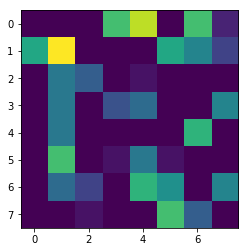

[[ 0.  0.  0. 15.  7.  2.  0.  8.]
 [ 0.  1.  0.  0.  0. 18.  0.  8.]
 [ 0. 14.  8.  1.  2.  4. 19.  7.]
 [ 6.  9.  0.  4.  7.  0.  1.  4.]
 [ 0.  0.  1.  0.  0.  0. 14.  8.]
 [21.  5.  0.  0.  0.  0.  0.  2.]
 [ 0. 11.  0.  0.  2.  3.  6. 11.]
 [12.  0.  1.  0.  0. 16.  0.  0.]]


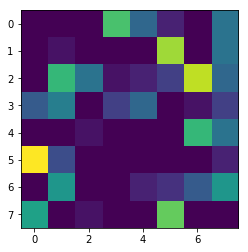

[[ 0.  0.  0. 11.  8.  0.  0. 12.]
 [ 0.  4.  0.  3.  0. 16.  0.  9.]
 [ 0.  9.  0.  4.  3.  5. 15. 13.]
 [ 3. 10.  1.  5.  1.  0.  9.  5.]
 [ 0.  0.  7.  0.  0.  0.  6.  5.]
 [18.  4.  0.  0.  2.  0.  0.  0.]
 [ 0. 16.  0.  0.  0.  8.  8.  8.]
 [ 7.  0.  0.  0.  0. 19.  0.  0.]]


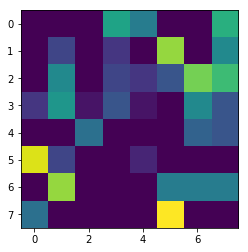

[[ 0.  0.  0. 12.  8.  0.  0. 13.]
 [ 0.  0.  0.  0.  0. 13.  0. 10.]
 [ 0. 12.  0.  6.  3.  5. 14. 13.]
 [ 4. 11.  2. 11.  5.  0.  3.  5.]
 [ 0.  0.  7.  0.  0.  0. 10.  5.]
 [11.  1.  0.  2.  4.  0.  0.  5.]
 [ 0. 11.  0.  2.  0.  6.  6.  7.]
 [ 6.  3.  0.  0.  0. 18.  0.  0.]]


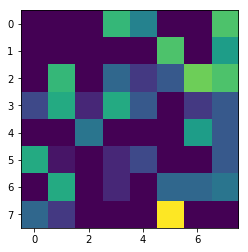

[[ 0.  0.  0.  8. 10.  0.  0. 15.]
 [ 0.  0.  0.  0.  0. 11.  0.  8.]
 [ 1. 11.  0.  5.  2.  4. 14. 11.]
 [ 4.  9.  5. 10.  3.  0.  6.  6.]
 [ 0.  0.  8.  0.  2.  1. 11.  9.]
 [10.  2.  0.  1.  3.  0.  0.  6.]
 [ 0. 14.  0.  3.  0.  4.  7.  5.]
 [ 8.  6.  0.  0.  0. 14.  0.  0.]]


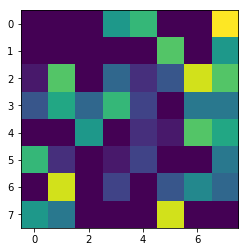

[[ 0.  0.  0.  9.  8.  0.  0. 11.]
 [ 0.  0.  0.  1.  0. 13.  0.  9.]
 [ 3. 12.  0.  5.  1.  5. 12. 11.]
 [ 2. 10.  4. 10.  8.  2.  4.  4.]
 [ 0.  0.  7.  0.  0.  1. 10.  6.]
 [12.  4.  0.  3.  7.  0.  0.  2.]
 [ 0. 10.  0.  4.  0.  6. 10.  5.]
 [ 6.  6.  0.  0.  0. 12.  0.  0.]]


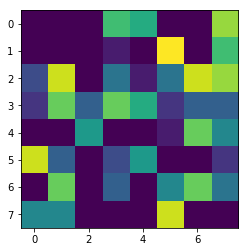

[[ 0.  0.  0. 10.  8.  0.  0. 12.]
 [ 0.  0.  0.  1.  0. 11.  0.  8.]
 [ 2. 11.  0.  5.  0.  4. 13. 11.]
 [ 0.  9.  5.  9.  7.  2.  5.  6.]
 [ 0.  0.  7.  0.  1.  2. 10.  7.]
 [10.  3.  0.  3.  5.  0.  1.  6.]
 [ 0. 12.  0.  3.  0.  6.  8.  6.]
 [ 8.  7.  0.  0.  0. 12.  0.  0.]]


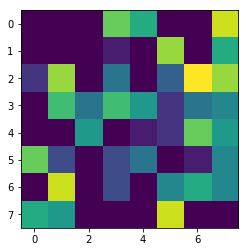

[[ 0.  0.  0. 10.  7.  0.  0. 11.]
 [ 0.  0.  0.  3.  0. 11.  1.  8.]
 [ 2. 11.  0.  5.  0.  4. 12. 11.]
 [ 0.  9.  4.  8.  7.  2.  6.  5.]
 [ 0.  0.  7.  0.  0.  3. 11.  6.]
 [10.  3.  0.  4.  5.  0.  1.  6.]
 [ 0. 12.  0.  3.  0.  7.  8.  7.]
 [ 7.  4.  1.  0.  0. 12.  0.  0.]]


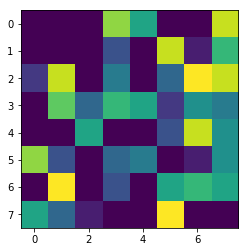

[[ 0.  0.  0. 10.  7.  0.  0. 11.]
 [ 0.  0.  0.  3.  0. 10.  2.  8.]
 [ 3. 10.  0.  5.  0.  4. 11. 11.]
 [ 0.  9.  5.  9.  6.  2.  6.  6.]
 [ 0.  0.  7.  0.  0.  3. 10.  7.]
 [ 9.  4.  0.  5.  5.  0.  2.  6.]
 [ 0. 11.  0.  4.  0.  5.  8.  5.]
 [ 7.  6.  1.  0.  0. 11.  0.  0.]]


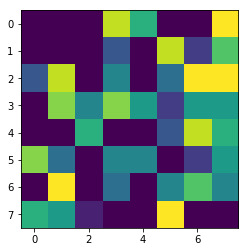

[[ 0.  0.  0. 10.  7.  0.  0. 10.]
 [ 0.  0.  0.  3.  0. 10.  1.  8.]
 [ 4. 10.  0.  5.  0.  5. 11.  9.]
 [ 0.  8.  6.  8.  6.  2.  6.  5.]
 [ 0.  0.  6.  0.  0.  4. 11.  6.]
 [10.  4.  0.  3.  6.  0.  1.  4.]
 [ 0. 10.  0.  5.  0.  7.  9.  8.]
 [ 8.  5.  1.  0.  0. 10.  0.  0.]]


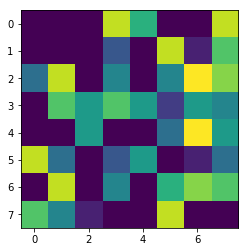

[[ 0.  0.  0.  9.  7.  0.  0. 10.]
 [ 0.  1.  0.  3.  0. 10.  3.  7.]
 [ 5.  9.  0.  6.  0.  5.  9.  9.]
 [ 0.  9.  5.  8.  7.  3.  6.  6.]
 [ 0.  0.  8.  0.  0.  4. 10.  7.]
 [ 9.  5.  0.  3.  6.  0.  2.  6.]
 [ 0. 10.  0.  4.  0.  6.  8.  7.]
 [ 7.  6.  1.  0.  0. 11.  0.  0.]]


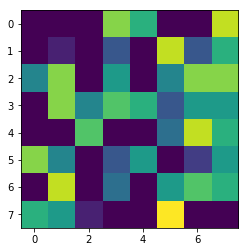

[[ 0.  0.  0.  9.  7.  0.  0.  9.]
 [ 0.  0.  0.  4.  0. 10.  3.  7.]
 [ 4. 10.  0.  5.  0.  5. 10.  9.]
 [ 0.  8.  6.  8.  7.  3.  6.  6.]
 [ 0.  0.  6.  0.  0.  5. 10.  7.]
 [ 9.  4.  0.  4.  6.  0.  3.  6.]
 [ 0. 10.  0.  4.  0.  7.  8.  6.]
 [ 7.  6.  1.  0.  0.  9.  0.  0.]]


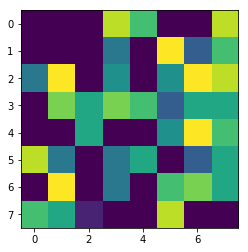

[[ 0.  0.  0.  9.  7.  0.  0.  9.]
 [ 0.  0.  0.  4.  0.  9.  3.  7.]
 [ 4. 10.  0.  5.  0.  5. 10.  9.]
 [ 0.  8.  5.  8.  7.  3.  6.  6.]
 [ 1.  0.  7.  0.  0.  4. 10.  7.]
 [ 9.  4.  0.  5.  5.  0.  3.  6.]
 [ 0.  9.  0.  5.  0.  6.  8.  7.]
 [ 7.  5.  2.  0.  0. 10.  0.  0.]]


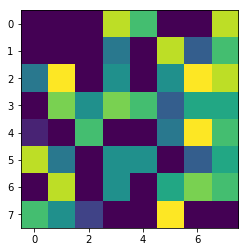

[[ 0.  0.  0.  9.  7.  0.  0.  9.]
 [ 0.  1.  0.  4.  0.  9.  3.  7.]
 [ 4.  9.  0.  6.  0.  5. 10.  9.]
 [ 0.  8.  6.  8.  6.  3.  6.  6.]
 [ 1.  0.  7.  0.  0.  5. 10.  7.]
 [ 9.  4.  0.  4.  6.  0.  2.  6.]
 [ 0.  9.  0.  5.  0.  6.  8.  6.]
 [ 7.  6.  2.  0.  0.  9.  0.  0.]]


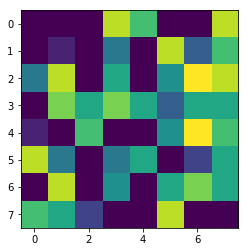

[[0. 0. 0. 9. 7. 0. 0. 9.]
 [0. 1. 0. 4. 0. 9. 4. 7.]
 [5. 9. 0. 6. 0. 5. 9. 8.]
 [0. 8. 6. 8. 7. 3. 6. 6.]
 [1. 0. 7. 0. 0. 5. 9. 7.]
 [9. 5. 0. 4. 6. 0. 2. 6.]
 [0. 9. 0. 5. 0. 6. 8. 7.]
 [7. 6. 2. 0. 0. 9. 0. 0.]]


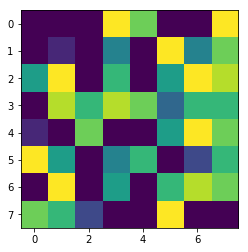

[[0. 0. 0. 8. 7. 0. 0. 9.]
 [0. 1. 0. 4. 0. 9. 4. 7.]
 [5. 9. 0. 6. 0. 6. 9. 9.]
 [0. 8. 6. 8. 7. 3. 6. 6.]
 [1. 0. 7. 0. 0. 5. 9. 6.]
 [9. 5. 0. 4. 6. 0. 2. 6.]
 [0. 9. 0. 5. 0. 6. 8. 7.]
 [7. 6. 2. 0. 0. 9. 1. 0.]]


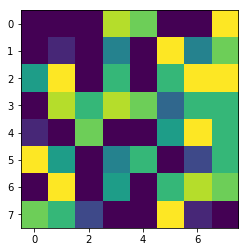

[[ 0.  0.  0.  8.  7.  0.  0.  9.]
 [ 0.  1.  0.  4.  0.  9.  4.  7.]
 [ 5.  9.  0.  6.  0.  6.  9.  8.]
 [ 0.  8.  6.  7.  7.  3.  6.  6.]
 [ 1.  0.  7.  0.  0.  5. 10.  7.]
 [ 9.  5.  0.  4.  6.  0.  2.  6.]
 [ 0.  9.  0.  5.  0.  6.  8.  7.]
 [ 7.  6.  2.  0.  0.  9.  1.  0.]]


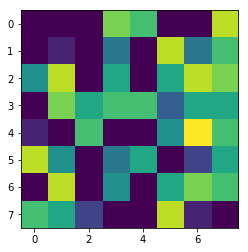

[[0. 0. 0. 8. 7. 0. 0. 9.]
 [0. 0. 0. 4. 0. 9. 4. 7.]
 [5. 9. 0. 6. 0. 6. 9. 8.]
 [0. 8. 6. 8. 7. 3. 6. 6.]
 [0. 0. 7. 0. 0. 5. 9. 7.]
 [8. 5. 0. 5. 5. 0. 2. 6.]
 [0. 9. 0. 5. 0. 6. 8. 7.]
 [7. 6. 2. 0. 0. 9. 1. 0.]]


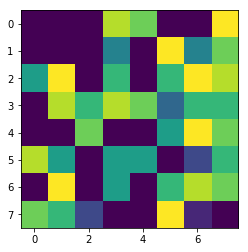

[[ 0.  0.  0.  9.  7.  0.  0.  9.]
 [ 0.  0.  0.  4.  0.  9.  4.  7.]
 [ 5.  9.  0.  5.  0.  6.  9.  8.]
 [ 0.  8.  6.  8.  7.  3.  6.  5.]
 [ 1.  0.  6.  0.  0.  5. 10.  7.]
 [ 8.  5.  0.  5.  6.  0.  1.  5.]
 [ 0.  9.  0.  5.  0.  6.  9.  7.]
 [ 7.  6.  3.  0.  0.  9.  2.  0.]]


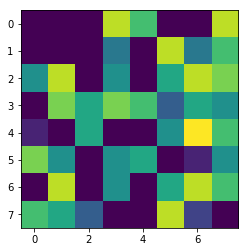

[[ 0.  0.  0.  8.  7.  0.  0.  9.]
 [ 0.  0.  0.  4.  0.  9.  4.  7.]
 [ 5.  9.  0.  5.  0.  6.  9.  8.]
 [ 0.  8.  7.  8.  7.  3.  6.  5.]
 [ 0.  0.  6.  0.  0.  5. 10.  7.]
 [ 9.  5.  0.  4.  6.  0.  1.  6.]
 [ 0.  9.  0.  5.  0.  6.  8.  7.]
 [ 8.  6.  3.  0.  0.  9.  2.  0.]]


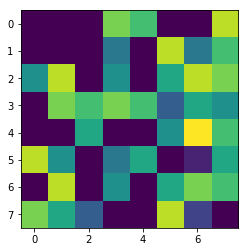

[[ 0.  0.  0.  9.  7.  0.  0.  9.]
 [ 0.  0.  0.  4.  0. 10.  4.  7.]
 [ 6.  9.  0.  6.  0.  6.  8.  8.]
 [ 0.  8.  7.  8.  7.  3.  5.  5.]
 [ 1.  0.  6.  0.  0.  5. 10.  7.]
 [ 8.  5.  0.  4.  6.  0.  1.  5.]
 [ 0.  9.  0.  4.  0.  6.  9.  7.]
 [ 7.  6.  2.  0.  0. 10.  2.  0.]]


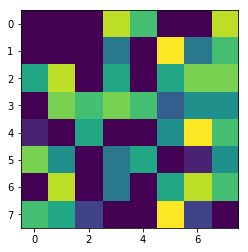

[[ 0.  0.  0.  8.  8.  0.  0.  9.]
 [ 0.  0.  0.  3.  0.  9.  4.  7.]
 [ 5.  9.  0.  5.  0.  5.  9.  8.]
 [ 0.  7.  6.  8.  7.  2.  5.  5.]
 [ 0.  0.  7.  0.  0.  5.  9.  7.]
 [ 9.  5.  0.  5.  6.  0.  1.  6.]
 [ 0. 10.  0.  4.  0.  6.  8.  7.]
 [ 8.  6.  3.  0.  0.  9.  3.  0.]]


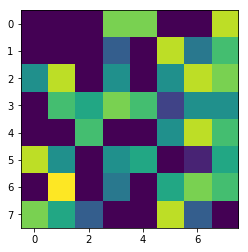

[[ 0.  0.  0.  8.  8.  0.  0.  9.]
 [ 0.  0.  0.  3.  0.  9.  4.  8.]
 [ 5.  9.  0.  6.  0.  5.  9.  8.]
 [ 0.  7.  6.  9.  7.  2.  6.  5.]
 [ 0.  0.  7.  0.  0.  5. 10.  7.]
 [ 9.  5.  0.  5.  5.  0.  0.  6.]
 [ 0. 10.  0.  4.  0.  6.  8.  7.]
 [ 8.  6.  3.  0.  0.  9.  3.  0.]]


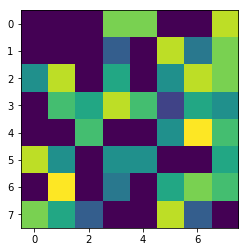

[[ 0.  0.  0.  9.  8.  0.  0.  9.]
 [ 0.  0.  0.  4.  0.  9.  5.  7.]
 [ 6.  9.  0.  5.  0.  6.  8.  8.]
 [ 0.  8.  6.  8.  7.  2.  5.  5.]
 [ 0.  0.  6.  0.  0.  5. 10.  7.]
 [ 9.  5.  0.  4.  6.  0.  0.  5.]
 [ 0.  9.  0.  3.  0.  7.  8.  8.]
 [ 8.  5.  3.  0.  0.  9.  3.  0.]]


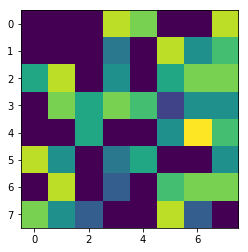

[[ 0.  0.  0.  8.  8.  0.  0.  9.]
 [ 0.  0.  0.  4.  0. 10.  4.  8.]
 [ 5.  9.  0.  5.  0.  5.  9.  8.]
 [ 0.  8.  6.  8.  7.  2.  5.  5.]
 [ 0.  0.  6.  0.  0.  5. 10.  7.]
 [ 9.  5.  0.  5.  5.  0.  0.  6.]
 [ 0. 10.  0.  3.  0.  6.  8.  7.]
 [ 7.  5.  3.  0.  0. 10.  4.  0.]]


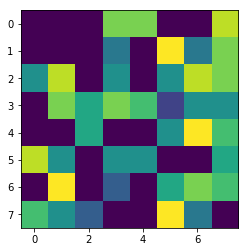

[[ 0.  0.  0.  8.  8.  0.  0.  9.]
 [ 0.  0.  0.  3.  0.  9.  4.  8.]
 [ 4.  9.  0.  6.  0.  5.  9.  9.]
 [ 0.  8.  5.  9.  7.  2.  5.  4.]
 [ 0.  0.  6.  0.  0.  5. 10.  7.]
 [ 9.  4.  0.  5.  6.  0.  0.  6.]
 [ 0. 10.  0.  4.  0.  6.  9.  7.]
 [ 8.  5.  3.  0.  0. 10.  3.  0.]]


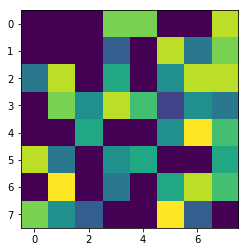

[[ 0.  0.  0.  9.  8.  0.  0.  9.]
 [ 0.  0.  0.  4.  0. 10.  4.  8.]
 [ 4.  9.  0.  6.  0.  5.  9.  8.]
 [ 0.  8.  7.  8.  7.  2.  5.  5.]
 [ 0.  0.  7.  0.  0.  5. 10.  7.]
 [ 9.  5.  0.  5.  6.  0.  0.  6.]
 [ 0. 10.  0.  3.  0.  6.  8.  7.]
 [ 8.  5.  3.  0.  0. 10.  3.  0.]]


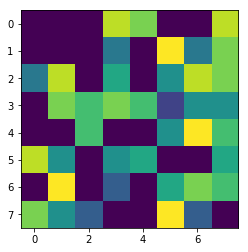

[[ 0.  0.  0.  9.  7.  0.  0. 10.]
 [ 0.  0.  0.  4.  0. 10.  4.  8.]
 [ 5. 10.  0.  6.  0.  5.  9.  8.]
 [ 0.  8.  6.  8.  7.  2.  5.  4.]
 [ 0.  0.  6.  0.  0.  5. 10.  7.]
 [ 9.  5.  0.  4.  6.  0.  0.  5.]
 [ 0. 10.  0.  3.  0.  6.  8.  8.]
 [ 8.  5.  2.  0.  0. 10.  3.  0.]]


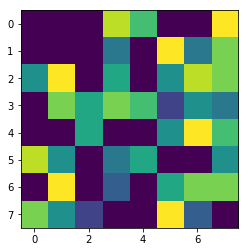

[[ 0.  0.  0. 10.  7.  0.  0.  9.]
 [ 0.  1.  0.  4.  0. 10.  3.  8.]
 [ 5.  9.  0.  6.  0.  6.  8.  9.]
 [ 0.  8.  7.  8.  7.  2.  5.  4.]
 [ 0.  0.  6.  0.  0.  5. 11.  7.]
 [ 9.  5.  0.  4.  6.  0.  0.  4.]
 [ 0. 10.  0.  3.  0.  6.  9.  7.]
 [ 8.  4.  2.  0.  0. 11.  3.  0.]]


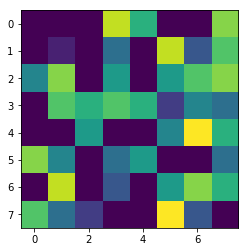

[[ 0.  0.  0.  9.  7.  0.  0.  9.]
 [ 0.  0.  0.  3.  0. 10.  4.  8.]
 [ 4.  9.  0.  5.  0.  5.  9.  8.]
 [ 0.  8.  6.  9.  7.  2.  5.  4.]
 [ 0.  0.  7.  0.  0.  5. 11.  7.]
 [ 9.  4.  0.  4.  6.  0.  0.  5.]
 [ 0. 10.  0.  3.  0.  6.  8.  7.]
 [ 8.  5.  2.  0.  0. 10.  2.  0.]]


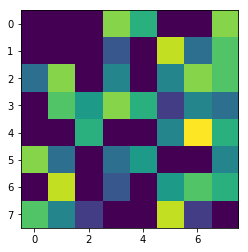

[[ 0.  0.  0.  9.  7.  0.  0.  9.]
 [ 0.  1.  0.  5.  0. 10.  3.  7.]
 [ 4.  9.  0.  6.  0.  6.  8.  9.]
 [ 0.  8.  6.  9.  7.  3.  5.  5.]
 [ 0.  0.  6.  0.  0.  5. 11.  7.]
 [ 9.  5.  0.  5.  7.  0.  0.  4.]
 [ 0. 10.  0.  3.  0.  6.  9.  7.]
 [ 8.  4.  2.  0.  0. 11.  2.  0.]]


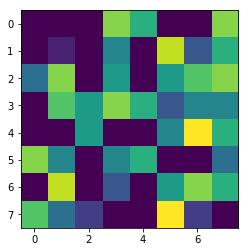

[[ 0.  0.  0.  8.  8.  0.  0. 10.]
 [ 0.  1.  0.  3.  0. 10.  4.  8.]
 [ 3. 10.  0.  5.  0.  5.  9.  9.]
 [ 0.  8.  6.  9.  7.  1.  6.  4.]
 [ 0.  0.  6.  0.  0.  5. 11.  7.]
 [ 9.  4.  0.  5.  6.  0.  0.  5.]
 [ 0. 11.  0.  3.  0.  7.  9.  7.]
 [ 8.  5.  2.  0.  0. 10.  3.  0.]]


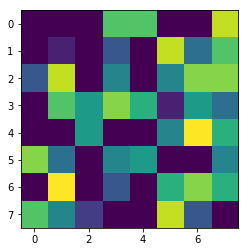

[[ 0.  0.  0.  9.  7.  0.  0. 10.]
 [ 0.  1.  0.  3.  0. 10.  3.  8.]
 [ 3. 10.  0.  5.  0.  5.  9.  9.]
 [ 0.  8.  6.  9.  7.  2.  6.  4.]
 [ 0.  0.  6.  0.  0.  5. 11.  7.]
 [ 9.  4.  0.  5.  6.  0.  0.  4.]
 [ 0. 11.  0.  3.  0.  7.  9.  7.]
 [ 8.  5.  2.  0.  0. 10.  2.  0.]]


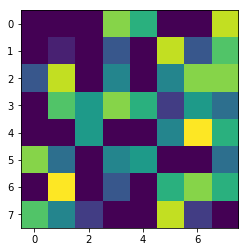

[[ 0.  0.  0.  9.  7.  0.  0. 10.]
 [ 0.  0.  0.  3.  0. 10.  3.  8.]
 [ 3. 10.  0.  6.  0.  4. 10.  9.]
 [ 0.  8.  6.  9.  7.  2.  5.  4.]
 [ 0.  0.  7.  0.  0.  5. 11.  7.]
 [ 9.  4.  0.  5.  6.  0.  0.  5.]
 [ 0. 11.  0.  2.  0.  6.  8.  7.]
 [ 8.  5.  2.  0.  0. 11.  2.  0.]]


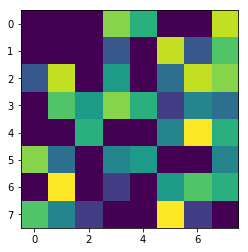

[[ 0.  0.  0. 10.  7.  0.  0. 10.]
 [ 0.  1.  0.  4.  0. 10.  3.  8.]
 [ 3. 10.  0.  5.  0.  5.  9.  9.]
 [ 0.  9.  6.  9.  7.  2.  5.  4.]
 [ 0.  0.  7.  0.  0.  4. 11.  6.]
 [ 9.  4.  0.  4.  7.  0.  0.  5.]
 [ 0. 11.  0.  3.  0.  7.  8.  7.]
 [ 8.  4.  2.  0.  0. 11.  2.  0.]]


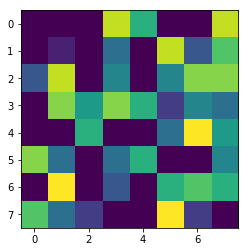

[[ 0.  0.  0.  9.  7.  0.  0. 11.]
 [ 0.  1.  0.  3.  0. 10.  3.  8.]
 [ 2.  9.  0.  5.  0.  5.  9. 10.]
 [ 0.  8.  6. 10.  6.  2.  5.  4.]
 [ 0.  0.  7.  0.  0.  4. 11.  7.]
 [ 9.  4.  0.  5.  6.  0.  0.  5.]
 [ 0. 12.  0.  4.  0.  6.  8.  7.]
 [ 9.  5.  2.  0.  0. 11.  2.  0.]]


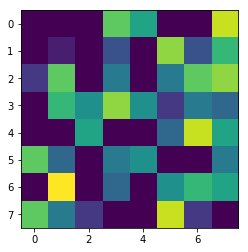

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  2.  0.  4.  0. 10.  2.  8.]
 [ 3. 10.  0.  6.  0.  5.  9. 10.]
 [ 0.  9.  6.  8.  7.  2.  5.  4.]
 [ 0.  0.  6.  0.  0.  5. 11.  7.]
 [ 9.  4.  0.  5.  7.  0.  0.  4.]
 [ 0. 10.  0.  3.  0.  7.  9.  7.]
 [ 8.  4.  1.  0.  0. 11.  1.  0.]]


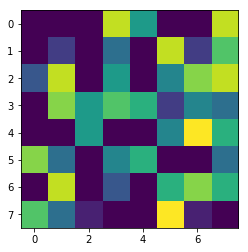

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  2.  0.  4.  0. 10.  2.  8.]
 [ 3. 10.  0.  6.  0.  5. 10. 10.]
 [ 0.  9.  7.  9.  7.  2.  6.  3.]
 [ 0.  0.  6.  0.  0.  5. 12.  6.]
 [ 9.  5.  0.  4.  7.  0.  0.  4.]
 [ 0. 10.  0.  3.  0.  7.  9.  7.]
 [ 8.  4.  2.  0.  0. 10.  1.  0.]]


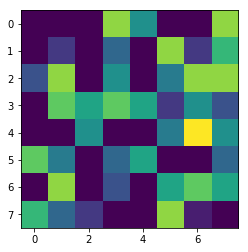

[[ 0.  0.  0.  9.  8.  0.  0. 10.]
 [ 0.  0.  0.  4.  0. 10.  3.  8.]
 [ 2.  9.  0.  6.  0.  5.  9. 10.]
 [ 0.  9.  6.  9.  6.  2.  6.  4.]
 [ 0.  0.  7.  0.  0.  4. 11.  6.]
 [ 9.  4.  0.  5.  6.  0.  0.  5.]
 [ 0. 12.  0.  3.  0.  6.  8.  6.]
 [ 8.  4.  2.  0.  0. 11.  2.  0.]]


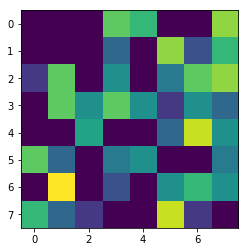

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  3.  0.  5.  0. 11.  2.  7.]
 [ 3. 10.  0.  7.  0.  5.  8. 10.]
 [ 0.  9.  6.  8.  7.  3.  5.  4.]
 [ 0.  0.  6.  0.  0.  5. 11.  7.]
 [ 9.  4.  0.  4.  8.  0.  0.  2.]
 [ 0. 10.  0.  3.  0.  7. 10.  7.]
 [ 8.  3.  1.  0.  0. 11.  0.  0.]]


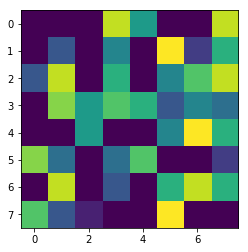

[[ 0.  0.  0. 10.  7.  0.  0. 10.]
 [ 0.  1.  0.  3.  0. 10.  2.  8.]
 [ 2. 10.  0.  6.  0.  5.  9.  9.]
 [ 0.  9.  6.  9.  7.  2.  5.  4.]
 [ 0.  0.  7.  0.  0.  4. 12.  7.]
 [ 9.  4.  0.  5.  7.  0.  0.  4.]
 [ 0. 11.  0.  3.  0.  6.  8.  6.]
 [ 8.  4.  2.  0.  0. 11.  1.  0.]]


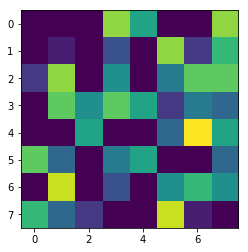

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  2.  0.  4.  0. 11.  2.  8.]
 [ 2. 10.  0.  6.  0.  5. 10. 10.]
 [ 0.  9.  6.  9.  7.  2.  6.  4.]
 [ 0.  0.  6.  0.  0.  5. 12.  7.]
 [10.  4.  0.  4.  7.  0.  0.  4.]
 [ 0. 11.  0.  3.  0.  7.  9.  7.]
 [ 8.  4.  2.  0.  0. 11.  1.  0.]]


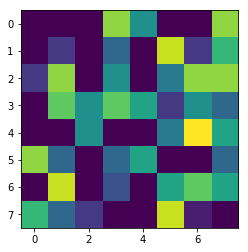

[[ 0.  0.  0.  9.  7.  0.  0.  9.]
 [ 0.  1.  0.  4.  0. 10.  2.  8.]
 [ 2. 10.  0.  6.  0.  5.  9. 11.]
 [ 0.  9.  6.  9.  7.  2.  5.  4.]
 [ 0.  0.  6.  0.  0.  5. 12.  7.]
 [ 8.  4.  0.  6.  6.  0.  0.  4.]
 [ 0. 11.  0.  3.  0.  6.  9.  6.]
 [ 8.  4.  2.  0.  0. 11.  1.  0.]]


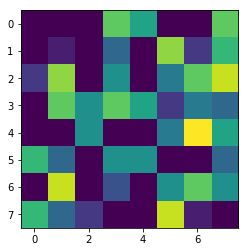

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  2.  0.  4.  0. 11.  2.  8.]
 [ 3. 10.  0.  6.  0.  5.  9. 10.]
 [ 0. 10.  6.  9.  7.  2.  5.  4.]
 [ 0.  0.  6.  0.  0.  5. 11.  6.]
 [ 8.  4.  0.  5.  7.  0.  0.  3.]
 [ 0. 10.  0.  3.  0.  7.  9.  6.]
 [ 8.  4.  1.  0.  0. 11.  0.  0.]]


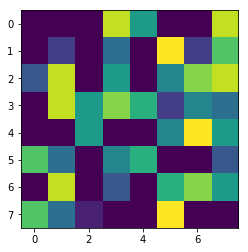

[[ 0.  0.  0. 10.  5.  0.  0. 10.]
 [ 0.  4.  0.  5.  0. 10.  2.  7.]
 [ 3. 10.  0.  7.  0.  6.  8. 10.]
 [ 0.  9.  6.  8.  6.  3.  6.  4.]
 [ 0.  0.  6.  0.  0.  5. 11.  6.]
 [ 8.  4.  0.  4.  8.  0.  0.  2.]
 [ 0. 10.  0.  3.  0.  8.  9.  8.]
 [ 8.  4.  1.  0.  0. 11.  0.  0.]]


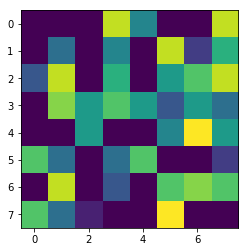

[[ 0.  0.  0. 10.  5.  0.  0. 10.]
 [ 0.  3.  0.  4.  0. 10.  2.  8.]
 [ 3. 10.  0.  7.  0.  5.  9. 10.]
 [ 0.  9.  6.  9.  6.  2.  6.  3.]
 [ 0.  0.  7.  0.  0.  5. 11.  6.]
 [ 9.  4.  0.  4.  7.  0.  0.  3.]
 [ 0. 11.  0.  3.  0.  7.  9.  8.]
 [ 8.  4.  1.  0.  0. 11.  0.  0.]]


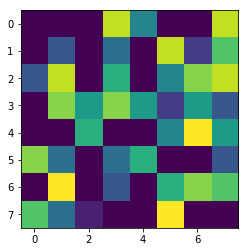

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  3.  0.  4.  0. 11.  2.  9.]
 [ 2. 10.  0.  5.  0.  5. 10. 10.]
 [ 0.  9.  7.  9.  6.  2.  6.  3.]
 [ 0.  0.  6.  0.  0.  5. 11.  6.]
 [ 9.  4.  0.  4.  7.  0.  0.  3.]
 [ 0. 11.  0.  3.  0.  7.  9.  8.]
 [ 8.  4.  2.  0.  0. 11.  0.  0.]]


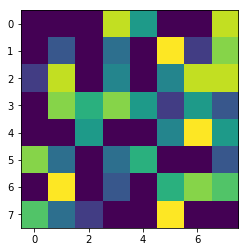

[[ 0.  0.  0.  9.  8.  0.  0. 10.]
 [ 0.  1.  0.  2.  0. 10.  4.  8.]
 [ 1. 10.  0.  5.  0.  4.  9. 10.]
 [ 0.  8.  7. 10.  7.  1.  5.  4.]
 [ 0.  0.  7.  0.  0.  5. 11.  7.]
 [ 9.  4.  0.  4.  5.  0.  0.  5.]
 [ 0. 12.  0.  3.  0.  6.  8.  7.]
 [ 9.  5.  2.  0.  0. 10.  3.  0.]]


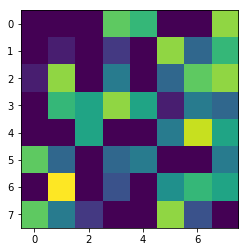

[[ 0.  0.  0.  9.  8.  0.  0. 10.]
 [ 0.  1.  0.  2.  0. 11.  2.  9.]
 [ 1. 10.  0.  5.  0.  3. 11.  9.]
 [ 0.  8.  6. 10.  7.  1.  6.  4.]
 [ 0.  0.  6.  0.  0.  4. 12.  8.]
 [10.  3.  0.  4.  5.  0.  0.  6.]
 [ 0. 12.  0.  2.  0.  6.  8.  7.]
 [ 8.  5.  3.  0.  0. 10.  2.  0.]]


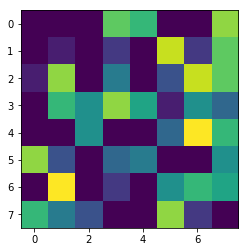

[[ 0.  0.  0.  8. 10.  0.  0. 11.]
 [ 0.  0.  0.  1.  0. 10.  5.  8.]
 [ 1.  9.  0.  5.  0.  3. 10.  9.]
 [ 0.  8.  6. 11.  6.  0.  5.  4.]
 [ 0.  0.  8.  0.  0.  4. 10.  8.]
 [ 9.  4.  0.  5.  4.  0.  0.  7.]
 [ 0. 13.  0.  3.  0.  4.  8.  7.]
 [ 9.  5.  2.  0.  0. 10.  4.  0.]]


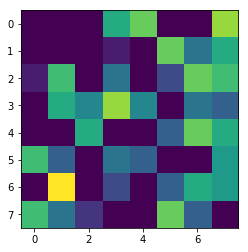

[[ 0.  0.  0.  9.  8.  0.  0. 11.]
 [ 0.  1.  0.  2.  0. 10.  3.  9.]
 [ 2. 10.  0.  5.  0.  3. 11.  9.]
 [ 0.  8.  6.  9.  6.  1.  7.  3.]
 [ 0.  0.  7.  0.  0.  4. 11.  8.]
 [ 9.  3.  0.  4.  6.  0.  0.  6.]
 [ 0. 13.  0.  3.  0.  6.  8.  7.]
 [ 8.  5.  2.  0.  0. 10.  2.  0.]]


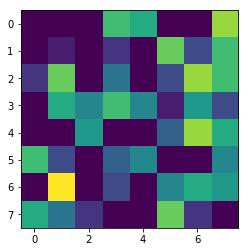

[[ 0.  0.  0.  9.  7.  0.  0. 10.]
 [ 0.  2.  0.  3.  0. 10.  3.  8.]
 [ 2. 10.  0.  7.  0.  4. 10.  9.]
 [ 0.  9.  6.  9.  6.  1.  6.  3.]
 [ 0.  0.  6.  0.  0.  5. 11.  7.]
 [ 8.  4.  0.  5.  6.  0.  0.  4.]
 [ 0. 11.  0.  2.  0.  6.  9.  7.]
 [ 8.  5.  2.  0.  0. 11.  2.  0.]]


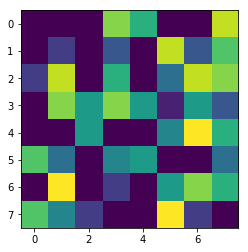

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  5.  0.  4.  0. 10.  2.  9.]
 [ 3. 10.  0.  6.  0.  5.  9. 10.]
 [ 0.  9.  6.  8.  6.  2.  6.  3.]
 [ 0.  0.  6.  0.  0.  5. 11.  6.]
 [ 9.  4.  0.  3.  7.  0.  0.  3.]
 [ 0. 11.  0.  3.  0.  7.  9.  9.]
 [ 9.  4.  2.  0.  0. 10.  0.  0.]]


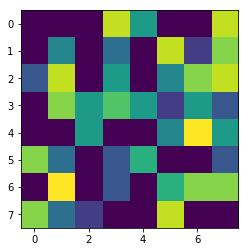

[[ 0.  0.  0.  9.  8.  0.  0. 10.]
 [ 0.  1.  0.  2.  0. 10.  3.  9.]
 [ 1.  9.  0.  5.  0.  3. 10.  9.]
 [ 0.  9.  6. 10.  7.  0.  5.  4.]
 [ 0.  0.  7.  0.  0.  4. 11.  7.]
 [10.  4.  0.  5.  5.  0.  0.  7.]
 [ 0. 12.  0.  3.  0.  6.  7.  6.]
 [ 8.  5.  2.  0.  0. 11.  3.  0.]]


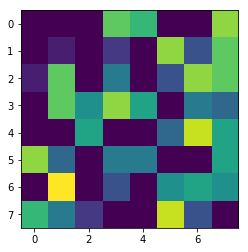

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  3.  0.  3.  0. 11.  1.  9.]
 [ 1. 10.  0.  6.  0.  3. 11.  9.]
 [ 0.  9.  7.  9.  6.  1.  7.  3.]
 [ 0.  0.  7.  0.  0.  5. 11.  7.]
 [10.  4.  0.  4.  6.  0.  1.  5.]
 [ 0. 11.  0.  3.  0.  7.  8.  7.]
 [ 7.  5.  2.  0.  0.  9.  1.  0.]]


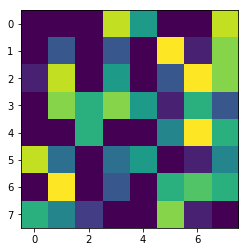

[[ 0.  0.  0. 11.  6.  0.  0.  9.]
 [ 0.  5.  0.  5.  0. 11.  2.  8.]
 [ 3. 10.  0.  6.  0.  5.  8. 10.]
 [ 0.  9.  7.  8.  6.  2.  5.  3.]
 [ 0.  0.  6.  0.  0.  5. 11.  6.]
 [ 8.  4.  0.  4.  7.  0.  1.  3.]
 [ 0. 11.  0.  3.  0.  7.  9.  7.]
 [ 8.  4.  1.  0.  0. 10.  1.  0.]]


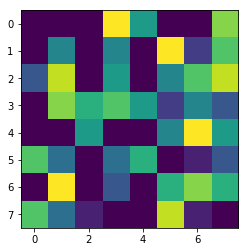

[[ 0.  0.  0.  9.  7.  0.  0. 10.]
 [ 0.  3.  0.  2.  0. 10.  3.  7.]
 [ 2. 10.  0.  7.  0.  4.  8.  9.]
 [ 0.  9.  6.  9.  6.  1.  6.  3.]
 [ 0.  0.  7.  0.  0.  5. 10.  7.]
 [ 9.  4.  0.  4.  7.  0.  1.  5.]
 [ 0. 12.  0.  3.  0.  6.  8.  7.]
 [ 8.  5.  2.  0.  1. 11.  3.  0.]]


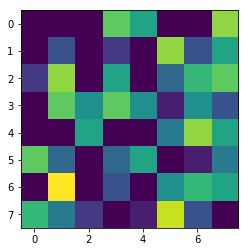

[[ 0.  0.  0. 10.  5.  0.  0.  9.]
 [ 0.  5.  0.  5.  0. 11.  1.  8.]
 [ 3. 10.  0.  6.  0.  6.  9. 10.]
 [ 0. 10.  6.  8.  6.  3.  6.  3.]
 [ 0.  0.  6.  0.  0.  5. 11.  5.]
 [ 8.  5.  0.  4.  7.  0.  1.  3.]
 [ 0. 10.  0.  3.  0.  7.  9.  7.]
 [ 8.  3.  1.  0.  0. 11.  1.  0.]]


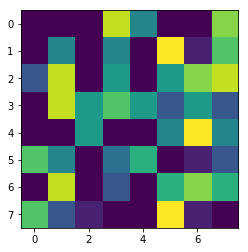

[[ 0.  0.  0. 10.  5.  0.  0. 10.]
 [ 0.  5.  0.  4.  0. 10.  1.  8.]
 [ 3. 10.  0.  7.  0.  5. 10.  9.]
 [ 0.  9.  7.  8.  6.  2.  7.  3.]
 [ 0.  0.  5.  0.  0.  5. 11.  6.]
 [ 9.  4.  0.  3.  7.  0.  1.  3.]
 [ 0. 10.  0.  3.  0.  7.  9.  8.]
 [ 8.  4.  2.  0.  0. 10.  1.  0.]]


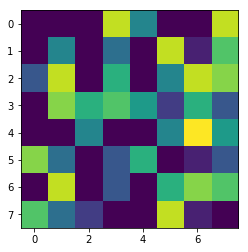

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  4.  0.  3.  0. 11.  2.  9.]
 [ 2. 10.  0.  6.  0.  4. 10.  9.]
 [ 0.  8.  7.  8.  6.  2.  7.  3.]
 [ 0.  0.  6.  0.  0.  5. 12.  7.]
 [ 9.  4.  0.  3.  6.  0.  1.  4.]
 [ 0. 11.  0.  3.  0.  6.  8.  8.]
 [ 9.  5.  2.  0.  1. 10.  2.  0.]]


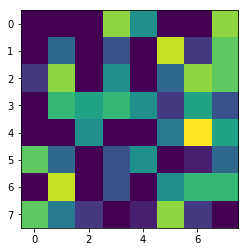

[[ 0.  0.  0.  9. 10.  0.  0. 10.]
 [ 0.  0.  0.  0.  0. 10.  3.  9.]
 [ 0. 10.  0.  5.  0.  2. 11.  9.]
 [ 0.  7.  7. 10.  7.  0.  7.  4.]
 [ 0.  0.  7.  0.  0.  4. 11.  9.]
 [10.  2.  0.  4.  4.  0.  0.  7.]
 [ 0. 12.  0.  2.  0.  6.  7.  7.]
 [ 9.  7.  2.  0.  1.  9.  6.  0.]]


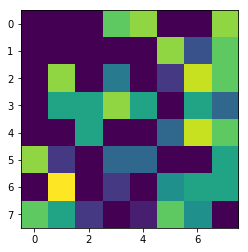

[[ 0.  0.  0. 10.  5.  0.  0.  9.]
 [ 0.  5.  0.  4.  0. 10.  1.  8.]
 [ 2. 10.  0.  7.  0.  5. 10. 10.]
 [ 0.  9.  7.  8.  6.  3.  6.  4.]
 [ 0.  0.  5.  0.  0.  5. 11.  6.]
 [ 9.  4.  0.  4.  7.  0.  2.  3.]
 [ 0. 10.  0.  3.  0.  7.  9.  7.]
 [ 8.  4.  2.  0.  1. 10.  2.  0.]]


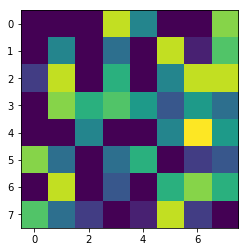

[[ 0.  0.  0.  7. 11.  0.  0. 10.]
 [ 0.  0.  0.  0.  0. 10.  6.  8.]
 [ 0.  9.  0.  5.  0.  2.  9.  9.]
 [ 0.  6.  8. 12.  7.  0.  4.  5.]
 [ 0.  0. 10.  0.  0.  4.  9.  9.]
 [ 9.  4.  0.  6.  2.  0.  0.  9.]
 [ 0. 14.  0.  2.  0.  2.  6.  5.]
 [ 8.  7.  1.  0.  1. 10.  9.  0.]]


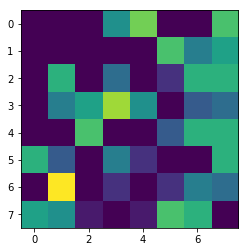

[[ 0.  0.  0. 10.  6.  0.  0. 10.]
 [ 0.  3.  0.  3.  0. 11.  2.  9.]
 [ 1. 10.  0.  6.  0.  3. 11. 10.]
 [ 0.  8.  8.  9.  6.  1.  7.  3.]
 [ 0.  0.  6.  0.  0.  5. 11.  7.]
 [10.  3.  0.  4.  6.  0.  1.  5.]
 [ 0. 11.  0.  2.  0.  6.  8.  7.]
 [ 7.  5.  2.  0.  1.  9.  3.  0.]]


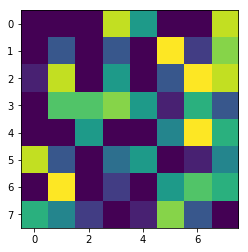

[[ 0.  0.  0.  9.  7.  0.  0. 10.]
 [ 0.  2.  0.  1.  0. 11.  1. 10.]
 [ 0.  9.  0.  5.  0.  2. 12.  9.]
 [ 0.  7.  8.  9.  6.  1.  8.  3.]
 [ 0.  0.  7.  0.  0.  5. 12.  8.]
 [10.  4.  0.  3.  4.  0.  0.  6.]
 [ 0. 12.  0.  2.  0.  5.  9.  7.]
 [ 9.  6.  2.  0.  0.  8.  5.  0.]]


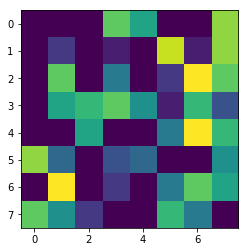

[[ 0.  0.  0. 10.  6.  0.  0.  9.]
 [ 0.  4.  0.  3.  0. 10.  2.  7.]
 [ 3. 10.  0.  7.  0.  5.  8.  9.]
 [ 0.  8.  6.  8.  6.  2.  6.  4.]
 [ 0.  0.  6.  0.  0.  5. 10.  6.]
 [ 8.  4.  0.  4.  7.  0.  2.  4.]
 [ 0. 11.  0.  2.  0.  7.  8.  7.]
 [ 8.  5.  2.  0.  1. 10.  3.  0.]]


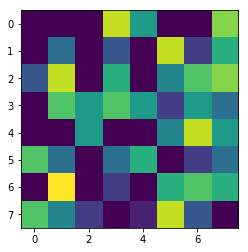

[[ 0.  0.  0. 10.  8.  0.  0.  9.]
 [ 0.  2.  0.  2.  0. 11.  3. 10.]
 [ 0. 10.  0.  5.  0.  2. 12.  9.]
 [ 0.  7.  7.  9.  6.  0.  8.  4.]
 [ 0.  0.  8.  0.  0.  4. 11.  8.]
 [10.  3.  0.  4.  5.  0.  0.  7.]
 [ 0. 12.  0.  2.  0.  5.  7.  7.]
 [ 9.  6.  3.  0.  0.  9.  5.  0.]]


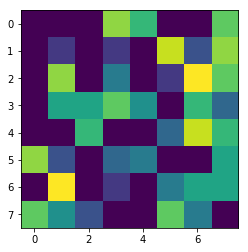

[[ 0.  0.  0. 10.  3.  0.  0.  9.]
 [ 0.  8.  0.  6.  0. 10.  0.  6.]
 [ 5. 10.  0.  8.  0.  7.  7. 10.]
 [ 0. 10.  6.  7.  6.  5.  5.  3.]
 [ 1.  0.  4.  0.  0.  6. 10.  4.]
 [ 7.  5.  0.  4.  8.  0.  4.  0.]
 [ 0.  9.  0.  2.  0.  8. 10.  7.]
 [ 8.  3.  2.  0.  2. 11.  0.  0.]]


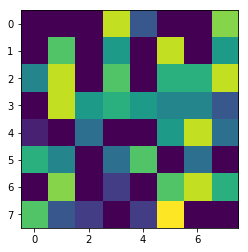

[[ 0.  0.  0.  8.  9.  0.  0.  9.]
 [ 0.  0.  0.  1.  0. 10.  3.  9.]
 [ 0.  9.  0.  5.  0.  1. 11.  9.]
 [ 0.  7.  8. 11.  7.  0.  7.  5.]
 [ 0.  0.  8.  0.  0.  4. 11.  9.]
 [ 9.  3.  0.  5.  3.  0.  0.  9.]
 [ 0. 13.  0.  2.  0.  4.  8.  5.]
 [ 8.  7.  2.  0.  0.  9.  7.  0.]]


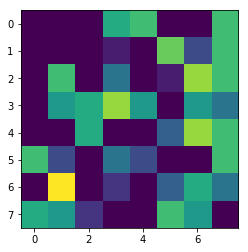

[[ 0.  0.  0.  9.  5.  0.  0.  9.]
 [ 0.  6.  0.  4.  0. 10.  2.  7.]
 [ 4. 10.  0.  7.  0.  5.  8.  9.]
 [ 0.  9.  6.  8.  6.  3.  6.  3.]
 [ 0.  0.  6.  0.  0.  5. 10.  6.]
 [ 8.  4.  0.  4.  7.  0.  2.  3.]
 [ 0. 10.  0.  2.  0.  7.  8.  8.]
 [ 8.  4.  2.  0.  1. 10.  3.  0.]]


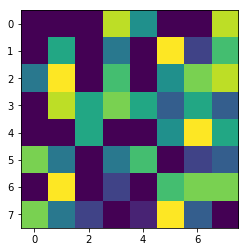

[[ 0.  0.  0. 10.  5.  0.  0. 10.]
 [ 0.  6.  0.  3.  0. 10.  1.  9.]
 [ 2. 10.  0.  7.  0.  4. 11.  9.]
 [ 0.  8.  7.  8.  6.  2.  7.  2.]
 [ 0.  0.  5.  0.  0.  5. 12.  7.]
 [ 9.  4.  0.  3.  6.  0.  2.  4.]
 [ 0. 10.  0.  2.  0.  7.  8.  8.]
 [ 9.  5.  2.  0.  0.  9.  3.  0.]]


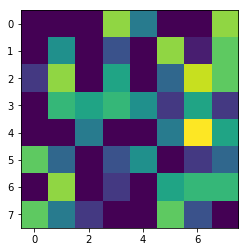

[[ 0.  0.  0.  9.  9.  0.  0.  9.]
 [ 0.  1.  0.  3.  0. 11.  3.  8.]
 [ 1.  9.  0.  6.  0.  2.  9.  9.]
 [ 0.  8.  7. 10.  8.  1.  5.  5.]
 [ 0.  0.  8.  0.  0.  4. 10.  7.]
 [ 9.  4.  0.  6.  4.  0.  1.  8.]
 [ 0. 11.  0.  1.  0.  5.  7.  4.]
 [ 7.  6.  1.  0.  1. 11.  7.  0.]]


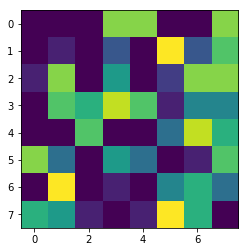

[[ 0.  0.  0.  8.  8.  0.  0.  9.]
 [ 0.  1.  0.  1.  0. 10.  3.  9.]
 [ 1. 10.  0.  5.  0.  2. 11.  9.]
 [ 0.  7.  7.  9.  6.  1.  7.  4.]
 [ 0.  0.  7.  0.  0.  5. 11.  8.]
 [ 9.  3.  0.  4.  3.  0.  0.  8.]
 [ 0. 12.  0.  2.  0.  5.  7.  7.]
 [ 9.  7.  2.  0.  0. 10.  7.  0.]]


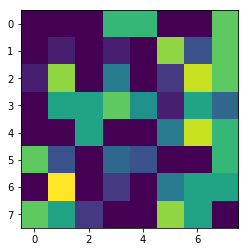

[[ 0.  0.  0.  8.  8.  0.  0.  9.]
 [ 0.  2.  0.  2.  0. 10.  3.  9.]
 [ 0.  9.  0.  5.  0.  2. 10.  9.]
 [ 0.  7.  7. 10.  7.  1.  6.  4.]
 [ 0.  0.  8.  0.  0.  5. 10.  8.]
 [10.  3.  0.  5.  4.  0.  0.  8.]
 [ 0. 12.  0.  2.  0.  5.  7.  6.]
 [ 7.  6.  2.  0.  0. 10.  7.  0.]]


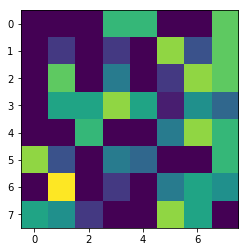

[[ 0.  0.  0.  8.  8.  0.  0.  9.]
 [ 0.  3.  0.  1.  0. 10.  4.  7.]
 [ 2. 10.  0.  7.  0.  3.  8.  8.]
 [ 0.  7.  6. 10.  8.  1.  6.  4.]
 [ 0.  0.  8.  0.  0.  5. 10.  8.]
 [ 9.  3.  0.  4.  5.  0.  1.  6.]
 [ 0. 11.  0.  1.  0.  6.  7.  7.]
 [ 8.  6.  1.  0.  2. 10.  6.  0.]]


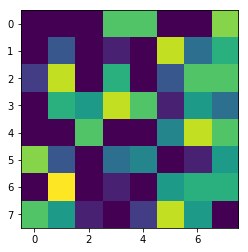

[[ 0.  0.  0.  9.  9.  0.  0. 10.]
 [ 0.  2.  0.  1.  0. 10.  4.  8.]
 [ 1.  9.  0.  5.  0.  2.  9.  8.]
 [ 0.  7.  7. 10.  7.  1.  6.  4.]
 [ 0.  0.  8.  0.  0.  4. 10.  9.]
 [ 9.  4.  0.  4.  4.  0.  0.  8.]
 [ 0. 13.  0.  2.  0.  4.  7.  6.]
 [ 8.  6.  1.  0.  2.  8.  8.  0.]]


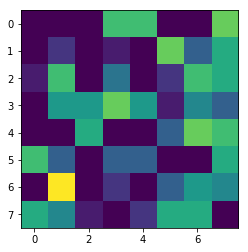

[[ 0.  0.  0. 10.  4.  0.  0.  9.]
 [ 0.  7.  0.  5.  0. 10.  2.  8.]
 [ 2. 10.  0.  6.  0.  4. 10.  9.]
 [ 0.  8.  7.  8.  6.  3.  6.  3.]
 [ 0.  0.  5.  0.  0.  5. 11.  6.]
 [ 8.  4.  0.  3.  7.  0.  3.  3.]
 [ 0.  9.  0.  2.  0.  7.  9.  7.]
 [ 8.  4.  2.  0.  2.  9.  2.  0.]]


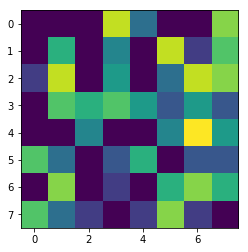

[[ 0.  0.  0. 10.  4.  0.  0.  9.]
 [ 0.  7.  0.  4.  0. 10.  1.  9.]
 [ 1. 10.  0.  6.  0.  3. 11. 10.]
 [ 0.  8.  8.  8.  6.  2.  7.  3.]
 [ 0.  0.  5.  0.  0.  5. 11.  6.]
 [ 9.  4.  0.  3.  6.  0.  2.  4.]
 [ 0. 10.  0.  2.  0.  7.  8.  8.]
 [ 7.  4.  3.  0.  2.  9.  2.  0.]]


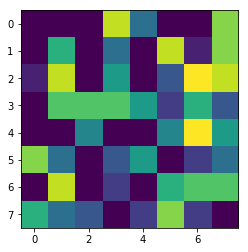

[[ 0.  0.  0.  9.  8.  0.  0.  9.]
 [ 0.  3.  0.  3.  0. 10.  4.  6.]
 [ 4.  8.  0.  6.  0.  4.  6.  9.]
 [ 0.  8.  6.  9.  6.  3.  4.  5.]
 [ 0.  0.  8.  0.  0.  5.  9.  7.]
 [ 7.  5.  0.  5.  5.  0.  1.  6.]
 [ 0. 11.  0.  2.  0.  4.  8.  5.]
 [ 8.  5.  1.  0.  3. 11.  6.  0.]]


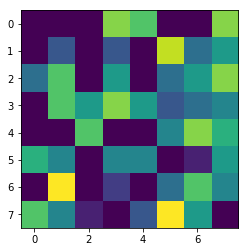

[[ 0.  0.  0.  9.  8.  0.  0.  9.]
 [ 0.  4.  0.  3.  0. 10.  4.  6.]
 [ 5.  9.  0.  6.  0.  5.  6.  9.]
 [ 0.  8.  6.  9.  6.  3.  4.  4.]
 [ 0.  0.  8.  0.  0.  5. 10.  7.]
 [ 6.  5.  0.  5.  5.  0.  1.  6.]
 [ 0. 11.  0.  2.  0.  4.  7.  5.]
 [ 8.  6.  1.  0.  4. 11.  7.  0.]]


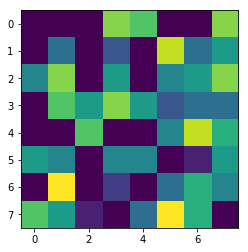

[[ 0.  0.  0. 10.  2.  0.  0.  8.]
 [ 0.  9.  0.  7.  0. 10.  1.  5.]
 [ 6. 10.  0.  8.  0.  8.  5.  9.]
 [ 0. 10.  6.  7.  5.  6.  4.  3.]
 [ 2.  0.  3.  0.  0.  7.  9.  3.]
 [ 6.  5.  0.  3.  8.  0.  5.  0.]
 [ 0.  8.  0.  2.  0.  8. 10.  7.]
 [ 8.  3.  2.  0.  5. 10.  0.  0.]]


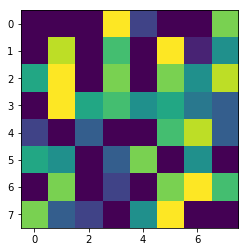

[[ 0.  0.  0.  8. 10.  0.  0.  9.]
 [ 0.  3.  0.  2.  0. 10.  5.  6.]
 [ 5.  8.  0.  5.  0.  4.  6.  9.]
 [ 0.  8.  5. 10.  7.  3.  4.  5.]
 [ 0.  0.  9.  0.  0.  5.  9.  7.]
 [ 7.  5.  0.  5.  4.  0.  1.  7.]
 [ 0. 11.  0.  1.  0.  3.  7.  6.]
 [ 9.  5.  1.  0.  4. 10.  7.  0.]]


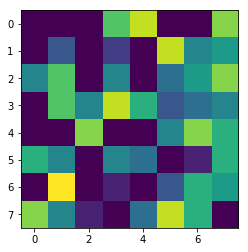

[[ 0.  0.  0.  9.  8.  0.  0.  8.]
 [ 0.  4.  0.  4.  0. 11.  3.  6.]
 [ 4.  8.  0.  6.  0.  5.  7. 10.]
 [ 0.  9.  6.  9.  8.  4.  4.  6.]
 [ 0.  0.  7.  0.  0.  6. 10.  6.]
 [ 7.  5.  0.  7.  5.  0.  2.  6.]
 [ 0. 10.  0.  1.  0.  5.  8.  3.]
 [ 7.  5.  1.  0.  4. 11.  6.  0.]]


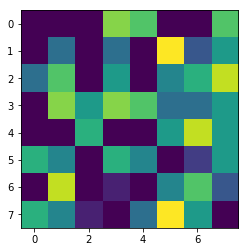

[[ 0.  0.  0.  9.  8.  0.  0. 10.]
 [ 0.  4.  0.  1.  0. 10.  2. 10.]
 [ 0.  9.  0.  4.  0.  2. 12.  8.]
 [ 0.  6.  8.  9.  5.  1.  8.  2.]
 [ 0.  0.  7.  0.  0.  4. 12.  9.]
 [10.  3.  0.  3.  3.  0.  0.  8.]
 [ 0. 13.  0.  2.  0.  4.  8.  8.]
 [10.  6.  3.  0.  1.  8.  6.  0.]]


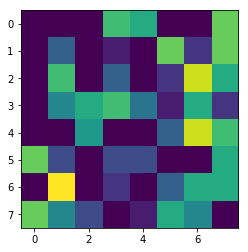

[[ 0.  0.  0.  9.  8.  0.  0.  8.]
 [ 0.  5.  0.  3.  0. 10.  4.  7.]
 [ 4.  9.  0.  5.  0.  5.  7.  9.]
 [ 0.  8.  6.  9.  6.  3.  6.  4.]
 [ 0.  0.  8.  0.  0.  5. 10.  6.]
 [ 7.  4.  0.  4.  5.  0.  1.  6.]
 [ 0. 11.  0.  2.  0.  4.  7.  7.]
 [ 9.  5.  1.  0.  4. 10.  6.  0.]]


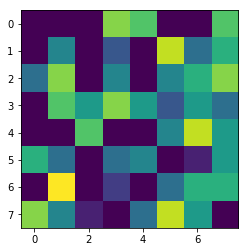

[[ 0.  0.  0.  9.  8.  0.  0. 10.]
 [ 0.  5.  0.  2.  0. 10.  2. 11.]
 [ 1.  9.  0.  4.  0.  1. 13.  8.]
 [ 0.  7.  7.  9.  4.  2. 10.  2.]
 [ 0.  0.  7.  0.  0.  3. 12.  8.]
 [ 9.  2.  0.  2.  4.  0.  0.  8.]
 [ 0. 13.  0.  1.  0.  4.  7. 10.]
 [11.  6.  3.  0.  0.  8.  5.  0.]]


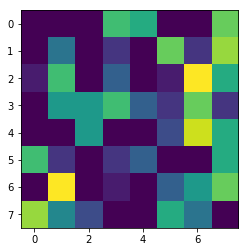

[[ 0.  0.  0.  8. 12.  0.  0.  9.]
 [ 0.  0.  0.  0.  0. 10.  6.  8.]
 [ 2.  9.  0.  5.  0.  0.  8.  7.]
 [ 0.  6.  7. 11.  8.  0.  6.  5.]
 [ 0.  0. 10.  0.  0.  4. 10. 11.]
 [ 9.  2.  0.  5.  2.  0.  0. 10.]
 [ 0. 13.  0.  1.  0.  3.  6.  6.]
 [ 9.  8.  1.  0.  2.  8. 10.  0.]]


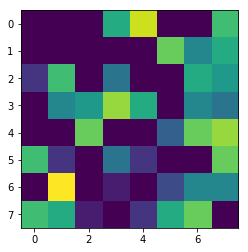

[[ 0.  0.  0.  7. 12.  0.  0.  9.]
 [ 0.  0.  0.  0.  0.  9.  6.  8.]
 [ 1.  9.  0.  5.  0.  0.  9.  7.]
 [ 0.  6.  7. 11.  8.  0.  7.  4.]
 [ 0.  0. 10.  0.  0.  4.  9. 11.]
 [ 9.  2.  0.  4.  2.  0.  0. 11.]
 [ 1. 14.  0.  1.  0.  2.  5.  6.]
 [ 9.  8.  1.  0.  2.  8. 10.  0.]]


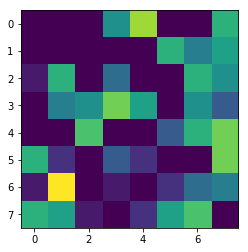

[[ 0.  0.  0. 10.  3.  0.  0.  8.]
 [ 0.  9.  0.  7.  0. 10.  1.  5.]
 [ 6.  9.  0.  8.  0.  7.  6.  9.]
 [ 0.  9.  6.  7.  6.  6.  4.  4.]
 [ 3.  0.  3.  0.  0.  6. 10.  4.]
 [ 6.  5.  0.  4.  8.  0.  4.  0.]
 [ 1.  8.  0.  1.  0.  8. 10.  6.]
 [ 8.  4.  2.  0.  5. 10.  0.  0.]]


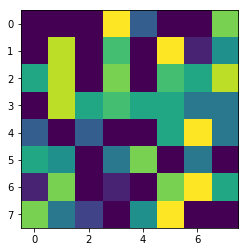

[[ 0.  0.  0. 10.  6.  0.  0.  9.]
 [ 0.  6.  0.  4.  0. 10.  3.  7.]
 [ 4.  9.  0.  6.  0.  4.  8.  9.]
 [ 0.  8.  6.  8.  6.  3.  6.  3.]
 [ 0.  0.  6.  0.  0.  5. 10.  6.]
 [ 8.  3.  0.  3.  6.  0.  1.  5.]
 [ 1. 10.  0.  1.  0.  6.  7.  7.]
 [ 8.  5.  2.  0.  3.  9.  4.  0.]]


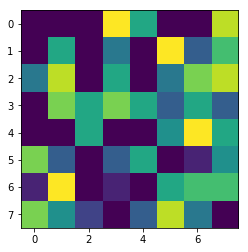

[[ 0.  0.  0. 10.  2.  0.  0.  8.]
 [ 0. 10.  0.  7.  0. 10.  1.  5.]
 [ 7. 10.  0.  8.  0.  8.  5.  9.]
 [ 0.  9.  5.  7.  5.  6.  4.  3.]
 [ 3.  0.  2.  0.  0.  6.  9.  3.]
 [ 6.  5.  0.  3.  9.  0.  5.  0.]
 [ 1.  8.  0.  1.  0.  8. 10.  7.]
 [ 8.  3.  2.  0.  5. 10.  0.  0.]]


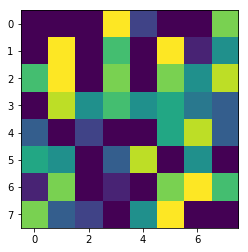

[[ 0.  0.  0. 10.  5.  0.  0.  9.]
 [ 0.  4.  0.  3.  0. 11.  0. 12.]
 [ 0.  9.  0.  5.  0.  0. 15.  9.]
 [ 0.  7. 10.  9.  7.  1. 10.  2.]
 [ 0.  0.  6.  0.  0.  4. 12.  8.]
 [11.  2.  0.  2.  4.  0.  0.  8.]
 [ 0. 11.  0.  2.  0.  6.  8.  7.]
 [ 7.  5.  4.  0.  0.  7.  3.  0.]]


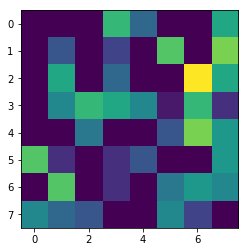

[[ 0.  0.  0. 11.  5.  0.  0.  8.]
 [ 0.  7.  0.  6.  0. 11.  1.  8.]
 [ 4.  9.  0.  7.  0.  3.  9.  9.]
 [ 0.  9.  6.  8.  6.  4.  6.  4.]
 [ 1.  0.  5.  0.  0.  5. 11.  5.]
 [ 8.  4.  0.  4.  7.  0.  1.  5.]
 [ 0.  9.  0.  0.  0.  7.  8.  5.]
 [ 7.  5.  3.  0.  3. 11.  2.  0.]]


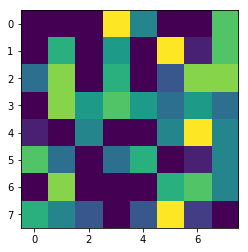

[[ 0.  0.  0. 10.  3.  0.  0.  9.]
 [ 0.  9.  0.  6.  0.  9.  2.  4.]
 [ 9. 10.  0.  8.  0.  8.  4.  9.]
 [ 0. 10.  4.  7.  5.  6.  5.  2.]
 [ 3.  0.  5.  0.  0.  6.  8.  3.]
 [ 5.  5.  0.  3.  8.  0.  4.  1.]
 [ 1.  8.  0.  1.  0.  7.  8.  8.]
 [ 8.  4.  1.  0.  7. 11.  2.  0.]]


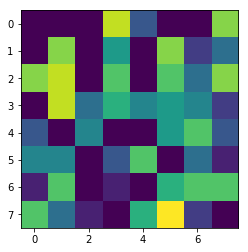

[[ 0.  0.  0.  8.  8.  0.  0.  9.]
 [ 0.  3.  0.  4.  0. 10.  4.  5.]
 [ 6.  9.  0.  7.  0.  4.  6.  8.]
 [ 0.  9.  4.  9.  7.  3.  4.  5.]
 [ 0.  0.  7.  0.  0.  6.  8.  7.]
 [ 7.  4.  0.  5.  5.  0.  1.  7.]
 [ 1.  9.  0.  0.  0.  5.  7.  6.]
 [ 8.  6.  1.  0.  5. 12.  7.  0.]]


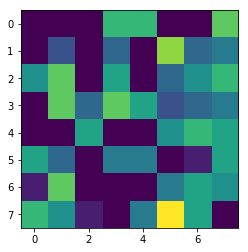

[[ 0.  0.  0. 10.  5.  0.  0.  8.]
 [ 0.  5.  0.  3.  0. 11.  0. 10.]
 [ 2.  9.  0.  6.  0.  2. 14.  9.]
 [ 0.  8.  8.  8.  7.  3.  9.  2.]
 [ 0.  0.  3.  0.  0.  4. 12.  7.]
 [ 9.  1.  0.  2.  6.  0.  0.  5.]
 [ 0.  9.  0.  0.  0.  8. 10.  6.]
 [ 9.  6.  4.  0.  0.  8.  1.  0.]]


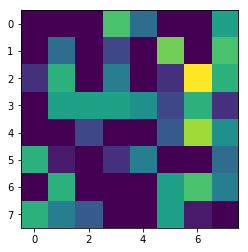

[[ 0.  0.  0. 11.  3.  0.  0.  9.]
 [ 0.  6.  0.  4.  0. 11.  0. 12.]
 [ 0. 10.  0.  5.  0.  0. 16. 10.]
 [ 0.  8. 10.  8.  5.  1. 10.  1.]
 [ 0.  0.  5.  0.  0.  3. 12.  7.]
 [11.  2.  0.  1.  5.  0.  0.  8.]
 [ 0. 10.  0.  1.  0.  7.  8.  8.]
 [ 7.  5.  5.  0.  0.  8.  1.  0.]]


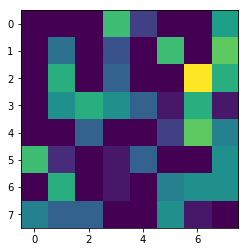

[[ 0.  0.  0. 10.  9.  0.  0.  8.]
 [ 0.  3.  0.  3.  0. 11.  5.  6.]
 [ 7.  9.  0.  5.  0.  4.  6.  8.]
 [ 0.  7.  5.  9.  7.  4.  5.  5.]
 [ 0.  0.  8.  0.  0.  5.  9.  6.]
 [ 6.  4.  0.  5.  6.  0.  0.  6.]
 [ 0. 11.  0.  1.  0.  4.  6.  5.]
 [ 8.  6.  0.  0.  6. 10.  7.  0.]]


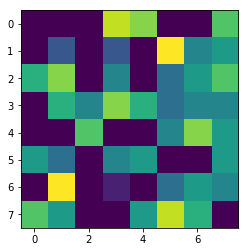

[[ 0.  0.  0. 10.  9.  0.  0.  9.]
 [ 0.  2.  0.  1.  0. 11.  5.  8.]
 [ 4. 10.  0.  6.  0.  1.  9.  7.]
 [ 0.  6.  6. 10.  8.  1.  7.  3.]
 [ 0.  0.  8.  0.  0.  4. 10.  9.]
 [ 9.  1.  0.  3.  5.  0.  0.  8.]
 [ 0. 11.  0.  0.  0.  6.  6.  6.]
 [ 8.  8.  1.  0.  3.  8.  7.  0.]]


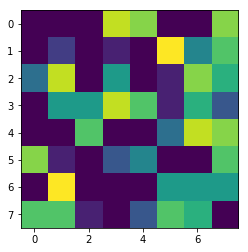

[[ 0.  0.  0.  9. 10.  0.  0.  8.]
 [ 0.  3.  0.  4.  0. 10.  6.  3.]
 [ 9.  8.  0.  6.  0.  5.  2.  8.]
 [ 0.  9.  3.  9.  8.  5.  2.  6.]
 [ 1.  0.  8.  0.  0.  6.  8.  5.]
 [ 5.  5.  0.  7.  6.  0.  1.  6.]
 [ 1. 10.  0.  1.  0.  4.  6.  3.]
 [ 7.  5.  0.  0.  8. 11.  8.  0.]]


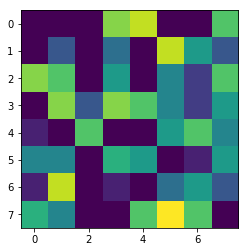

[[ 0.  0.  0.  8. 10.  0.  0.  8.]
 [ 0.  0.  0.  0.  0.  9.  5.  9.]
 [ 2.  8.  0.  5.  0.  0. 11.  8.]
 [ 0.  6.  8. 11.  8.  0.  7.  4.]
 [ 0.  0.  8.  0.  0.  5. 10. 10.]
 [ 9.  2.  0.  4.  2.  0.  0. 10.]
 [ 0. 12.  0.  1.  0.  5.  7.  5.]
 [ 8.  8.  3.  0.  2.  7.  8.  0.]]


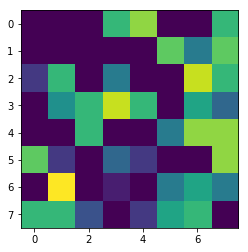

[[ 0.  0.  0. 11.  3.  0.  0.  9.]
 [ 0.  7.  0.  4.  0. 11.  0. 13.]
 [ 0.  9.  0.  5.  0.  1. 16. 10.]
 [ 0.  8. 10.  7.  6.  2. 10.  0.]
 [ 0.  0.  4.  0.  0.  3. 13.  6.]
 [11.  2.  0.  1.  5.  0.  0.  7.]
 [ 0. 10.  0.  2.  0.  8.  9.  8.]
 [ 8.  4.  6.  0.  0.  7.  0.  0.]]


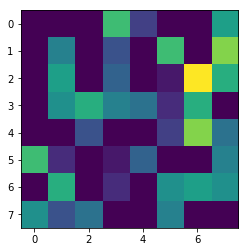

[[ 0.  0.  0.  8. 10.  0.  0.  9.]
 [ 0.  0.  0.  0.  0.  9.  7.  7.]
 [ 5.  9.  0.  6.  0.  1.  8.  6.]
 [ 0.  6.  5. 10.  8.  0.  7.  3.]
 [ 0.  0.  8.  0.  0.  5.  9. 10.]
 [ 9.  1.  0.  3.  4.  0.  0.  9.]
 [ 2. 12.  0.  0.  0.  5.  6.  7.]
 [ 9.  8.  1.  0.  5.  8.  9.  0.]]


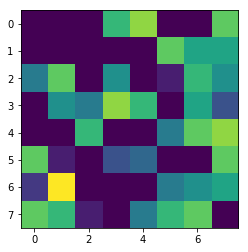

[[ 0.  0.  0. 11.  4.  0.  0.  8.]
 [ 0.  4.  0.  3.  0. 11.  0. 13.]
 [ 0.  9.  0.  5.  0.  0. 16. 10.]
 [ 0.  8. 10.  8.  6.  1. 11.  1.]
 [ 0.  0.  5.  0.  0.  3. 12.  7.]
 [11.  1.  0.  2.  5.  0.  0.  9.]
 [ 1. 11.  0.  2.  0.  7.  8.  7.]
 [ 7.  5.  5.  0.  0.  7.  1.  0.]]


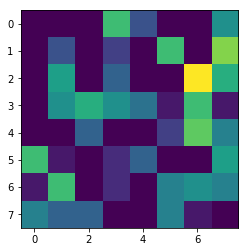

[[ 0.  0.  0.  8. 12.  0.  0.  8.]
 [ 0.  0.  0.  0.  0. 10.  8.  5.]
 [ 6.  9.  0.  6.  0.  2.  5.  7.]
 [ 0.  5.  6. 11. 10.  1.  3.  6.]
 [ 0.  0. 10.  0.  0.  5.  8.  9.]
 [ 8.  3.  0.  6.  5.  0.  0.  8.]
 [ 2. 11.  0.  1.  0.  5.  5.  2.]
 [ 7.  8.  0.  0.  7.  8. 10.  0.]]


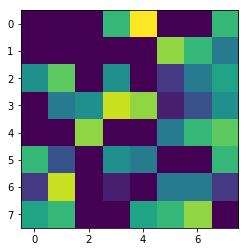

[[ 0.  0.  0. 10.  4.  0.  0.  8.]
 [ 0.  8.  0.  7.  0.  9.  3.  3.]
 [ 8.  9.  0.  9.  0.  7.  4.  8.]
 [ 0.  9.  5.  7.  7.  6.  2.  5.]
 [ 5.  0.  3.  0.  0.  7.  9.  3.]
 [ 5.  5.  0.  5.  8.  0.  5.  0.]
 [ 2.  7.  0.  1.  0.  8.  9.  4.]
 [ 8.  4.  1.  0.  7. 10.  1.  0.]]


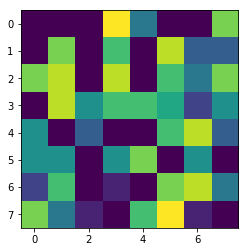

[[ 0.  0.  0. 11.  1.  0.  0.  9.]
 [ 0. 10.  0.  5.  0. 10.  0. 11.]
 [ 2.  9.  0.  6.  0.  3. 14.  9.]
 [ 0.  8.  9.  6.  4.  3.  9.  0.]
 [ 2.  0.  2.  0.  0.  3. 12.  5.]
 [ 9.  3.  0.  0.  7.  0.  1.  4.]
 [ 1.  9.  0.  2.  0.  9.  9.  9.]
 [ 8.  4.  5.  0.  1.  8.  0.  0.]]


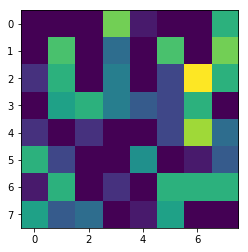

[[ 0.  0.  0. 10.  2.  0.  0.  8.]
 [ 0.  9.  0.  7.  0. 10.  2.  4.]
 [ 8.  9.  0.  9.  0.  7.  5.  8.]
 [ 0.  9.  5.  6.  6.  7.  3.  4.]
 [ 5.  0.  2.  0.  0.  6.  9.  3.]
 [ 5.  5.  0.  3.  9.  0.  5.  0.]
 [ 2.  7.  0.  1.  0.  9. 10.  5.]
 [ 8.  3.  2.  0.  6. 10.  0.  0.]]


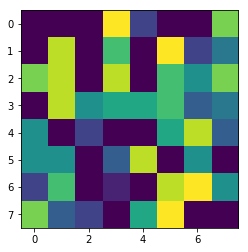

[[ 0.  0.  0.  7.  9.  0.  0.  8.]
 [ 0.  0.  0.  1.  0.  8.  4. 11.]
 [ 0.  8.  0.  3.  0.  0. 13.  7.]
 [ 0.  5. 10.  9.  4.  0. 10.  3.]
 [ 0.  0.  9.  0.  0.  3. 10. 11.]
 [12.  3.  0.  3.  0.  0.  0. 15.]
 [ 1. 13.  0.  3.  0.  2.  6.  8.]
 [ 9.  7.  6.  0.  0.  7.  7.  0.]]


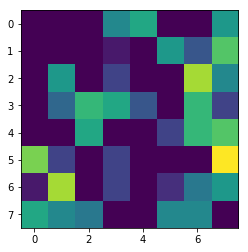

[[ 0.  0.  0.  9.  9.  0.  0.  8.]
 [ 0.  4.  0.  3.  0. 10.  7.  3.]
 [10.  9.  0.  6.  0.  6.  2.  6.]
 [ 0.  7.  3.  8.  7.  5.  3.  4.]
 [ 1.  0.  7.  0.  0.  4.  8.  6.]
 [ 5.  4.  0.  4.  8.  0.  1.  3.]
 [ 4.  9.  0.  1.  0.  5.  5.  6.]
 [ 8.  6.  0.  0.  9. 10.  8.  0.]]


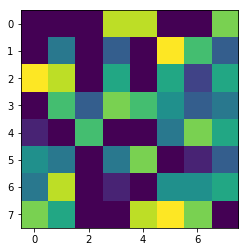

[[ 0.  0.  0. 10.  4.  0.  0.  9.]
 [ 0.  6.  0.  4.  0. 10.  4.  7.]
 [ 6. 10.  0.  6.  0.  3.  9.  8.]
 [ 0.  8.  7.  8.  7.  3.  7.  2.]
 [ 2.  0.  5.  0.  0.  4. 10.  6.]
 [ 9.  2.  0.  2.  7.  0.  1.  5.]
 [ 3.  9.  0.  1.  0.  8.  7.  7.]
 [ 7.  5.  2.  0.  4.  8.  4.  0.]]


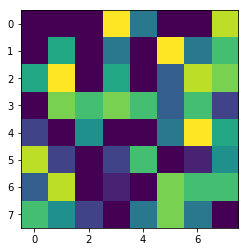

[[ 0.  0.  0. 11.  1.  0.  0.  9.]
 [ 0. 10.  0.  5.  0. 10.  0. 11.]
 [ 2. 10.  0.  7.  0.  3. 15.  8.]
 [ 0.  8.  9.  6.  5.  3. 10.  0.]
 [ 2.  0.  1.  0.  0.  3. 12.  6.]
 [ 9.  2.  0.  0.  7.  0.  0.  4.]
 [ 1.  8.  0.  1.  0.  9. 10.  9.]
 [ 9.  5.  5.  0.  0.  7.  0.  0.]]


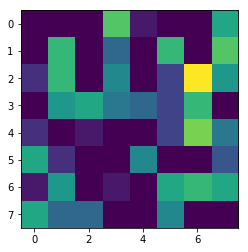

[[ 0.  0.  0.  7. 10.  0.  0.  8.]
 [ 0.  0.  0.  2.  0.  8.  7.  6.]
 [ 6.  8.  0.  6.  0.  2.  6.  6.]
 [ 0.  7.  4. 10.  7.  1.  4.  6.]
 [ 1.  0.  9.  0.  0.  5.  7. 10.]
 [ 8.  3.  0.  5.  4.  0.  0. 10.]
 [ 3. 10.  0.  1.  0.  3.  5.  4.]
 [ 8.  8.  1.  0.  5. 10. 10.  0.]]


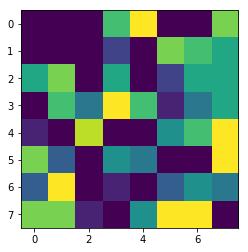

[[ 0.  0.  0. 10.  5.  0.  0.  9.]
 [ 0.  5.  0.  3.  0. 10.  4.  9.]
 [ 4. 10.  0.  8.  0.  2. 12.  7.]
 [ 0.  7.  8.  8.  8.  2.  9.  1.]
 [ 1.  0.  3.  0.  0.  3. 11.  8.]
 [10.  0.  0.  1.  8.  0.  0.  4.]
 [ 2.  9.  0.  0.  0.  9.  8.  7.]
 [ 9.  8.  3.  0.  2.  7.  3.  0.]]


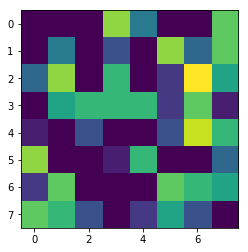

[[ 0.  0.  0. 10.  4.  0.  0.  7.]
 [ 0.  8.  0.  7.  0.  9.  4.  6.]
 [12.  8.  0.  5.  0.  8.  4.  7.]
 [ 0. 10.  2.  7.  3.  7.  7.  0.]
 [ 0.  0.  6.  0.  0.  3.  8.  2.]
 [ 6.  4.  0.  1.  7.  0.  1.  5.]
 [ 7.  9.  0.  3.  0.  4.  3. 12.]
 [ 8.  2.  2.  0.  9. 12.  5.  0.]]


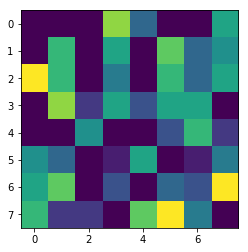

[[ 0.  0.  0. 10.  2.  0.  0.  9.]
 [ 0.  9.  0.  6.  0.  9.  3.  6.]
 [ 9. 10.  0.  7.  0.  7.  7.  8.]
 [ 0.  9.  4.  6.  4.  5.  7.  1.]
 [ 2.  0.  4.  0.  0.  4.  9.  4.]
 [ 6.  4.  0.  1.  8.  0.  2.  2.]
 [ 4.  8.  0.  1.  0.  8.  7. 10.]
 [ 9.  4.  2.  0.  7.  9.  2.  0.]]


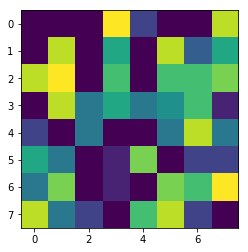

[[ 0.  0.  0.  4. 13.  0.  0.  8.]
 [ 0.  0.  0.  2.  0.  6.  8.  7.]
 [ 2.  5.  0.  1.  0.  0.  7.  8.]
 [ 0.  4.  8. 12.  6.  0.  4.  8.]
 [ 0.  0. 13.  0.  0.  5.  8. 12.]
 [10.  6.  0.  6.  0.  0.  0. 17.]
 [ 1. 13.  0.  5.  0.  0.  5.  3.]
 [ 8.  5.  3.  0.  4.  7. 13.  0.]]


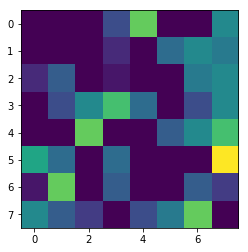

[[ 0.  0.  0.  8.  6.  1.  0.  8.]
 [ 0.  3.  0.  5.  0.  9.  1.  9.]
 [ 5.  7.  0.  2.  0.  3. 11.  9.]
 [ 0.  8.  8.  8.  3.  4.  7.  4.]
 [ 2.  0.  7.  0.  0.  3. 10.  6.]
 [ 8.  5.  0.  3.  3.  0.  0. 10.]
 [ 3. 11.  0.  5.  0.  3.  7.  6.]
 [ 8.  3.  5.  0.  2.  8.  6.  0.]]


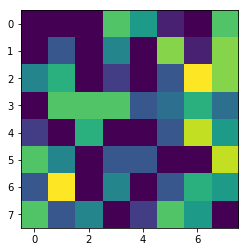

[[ 0.  0.  0.  7. 11.  1.  0.  9.]
 [ 0.  0.  0.  1.  0.  9.  7.  8.]
 [ 5.  8.  0.  3.  0.  1.  8.  7.]
 [ 0.  5.  6. 10.  6.  1.  6.  5.]
 [ 1.  0. 10.  0.  0.  4.  9. 10.]
 [ 9.  4.  0.  5.  3.  0.  0. 12.]
 [ 3. 12.  0.  3.  0.  3.  4.  5.]
 [ 8.  6.  2.  0.  4.  7. 11.  0.]]


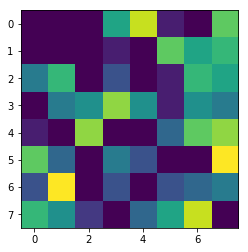

[[ 0.  0.  0.  9.  8.  2.  0.  6.]
 [ 0.  0.  0.  5.  0. 11.  4.  5.]
 [ 7.  8.  0.  6.  0.  4.  6.  9.]
 [ 0.  9.  6. 10.  8.  5.  2.  8.]
 [ 4.  0.  6.  0.  0.  6.  9.  5.]
 [ 6.  4.  0.  8.  6.  0.  1.  6.]
 [ 2.  8.  0.  2.  0.  6.  7.  0.]
 [ 5.  5.  0.  0.  5. 10.  7.  0.]]


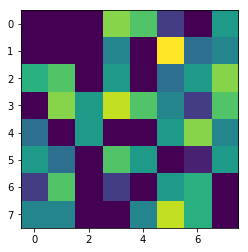

[[ 0.  0.  0.  8. 10.  1.  0.  6.]
 [ 1.  0.  0.  1.  0. 10.  8.  4.]
 [ 5. 10.  0. 10.  0.  2.  6.  5.]
 [ 0.  5.  7. 11. 12.  2.  2.  7.]
 [ 4.  0.  5.  0.  0.  6.  8. 10.]
 [ 7.  1.  0.  6.  7.  0.  0.  5.]
 [ 0.  9.  0.  0.  0.  9.  8.  0.]
 [ 7. 10.  0.  0.  4.  7.  7.  0.]]


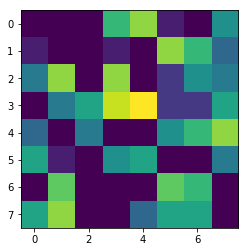

[[ 0.  0.  0.  9.  5.  2.  0.  9.]
 [ 0.  2.  0.  3.  0.  9.  2. 11.]
 [ 1.  8.  0.  2.  0.  0. 14.  9.]
 [ 0.  6. 10.  9.  5.  1. 10.  3.]
 [ 1.  0.  7.  0.  0.  3. 11.  8.]
 [11.  3.  0.  3.  3.  0.  0. 12.]
 [ 2. 11.  0.  4.  0.  5.  6.  7.]
 [ 7.  4.  5.  0.  0.  6.  5.  0.]]


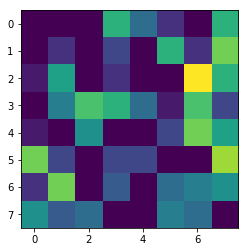

[[ 0.  0.  0.  9.  4.  2.  0.  9.]
 [ 0.  6.  0.  3.  0.  8.  1. 13.]
 [ 2.  7.  0.  0.  0.  2. 16.  8.]
 [ 0.  5. 10.  6.  0.  3. 13.  0.]
 [ 0.  0.  5.  0.  0.  1. 12.  7.]
 [ 9.  4.  0.  0.  2.  0.  0. 10.]
 [ 5. 13.  0.  5.  0.  4.  7. 12.]
 [12.  4.  7.  0.  0.  5.  4.  0.]]


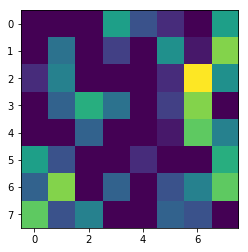

[[ 0.  0.  0.  2. 13.  2.  0. 10.]
 [ 2.  0.  0.  0.  0.  5. 10.  6.]
 [ 5.  5.  0.  0.  0.  1.  4.  6.]
 [ 0.  2.  7. 11.  3.  1.  4.  4.]
 [ 0.  0. 14.  0.  0.  4.  6. 13.]
 [ 9.  7.  0.  3.  0.  0.  0. 15.]
 [ 4. 14.  0.  6.  0.  0.  4.  7.]
 [11.  5.  2.  0.  8.  4. 13.  0.]]


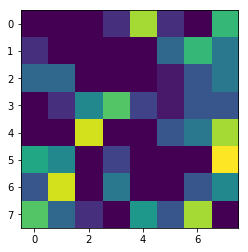

[[ 0.  0.  0.  9.  3.  2.  0.  8.]
 [ 0.  7.  0.  7.  0.  9.  4.  2.]
 [10.  9.  0.  8.  0.  9.  2.  8.]
 [ 0.  9.  4.  7.  5.  7.  2.  5.]
 [ 6.  0.  3.  0.  0.  7.  7.  3.]
 [ 4.  6.  0.  4.  9.  0.  6.  0.]
 [ 3.  7.  0.  2.  0.  8.  8.  5.]
 [ 7.  3.  1.  0.  8. 10.  3.  0.]]


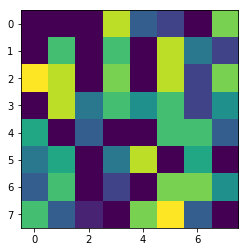

[[ 0.  0.  0.  6.  9.  1.  0.  9.]
 [ 2.  0.  0.  0.  0.  7.  6.  9.]
 [ 1.  8.  0.  3.  0.  0. 11.  7.]
 [ 0.  3. 10. 10.  5.  0. 10.  3.]
 [ 0.  0.  9.  0.  0.  3. 10. 13.]
 [12.  3.  0.  2.  1.  0.  0. 14.]
 [ 2. 12.  0.  4.  0.  3.  5.  7.]
 [10.  7.  4.  0.  2.  4.  9.  0.]]


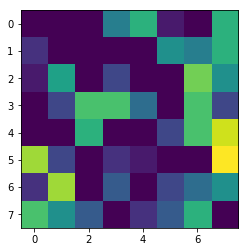

[[ 0.  0.  0. 10.  1.  3.  0.  8.]
 [ 1. 11.  0.  6.  0.  8.  0. 10.]
 [ 7.  8.  0.  2.  0.  5. 12.  8.]
 [ 0.  8.  7.  4.  0.  5. 11.  0.]
 [ 0.  0.  3.  0.  0.  2. 11.  3.]
 [ 7.  5.  0.  0.  5.  0.  0.  6.]
 [ 8. 10.  0.  4.  0.  6.  6. 14.]
 [10.  2.  6.  0.  3.  8.  2.  0.]]


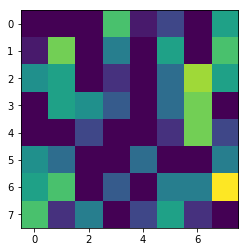

[[ 0.  0.  0.  9.  6.  3.  0.  6.]
 [ 1.  4.  0.  8.  0.  9.  1.  7.]
 [ 9.  5.  0.  1.  0.  6.  7. 10.]
 [ 0.  9.  5.  7.  2.  7.  4.  7.]
 [ 4.  0.  7.  0.  0.  5.  8.  2.]
 [ 4.  8.  0.  6.  4.  0.  1.  8.]
 [ 6.  9.  0.  6.  0.  3.  5.  4.]
 [ 6.  0.  3.  0.  5. 11.  7.  0.]]


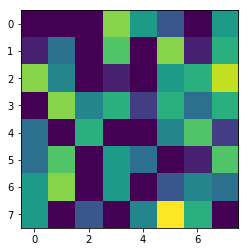

[[ 0.  0.  0.  6.  8.  0.  0.  7.]
 [ 2.  0.  0.  2.  0.  8.  5.  7.]
 [ 2.  8.  0.  6.  0.  0. 10.  7.]
 [ 0.  6.  8. 11.  8.  0.  6.  8.]
 [ 3.  0.  7.  0.  0.  5.  9. 11.]
 [11.  3.  0.  7.  3.  0.  0. 12.]
 [ 1. 10.  0.  2.  0.  5.  6.  2.]
 [ 6.  7.  3.  0.  1.  7.  9.  0.]]


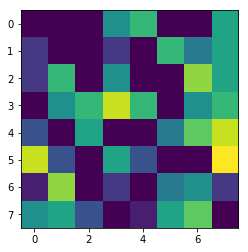

[[ 0.  0.  0.  8.  7.  2.  0.  7.]
 [ 1.  2.  0.  5.  0.  9.  6.  2.]
 [10.  8.  0.  6.  0.  6.  2.  7.]
 [ 0.  8.  3.  9.  7.  5.  3.  6.]
 [ 3.  0.  7.  0.  0.  5.  7.  4.]
 [ 5.  5.  0.  6.  8.  1.  2.  5.]
 [ 7.  8.  0.  2.  0.  6.  4.  4.]
 [ 6.  4.  0.  0.  8. 10.  9.  0.]]


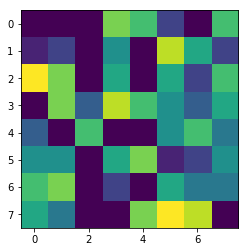

[[ 0.  0.  0. 10.  7.  2.  0.  7.]
 [ 1.  4.  0.  3.  0. 10.  7.  6.]
 [10.  9.  0.  4.  0.  5.  5.  5.]
 [ 0.  6.  4.  8.  6.  5.  6.  3.]
 [ 0.  0.  7.  0.  0.  2.  8.  5.]
 [ 5.  4.  0.  2.  7.  1.  0.  5.]
 [10. 10.  0.  3.  0.  5.  2.  8.]
 [ 8.  5.  0.  0.  8.  8.  9.  0.]]


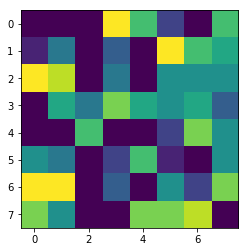

[[ 0.  0.  0.  5.  9.  0.  0.  7.]
 [ 3.  0.  0.  0.  0.  6.  9.  6.]
 [ 2. 11.  0. 12.  0.  0.  7.  1.]
 [ 0.  3.  8. 10. 11.  0.  7.  4.]
 [ 2.  0.  7.  0.  0.  6.  7. 18.]
 [11.  0.  0.  5.  2.  1.  0.  9.]
 [ 0. 10.  0.  0.  0.  6.  7.  4.]
 [10. 12.  2.  0.  3.  4.  8.  0.]]


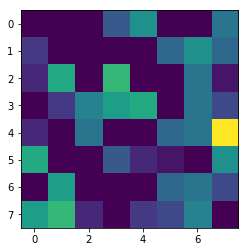

[[ 0.  0.  0.  9.  2.  3.  0.  8.]
 [ 0.  8.  0.  7.  0.  9.  4.  2.]
 [11.  9.  0.  9.  0.  9.  1.  7.]
 [ 0.  9.  3.  6.  4.  7.  3.  3.]
 [ 5.  0.  3.  0.  0.  6.  7.  3.]
 [ 4.  6.  0.  3.  9.  1.  6.  0.]
 [ 5.  6.  0.  2.  0.  8.  7.  7.]
 [ 7.  3.  1.  0.  9. 10.  2.  0.]]


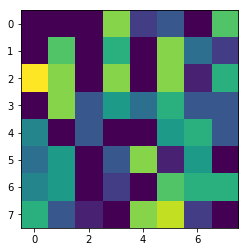

[[ 0.  0.  0.  9.  3.  3.  0.  7.]
 [ 0.  7.  0.  6.  0.  9.  5.  1.]
 [12.  9.  0.  9.  0. 10.  0.  6.]
 [ 0.  9.  2.  6.  4.  7.  3.  3.]
 [ 5.  0.  4.  0.  0.  6.  6.  3.]
 [ 3.  6.  0.  3.  9.  2.  6.  0.]
 [ 6.  6.  0.  2.  0.  7.  7.  7.]
 [ 7.  4.  0.  0. 10. 10.  4.  0.]]


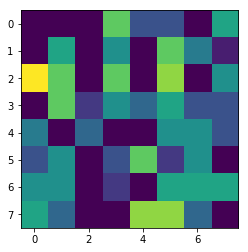

[[ 0.  0.  0.  9.  2.  3.  0.  7.]
 [ 1.  5.  0.  6.  0. 10.  1.  8.]
 [ 2.  9.  0.  6.  0.  2. 11.  9.]
 [ 0.  8.  9.  8.  7.  3.  6.  5.]
 [ 4.  0.  3.  0.  0.  4. 10.  5.]
 [ 9.  4.  0.  4.  7.  3.  2.  6.]
 [ 2.  8.  0.  3.  0.  9.  8.  4.]
 [ 5.  3.  4.  0.  1.  7.  2.  0.]]


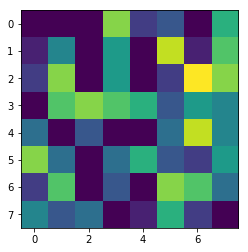

[[ 0.  0.  0.  8.  8.  1.  0.  7.]
 [ 0.  0.  0.  1.  0. 10. 10.  3.]
 [ 8. 12.  0. 12.  0.  4.  3.  3.]
 [ 0.  5.  4.  9. 11.  2.  4.  4.]
 [ 2.  0.  5.  0.  0.  4.  6.  9.]
 [ 7.  1.  0.  4. 10.  3.  2.  2.]
 [ 5.  7.  0.  0.  0.  9.  6.  4.]
 [ 7. 11.  0.  0.  8.  7.  8.  0.]]


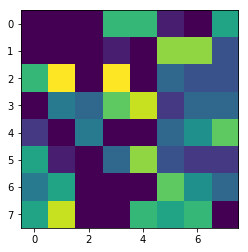

[[ 0.  0.  0.  9.  2.  3.  0.  6.]
 [ 0.  5.  0.  6.  0. 10.  1.  9.]
 [ 2.  9.  0.  6.  0.  1. 13. 10.]
 [ 0.  8. 10.  9.  8.  3.  7.  5.]
 [ 4.  0.  3.  0.  0.  4. 10.  5.]
 [ 9.  3.  0.  5.  7.  3.  2.  6.]
 [ 2.  7.  0.  3.  0.  9.  8.  3.]
 [ 5.  4.  4.  0.  0.  7.  2.  0.]]


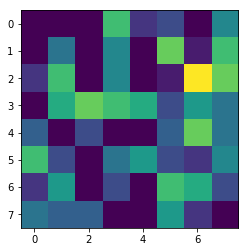

[[ 0.  0.  0.  9.  1.  4.  0.  7.]
 [ 0. 10.  0.  7.  0.  8.  4.  2.]
 [13.  9.  0.  9.  0. 10.  0.  6.]
 [ 0.  9.  1.  6.  3.  8.  4.  1.]
 [ 3.  0.  4.  0.  0.  5.  6.  2.]
 [ 3.  6.  0.  1. 10.  1.  7.  0.]
 [ 9.  6.  0.  3.  0.  7.  5. 10.]
 [ 8.  3.  1.  0. 11. 11.  3.  0.]]


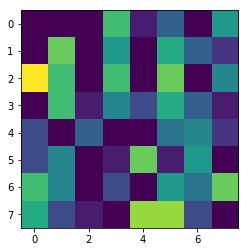

[[ 0.  0.  0.  9.  2.  5.  0.  7.]
 [ 0.  9.  0.  8.  0.  8.  2.  2.]
 [12.  8.  0.  7.  0. 10.  1.  7.]
 [ 0.  9.  2.  5.  2.  9.  3.  3.]
 [ 5.  0.  4.  0.  0.  6.  6.  1.]
 [ 2.  8.  0.  3.  8.  1.  7.  1.]
 [ 7.  7.  0.  4.  0.  6.  6.  8.]
 [ 7.  1.  2.  0.  9. 11.  3.  0.]]


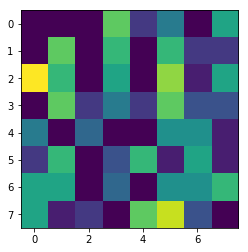

[[ 0.  0.  0.  6.  7.  2.  0.  6.]
 [ 1.  0.  0.  4.  0.  9.  4.  6.]
 [ 1.  9.  0.  9.  0.  0.  9.  7.]
 [ 0.  7.  7. 11.  8.  0.  4.  9.]
 [ 5.  0.  7.  0.  0.  6.  8. 10.]
 [10.  2.  0.  9.  4.  2.  0. 12.]
 [ 2.  8.  0.  2.  0.  7.  6.  0.]
 [ 3.  7.  2.  0.  0.  9.  8.  0.]]


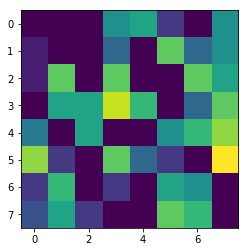

[[ 0.  0.  0.  8.  8.  2.  0.  7.]
 [ 0.  0.  0.  1.  0.  9. 10.  3.]
 [ 8. 11.  0. 12.  0.  3.  4.  2.]
 [ 0.  5.  4.  9. 11.  1.  4.  4.]
 [ 2.  0.  6.  0.  0.  4.  6. 10.]
 [ 7.  1.  0.  5.  9.  1.  1.  4.]
 [ 6.  8.  0.  0.  0.  8.  5.  5.]
 [ 7. 11.  0.  0.  7.  7.  9.  0.]]


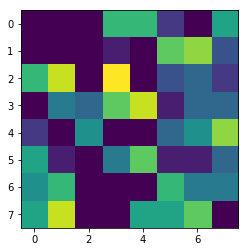

[[ 0.  0.  0.  9.  2.  3.  0.  8.]
 [ 0.  7.  0.  4.  0.  9.  3.  8.]
 [ 3. 10.  0.  9.  0.  2. 11.  7.]
 [ 0.  7.  9.  7.  7.  2.  8.  3.]
 [ 4.  0.  1.  0.  0.  3. 10.  7.]
 [ 8.  3.  0.  2.  8.  1.  3.  4.]
 [ 3.  7.  0.  2.  0.  9.  9.  6.]
 [ 7.  6.  4.  0.  2.  6.  2.  0.]]


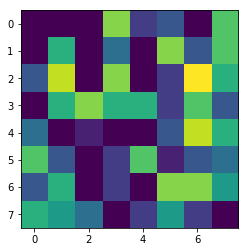

[[ 0.  0.  0.  8.  9.  3.  0.  7.]
 [ 0.  2.  0.  2.  0.  9. 10.  3.]
 [10. 10.  0.  8.  0.  5.  1.  4.]
 [ 0.  5.  4.  9.  9.  4.  3.  4.]
 [ 2.  0.  7.  0.  0.  3.  6.  6.]
 [ 5.  4.  0.  4.  9.  1.  3.  3.]
 [ 8.  8.  0.  1.  0.  7.  4.  5.]
 [ 7.  8.  0.  0. 10.  7.  9.  0.]]


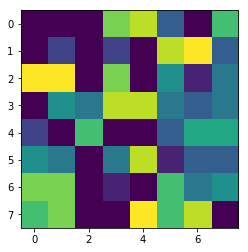

[[ 0.  0.  0. 10.  2.  4.  0.  7.]
 [ 1.  8.  0.  5.  0.  9.  1. 10.]
 [ 2.  9.  0.  5.  0.  2. 13.  9.]
 [ 0.  7. 10.  7.  5.  3.  8.  3.]
 [ 3.  0.  3.  0.  0.  2. 10.  5.]
 [ 9.  4.  0.  2.  7.  1.  2.  6.]
 [ 4.  8.  0.  4.  0.  8.  7.  7.]
 [ 6.  3.  5.  0.  1.  6.  2.  0.]]


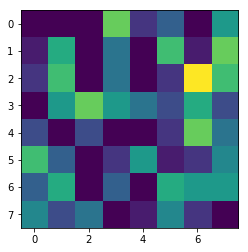

[[ 0.  0.  0.  8.  6.  2.  0.  7.]
 [ 0.  1.  0.  0.  0.  9.  9.  5.]
 [ 7. 12.  0. 14.  0.  3.  6.  2.]
 [ 0.  6.  5.  9. 11.  0.  7.  3.]
 [ 1.  0.  4.  0.  0.  3.  7. 10.]
 [ 8.  0.  0.  3. 10.  0.  1.  3.]
 [ 6.  7.  0.  0.  0. 10.  6.  6.]
 [ 7. 12.  0.  0.  5.  7.  7.  0.]]


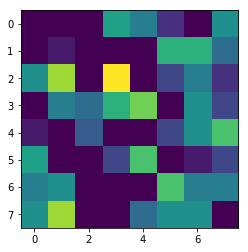

[[ 0.  0.  0.  8.  5.  2.  0.  7.]
 [ 0.  2.  0.  4.  0. 10.  5.  6.]
 [ 4. 10.  0.  8.  0.  2.  8.  7.]
 [ 0.  7.  7.  9.  9.  2.  5.  6.]
 [ 4.  0.  4.  0.  0.  4.  8.  7.]
 [ 8.  2.  0.  6.  8.  1.  2.  6.]
 [ 4.  7.  0.  1.  0.  9.  7.  2.]
 [ 5.  6.  2.  0.  3.  7.  6.  0.]]


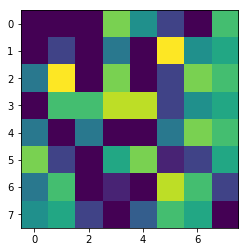

[[ 0.  0.  0.  4.  9.  1.  0.  9.]
 [ 4.  0.  0.  0.  0.  5. 11.  5.]
 [ 4.  9.  0.  8.  0.  1.  5.  1.]
 [ 0.  2.  5.  9.  7.  0.  8.  2.]
 [ 0.  0. 10.  0.  0.  3.  5. 15.]
 [10.  1.  1.  3.  3.  0.  0. 12.]
 [ 7. 10.  0.  1.  0.  3.  3. 10.]
 [10. 10.  3.  0.  8.  4. 13.  0.]]


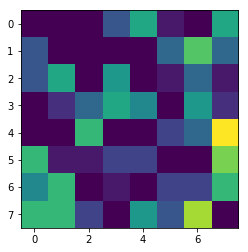

[[ 0.  0.  0.  4.  8.  1.  0.  8.]
 [ 3.  0.  0.  0.  0.  7. 10.  5.]
 [ 4. 10.  0.  9.  0.  0.  6.  4.]
 [ 0.  3.  8. 11.  9.  0.  6.  4.]
 [ 1.  0.  9.  0.  0.  4.  7. 13.]
 [10.  2.  1.  5.  5.  0.  0. 10.]
 [ 4. 10.  0.  2.  0.  6.  5.  5.]
 [ 7. 10.  1.  0.  6.  4. 11.  0.]]


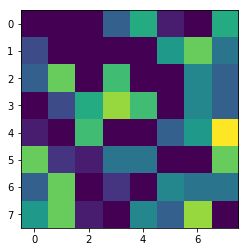

[[ 0.  0.  0.  7.  6.  4.  0.  4.]
 [ 1.  1.  0.  5.  0. 10.  2.  5.]
 [ 9.  7.  0.  5.  0.  5.  7.  8.]
 [ 0.  9.  4.  8.  5.  5.  4.  8.]
 [ 3.  0.  8.  0.  0.  5.  7.  4.]
 [ 4.  5.  2.  8.  5.  0.  2.  9.]
 [ 8.  8.  0.  4.  0.  4.  4.  3.]
 [ 4.  4.  2.  0.  4. 11. 10.  0.]]


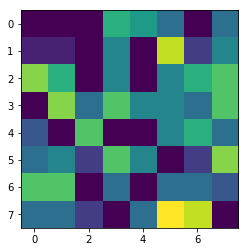

[[ 0.  0.  0.  8.  6.  5.  0.  6.]
 [ 2.  5.  0.  5.  0.  9.  4.  6.]
 [ 9.  7.  0.  2.  0.  5.  6.  8.]
 [ 0.  6.  5.  7.  4.  5.  6.  4.]
 [ 0.  0.  8.  0.  0.  2.  8.  2.]
 [ 5.  5.  2.  4.  6.  1.  1.  8.]
 [11.  9.  0.  5.  0.  4.  1.  8.]
 [ 6.  3.  1.  0.  7.  8.  9.  0.]]


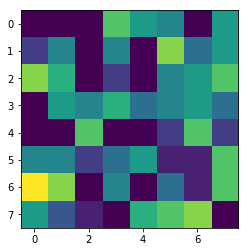

[[ 0.  0.  0.  7.  5.  2.  0.  6.]
 [ 4.  0.  0.  5.  0.  8.  1.  9.]
 [ 2.  7.  0.  3.  0.  0. 12. 10.]
 [ 0.  7.  9.  8.  4.  2.  8.  7.]
 [ 2.  0.  8.  0.  0.  3. 10.  7.]
 [10.  5.  2.  7.  2.  1.  0. 14.]
 [ 4. 10.  0.  6.  0.  4.  4.  4.]
 [ 5.  3.  6.  0.  0.  7.  7.  0.]]


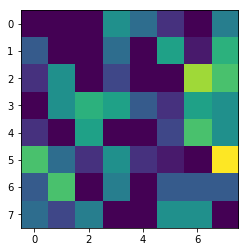

[[ 0.  0.  0.  5.  9.  4.  0.  7.]
 [ 6.  2.  0.  4.  0.  6.  6.  5.]
 [ 7.  5.  0.  0.  0.  4.  4.  8.]
 [ 0.  4.  7.  8.  3.  5.  4.  6.]
 [ 0.  0. 11.  0.  0.  2.  7.  6.]
 [ 6.  9.  2.  5.  2.  2.  0. 12.]
 [ 8. 12.  0.  8.  0.  1.  2.  5.]
 [ 7.  2.  2.  0.  9.  6. 11.  0.]]


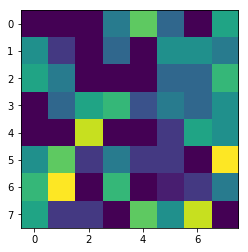

[[ 0.  0.  0.  6.  8.  4.  0.  8.]
 [ 5.  2.  0.  3.  0.  8.  7.  6.]
 [ 7.  6.  0.  1.  0.  3.  5.  7.]
 [ 0.  4.  7.  8.  4.  4.  5.  4.]
 [ 0.  0. 10.  0.  0.  1.  7.  6.]
 [ 6.  7.  2.  4.  4.  2.  0. 10.]
 [ 9. 12.  0.  6.  0.  2.  2.  6.]
 [ 7.  3.  2.  0.  9.  5. 11.  0.]]


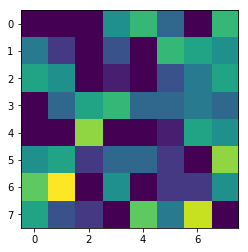

[[ 0.  0.  0.  3.  9.  1.  0. 10.]
 [ 7.  0.  0.  0.  0.  4. 11.  5.]
 [ 3.  8.  0.  5.  0.  1.  5.  4.]
 [ 0.  0.  9. 10.  8.  0.  7.  3.]
 [ 0.  0. 10.  0.  0.  3.  6. 14.]
 [11.  3.  2.  3.  2.  2.  0. 11.]
 [ 4. 12.  0.  4.  0.  3.  5.  7.]
 [10.  9.  2.  0.  9.  1. 11.  0.]]


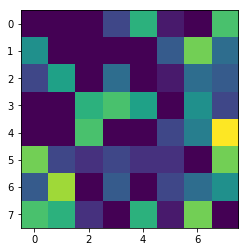

[[ 0.  0.  0.  8.  2.  3.  0.  7.]
 [ 4.  3.  0.  4.  0.  9.  0. 11.]
 [ 0.  8.  0.  4.  0.  0. 15.  9.]
 [ 0.  5. 11.  8.  5.  1. 11.  3.]
 [ 0.  0.  6.  0.  0.  1. 11.  7.]
 [12.  3.  0.  3.  4.  2.  0. 12.]
 [ 4. 10.  0.  5.  0.  6.  5.  7.]
 [ 6.  4.  7.  0.  0.  5.  4.  0.]]


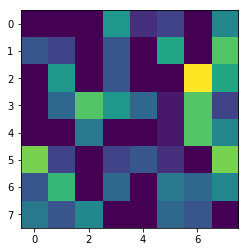

[[ 0.  0.  0.  6.  7.  0.  0.  6.]
 [ 3.  0.  0.  0.  0.  8.  9.  6.]
 [ 4. 11.  0. 12.  0.  1. 10.  1.]
 [ 0.  3.  8.  8. 10.  0.  8.  3.]
 [ 1.  0.  4.  0.  0.  4.  8. 15.]
 [ 7.  0.  1.  4.  5.  2.  0.  6.]
 [ 4.  8.  0.  0.  0.  9.  8.  4.]
 [ 9. 14.  1.  0.  3.  4.  8.  0.]]


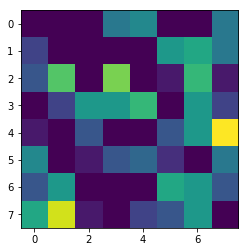

[[ 0.  0.  0.  8.  5.  3.  0.  5.]
 [ 0.  1.  0.  7.  0. 11.  1.  5.]
 [ 5.  8.  0.  8.  0.  3.  8.  9.]
 [ 0. 11.  6.  9.  8.  3.  2. 12.]
 [ 5.  0.  5.  0.  0.  6.  9.  4.]
 [ 7.  3.  0. 10.  7.  1.  4.  8.]
 [ 4.  5.  0.  1.  0.  8.  5.  0.]
 [ 2.  5.  2.  0.  1. 11.  6.  0.]]


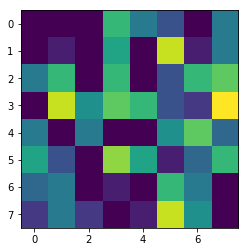

[[ 0.  0.  0.  7.  8.  0.  0.  5.]
 [ 3.  0.  0.  0.  0.  9.  9.  5.]
 [ 5. 11.  0. 14.  0.  2.  7.  1.]
 [ 0.  5.  8.  9. 13.  0.  5.  5.]
 [ 4.  0.  4.  0.  0.  5.  7. 13.]
 [ 7.  0.  0.  6.  7.  2.  2.  3.]
 [ 2.  7.  0.  0.  0. 10.  9.  1.]
 [ 7. 14.  0.  0.  4.  4.  7.  0.]]


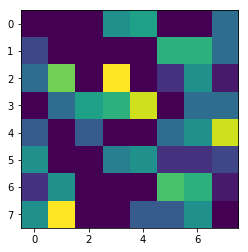

[[ 0.  0.  1.  8.  2.  6.  0.  6.]
 [ 5. 12.  0.  6.  0.  7.  1.  9.]
 [ 8.  5.  0.  0.  0.  6. 10.  9.]
 [ 0.  6.  8.  3.  0.  6.  9.  1.]
 [ 0.  0.  5.  0.  0.  0.  9.  0.]
 [ 5.  7.  2.  0.  4.  2.  2.  7.]
 [10. 10.  0.  8.  0.  3.  3. 12.]
 [ 9.  0.  6.  0.  6.  6.  5.  0.]]


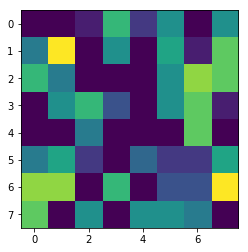

[[ 0.  0.  1.  6.  6.  2.  0.  5.]
 [ 2.  0.  0.  5.  0.  9.  3.  4.]
 [ 3.  7.  0.  9.  0.  1.  7.  9.]
 [ 0.  9.  6. 10.  8.  1.  1. 12.]
 [ 5.  0.  7.  0.  0.  7.  7.  8.]
 [ 9.  3.  0. 11.  5.  2.  2. 12.]
 [ 2.  6.  0.  2.  0.  6.  5.  0.]
 [ 2.  6.  2.  0.  1. 10.  8.  0.]]


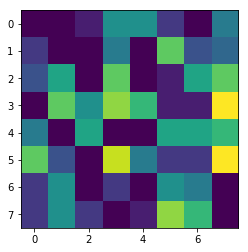

[[ 0.  0.  2.  8.  6.  6.  0.  6.]
 [ 3.  5.  0.  3.  0.  9.  6.  6.]
 [ 8.  7.  0.  2.  0.  5.  5.  7.]
 [ 0.  5.  6.  6.  5.  4.  6.  3.]
 [ 0.  0.  7.  0.  0.  1.  8.  3.]
 [ 5.  5.  1.  3.  6.  4.  2.  6.]
 [11.  9.  0.  5.  0.  4.  2.  8.]
 [ 6.  4.  1.  0.  9.  6.  9.  0.]]


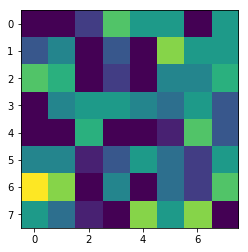

[[ 0.  0.  2.  8.  8.  6.  0.  7.]
 [ 5.  4.  0.  2.  0.  9.  7.  7.]
 [ 6.  6.  0.  1.  0.  4.  6.  7.]
 [ 0.  3.  9.  7.  6.  4.  5.  3.]
 [ 0.  0.  8.  0.  0.  0.  8.  4.]
 [ 5.  6.  1.  3.  5.  5.  0.  7.]
 [ 8. 11.  0.  6.  0.  4.  3.  5.]
 [ 7.  4.  1.  0.  9.  3.  9.  0.]]


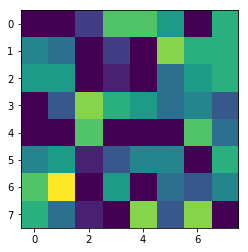

[[ 0.  0.  2.  7.  3.  4.  0.  5.]
 [ 1.  4.  0.  7.  0.  8.  1.  4.]
 [ 8.  8.  0.  7.  0.  6.  5.  9.]
 [ 0. 10.  4.  7.  3.  5.  3.  8.]
 [ 3.  0.  6.  0.  0.  6.  6.  4.]
 [ 6.  5.  0.  7.  6.  2.  5.  8.]
 [ 7.  6.  0.  3.  0.  5.  5.  4.]
 [ 3.  3.  3.  0.  4. 12.  6.  0.]]


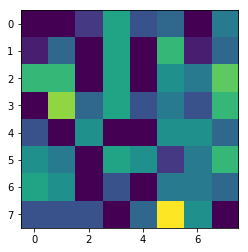

[[ 0.  0.  2.  8.  1.  3.  0.  8.]
 [ 1. 10.  0.  7.  0.  8.  4.  2.]
 [10. 10.  0.  9.  0.  9.  2.  6.]
 [ 0.  9.  3.  5.  4.  6.  4.  3.]
 [ 4.  0.  3.  0.  0.  5.  6.  3.]
 [ 3.  6.  0.  2. 10.  1.  8.  0.]
 [ 6.  6.  0.  2.  0.  8.  7.  8.]
 [ 7.  4.  2.  0. 10. 10.  2.  0.]]


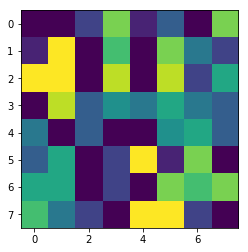

[[0. 0. 2. 9. 2. 4. 0. 7.]
 [3. 8. 0. 5. 0. 9. 4. 5.]
 [6. 8. 0. 7. 0. 5. 7. 7.]
 [0. 7. 8. 6. 7. 4. 5. 3.]
 [3. 0. 2. 0. 0. 3. 9. 4.]
 [5. 5. 0. 3. 8. 3. 5. 2.]
 [5. 7. 0. 3. 0. 9. 8. 6.]
 [7. 4. 2. 0. 7. 6. 3. 0.]]


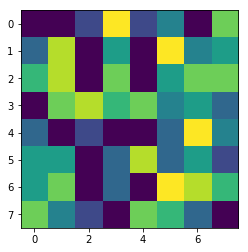

[[ 0.  0.  1.  8.  3.  7.  0.  5.]
 [ 6. 11.  0.  6.  0.  7.  1.  9.]
 [ 6.  5.  0.  0.  0.  5. 10.  9.]
 [ 0.  5.  9.  4.  1.  6.  8.  2.]
 [ 0.  0.  5.  0.  0.  0. 10.  0.]
 [ 5.  8.  1.  1.  3.  4.  1.  8.]
 [ 9. 11.  0.  9.  0.  3.  3. 10.]
 [ 8.  0.  5.  0.  7.  5.  5.  0.]]


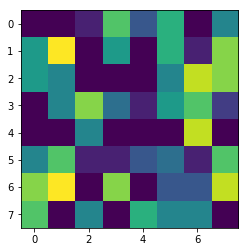

[[ 0.  0.  1.  9.  7.  6.  0.  7.]
 [ 6.  5.  0.  2.  0. 10.  7.  8.]
 [ 4.  7.  0.  0.  0.  3.  8.  8.]
 [ 0.  3. 12.  8.  8.  4.  6.  2.]
 [ 0.  0.  6.  0.  0.  0.  9.  4.]
 [ 6.  5.  0.  2.  7.  5.  1.  4.]
 [ 6. 11.  0.  6.  0.  7.  5.  4.]
 [ 6.  4.  1.  0.  9.  1.  6.  0.]]


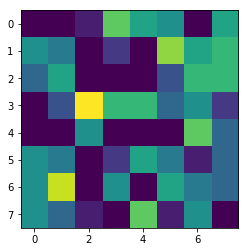

[[ 0.  0.  0.  8.  6.  2.  0.  6.]
 [ 3.  0.  0.  1.  0. 11.  6.  7.]
 [ 1. 11.  0. 10.  0.  0. 10.  6.]
 [ 0.  6. 10. 10. 13.  0.  6.  6.]
 [ 3.  0.  4.  0.  0.  3.  8.  9.]
 [10.  0.  0.  6.  8.  3.  1.  6.]
 [ 2.  7.  0.  0.  0. 11.  7.  1.]
 [ 3.  9.  1.  0.  3.  4.  6.  0.]]


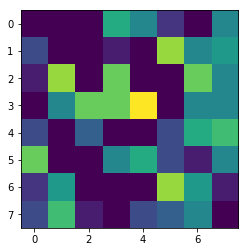

[[ 0.  0.  0.  9.  0.  4.  0.  8.]
 [ 5.  8.  0.  4.  0.  8.  2. 11.]
 [ 1.  8.  0.  6.  0.  1. 16.  7.]
 [ 0.  5. 12.  4.  5.  1. 11.  0.]
 [ 2.  0.  0.  0.  0.  0. 13.  6.]
 [ 9.  5.  0.  1.  7.  3.  1.  5.]
 [ 3.  9.  0.  3.  0.  8.  8.  8.]
 [ 8.  6.  7.  0.  1.  4.  0.  0.]]


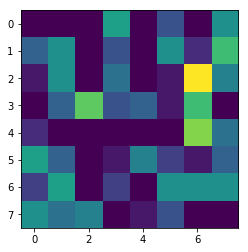

[[ 0.  0.  0.  7.  2.  5.  0.  6.]
 [ 3.  4.  0.  5.  0.  8.  2.  9.]
 [ 3.  8.  0.  4.  0.  2. 12.  9.]
 [ 0.  7.  9.  7.  4.  2.  8.  4.]
 [ 0.  0.  6.  0.  0.  2.  9.  5.]
 [ 9.  4.  0.  4.  5.  2.  1. 10.]
 [ 7.  8.  0.  5.  0.  5.  4.  7.]
 [ 5.  4.  5.  0.  3.  8.  6.  0.]]


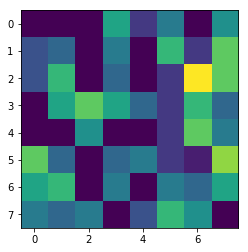

[[ 0.  0.  0.  7.  6.  5.  0.  5.]
 [ 2.  1.  0.  6.  0. 10.  3.  4.]
 [ 7.  6.  0.  5.  0.  4.  6.  9.]
 [ 0.  9.  7.  8.  7.  4.  1. 10.]
 [ 4.  0.  6.  0.  0.  5.  8.  3.]
 [ 5.  6.  0.  9.  6.  3.  3.  7.]
 [ 5.  7.  0.  4.  0.  6.  5.  0.]
 [ 3.  4.  1.  0.  5.  9.  8.  0.]]


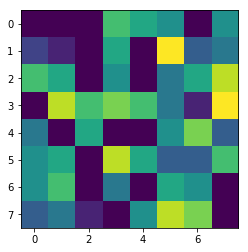

[[ 0.  0.  0.  1. 10.  2.  0.  9.]
 [ 8.  0.  0.  0.  0.  3. 12.  3.]
 [ 3.  7.  0.  6.  0.  2.  3.  3.]
 [ 0.  1.  8.  9.  7.  0.  5.  5.]
 [ 1.  0. 11.  0.  0.  3.  5. 15.]
 [10.  4.  1.  4.  1.  3.  0. 12.]
 [ 4. 10.  0.  3.  0.  2.  5.  7.]
 [10.  9.  2.  0. 10.  3. 12.  0.]]


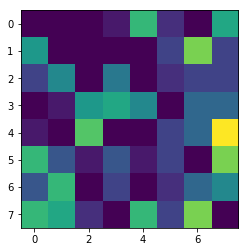

[[ 0.  0.  0.  8.  4.  4.  0.  7.]
 [ 2.  4.  0.  3.  0.  9.  7.  5.]
 [ 7. 10.  0.  8.  0.  4.  7.  6.]
 [ 0.  7.  7.  7.  8.  2.  6.  3.]
 [ 1.  0.  4.  0.  0.  3.  7.  6.]
 [ 6.  2.  0.  3.  9.  3.  3.  3.]
 [ 7.  7.  0.  1.  0.  9.  5.  6.]
 [ 5.  7.  1.  0.  8.  6.  6.  0.]]


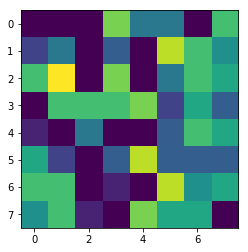

[[ 0.  0.  0.  9.  7.  5.  0.  6.]
 [ 1.  0.  0.  0.  0. 11. 11.  5.]
 [ 9. 11.  0. 11.  0.  4.  4.  1.]
 [ 0.  4.  5.  8. 11.  1.  6.  2.]
 [ 0.  0.  6.  0.  0.  1.  7.  7.]
 [ 5.  0.  0.  3. 10.  3.  2.  2.]
 [10.  8.  0.  0.  0.  8.  2.  6.]
 [ 6. 12.  0.  0. 11.  5. 10.  0.]]


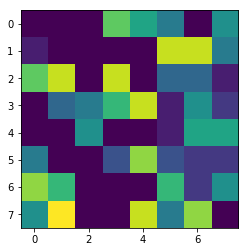

[[ 0.  0.  0.  7.  5.  3.  0.  6.]
 [ 5.  3.  0.  0.  0.  7. 10.  7.]
 [ 4. 10.  0. 13.  0.  2. 12.  0.]
 [ 0.  2. 11.  5. 10.  0. 11.  0.]
 [ 2.  0.  0.  0.  0.  1.  9. 13.]
 [ 6.  0.  2.  0.  8.  3.  1.  0.]
 [ 3.  8.  0.  0.  0. 11. 11.  6.]
 [12. 15.  3.  0.  5.  0.  3.  0.]]


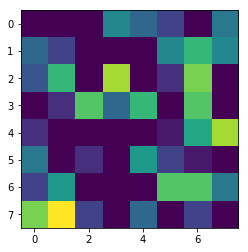

[[ 0.  0.  0.  9.  3.  5.  0.  6.]
 [ 3.  8.  0.  6.  0. 10.  3.  7.]
 [ 4.  8.  0.  3.  0.  4. 10. 10.]
 [ 0.  7. 10.  7.  7.  4.  5.  4.]
 [ 2.  0.  4.  0.  0.  2.  9.  2.]
 [ 7.  5.  0.  4.  8.  3.  4.  5.]
 [ 5.  8.  0.  4.  0.  8.  6.  5.]
 [ 4.  2.  3.  0.  6.  6.  3.  0.]]


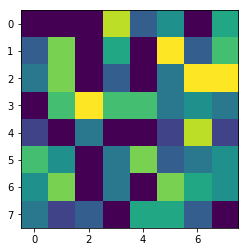

[[ 0.  0.  0.  8.  6.  2.  0.  7.]
 [ 3.  0.  0.  0.  0. 10.  8.  7.]
 [ 1. 12.  0. 11.  0.  0. 10.  5.]
 [ 0.  5. 10.  9. 13.  0.  7.  4.]
 [ 2.  0.  4.  0.  0.  2.  8. 11.]
 [10.  0.  0.  4.  8.  3.  1.  5.]
 [ 2.  8.  0.  0.  0. 10.  7.  3.]
 [ 5. 11.  2.  0.  5.  2.  5.  0.]]


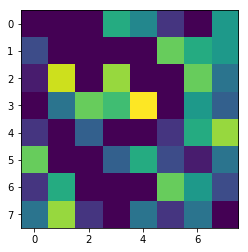

[[ 0.  0.  0.  1. 10.  0.  0.  6.]
 [ 6.  0.  0.  0.  0.  4. 14.  0.]
 [ 6.  9.  0. 13.  0.  3.  1.  0.]
 [ 0.  2.  5.  8.  9.  0.  4.  5.]
 [ 2.  0.  9.  0.  0.  6.  3. 17.]
 [ 7.  0.  2.  6.  3.  1.  1.  8.]
 [ 4.  7.  0.  0.  0.  5.  7.  6.]
 [10. 14.  1.  0. 10.  5. 13.  0.]]


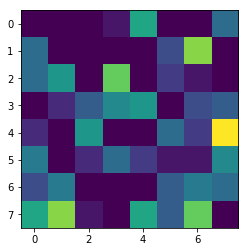

[[ 0.  0.  0.  9.  0.  4.  0.  7.]
 [ 4. 10.  0.  4.  0.  8.  2. 10.]
 [ 3.  8.  0.  8.  0.  3. 15.  6.]
 [ 0.  5. 11.  3.  5.  2. 10.  0.]
 [ 2.  0.  0.  0.  0.  1. 12.  6.]
 [ 7.  5.  2.  0.  8.  3.  3.  2.]
 [ 3.  8.  0.  2.  0.  9. 10.  9.]
 [ 9.  6.  6.  0.  3.  4.  0.  0.]]


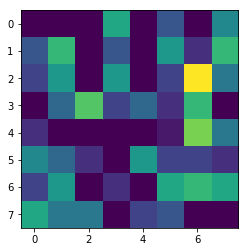

[[ 0.  0.  0.  8.  0.  5.  0.  6.]
 [ 2.  6.  0.  6.  0.  8.  0. 11.]
 [ 2.  8.  0.  4.  0.  1. 15. 10.]
 [ 0.  7.  9.  6.  3.  1. 11.  3.]
 [ 0.  0.  6.  0.  0.  1. 10.  4.]
 [11.  3.  1.  3.  5.  2.  1. 12.]
 [ 8.  8.  0.  4.  0.  6.  2.  9.]
 [ 3.  2.  7.  0.  1.  8.  4.  0.]]


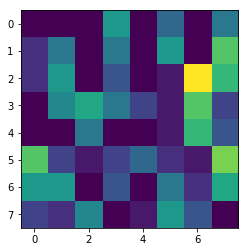

[[ 0.  0.  0.  9.  1.  2.  0.  7.]
 [ 3.  9.  0.  7.  0.  9.  4.  4.]
 [ 6.  8.  0.  9.  0.  6.  6.  7.]
 [ 0.  8.  8.  6.  7.  5.  3.  5.]
 [ 7.  0.  0.  0.  0.  5.  9.  3.]
 [ 4.  6.  2.  4.  9.  2.  7.  0.]
 [ 1.  6.  0.  2.  0. 10. 10.  4.]
 [ 7.  4.  3.  0.  7.  7.  0.  0.]]


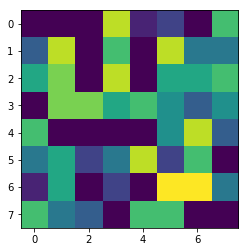

[[ 0.  0.  0.  6. 12.  5.  0.  6.]
 [ 4.  0.  0.  0.  0.  9. 13.  2.]
 [ 9.  8.  0.  7.  0.  4.  0.  3.]
 [ 0.  2.  5.  8. 10.  2.  1.  5.]
 [ 0.  0.  9.  0.  0.  3.  5.  8.]
 [ 3.  5.  3.  5.  7.  3.  1.  5.]
 [ 8.  9.  0.  2.  0.  5.  3.  2.]
 [ 6. 10.  0.  0. 13.  5. 13.  0.]]


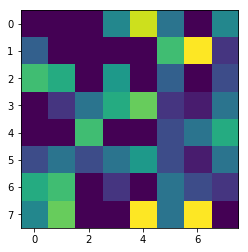

[[ 0.  0.  0.  8.  3.  4.  0.  6.]
 [ 0.  6.  0.  6.  0.  8.  5.  2.]
 [12.  8.  0.  9.  0.  9.  2.  6.]
 [ 0.  9.  3.  6.  5.  6.  3.  5.]
 [ 4.  0.  4.  0.  0.  6.  6.  3.]
 [ 2.  6.  2.  5.  8.  1.  7.  2.]
 [ 8.  5.  0.  2.  0.  7.  6.  6.]
 [ 6.  4.  0.  0. 10. 11.  5.  0.]]


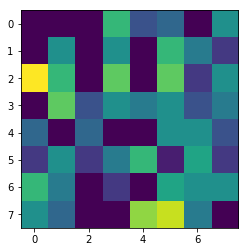

[[ 0.  0.  0.  3.  3.  0.  0.  2.]
 [ 0.  0.  0.  3.  0.  4.  4.  3.]
 [12.  9.  0. 21.  0.  7.  8.  0.]
 [ 0. 10.  0.  0.  4.  0.  9.  7.]
 [ 5.  0.  0.  0.  0. 10.  8. 13.]
 [ 3.  0.  4.  7.  4.  0.  3.  7.]
 [ 9.  1.  0.  0.  0.  6.  8.  6.]
 [ 7. 16.  5.  0.  0. 16.  7.  0.]]


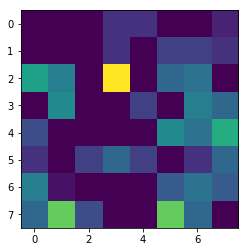

[[ 0.  0.  0.  6.  3.  7.  0.  5.]
 [ 5. 11.  0.  5.  0.  6.  2.  9.]
 [ 8.  4.  0.  0.  0.  6.  9.  8.]
 [ 0.  4.  8.  2.  0.  5. 10.  1.]
 [ 0.  0.  5.  0.  0.  0.  9.  1.]
 [ 4.  8.  6.  0.  2.  3.  2.  9.]
 [12. 11.  0.  8.  0.  1.  2. 12.]
 [ 9.  0.  6.  0.  8.  5.  6.  0.]]


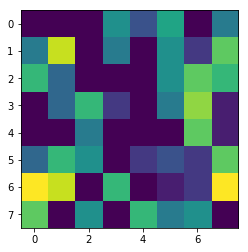

[[ 0.  0.  0.  9.  1.  3.  0.  7.]
 [ 4.  5.  0.  2.  0. 10.  2. 11.]
 [ 0.  9.  0.  8.  0.  0. 17.  7.]
 [ 0.  4. 13.  6.  8.  0. 11.  0.]
 [ 3.  0.  1.  0.  0.  1. 11.  8.]
 [ 9.  3.  2.  2.  7.  3.  1.  5.]
 [ 2.  8.  0.  2.  0. 10.  9.  5.]
 [ 6.  7.  6.  0.  1.  3.  1.  0.]]


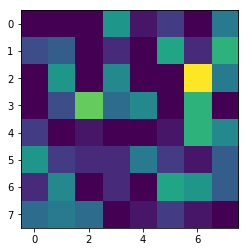

[[ 0.  0.  0.  7.  2.  4.  0.  6.]
 [ 0.  6.  0.  6.  0.  8.  4.  2.]
 [12.  8.  0. 10.  0.  9.  2.  6.]
 [ 0. 10.  2.  6.  5.  5.  3.  5.]
 [ 3.  0.  5.  0.  0.  6.  5.  3.]
 [ 3.  5.  2.  5.  8.  1.  7.  2.]
 [ 9.  5.  0.  1.  0.  7.  6.  6.]
 [ 5.  5.  0.  0.  9. 11.  5.  0.]]


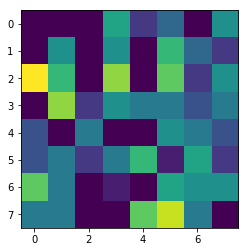

[[ 0.  0.  0.  1.  5.  0.  0.  7.]
 [ 3.  0.  0.  3.  0.  5.  4.  3.]
 [ 0.  8.  0. 12.  0.  0.  8.  6.]
 [ 0.  8.  6. 10.  7.  0.  3. 11.]
 [ 5.  0. 10.  0.  0.  8.  5. 15.]
 [14.  2.  0. 11.  1.  1.  1. 18.]
 [ 1.  6.  0.  0.  0.  5.  5.  1.]
 [ 2.  9.  5.  0.  1. 10. 11.  0.]]


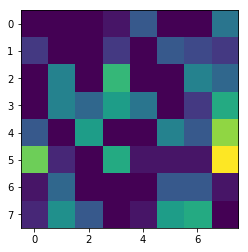

[[ 0.  0.  0.  8.  7.  3.  0.  6.]
 [ 3.  0.  0.  0.  0. 10.  8.  7.]
 [ 3. 10.  0. 12.  0.  1. 10.  3.]
 [ 0.  4. 10.  7. 12.  0.  6.  4.]
 [ 4.  0.  2.  0.  0.  3.  9. 10.]
 [ 6.  1.  2.  4.  8.  3.  2.  3.]
 [ 3.  8.  0.  0.  0. 10.  9.  2.]
 [ 6. 12.  1.  0.  4.  4.  6.  0.]]


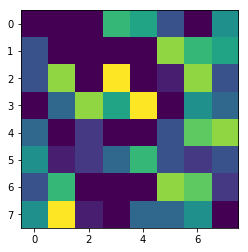

[[ 0.  0.  0. 10.  4.  6.  0.  6.]
 [ 0.  6.  0.  4.  0. 10.  6.  6.]
 [ 7.  9.  0.  7.  0.  5.  7.  7.]
 [ 0.  7.  6.  7.  8.  3.  6.  3.]
 [ 0.  0.  5.  0.  0.  1.  7.  3.]
 [ 6.  3.  1.  3.  9.  3.  3.  3.]
 [ 9.  7.  0.  1.  0.  8.  4.  6.]
 [ 4.  5.  0.  0.  9.  7.  6.  0.]]


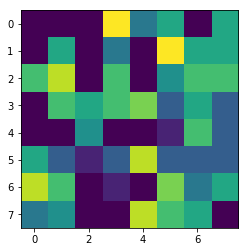

[[ 0.  0.  0.  5.  7.  3.  0.  5.]
 [ 3.  0.  0.  5.  0.  8.  3.  4.]
 [ 4.  6.  0.  6.  0.  3.  7. 10.]
 [ 0.  9.  8.  9.  8.  2.  1. 11.]
 [ 5.  0.  8.  0.  0.  6.  7.  7.]
 [ 8.  6.  0. 10.  3.  2.  3. 11.]
 [ 3.  7.  0.  3.  0.  6.  5.  0.]
 [ 2.  4.  2.  0.  4.  9.  8.  0.]]


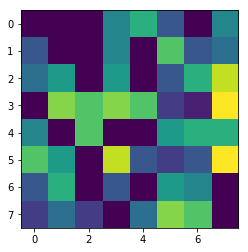

[[ 0.  0.  0.  6.  5.  6.  0.  2.]
 [ 6.  1.  0.  3.  0.  6.  0. 11.]
 [ 2.  4.  0.  0.  0.  3. 16.  9.]
 [ 0.  6. 13.  5.  2.  3. 12.  4.]
 [ 2.  0.  7.  0.  0.  2.  8.  7.]
 [ 5.  6.  5.  4.  0.  2.  1. 13.]
 [ 6. 10.  0.  9.  0.  2.  6.  5.]
 [ 7.  4.  8.  0.  1.  6.  6.  0.]]


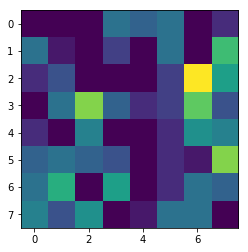

[[ 0.  0.  0.  7.  7.  3.  0.  4.]
 [ 1.  0.  0.  4.  0. 10.  4.  5.]
 [ 4.  7.  0.  8.  0.  2.  7.  9.]
 [ 0.  9.  7. 10. 10.  2.  1. 11.]
 [ 5.  0.  7.  0.  0.  6.  7.  5.]
 [ 7.  4.  0. 10.  6.  2.  3.  9.]
 [ 4.  7.  0.  2.  0.  7.  5.  0.]
 [ 1.  6.  0.  0.  4.  9.  8.  0.]]


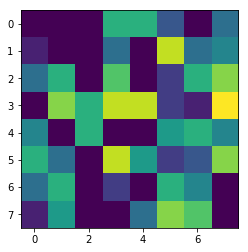

[[ 0.  0.  0.  8.  4.  2.  0.  6.]
 [ 2.  5.  0.  5.  0. 10.  5.  3.]
 [ 6.  8.  0.  9.  0.  5.  6.  7.]
 [ 0.  7.  8.  7. 10.  4.  2.  7.]
 [ 7.  0.  1.  0.  0.  6.  8.  4.]
 [ 5.  5.  1.  6.  8.  2.  6.  2.]
 [ 1.  6.  0.  1.  0. 10. 10.  1.]
 [ 5.  6.  2.  0.  6.  7.  3.  0.]]


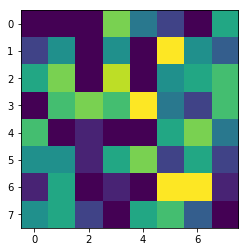

[[ 0.  0.  0.  5.  6.  4.  0.  5.]
 [ 2.  0.  0.  5.  0.  9.  4.  4.]
 [ 5.  7.  0.  6.  0.  2.  6. 10.]
 [ 0.  8.  7. 10.  8.  2.  1. 10.]
 [ 4.  0.  9.  0.  0.  6.  6.  6.]
 [ 8.  5.  0. 10.  4.  2.  3. 12.]
 [ 5.  7.  0.  3.  0.  5.  4.  0.]
 [ 1.  4.  1.  0.  5.  9. 10.  0.]]


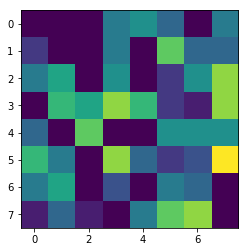

[[ 0.  0.  0.  0.  5.  0.  0.  8.]
 [ 4.  0.  0.  5.  0.  2.  4.  3.]
 [ 2.  6.  0.  8.  0.  1.  6.  7.]
 [ 0.  9.  5.  8.  4.  0.  3. 12.]
 [ 5.  0. 11.  0.  0.  9.  4. 15.]
 [13.  6.  0. 10.  0.  1.  2. 20.]
 [ 2.  5.  0.  1.  0.  3.  4.  2.]
 [ 3.  6.  6.  0.  3. 11. 11.  0.]]


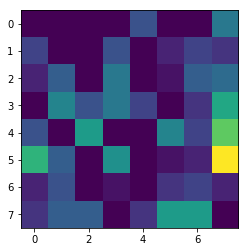

[[ 0.  0.  0.  5.  4.  1.  0.  6.]
 [ 0.  1.  0.  1.  0.  6. 10.  1.]
 [ 9. 12.  0. 17.  0.  5.  3.  0.]
 [ 0.  7.  1.  6.  9.  0.  5.  4.]
 [ 1.  0.  5.  0.  0.  6.  3. 12.]
 [ 7.  0.  2.  4.  8.  1.  4.  5.]
 [ 9.  4.  0.  0.  0.  9.  5.  9.]
 [ 7. 13.  1.  0.  9.  9.  9.  0.]]


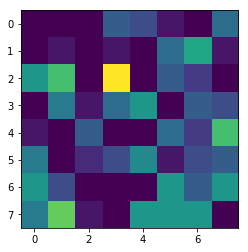

[[ 0.  0.  0.  4.  3.  2.  0.  6.]
 [ 0.  0.  0.  3.  0.  7.  4.  5.]
 [ 2. 10.  0. 11.  0.  1.  7.  7.]
 [ 0.  9.  5. 11.  8.  0.  6.  8.]
 [ 1.  0. 11.  0.  0.  6.  4. 12.]
 [13.  0.  0.  8.  3.  1.  2. 16.]
 [ 6.  5.  0.  0.  0.  6.  2.  4.]
 [ 1.  7.  3.  0.  5. 10. 10.  0.]]


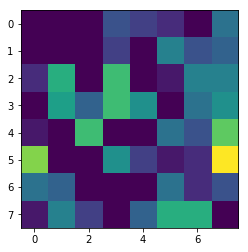

[[ 0.  0.  0.  8.  9.  5.  0.  5.]
 [ 2.  1.  0.  1.  0. 10. 11.  3.]
 [ 9.  8.  0.  8.  0.  5.  2.  4.]
 [ 0.  3.  6.  7. 11.  3.  2.  5.]
 [ 0.  0.  7.  0.  0.  2.  6.  5.]
 [ 3.  5.  3.  5.  8.  3.  3.  2.]
 [ 8.  8.  0.  1.  0.  7.  4.  3.]
 [ 5. 10.  0.  0. 12.  5. 10.  0.]]


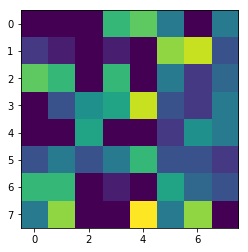

[[ 0.  0.  0.  7.  7.  7.  0.  4.]
 [ 3.  4.  0.  5.  0. 10.  4.  4.]
 [ 8.  4.  0.  1.  0.  6.  5. 10.]
 [ 0.  7.  9.  7.  7.  6.  1.  8.]
 [ 2.  0.  7.  0.  0.  4.  7.  1.]
 [ 3.  8.  2.  7.  5.  4.  4.  7.]
 [ 8.  9.  0.  6.  0.  4.  4.  1.]
 [ 3.  1.  0.  0.  9.  7.  8.  0.]]


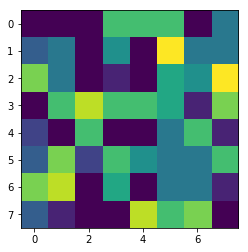

[[ 0.  0.  0.  9.  4.  4.  0.  4.]
 [ 1.  2.  0.  4.  0. 12.  2.  9.]
 [ 3.  9.  0.  8.  0.  2. 14.  9.]
 [ 0.  8. 11.  7. 10.  2.  7.  6.]
 [ 4.  0.  3.  0.  0.  3.  9.  5.]
 [ 7.  3.  1.  6.  7.  3.  3.  5.]
 [ 3.  7.  0.  2.  0. 10.  8.  0.]
 [ 2.  6.  3.  0.  2.  6.  3.  0.]]


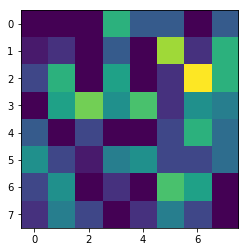

[[ 0.  0.  0.  4.  7.  6.  0.  5.]
 [ 5.  1.  0.  2.  0.  6.  4.  7.]
 [ 5.  4.  0.  1.  0.  4.  9.  8.]
 [ 0.  5. 11.  7.  4.  3.  6.  5.]
 [ 1.  0.  9.  0.  0.  3.  6.  7.]
 [ 6.  8.  4.  4.  1.  3.  1. 11.]
 [ 7. 10.  0.  8.  0.  3.  5.  4.]
 [ 6.  4.  4.  0.  7.  5.  9.  0.]]


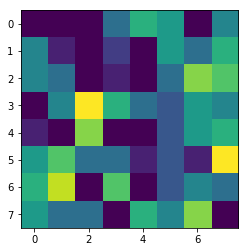

[[ 0.  0.  0.  3.  3.  2.  0.  5.]
 [ 0.  0.  0.  0.  0.  5.  7.  4.]
 [10.  9.  0. 17.  0.  6.  8.  0.]
 [ 0.  7.  2.  2.  6.  0. 10.  2.]
 [ 2.  0.  2.  0.  0.  7.  6. 14.]
 [ 4.  1.  5.  3.  5.  1.  2.  6.]
 [10.  4.  0.  0.  0.  7.  7. 10.]
 [ 9. 15.  4.  0.  4. 10.  8.  0.]]


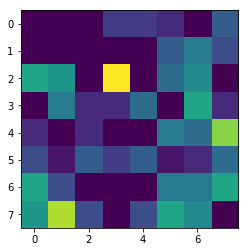

[[ 0.  0.  0.  5.  0.  2.  0.  4.]
 [ 1.  0.  0.  3.  0.  5.  0.  9.]
 [ 3.  9.  0. 13.  0.  1. 17.  3.]
 [ 0.  9.  6.  3.  4.  0. 15.  4.]
 [ 2.  0.  3.  0.  0.  6.  9. 13.]
 [ 9.  1.  4.  4.  2.  0.  2. 12.]
 [ 6.  5.  0.  0.  0.  6.  7.  8.]
 [ 6. 11. 10.  0.  0.  9.  4.  0.]]


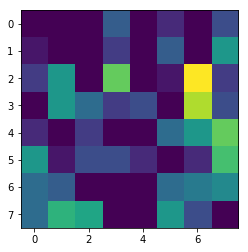

[[ 0.  0.  0.  2. 10.  3.  0.  9.]
 [ 9.  1.  0.  0.  0.  3. 12.  4.]
 [ 5.  5.  0.  2.  0.  4.  3.  3.]
 [ 0.  0. 10.  7.  6.  1.  5.  3.]
 [ 0.  0. 11.  0.  1.  2.  5. 12.]
 [ 7.  9.  4.  1.  0.  3.  1. 10.]
 [ 6. 11.  0.  7.  0.  1.  5.  8.]
 [11.  7.  3.  0. 14.  1. 11.  0.]]


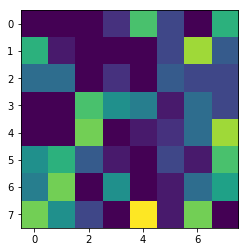

[[ 0.  0.  0.  7.  7.  5.  0.  4.]
 [ 2.  0.  0.  0.  0.  9. 10.  7.]
 [ 7.  9.  0. 10.  0.  2.  9.  1.]
 [ 0.  3.  7.  7. 10.  0. 10.  1.]
 [ 0.  0.  6.  0.  0.  1.  7.  9.]
 [ 5.  1.  4.  2.  6.  3.  1.  5.]
 [11.  9.  0.  0.  0.  7.  3.  7.]
 [ 7. 13.  0.  0.  8.  4. 10.  0.]]


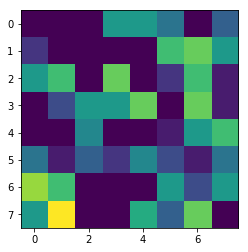

[[ 0.  0.  0.  8.  1.  5.  0.  8.]
 [ 2. 11.  0.  4.  0.  7.  5.  7.]
 [ 7.  9.  0.  7.  0.  5. 10.  5.]
 [ 0.  6.  6.  3.  3.  2.  9.  0.]
 [ 0.  0.  3.  0.  0.  1.  8.  5.]
 [ 6.  6.  3.  0.  7.  3.  4.  4.]
 [ 9.  7.  0.  2.  0.  7.  5. 12.]
 [ 7.  5.  4.  0.  7.  7.  4.  0.]]


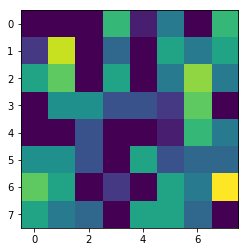

[[0. 0. 0. 8. 3. 4. 0. 6.]
 [1. 7. 0. 5. 0. 9. 5. 6.]
 [7. 9. 0. 7. 0. 4. 8. 8.]
 [0. 7. 6. 7. 7. 2. 5. 4.]
 [0. 0. 5. 0. 0. 3. 7. 4.]
 [7. 4. 1. 4. 8. 3. 4. 6.]
 [8. 6. 0. 1. 0. 8. 4. 7.]
 [4. 4. 2. 0. 7. 8. 6. 0.]]


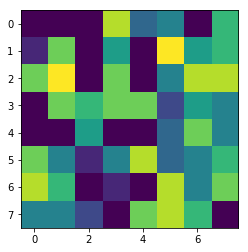

[[ 0.  0.  0.  7.  1.  4.  0.  7.]
 [ 0.  9.  0.  5.  0.  6.  5.  4.]
 [12.  9.  0.  9.  0.  8.  5.  4.]
 [ 0.  8.  2.  3.  3.  3.  8.  2.]
 [ 0.  0.  5.  0.  0.  4.  6.  5.]
 [ 5.  5.  3.  1.  7.  2.  5.  5.]
 [12.  5.  0.  1.  0.  6.  3. 12.]
 [ 6.  5.  2.  0. 10. 10.  6.  0.]]


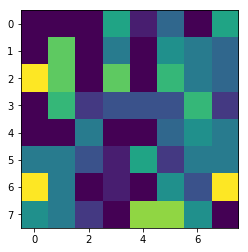

[[ 0.  0.  0.  9.  2.  5.  0.  7.]
 [ 2.  9.  0.  4.  0.  9.  3.  9.]
 [ 3.  9.  0.  4.  0.  3. 12.  9.]
 [ 0.  6. 10.  6.  7.  1.  8.  1.]
 [ 0.  0.  4.  0.  1.  0.  8.  4.]
 [ 8.  5.  1.  1.  8.  4.  3.  5.]
 [ 7.  8.  0.  3.  0.  9.  5.  8.]
 [ 4.  3.  4.  0.  6.  5.  4.  0.]]


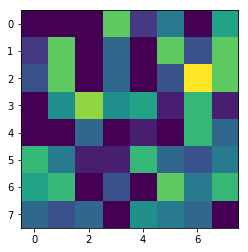

[[ 0.  0.  0.  4. 10.  5.  0.  3.]
 [ 2.  0.  0.  5.  0.  7.  4.  2.]
 [10.  4.  0.  4.  0.  6.  2.  8.]
 [ 0.  8.  6.  8.  6.  5.  0. 12.]
 [ 4.  0. 10.  0.  0.  7.  4.  4.]
 [ 2.  9.  2. 10.  2.  3.  3. 10.]
 [ 7.  7.  0.  6.  0.  3.  4.  0.]
 [ 2.  4.  0.  0.  8. 10. 11.  0.]]


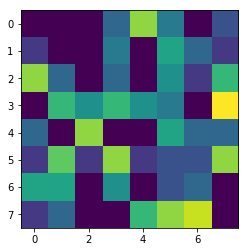

[[ 0.  0.  0.  8.  9.  5.  0.  6.]
 [ 3.  2.  0.  2.  0. 10.  9.  3.]
 [ 7.  7.  0.  5.  0.  3.  4.  6.]
 [ 0.  3.  8.  8. 11.  4.  1.  6.]
 [ 1.  0.  7.  0.  0.  2.  7.  4.]
 [ 4.  7.  2.  6.  8.  4.  3.  4.]
 [ 6.  9.  0.  3.  0.  6.  4.  0.]
 [ 4.  7.  0.  0. 11.  4.  9.  0.]]


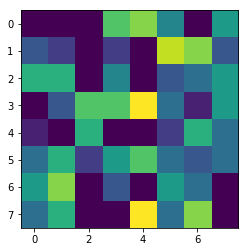

[[ 0.  0.  0.  9.  3.  3.  0.  6.]
 [ 3.  8.  0.  4.  0. 10.  4.  8.]
 [ 3.  8.  0.  7.  0.  2. 12.  8.]
 [ 0.  5. 12.  6. 10.  2.  5.  3.]
 [ 4.  0.  1.  0.  0.  2. 10.  5.]
 [ 6.  5.  0.  4.  8.  4.  4.  3.]
 [ 2.  7.  0.  2.  0. 11. 10.  2.]
 [ 4.  5.  3.  0.  4.  5.  2.  0.]]


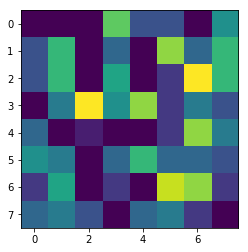

[[0. 0. 0. 8. 2. 3. 0. 6.]
 [2. 8. 0. 6. 0. 9. 4. 5.]
 [6. 8. 0. 8. 0. 5. 9. 7.]
 [0. 7. 8. 4. 7. 4. 4. 5.]
 [4. 0. 1. 0. 0. 4. 9. 4.]
 [4. 6. 1. 4. 8. 2. 6. 2.]
 [4. 6. 0. 2. 0. 9. 9. 4.]
 [6. 5. 4. 0. 5. 8. 2. 0.]]


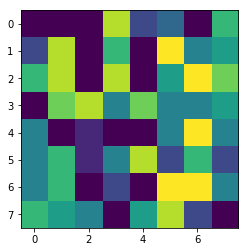

[[ 0.  0.  0.  7.  4.  6.  0.  5.]
 [ 6.  7.  0.  1.  0.  6.  3. 11.]
 [ 3.  5.  0.  3.  0.  2. 17.  5.]
 [ 0.  1. 13.  1.  3.  2. 13.  0.]
 [ 0.  0.  2.  0.  1.  0. 12.  6.]
 [ 4.  8.  7.  0.  2.  4.  0.  7.]
 [ 6. 11.  0.  7.  0.  4.  8.  8.]
 [10.  7.  8.  0.  1.  2.  4.  0.]]


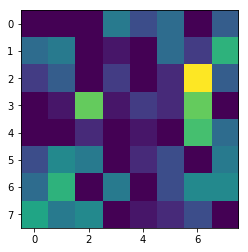

[[ 0.  0.  0.  6.  1.  4.  0.  5.]
 [ 2.  1.  0.  2.  0.  8.  1. 10.]
 [ 1.  9.  0.  8.  0.  1. 16.  8.]
 [ 0.  7. 11.  6.  7.  0. 12.  3.]
 [ 1.  0.  6.  0.  1.  4.  7.  9.]
 [10.  3.  1.  4.  3.  3.  1. 11.]
 [ 5.  7.  0.  4.  0.  7.  6.  5.]
 [ 3.  6.  7.  0.  0.  6.  4.  0.]]


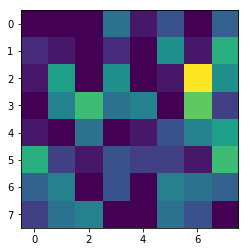

[[ 0.  0.  0.  7.  5.  8.  0.  5.]
 [ 3.  7.  0.  4.  0.  7.  3.  9.]
 [ 6.  5.  0.  0.  0.  3. 10.  7.]
 [ 0.  4.  9.  4.  3.  3.  9.  3.]
 [ 0.  0.  7.  0.  0.  0.  8.  3.]
 [ 5.  7.  5.  2.  3.  4.  0. 10.]
 [12. 10.  0.  7.  0.  3.  2.  8.]
 [ 6.  3.  4.  0.  6.  6.  9.  0.]]


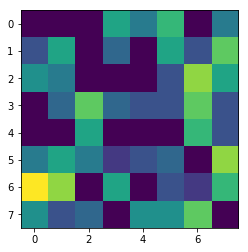

[[ 0.  0.  0.  9.  2.  7.  0.  4.]
 [ 2. 14.  0.  6.  0.  8.  1.  8.]
 [ 9.  6.  0.  2.  0.  7. 11.  7.]
 [ 0.  7.  7.  1.  2.  5.  9.  2.]
 [ 0.  0.  2.  0.  0.  1.  9.  0.]
 [ 2.  7.  5.  1.  6.  3.  4.  4.]
 [10.  7.  0.  5.  0.  6.  5. 10.]
 [ 7.  2.  5.  0.  6.  8.  3.  0.]]


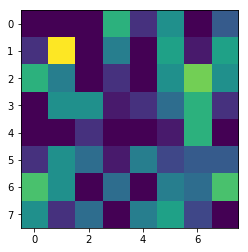

[[ 0.  0.  0.  3. 11.  5.  0.  6.]
 [ 5.  0.  0.  1.  0.  5. 10.  3.]
 [ 8.  4.  0.  3.  0.  4.  3.  5.]
 [ 0.  3.  7.  6.  7.  3.  2.  8.]
 [ 0.  0. 11.  0.  0.  4.  6.  8.]
 [ 3. 10.  4.  6.  2.  4.  1. 10.]
 [ 8. 10.  0.  6.  0.  1.  4.  2.]
 [ 6.  7.  1.  0. 11.  6. 13.  0.]]


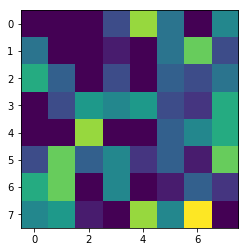

[[ 0.  0.  0.  8.  2.  2.  0.  6.]
 [ 2.  8.  0.  7.  0.  8.  5.  1.]
 [ 8.  7.  0.  9.  0.  8.  3.  6.]
 [ 0.  8.  6.  5.  7.  6.  1.  7.]
 [ 7.  0.  1.  0.  0.  7.  7.  4.]
 [ 3.  7.  2.  5.  8.  1.  8.  1.]
 [ 3.  5.  0.  2.  0.  9. 10.  3.]
 [ 7.  5.  3.  0.  8.  8.  2.  0.]]


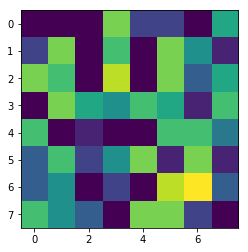

[[ 0.  0.  0.  8.  7.  3.  0.  4.]
 [ 2.  0.  0.  4.  0. 11.  5.  4.]
 [ 4.  7.  0.  7.  0.  2.  6.  9.]
 [ 0.  7.  9.  9. 12.  4.  0. 10.]
 [ 5.  0.  6.  0.  0.  5.  7.  4.]
 [ 6.  5.  0.  9.  6.  3.  5.  6.]
 [ 2.  7.  0.  3.  0.  8.  7.  0.]
 [ 1.  5.  0.  0.  7.  6.  7.  0.]]


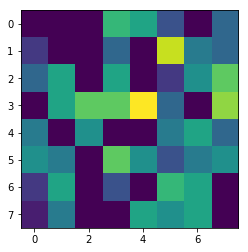

[[ 0.  0.  0.  7.  7.  7.  0.  4.]
 [ 4.  9.  0.  6.  0.  7.  4.  4.]
 [10.  3.  0.  0.  0.  8.  4.  8.]
 [ 0.  6.  7.  4.  4.  7.  2.  6.]
 [ 0.  0.  7.  0.  0.  3.  7.  1.]
 [ 1. 10.  4.  5.  4.  4.  4.  7.]
 [10.  8.  0.  7.  0.  2.  4.  5.]
 [ 5.  1.  1.  0. 10.  8.  9.  0.]]


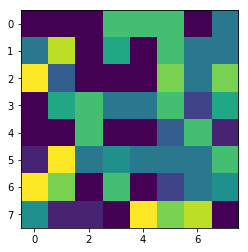

[[ 0.  0.  0.  6.  5.  5.  0.  5.]
 [ 0.  5.  0.  6.  0.  8.  5.  1.]
 [12.  6.  0.  8.  0.  8.  1.  6.]
 [ 0.  9.  2.  6.  5.  6.  1.  8.]
 [ 1.  0.  7.  0.  0.  6.  4.  3.]
 [ 2.  7.  2.  7.  6.  2.  6.  6.]
 [11.  5.  0.  3.  0.  4.  4.  5.]
 [ 3.  4.  0.  0. 10. 12.  9.  0.]]


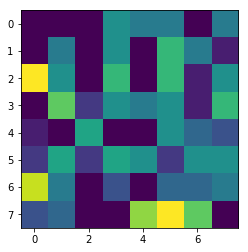

[[ 0.  0.  0.  6.  3.  7.  0.  5.]
 [ 2. 11.  0.  5.  0.  5.  2.  8.]
 [ 9.  4.  0.  2.  0.  6. 10.  6.]
 [ 0.  5.  6.  1.  0.  4. 10.  2.]
 [ 0.  0.  5.  0.  1.  2.  8.  3.]
 [ 3.  8.  7.  1.  3.  3.  2.  8.]
 [13.  8.  0.  6.  0.  2.  3. 12.]
 [ 8.  3.  6.  0.  6.  8.  6.  0.]]


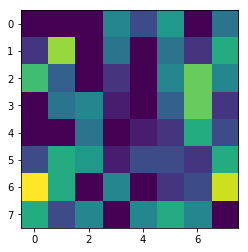

[[ 0.  0.  0.  6.  1.  4.  0.  9.]
 [ 1. 11.  0.  4.  0.  6.  6.  4.]
 [ 8.  9.  0.  8.  0.  7.  6.  5.]
 [ 0.  7.  6.  3.  4.  3.  7.  0.]
 [ 0.  0.  2.  0.  0.  3.  6.  6.]
 [ 5.  7.  3.  0.  8.  3.  5.  2.]
 [ 9.  7.  0.  2.  0.  8.  6. 11.]
 [ 8.  5.  3.  0.  9.  7.  3.  0.]]


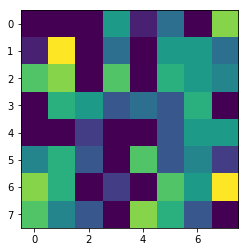

[[ 0.  0.  0.  7.  1.  2.  0.  7.]
 [ 2.  9.  0.  7.  0.  7.  4.  2.]
 [ 8.  8.  0. 10.  0.  8.  4.  6.]
 [ 0.  8.  6.  5.  7.  5.  2.  6.]
 [ 6.  0.  0.  0.  0.  7.  7.  5.]
 [ 3.  7.  2.  4.  8.  2.  8.  1.]
 [ 2.  5.  0.  2.  0. 10. 10.  4.]
 [ 7.  5.  3.  0.  8.  8.  1.  0.]]


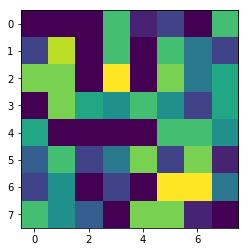

[[ 0.  0.  0.  7.  2.  4.  0.  7.]
 [ 3.  9.  0.  3.  0.  7.  3. 10.]
 [ 2.  7.  0.  6.  0.  2. 16.  6.]
 [ 0.  4. 12.  3.  6.  1. 10.  0.]
 [ 1.  0.  1.  0.  2.  1. 10.  6.]
 [ 6.  8.  4.  1.  6.  4.  1.  5.]
 [ 4.  8.  0.  4.  0.  8.  9.  6.]
 [ 7.  6.  7.  0.  2.  4.  1.  0.]]


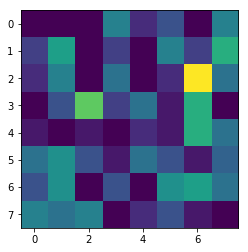

[[ 0.  0.  0.  5. 12.  5.  0.  3.]
 [ 1.  0.  0.  0.  0.  8. 11.  3.]
 [10.  6.  0.  9.  0.  5.  3.  1.]
 [ 0.  3.  5.  5.  9.  3.  1.  7.]
 [ 1.  0.  7.  0.  1.  5.  5.  8.]
 [ 0.  8.  6.  7.  5.  4.  2.  5.]
 [ 9.  8.  0.  2.  0.  4.  5.  0.]
 [ 5. 12.  0.  0.  9.  7. 13.  0.]]


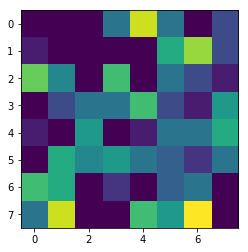

[[ 0.  0.  0.  8.  1.  2.  0.  8.]
 [ 2. 11.  0.  4.  0.  6.  4.  9.]
 [ 3.  9.  0. 10.  0.  2. 15.  4.]
 [ 0.  4. 10.  2.  6.  0. 10.  0.]
 [ 2.  0.  0.  0.  1.  2. 11.  8.]
 [ 7.  7.  4.  0.  8.  4.  2.  3.]
 [ 4.  6.  0.  0.  0. 10.  9.  9.]
 [ 8.  7.  8.  0.  2.  5.  0.  0.]]


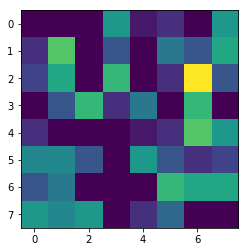

[[ 0.  0.  0.  6.  8.  1.  0.  3.]
 [ 2.  0.  0.  0.  0.  7. 11.  2.]
 [ 7.  9.  0. 16.  0.  4.  6.  0.]
 [ 0.  4.  7.  5. 13.  0.  4.  5.]
 [ 6.  0.  2.  0.  1.  7.  5. 13.]
 [ 2.  2.  4.  6.  6.  2.  3.  1.]
 [ 3.  6.  0.  0.  0. 10. 12.  1.]
 [ 8. 15.  2.  0.  6.  5.  7.  0.]]


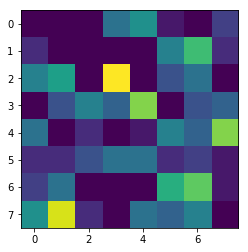

[[ 0.  0.  0.  6.  8.  6.  0.  1.]
 [ 0.  0.  0.  6.  0. 10.  2.  3.]
 [10.  4.  0.  6.  0.  6.  6.  9.]
 [ 0. 10.  5.  6.  7.  6.  0. 12.]
 [ 5.  0.  7.  0.  1.  7.  6.  2.]
 [ 1.  7.  3. 11.  4.  2.  4.  9.]
 [ 8.  6.  0.  5.  0.  4.  5.  0.]
 [ 0.  4.  0.  0.  5. 12. 10.  0.]]


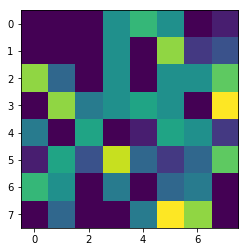

[[ 0.  0.  0.  6.  4.  5.  0.  6.]
 [ 1.  5.  0.  2.  0.  8.  8.  4.]
 [ 8.  8.  0.  8.  0.  6.  6.  5.]
 [ 0.  6.  7.  7.  8.  2.  5.  2.]
 [ 0.  0.  5.  0.  0.  3.  4.  7.]
 [ 5.  4.  2.  3.  7.  4.  3.  4.]
 [10.  7.  0.  2.  0.  8.  6.  6.]
 [ 5.  7.  0.  0. 10.  7.  8.  0.]]


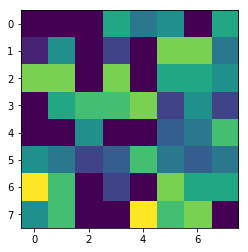

[[ 0.  0.  0.  7.  6.  6.  0.  1.]
 [ 0.  2.  0.  5.  0. 10.  3.  3.]
 [11.  5.  0.  8.  0.  8.  6.  7.]
 [ 0.  9.  4.  5.  6.  6.  3.  9.]
 [ 4.  0.  5.  0.  1.  7.  6.  2.]
 [ 0.  7.  4.  9.  6.  2.  5.  5.]
 [ 9.  5.  0.  4.  0.  5.  6.  0.]
 [ 2.  6.  1.  0.  5. 12.  8.  0.]]


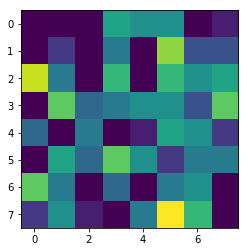

[[ 0.  0.  0.  5.  5.  7.  0.  5.]
 [ 5.  7.  0.  3.  0.  5.  4.  8.]
 [ 5.  3.  0.  0.  0.  2. 11.  6.]
 [ 0.  3.  9.  3.  2.  3. 10.  3.]
 [ 0.  0.  6.  0.  2.  0.  9.  5.]
 [ 5.  9.  7.  1.  1.  4.  0. 11.]
 [10. 10.  0.  8.  0.  1.  3.  9.]
 [ 9.  4.  8.  0.  5.  5.  8.  0.]]


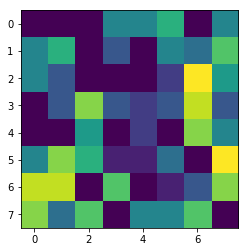

[[ 0.  0.  0.  6.  1.  6.  0.  4.]
 [ 0.  6.  0.  5.  0.  8.  5.  1.]
 [14.  8.  0. 10.  0. 12.  0.  4.]
 [ 0. 10.  1.  5.  3.  8.  4.  2.]
 [ 0.  0.  8.  0.  0.  6.  1.  4.]
 [ 1.  6.  3.  3.  8.  1.  8.  2.]
 [14.  4.  0.  4.  0.  4.  4.  9.]
 [ 4.  5.  0.  0. 14. 12.  7.  0.]]


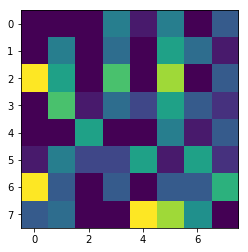

[[ 0.  0.  0.  5.  2.  6.  0.  5.]
 [ 4. 10.  0.  5.  0.  5.  2.  7.]
 [ 8.  4.  0.  2.  0.  5.  8.  6.]
 [ 0.  5.  6.  2.  0.  4. 11.  2.]
 [ 0.  0.  7.  0.  2.  2.  7.  3.]
 [ 6.  7.  6.  1.  2.  3.  2. 12.]
 [14.  8.  0.  8.  0.  1.  0. 13.]
 [ 7.  1.  7.  0.  8.  7.  7.  0.]]


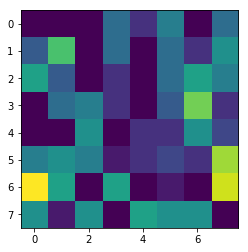

[[ 0.  0.  0.  2.  5.  1.  0.  7.]
 [ 2.  0.  0.  4.  0.  6.  6.  3.]
 [ 1.  8.  0.  9.  0.  0.  4.  8.]
 [ 0.  8.  7. 11.  9.  0.  2. 10.]
 [ 3.  0. 11.  0.  1.  7.  2. 12.]
 [13.  2.  0. 10.  2.  3.  3. 15.]
 [ 4.  6.  0.  2.  0.  6.  4.  1.]
 [ 0.  6.  2.  0.  7.  8. 11.  0.]]


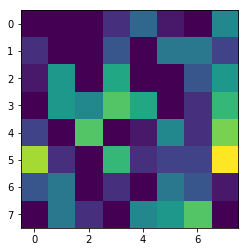

[[ 0.  0.  0.  2.  4.  2.  0.  3.]
 [ 1.  0.  0.  1.  0.  6.  6.  5.]
 [ 2.  8.  0. 14.  0.  2. 10.  1.]
 [ 0.  7.  7.  7.  8.  0.  8.  5.]
 [ 3.  0.  7.  0.  2.  8.  3. 15.]
 [ 8.  1.  3.  7.  2.  3.  1. 12.]
 [ 5.  5.  0.  1.  0.  7.  8.  4.]
 [ 4. 13.  4.  0.  2.  9.  9.  0.]]


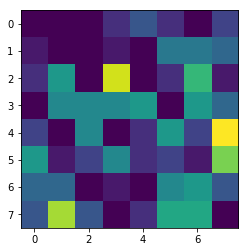

[[ 0.  0.  0.  8.  6.  4.  0.  5.]
 [ 1.  2.  0.  3.  0. 10.  7.  4.]
 [ 7.  8.  0.  8.  0.  3.  6.  7.]
 [ 0.  6.  6.  8. 10.  3.  3.  7.]
 [ 0.  0.  7.  0.  0.  4.  6.  5.]
 [ 6.  4.  1.  7.  7.  3.  3.  6.]
 [ 8.  7.  0.  2.  0.  6.  4.  2.]
 [ 2.  7.  1.  0.  8.  7.  9.  0.]]


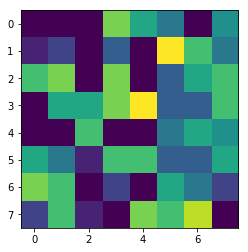

[[ 0.  0.  0.  0. 10.  2.  0.  9.]
 [ 9.  2.  0.  0.  0.  0. 14.  1.]
 [ 5.  3.  0.  5.  0.  3.  4.  0.]
 [ 0.  0.  9.  4.  5.  0.  6.  3.]
 [ 1.  0.  8.  0.  2.  4.  5. 17.]
 [ 6.  9.  7.  1.  0.  4.  1. 10.]
 [ 5.  9.  0.  5.  0.  1.  7.  7.]
 [13. 10.  5.  0. 11.  1. 10.  0.]]


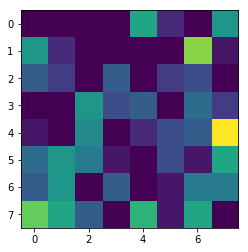

[[ 0.  0.  0.  4.  9.  3.  0.  8.]
 [ 7.  3.  0.  0.  0.  3. 14.  3.]
 [ 5.  5.  0.  5.  0.  2.  4.  0.]
 [ 0.  0.  8.  6.  7.  1.  8.  1.]
 [ 0.  0. 10.  0.  0.  1.  5. 12.]
 [ 7.  7.  5.  0.  2.  4.  1.  8.]
 [ 9. 10.  0.  5.  0.  2.  3. 10.]
 [10. 10.  3.  0. 14.  2. 11.  0.]]


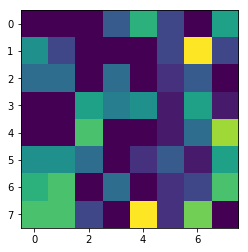

[[ 0.  0.  0.  2.  8.  0.  0. 11.]
 [ 8.  0.  0.  1.  0.  3. 14.  1.]
 [ 1.  8.  0.  7.  0.  0.  1.  4.]
 [ 0.  2.  8. 10. 10.  0.  3.  5.]
 [ 0.  0. 12.  0.  0.  4.  2. 15.]
 [12.  6.  0.  3.  2.  4.  2. 12.]
 [ 4.  8.  0.  3.  0.  4.  5.  6.]
 [ 7.  8.  3.  0. 14.  2. 12.  0.]]


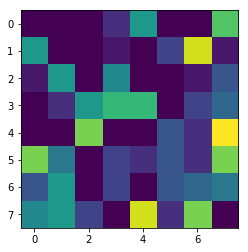

[[0. 0. 0. 6. 9. 6. 0. 3.]
 [3. 2. 0. 4. 0. 8. 4. 4.]
 [8. 4. 0. 3. 0. 5. 6. 9.]
 [0. 6. 8. 7. 7. 6. 2. 9.]
 [2. 0. 9. 0. 2. 4. 6. 3.]
 [2. 9. 3. 8. 3. 4. 2. 8.]
 [8. 9. 0. 7. 0. 3. 4. 0.]
 [2. 4. 1. 0. 8. 7. 9. 0.]]


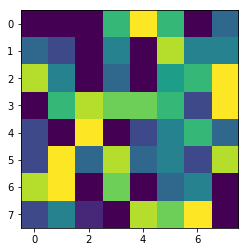

[[0. 0. 0. 6. 7. 5. 0. 4.]
 [1. 2. 0. 4. 0. 9. 6. 4.]
 [8. 7. 0. 6. 0. 5. 5. 8.]
 [0. 7. 6. 7. 9. 4. 3. 8.]
 [0. 0. 9. 0. 1. 5. 5. 4.]
 [5. 5. 2. 7. 5. 3. 3. 7.]
 [9. 7. 0. 4. 0. 5. 3. 3.]
 [2. 5. 1. 0. 8. 8. 9. 0.]]


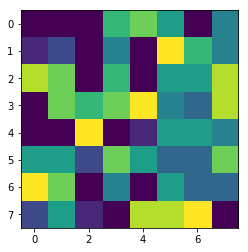

[[ 0.  0.  0.  1.  7.  2.  0.  8.]
 [ 3.  0.  0.  2.  0.  3.  8.  2.]
 [ 4.  6.  0.  8.  0.  2.  5.  4.]
 [ 0.  4.  6.  7.  5.  0.  3.  8.]
 [ 2.  0. 10.  0.  2.  6.  4. 13.]
 [ 8.  8.  4.  6.  0.  4.  1. 14.]
 [ 6.  8.  0.  3.  0.  2.  5.  4.]
 [ 5.  9.  5.  0.  8.  8. 12.  0.]]


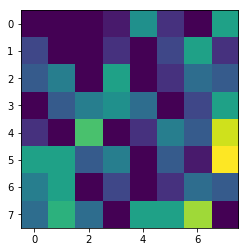

[[ 0.  0.  0.  6.  2.  4.  0.  5.]
 [ 0.  1.  0.  1.  0.  8.  6.  6.]
 [ 4. 11.  0. 12.  0.  2. 10.  4.]
 [ 0.  8.  8.  7. 10.  0. 11.  2.]
 [ 0.  0.  6.  0.  3.  4.  3. 11.]
 [ 8.  0.  0.  3.  6.  3.  3.  7.]
 [ 9.  5.  0.  1.  0. 10.  6.  7.]
 [ 3.  9.  3.  0.  5.  6.  7.  0.]]


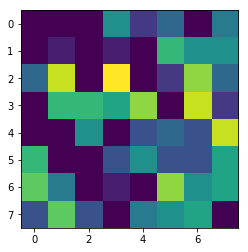

[[ 0.  0.  0.  7.  3.  4.  0.  5.]
 [ 6.  5.  0.  0.  0.  6.  3. 11.]
 [ 2.  5.  0.  7.  0.  0. 18.  3.]
 [ 0.  0. 12.  0.  5.  2. 15.  0.]
 [ 2.  0.  1.  0.  5.  2. 13.  7.]
 [ 5.  8.  9.  1.  2.  3.  0.  6.]
 [ 4.  9.  0.  6.  0.  5.  9.  7.]
 [ 9. 10. 11.  0.  0.  1.  2.  0.]]


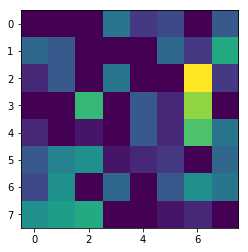

[[ 0.  0.  0.  8.  2.  2.  0.  8.]
 [ 1.  6.  0.  3.  0.  9.  5.  8.]
 [ 2.  9.  0.  9.  0.  1. 13.  7.]
 [ 0.  5. 11.  6.  9.  0.  7.  3.]
 [ 2.  0.  3.  0.  2.  2.  8.  7.]
 [ 8.  6.  0.  3.  8.  5.  2.  4.]
 [ 3.  6.  0.  2.  0. 11.  8.  3.]
 [ 3.  6.  5.  0.  3.  4.  2.  0.]]


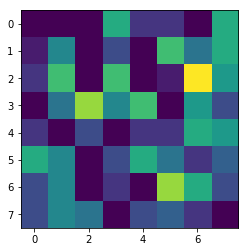

[[ 0.  0.  0.  6.  5.  5.  0.  7.]
 [ 1.  4.  0.  2.  0.  8.  9.  6.]
 [ 6.  8.  0.  7.  0.  2.  7.  5.]
 [ 0.  5.  7.  7.  9.  1.  8.  3.]
 [ 0.  0.  7.  0.  1.  2.  5.  7.]
 [ 7.  3.  2.  3.  6.  5.  1.  7.]
 [11.  7.  0.  3.  0.  6.  3.  7.]
 [ 4.  7.  2.  0.  9.  5. 10.  0.]]


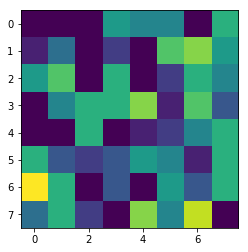

[[ 0.  0.  0.  6.  3.  8.  0.  3.]
 [ 3. 11.  0.  5.  0.  6.  2.  8.]
 [ 7.  4.  0.  0.  0.  5. 10.  6.]
 [ 0.  6.  7.  2.  1.  5. 11.  2.]
 [ 0.  0.  6.  0.  3.  1.  6.  2.]
 [ 4.  7.  6.  1.  2.  4.  2.  9.]
 [13.  8.  0.  9.  0.  2.  2. 11.]
 [ 6.  1.  6.  0.  6.  7.  7.  0.]]


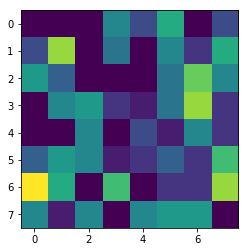

[[ 0.  0.  0.  4.  4.  6.  0.  4.]
 [ 3.  2.  0.  2.  0.  5.  3.  8.]
 [ 3.  5.  0.  4.  0.  3. 13.  5.]
 [ 0.  5.  9.  4.  3.  1. 11.  4.]
 [ 1.  0.  7.  0.  5.  4.  6.  9.]
 [ 6.  7.  5.  3.  0.  4.  1. 12.]
 [ 9.  7.  0.  8.  0.  3.  5.  7.]
 [ 5.  6.  8.  0.  2.  6.  8.  0.]]


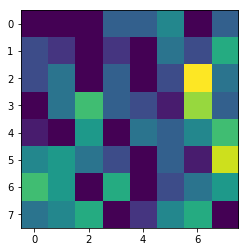

[[ 0.  0.  0.  8.  7.  4.  0.  0.]
 [ 1.  0.  0.  0.  0.  9. 11.  6.]
 [ 5. 10.  0. 13.  0.  3.  9.  0.]
 [ 0.  5.  8.  7. 14.  0. 12.  0.]
 [ 0.  0.  6.  0.  4.  4.  1. 13.]
 [ 3.  0.  3.  3.  4.  3.  2.  3.]
 [10.  5.  0.  2.  0.  9.  6.  5.]
 [ 5. 14.  0.  0.  7.  3. 10.  0.]]


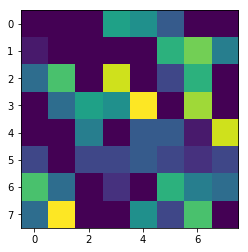

[[ 0.  0.  0.  5.  1.  6.  0.  5.]
 [ 0.  5.  0.  4.  0.  7.  5.  0.]
 [13.  7.  0. 11.  0. 14.  0.  5.]
 [ 0. 10.  4.  5.  3.  8.  4.  1.]
 [ 1.  0.  6.  0.  4.  7.  0.  5.]
 [ 0.  7.  3.  2.  7.  1.  9.  0.]
 [11.  3.  0.  6.  0.  6.  7.  7.]
 [ 5.  6.  0.  0. 12. 11.  5.  0.]]


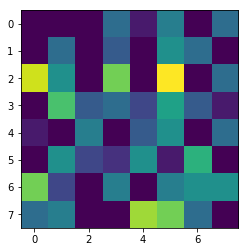

[[ 0.  0.  0.  6.  6.  5.  0.  5.]
 [ 0.  2.  0.  3.  0.  6.  6.  5.]
 [10.  7.  0.  9.  0.  4.  7.  3.]
 [ 0.  5.  3.  3.  5.  2.  6.  5.]
 [ 0.  0.  7.  0.  2.  4.  6.  6.]
 [ 3.  7.  6.  5.  5.  4.  2.  8.]
 [12.  6.  0.  2.  0.  4.  3.  6.]
 [ 4.  9.  3.  0.  6. 10. 10.  0.]]


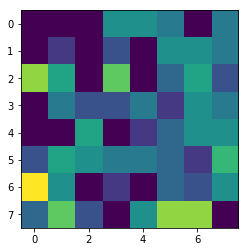

[[ 0.  0.  0.  5. 10.  3.  0.  8.]
 [ 6.  2.  0.  2.  0.  6. 12.  2.]
 [ 4.  6.  0.  4.  0.  1.  1.  6.]
 [ 0.  2.  9. 10. 11.  3.  0.  7.]
 [ 0.  0. 11.  0.  1.  3.  4.  8.]
 [ 8.  8.  1.  5.  4.  5.  3.  8.]
 [ 5. 10.  0.  5.  0.  4.  4.  3.]
 [ 4.  5.  0.  0. 14.  2. 11.  0.]]


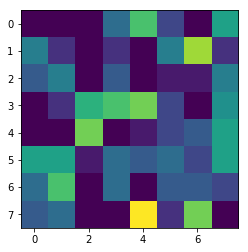

[[ 0.  0.  0.  3.  8.  3.  0.  9.]
 [ 4.  0.  0.  2.  0.  5.  9.  2.]
 [ 4.  6.  0.  6.  0.  2.  3.  7.]
 [ 0.  4.  8.  9.  9.  1.  1.  8.]
 [ 1.  0. 11.  0.  1.  5.  4.  9.]
 [ 9.  8.  1.  6.  3.  5.  2. 11.]
 [ 6.  9.  0.  4.  0.  4.  4.  3.]
 [ 3.  5.  2.  0. 11.  5. 11.  0.]]


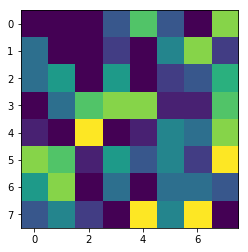

[[ 0.  0.  0.  5.  2.  4.  0.  8.]
 [ 2. 13.  0.  6.  0.  3.  5.  5.]
 [10.  6.  0.  6.  0.  5.  8.  4.]
 [ 0.  6.  4.  0.  1.  2.  9.  3.]
 [ 0.  0.  3.  0.  0.  2.  8.  5.]
 [ 6.  8.  6.  0.  5.  4.  3.  7.]
 [11.  7.  0.  2.  0.  5.  3. 14.]
 [ 9.  3.  7.  0.  8.  7.  5.  0.]]


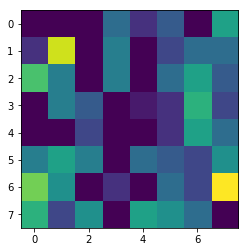

[[ 0.  0.  0.  6.  1.  3.  0.  7.]
 [ 2.  6.  0.  2.  0.  6.  3.  9.]
 [ 3.  6.  0.  9.  0.  3. 16.  4.]
 [ 0.  5. 11.  1.  5.  0. 10.  1.]
 [ 4.  0.  0.  0.  4.  3. 10.  9.]
 [ 6.  8.  5.  1.  5.  5.  2.  4.]
 [ 3.  6.  0.  3.  0.  9. 11.  5.]
 [ 7.  9.  8.  0.  0.  5.  0.  0.]]


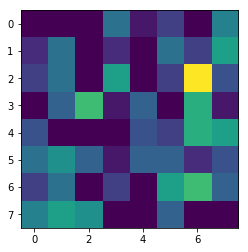

[[ 0.  0.  0.  7.  6.  6.  0.  6.]
 [ 1.  4.  0.  4.  0.  9.  8.  4.]
 [ 7.  7.  0.  5.  0.  2.  5.  6.]
 [ 0.  5.  6.  8.  9.  3.  5.  5.]
 [ 0.  0.  8.  0.  0.  2.  6.  4.]
 [ 7.  4.  2.  5.  6.  5.  2.  8.]
 [11.  7.  0.  3.  0.  5.  2.  6.]
 [ 2.  5.  1.  0. 10.  6. 11.  0.]]


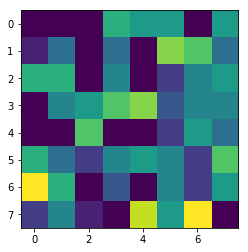

[[ 0.  0.  0.  7.  3.  4.  0.  0.]
 [ 2.  0.  0.  2.  1.  5.  1.  8.]
 [ 2.  6.  0.  8.  0.  1. 11.  0.]
 [ 0.  6.  5.  6.  6.  2. 18.  5.]
 [ 0.  0. 12.  0.  6.  5.  1. 10.]
 [ 6.  0.  5.  6.  0.  0.  3. 15.]
 [10.  2.  0.  9.  0.  0.  2. 10.]
 [ 4.  8. 11.  0.  2.  9. 11.  0.]]


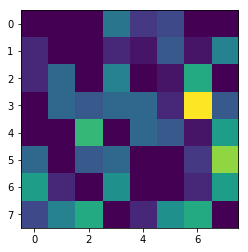

[[ 0.  0.  0.  7.  3.  6.  0.  3.]
 [ 0.  3.  0.  4.  0.  9.  2.  7.]
 [ 5.  7.  0.  6.  0.  5. 11.  8.]
 [ 0.  8.  9.  6.  6.  3.  7.  5.]
 [ 1.  0.  7.  0.  4.  4.  5.  6.]
 [ 5.  6.  2.  5.  4.  4.  3.  7.]
 [ 8.  5.  0.  6.  0.  7.  5.  2.]
 [ 1.  5.  4.  0.  3.  9.  5.  0.]]


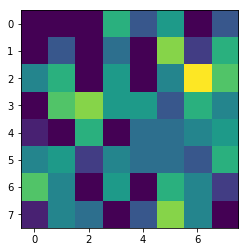

[[ 0.  0.  0.  3.  2.  3.  0.  3.]
 [ 0.  0.  0.  1.  1.  5.  1.  7.]
 [ 3.  8.  0. 12.  0.  3. 14.  2.]
 [ 0.  9.  7.  4.  5.  0. 14.  5.]
 [ 3.  0.  7.  0.  6.  8.  3. 14.]
 [ 7.  1.  5.  5.  0.  2.  2. 12.]
 [ 7.  3.  0.  4.  0.  6.  7.  6.]
 [ 4. 11.  9.  0.  0. 10.  6.  0.]]


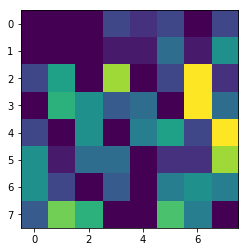

[[ 0.  0.  0.  9. 10.  4.  0.  5.]
 [ 2.  2.  0.  2.  0.  9. 11.  3.]
 [ 9.  8.  0.  8.  0.  4.  3.  3.]
 [ 0.  2.  4.  7. 11.  5.  2.  6.]
 [ 0.  0.  8.  0.  1.  2.  6.  4.]
 [ 3.  7.  4.  5.  8.  3.  3.  2.]
 [ 9.  7.  0.  2.  0.  6.  3.  2.]
 [ 3. 10.  0.  0. 12.  5. 11.  0.]]


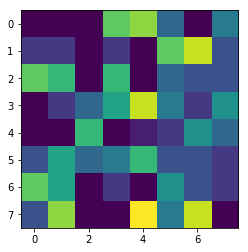

[[ 0.  0.  0.  6.  9.  3.  0.  2.]
 [ 6.  0.  0.  0.  2.  7. 12.  5.]
 [ 2.  8.  0.  9.  0.  1.  9.  0.]
 [ 0.  2. 11.  7. 14.  0. 11.  2.]
 [ 1.  0.  4.  0.  4.  5.  3. 15.]
 [ 3.  0.  4.  3.  2.  4.  1.  3.]
 [ 5.  7.  0.  3.  0. 10. 10.  4.]
 [ 9. 13.  2.  0.  7.  0.  8.  0.]]


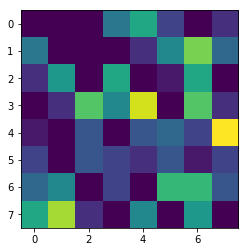

[[ 0.  0.  0.  2.  4.  2.  0.  7.]
 [ 0.  0.  0.  4.  0.  4.  3.  5.]
 [ 2.  7.  0. 10.  0.  0. 10.  7.]
 [ 0.  8.  6.  6.  5.  0.  5.  9.]
 [ 4.  0.  8.  0.  2.  7.  5. 11.]
 [10.  6.  1.  8.  1.  5.  1. 16.]
 [ 5.  5.  0.  2.  0.  6.  5.  3.]
 [ 1.  7.  7.  0.  2. 11.  9.  0.]]


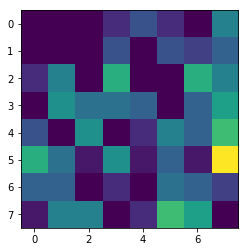

[[ 0.  0.  0.  6.  2.  5.  0.  7.]
 [ 4.  9.  1.  3.  0.  6.  2. 10.]
 [ 3.  5.  0.  6.  0.  4. 16.  5.]
 [ 0.  3. 12.  0.  4.  2. 10.  0.]
 [ 3.  0.  1.  0.  4.  2. 10.  6.]
 [ 4. 10.  6.  0.  4.  6.  1.  4.]
 [ 4.  7.  0.  6.  0.  8. 11.  6.]
 [ 7.  7.  8.  0.  1.  4.  0.  0.]]


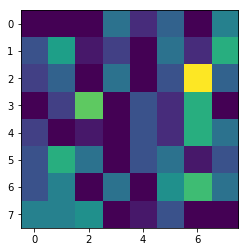

[[ 0.  0.  0.  7.  6.  8.  0.  2.]
 [ 5.  9.  1.  2.  0.  5.  4. 10.]
 [ 6.  2.  0.  2.  0.  3. 14.  2.]
 [ 0.  0.  9.  0.  3.  4. 11.  2.]
 [ 0.  0.  2.  0.  2.  1. 12.  3.]
 [ 0. 10. 11.  1.  2.  5.  0.  6.]
 [ 9. 10.  0.  8.  0.  3.  6.  8.]
 [ 9.  7.  8.  0.  2.  4.  6.  0.]]


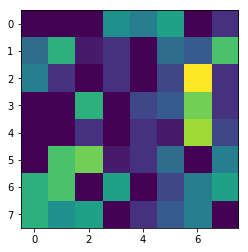

[[ 0.  0.  0.  5.  0.  5.  0.  7.]
 [ 1.  8.  0.  5.  1.  6.  5.  0.]
 [11.  8.  0. 10.  0. 13.  1.  5.]
 [ 0. 10.  5.  4.  2.  7.  4.  2.]
 [ 4.  0.  4.  0.  3.  8.  1.  6.]
 [ 1.  7.  2.  1.  7.  2.  9.  0.]
 [ 7.  3.  0.  5.  0.  8.  9.  7.]
 [ 7.  5.  1.  0. 11.  9.  2.  0.]]


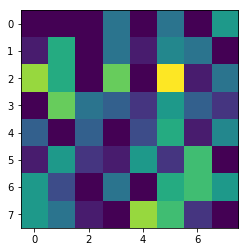

[[ 0.  0.  0.  7.  3.  6.  0.  7.]
 [ 4. 13.  0.  6.  0.  5.  3.  8.]
 [ 6.  4.  0.  1.  0.  4. 11.  7.]
 [ 0.  3.  8.  1.  3.  4.  7.  4.]
 [ 0.  0.  3.  0.  1.  1. 10.  1.]
 [ 5. 11.  6.  1.  4.  5.  2.  6.]
 [ 8.  9.  0.  6.  0.  5.  5.  9.]
 [ 8.  2.  7.  0.  6.  4.  4.  0.]]


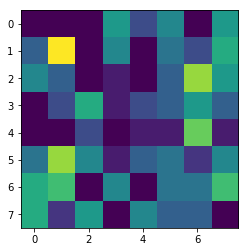

[[ 0.  0.  0.  7.  9.  7.  0.  2.]
 [ 5.  9.  0.  5.  0.  7.  5.  4.]
 [12.  2.  0.  1.  0.  8.  4.  5.]
 [ 0.  5.  7.  2.  5.  8.  2.  7.]
 [ 1.  0.  5.  0.  2.  4.  6.  1.]
 [ 0. 11.  6.  5.  3.  4.  4.  4.]
 [10.  7.  0.  8.  0.  3.  5.  3.]
 [ 5.  2.  1.  0. 10.  7.  9.  0.]]


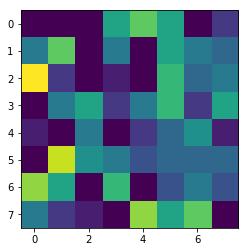

[[ 0.  0.  0.  6.  4.  1.  0.  0.]
 [11.  0.  0.  0.  4.  3.  3.  7.]
 [ 0.  3.  0.  7.  0.  1. 16.  0.]
 [ 0.  1. 13.  0.  8.  3. 20.  0.]
 [ 9.  0.  2.  0. 11.  9.  2. 15.]
 [ 0.  0.  9.  4.  0.  0.  2.  6.]
 [ 0.  1.  0. 12.  0.  6. 14.  3.]
 [12. 13.  9.  0.  0.  0.  5.  0.]]


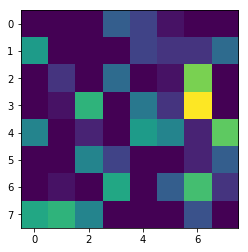

[[ 0.  0.  0.  8. 12.  4.  0.  3.]
 [ 3.  0.  0.  2.  0.  9. 11.  2.]
 [10.  6.  0.  9.  0.  4.  3.  1.]
 [ 0.  2.  5.  5. 11.  6.  0.  8.]
 [ 2.  0.  6.  0.  1.  4.  7.  5.]
 [ 0.  9.  6.  7.  7.  3.  3.  2.]
 [ 7.  7.  0.  2.  0.  5.  6.  0.]
 [ 4. 12.  0.  0. 10.  5. 10.  0.]]


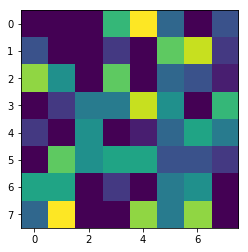

[[ 0.  0.  0. 10.  4.  5.  0.  0.]
 [ 2.  0.  0.  0.  2.  7.  1.  8.]
 [ 2.  7.  0.  9.  0.  3. 13.  0.]
 [ 0.  6.  6.  5.  9.  4. 20.  2.]
 [ 0.  0.  9.  0.  8.  5.  1.  9.]
 [ 0.  0.  6.  4.  0.  0.  4.  8.]
 [ 9.  2.  0.  9.  0.  3.  4.  7.]
 [ 5. 12.  8.  0.  2.  6.  8.  0.]]


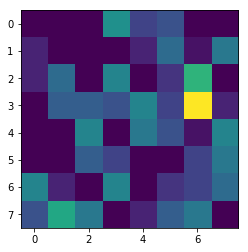

[[ 0.  0.  0.  6.  2.  6.  0.  8.]
 [ 3. 13.  0.  4.  0.  4.  5.  7.]
 [ 7.  6.  0.  4.  0.  5. 10.  4.]
 [ 0.  5.  7.  1.  1.  2. 10.  0.]
 [ 0.  0.  3.  0.  0.  2.  8.  5.]
 [ 5.  8.  6.  0.  5.  6.  2.  6.]
 [12.  7.  0.  5.  0.  6.  4. 13.]
 [ 9.  4.  6.  0.  7.  6.  5.  0.]]


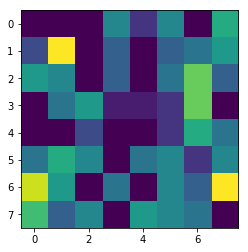

[[0. 0. 0. 6. 3. 5. 0. 6.]
 [1. 7. 0. 6. 0. 7. 6. 1.]
 [9. 6. 0. 8. 0. 8. 4. 5.]
 [0. 9. 6. 4. 6. 5. 2. 6.]
 [5. 0. 2. 0. 0. 7. 5. 6.]
 [2. 7. 2. 5. 6. 5. 5. 2.]
 [7. 4. 0. 3. 0. 8. 9. 4.]
 [6. 5. 2. 0. 7. 8. 5. 0.]]


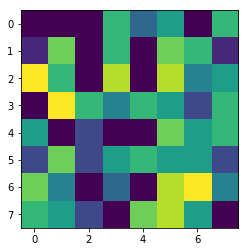

[[ 0.  0.  0.  3.  7.  3.  0.  6.]
 [ 3.  0.  0.  0.  0.  6.  9.  5.]
 [ 4.  7.  0. 10.  0.  2.  8.  3.]
 [ 0.  3.  9.  7.  9.  0.  6.  4.]
 [ 3.  0.  5.  0.  2.  6.  6. 13.]
 [ 6.  4.  3.  5.  3.  7.  1.  8.]
 [ 6.  8.  0.  3.  0.  8.  8.  2.]
 [ 5. 10.  2.  0.  6.  3.  9.  0.]]


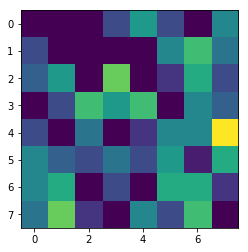

[[ 0.  0.  0.  6.  5.  5.  0.  7.]
 [ 6.  8.  0.  3.  0.  4.  5.  8.]
 [ 4.  4.  0.  3.  0.  1. 11.  3.]
 [ 0.  0.  8.  1.  3.  2. 10.  2.]
 [ 0.  0.  4.  0.  1.  0. 11.  5.]
 [ 6. 10.  9.  1.  3.  5.  0.  9.]
 [ 9.  9.  0.  6.  0.  3.  4. 10.]
 [ 9.  7.  9.  0.  5.  3.  6.  0.]]


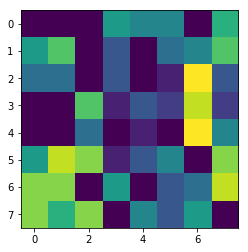

[[ 0.  0.  0.  7.  3.  7.  0.  2.]
 [ 3.  8.  0.  7.  0.  7.  0.  7.]
 [ 4.  4.  0.  0.  0.  4.  9.  9.]
 [ 0.  8.  7.  5.  3.  5.  9.  7.]
 [ 0.  0.  8.  0.  3.  3.  5.  1.]
 [ 7.  5.  3.  5.  1.  3.  4. 12.]
 [11.  6.  0. 10.  0.  3.  2.  7.]
 [ 2.  0.  6.  0.  5.  8.  7.  0.]]


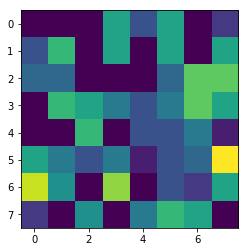

[[ 0.  0.  0.  8.  1.  5.  0.  7.]
 [ 0.  9.  0.  4.  0.  7.  2.  9.]
 [ 3.  8.  0.  7.  0.  4. 13.  8.]
 [ 0.  6. 10.  5.  5.  1.  8.  0.]
 [ 1.  0.  5.  0.  2.  2.  6.  5.]
 [ 7.  7.  1.  2.  7.  7.  2.  5.]
 [ 7.  6.  0.  4.  0. 10.  7.  6.]
 [ 2.  4.  5.  0.  4.  7.  3.  0.]]


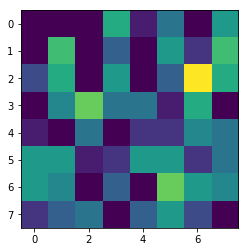

[[ 0.  0.  0.  5.  3.  4.  0.  8.]
 [ 1.  5.  0.  2.  1.  7.  7.  6.]
 [ 5.  8.  0.  9.  0.  5.  9.  4.]
 [ 0.  7. 10.  5.  8.  1.  7.  1.]
 [ 2.  0.  3.  0.  1.  4.  5. 10.]
 [ 6.  4.  1.  2.  7.  7.  3.  3.]
 [ 7.  5.  0.  2.  0. 11.  9.  5.]
 [ 5.  7.  3.  0.  6.  5.  4.  0.]]


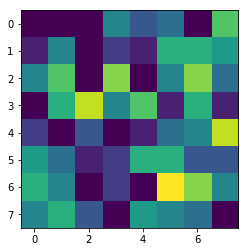

[[ 0.  0.  0.  5.  8.  4.  0.  1.]
 [ 0.  0.  0.  0.  2.  8.  8.  5.]
 [ 7.  6.  0. 13.  0.  5.  9.  0.]
 [ 0.  6.  8.  4. 11.  1.  6.  6.]
 [ 6.  0.  2.  0.  3.  8.  5. 12.]
 [ 0.  3.  5.  7.  4.  6.  1.  3.]
 [ 6.  5.  0.  2.  0. 10. 11.  0.]
 [ 5. 13.  1.  0.  2.  7.  8.  0.]]


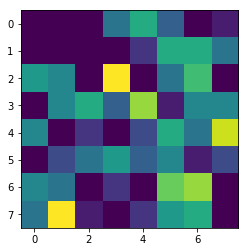

[[ 0.  0.  0.  6.  2.  2.  0.  8.]
 [ 2. 10.  0.  7.  1.  6.  5.  1.]
 [ 7.  7.  0.  9.  0.  7.  4.  6.]
 [ 0.  9.  6.  4.  6.  5.  2.  6.]
 [ 6.  0.  0.  0.  0.  6.  6.  5.]
 [ 4.  7.  0.  4.  8.  4.  7.  1.]
 [ 4.  4.  0.  2.  0. 10. 10.  5.]
 [ 7.  4.  4.  0.  7.  8.  2.  0.]]


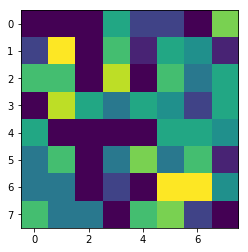

[[ 0.  0.  0.  9.  3.  6.  0.  5.]
 [ 4. 12.  0.  6.  1.  6.  3.  8.]
 [ 4.  6.  0.  1.  0.  2. 10.  8.]
 [ 0.  4.  8.  5.  4.  3.  8.  4.]
 [ 0.  0.  7.  0.  0.  0.  7.  1.]
 [ 8.  7.  2.  3.  4.  5.  2.  9.]
 [ 9.  7.  0.  7.  0.  6.  2. 10.]
 [ 3.  1.  6.  0.  6.  6.  6.  0.]]


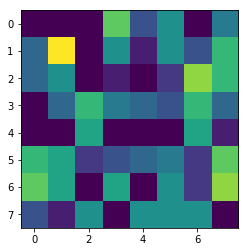

[[ 0.  0.  0.  5.  1.  5.  0.  7.]
 [ 0.  6.  0.  2.  2.  6.  3.  8.]
 [ 3.  8.  0.  9.  0.  6. 13.  5.]
 [ 0.  7.  9.  4.  4.  0. 11.  0.]
 [ 1.  0.  5.  0.  3.  3.  3. 10.]
 [ 6.  6.  2.  1.  5.  7.  2.  6.]
 [ 8.  4.  0.  4.  0.  9.  8.  8.]
 [ 4.  7.  6.  0.  3.  8.  4.  0.]]


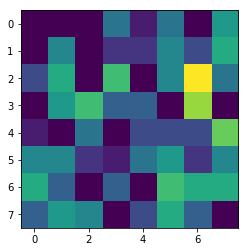

[[ 0.  0.  0.  5.  2.  6.  0.  8.]
 [ 2. 12.  0.  5.  1.  4.  2.  7.]
 [ 7.  5.  0.  4.  0.  6. 11.  6.]
 [ 0.  7.  9.  1.  1.  3.  7.  2.]
 [ 2.  0.  2.  0.  1.  3.  7.  6.]
 [ 4. 10.  4.  0.  5.  7.  2.  5.]
 [ 8.  7.  0.  5.  0.  8.  8.  9.]
 [ 8.  3.  6.  0.  5.  7.  3.  0.]]


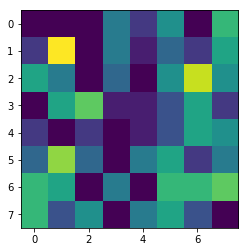

[[ 0.  0.  0.  6.  4.  8.  0.  2.]
 [ 1.  0.  0.  2.  2.  8.  1.  7.]
 [ 4.  6.  0.  4.  0.  7. 12.  7.]
 [ 0. 10. 11.  6.  6.  4. 10.  3.]
 [ 1.  0.  9.  0.  7.  5.  1.  7.]
 [ 3.  4.  2.  4.  1.  4.  3.  6.]
 [ 9.  4.  0. 10.  0.  6.  7.  2.]
 [ 1.  5.  4.  0.  4.  8.  6.  0.]]


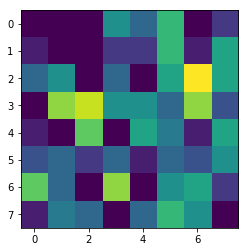

[[ 0.  0.  0.  1. 10.  3.  0. 10.]
 [ 9.  3.  0.  2.  3.  1. 12.  0.]
 [ 4.  2.  0.  1.  0.  4.  0.  4.]
 [ 0.  2. 10.  8.  6.  3.  2.  6.]
 [ 1.  0. 11.  0.  2.  4.  2. 12.]
 [ 7. 11.  3.  2.  0.  7.  3. 10.]
 [ 6.  7.  0.  8.  0.  1.  5.  4.]
 [ 7.  5.  2.  0. 14.  3. 11.  0.]]


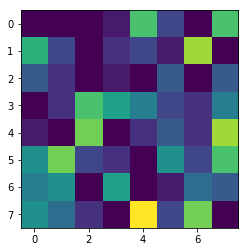

[[ 0.  0.  0.  6.  0.  3.  0.  8.]
 [ 2.  1.  0.  2.  1.  7.  1. 10.]
 [ 0.  8.  0.  8.  0.  2. 15.  8.]
 [ 0.  7. 13.  6.  6.  1. 12.  1.]
 [ 2.  0.  6.  0.  6.  3.  6.  8.]
 [10.  6.  1.  2.  4.  5.  3.  8.]
 [ 3.  5.  0.  7.  0.  8.  8.  4.]
 [ 2.  7.  8.  0.  1.  4.  2.  0.]]


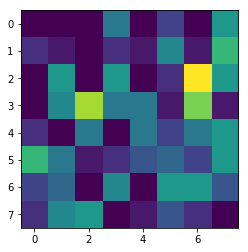

[[ 0.  0.  0.  7.  5.  7.  0.  6.]
 [ 3.  8.  0.  4.  0.  8.  7.  5.]
 [ 6.  5.  0.  2.  0.  4.  4.  7.]
 [ 0.  5.  8.  8.  8.  4.  7.  3.]
 [ 0.  0.  8.  0.  0.  1.  5.  3.]
 [ 7.  4.  1.  2.  6.  7.  2.  7.]
 [14.  7.  0.  6.  0.  5.  1.  9.]
 [ 3.  2.  1.  0. 12.  5. 10.  0.]]


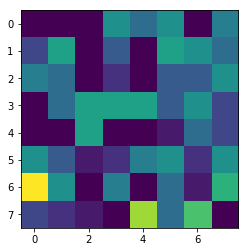

[[ 0.  0.  0.  7.  9.  4.  0.  5.]
 [ 4.  2.  0.  0.  2.  8. 11.  6.]
 [ 3.  7.  0.  8.  0.  1.  8.  1.]
 [ 0.  2. 11.  7. 13.  1.  7.  4.]
 [ 1.  0.  4.  0.  1.  3.  7.  9.]
 [ 5.  3.  4.  4.  5.  7.  1.  3.]
 [ 6.  8.  0.  3.  0.  9.  8.  2.]
 [ 6. 10.  2.  0.  7.  1.  8.  0.]]


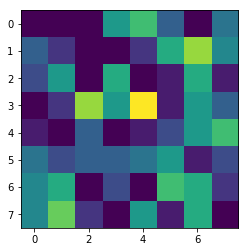

[[ 0.  0.  0.  3.  4.  2.  0.  6.]
 [ 0.  3.  0.  6.  0.  5.  2.  4.]
 [ 4.  5.  0.  7.  0.  1.  7.  8.]
 [ 0.  8.  5.  7.  5.  0.  2. 13.]
 [ 4.  0.  8.  0.  0.  7.  7.  7.]
 [10.  6.  1. 10.  2.  6.  2. 15.]
 [ 6.  5.  0.  2.  0.  5.  4.  3.]
 [ 1.  3.  6.  0.  3. 12.  9.  0.]]


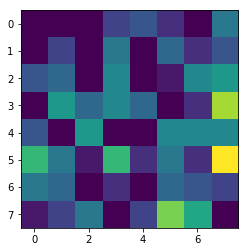

[[ 0.  0.  0.  5.  4.  3.  0.  4.]
 [ 7.  0.  0.  0.  2.  4.  3.  9.]
 [ 0.  4.  0.  7.  0.  0. 16.  1.]
 [ 0.  1. 12.  2.  6.  1. 16.  1.]
 [ 4.  0.  3.  0.  7.  4.  9. 10.]
 [ 6.  4.  8.  2.  0.  4.  1.  9.]
 [ 3.  7.  0.  8.  0.  5. 10.  6.]
 [ 9. 10. 12.  0.  0.  1.  3.  0.]]


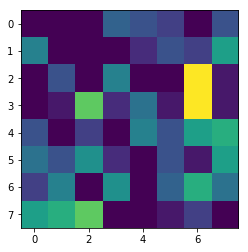

[[ 0.  0.  0.  8.  3.  5.  0.  6.]
 [ 1. 10.  0.  5.  0.  7.  3.  8.]
 [ 5.  7.  0.  5.  0.  3. 11.  6.]
 [ 0.  6.  8.  4.  6.  2.  8.  3.]
 [ 0.  0.  4.  0.  0.  2.  8.  4.]
 [ 6.  6.  3.  2.  6.  6.  2.  6.]
 [ 9.  6.  0.  4.  0.  8.  5.  8.]
 [ 4.  3.  5.  0.  5.  6.  5.  0.]]


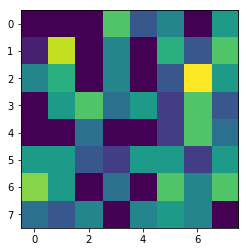

[[ 0.  0.  0.  7.  8.  9.  0.  5.]
 [ 3.  5.  0.  2.  0.  7.  8.  5.]
 [ 8.  4.  0.  2.  0.  6.  5.  4.]
 [ 0.  4.  8.  6.  7.  5.  6.  2.]
 [ 0.  0.  8.  0.  2.  1.  5.  4.]
 [ 3.  8.  4.  2.  5.  7.  1.  5.]
 [13.  8.  0.  7.  0.  3.  2.  6.]
 [ 3.  5.  0.  0. 11.  5. 11.  0.]]


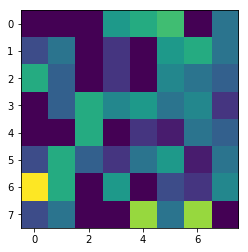

[[ 0.  0.  0.  6.  7.  6.  0.  5.]
 [ 1.  0.  0.  2.  0.  9.  6.  4.]
 [ 7.  6.  0.  6.  0.  5.  5.  7.]
 [ 0.  7.  7.  8.  9.  4.  4.  7.]
 [ 0.  0.  9.  0.  2.  5.  4.  5.]
 [ 5.  4.  2.  7.  5.  6.  3.  7.]
 [10.  6.  0.  5.  0.  5.  4.  2.]
 [ 1.  6.  1.  0.  8.  7. 10.  0.]]


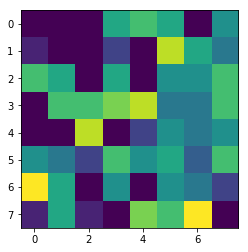

[[ 0.  0.  0.  8.  3.  0.  0.  6.]
 [ 3.  6.  0.  6.  1.  8.  5.  2.]
 [ 3.  7.  0. 11.  0.  3.  7.  5.]
 [ 0.  7.  9.  6. 11.  3.  2.  8.]
 [ 9.  0.  0.  0.  0.  7.  8.  7.]
 [ 6.  5.  0.  6.  7.  3.  6.  2.]
 [ 0.  2.  0.  0.  0. 12. 12.  1.]
 [ 6.  6.  6.  0.  3.  7.  1.  0.]]


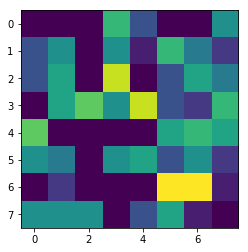

[[ 0.  0.  0.  6.  3.  3.  0.  7.]
 [ 4.  8.  0.  5.  1.  8.  6.  3.]
 [ 5.  5.  0.  7.  0.  5.  7.  6.]
 [ 0.  7. 10.  5. 10.  3.  3.  6.]
 [ 7.  0.  0.  0.  0.  6.  8.  6.]
 [ 4.  6.  0.  4.  7.  6.  5.  2.]
 [ 2.  4.  0.  3.  0. 10. 12.  2.]
 [ 7.  4.  4.  0.  5.  5.  3.  0.]]


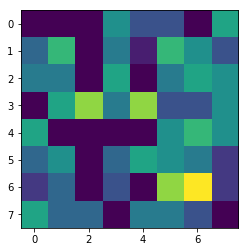

[[ 0.  0.  0.  5.  5.  7.  0.  2.]
 [ 2.  5.  0.  5.  0.  6.  1.  6.]
 [ 6.  3.  0.  1.  0.  4.  8.  8.]
 [ 0.  8.  7.  5.  4.  4.  9.  8.]
 [ 0.  0.  9.  0.  3.  4.  5.  3.]
 [ 6.  5.  4.  6.  0.  5.  2. 13.]
 [12.  5.  0. 10.  0.  2.  2.  6.]
 [ 2.  1.  6.  0.  5.  9.  9.  0.]]


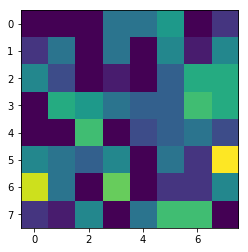

[[ 0.  0.  0.  4.  2.  3.  0. 10.]
 [ 1.  8.  0.  3.  1.  4.  8.  4.]
 [ 7.  9.  0.  8.  0.  3.  6.  3.]
 [ 0.  7.  5.  4.  6.  0.  8.  3.]
 [ 0.  0.  6.  0.  0.  3.  5.  9.]
 [ 9.  4.  2.  1.  6.  6.  3.  7.]
 [11.  4.  0.  0.  0.  8.  4. 12.]
 [ 6.  5.  5.  0. 10.  6.  6.  0.]]


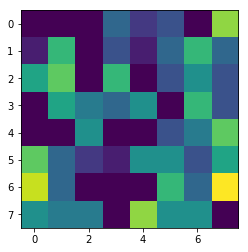

[[ 0.  0.  0.  5.  5.  2.  0.  4.]
 [ 0.  1.  0.  5.  0.  8.  3.  5.]
 [ 2.  6.  0. 10.  0.  0. 10.  6.]
 [ 0.  8.  7.  7.  9.  0.  4. 12.]
 [ 6.  0.  5.  0.  1.  8.  8.  9.]
 [ 8.  3.  1. 10.  3.  6.  2. 11.]
 [ 4.  4.  0.  1.  0.  9.  7.  0.]
 [ 1.  7.  6.  0.  1. 10.  8.  0.]]


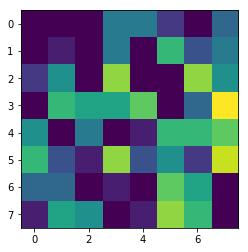

[[ 0.  0.  0.  8.  7.  6.  0.  5.]
 [ 3.  7.  0.  5.  0.  8.  7.  3.]
 [ 7.  5.  0.  3.  0.  4.  3.  6.]
 [ 0.  5.  5.  7.  8.  4.  4.  7.]
 [ 0.  0.  8.  0.  0.  3.  5.  2.]
 [ 5.  5.  2.  5.  5.  5.  3.  7.]
 [12.  6.  0.  5.  0.  4.  2.  7.]
 [ 3.  3.  1.  0. 11.  7. 11.  0.]]


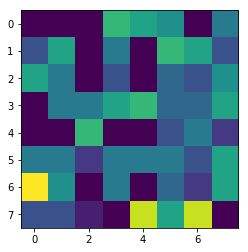

[[ 0.  0.  0.  7.  5.  4.  0.  6.]
 [ 0.  4.  0.  5.  0.  7.  7.  4.]
 [ 8.  7.  0.  8.  0.  3.  5.  5.]
 [ 0.  5.  3.  5.  8.  3.  4.  8.]
 [ 0.  0.  8.  0.  1.  5.  7.  3.]
 [ 7.  6.  4.  6.  5.  4.  3.  8.]
 [10.  5.  0.  2.  0.  5.  3.  6.]
 [ 2.  6.  5.  0.  8.  9. 10.  0.]]


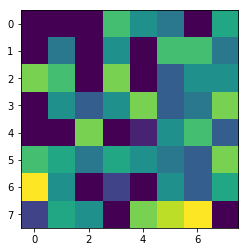

[[ 0.  0.  0.  5.  4.  6.  0.  4.]
 [ 5. 10.  0.  7.  0.  4.  1.  7.]
 [ 6.  1.  0.  0.  0.  2.  8.  6.]
 [ 0.  6.  6.  3.  1.  4.  9.  8.]
 [ 0.  0.  7.  0.  1.  3.  8.  2.]
 [ 7.  7.  6.  4.  0.  4.  2. 14.]
 [11.  6.  0.  9.  0.  1.  1. 10.]
 [ 7.  0. 10.  0.  5.  8.  8.  0.]]


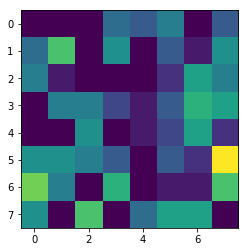

[[ 0.  0.  0.  4.  7.  2.  0.  5.]
 [ 0.  3.  0.  2.  1.  4.  8.  4.]
 [ 8.  6.  0. 14.  0.  3.  8.  0.]
 [ 0.  5.  2.  0.  6.  0.  5.  8.]
 [ 4.  0.  2.  0.  0.  7.  8. 11.]
 [ 2.  7.  8.  5.  4.  6.  0.  6.]
 [ 7.  4.  0.  0.  0.  8.  8.  5.]
 [ 8. 13.  6.  0.  2.  9.  8.  0.]]


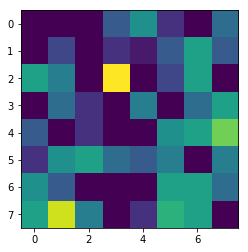

[[ 0.  0.  0.  7.  3.  7.  0.  5.]
 [ 0.  6.  0.  4.  0.  8.  2.  7.]
 [ 4.  6.  0.  5.  0.  6. 11.  9.]
 [ 0.  8. 10.  6.  6.  3.  6.  4.]
 [ 1.  0.  6.  0.  3.  4.  5.  5.]
 [ 5.  6.  1.  4.  5.  7.  2.  6.]
 [ 8.  5.  0.  5.  0.  8.  6.  4.]
 [ 2.  3.  3.  0.  4.  9.  5.  0.]]


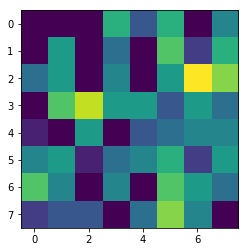

[[ 0.  0.  0.  8.  9.  5.  0.  8.]
 [ 5.  5.  0.  3.  1.  8. 11.  4.]
 [ 6.  5.  0.  4.  0.  2.  4.  4.]
 [ 0.  1.  8.  7. 10.  4.  3.  4.]
 [ 0.  0.  7.  0.  1.  0.  8.  3.]
 [ 6.  8.  4.  3.  7.  7.  1.  5.]
 [ 9.  8.  0.  4.  0.  5.  2.  4.]
 [ 4.  6.  1.  0. 12.  2. 10.  0.]]


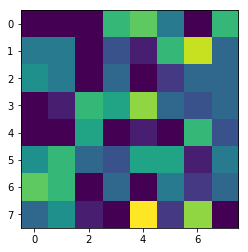

[[ 0.  0.  0.  3.  6.  0.  0.  8.]
 [ 3.  0.  0.  1.  1.  3.  8.  1.]
 [ 1.  8.  0. 11.  0.  1.  3.  3.]
 [ 0.  5.  6.  9.  9.  0.  2.  9.]
 [ 4.  0. 11.  0.  4.  7.  3. 14.]
 [10.  5.  1.  7.  1.  5.  3. 12.]
 [ 2.  4.  0.  2.  0.  5.  6.  3.]
 [ 2. 10.  5.  0.  8.  6. 11.  0.]]


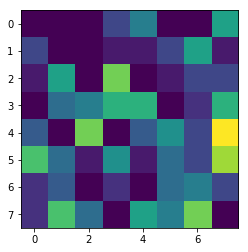

[[ 0.  0.  0.  4. 11.  3.  0.  9.]
 [ 7.  1.  0.  2.  1.  3. 12.  2.]
 [ 5.  3.  0.  4.  0.  1.  0.  2.]
 [ 0.  0.  6.  8.  8.  3.  2.  7.]
 [ 0.  0. 11.  0.  1.  1.  6.  8.]
 [ 7. 10.  5.  3.  2.  6.  2. 10.]
 [ 7.  8.  0.  5.  0.  1.  2.  5.]
 [ 5.  7.  4.  0. 14.  3. 13.  0.]]


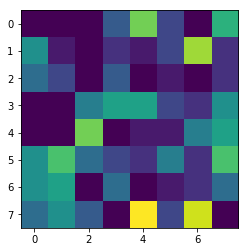

[[ 0.  0.  0.  0.  9.  5.  0.  7.]
 [ 5.  1.  0.  1.  2.  2.  9.  3.]
 [ 6.  2.  0.  4.  0.  4.  4.  1.]
 [ 0.  3.  7.  4.  4.  2.  5.  6.]
 [ 1.  0.  9.  0.  3.  5.  4. 12.]
 [ 4. 10.  6.  3.  0.  7.  1. 11.]
 [ 8.  7.  0.  8.  0.  1.  6.  5.]
 [ 7.  7.  5.  0.  9.  6. 12.  0.]]


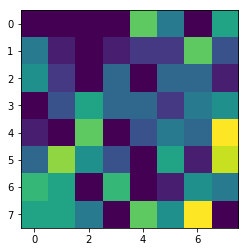

[[ 0.  0.  0.  6.  9.  6.  0.  5.]
 [ 4.  3.  0.  3.  0.  6.  6.  4.]
 [ 7.  4.  0.  3.  0.  5.  5.  7.]
 [ 0.  4.  7.  6.  7.  5.  3.  8.]
 [ 0.  0.  9.  0.  3.  3.  7.  3.]
 [ 3. 10.  5.  6.  3.  5.  2.  7.]
 [ 8.  8.  0.  7.  0.  3.  4.  2.]
 [ 4.  5.  3.  0.  9.  5.  9.  0.]]


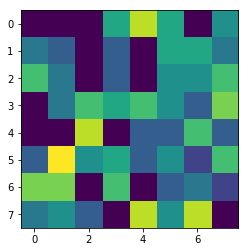

[[ 0.  0.  0.  5.  5.  7.  0.  5.]
 [ 1.  5.  0.  4.  1.  4.  2.  7.]
 [ 5.  5.  0.  4.  0.  6. 10.  8.]
 [ 0.  8.  8.  3.  3.  2.  6.  5.]
 [ 0.  0.  8.  0.  4.  4.  4.  6.]
 [ 5.  9.  4.  4.  2.  6.  1.  9.]
 [ 9.  5.  0.  7.  0.  5.  5.  5.]
 [ 3.  4.  6.  0.  4.  9.  6.  0.]]


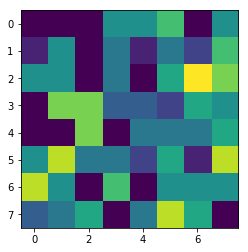

[[ 0.  0.  0.  7.  2.  4.  0.  6.]
 [ 1.  5.  0.  2.  2.  6.  3.  9.]
 [ 1.  8.  0. 10.  0.  4. 15.  3.]
 [ 0.  6. 10.  3.  5.  0. 12.  0.]
 [ 2.  0.  5.  0.  5.  3.  5. 10.]
 [ 7.  6.  3.  1.  5.  5.  2.  5.]
 [ 5.  3.  0.  3.  0. 10.  8.  6.]
 [ 3.  9.  8.  0.  2.  7.  2.  0.]]


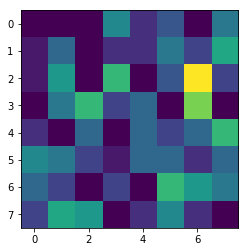

[[ 0.  0.  0.  7.  7.  9.  0.  3.]
 [ 3.  7.  0.  6.  0.  8.  3.  5.]
 [ 8.  2.  0.  0.  0.  7.  6.  8.]
 [ 0.  8.  9.  5.  6.  7.  4.  7.]
 [ 1.  0.  7.  0.  3.  3.  4.  1.]
 [ 1.  9.  3.  5.  3.  6.  3.  6.]
 [10.  6.  0.  9.  0.  4.  5.  2.]
 [ 2.  2.  1.  0.  8.  7.  9.  0.]]


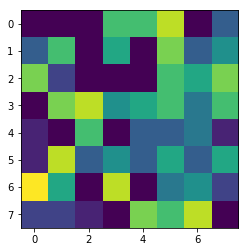

[[ 0.  0.  0.  8.  9.  6.  0.  3.]
 [ 5.  0.  0.  0.  3.  7.  9.  6.]
 [ 2.  6.  0.  5.  0.  3.  7.  2.]
 [ 0.  4.  9.  9. 11.  3.  8.  3.]
 [ 0.  0.  9.  0.  5.  2.  3.  9.]
 [ 4.  2.  3.  4.  3.  6.  2.  5.]
 [ 8.  6.  0.  7.  0.  6.  4.  3.]
 [ 4.  9.  2.  0.  9.  3. 10.  0.]]


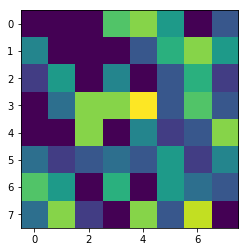

[[ 0.  0.  0.  9. 10.  7.  0.  3.]
 [ 5.  2.  0.  2.  1.  9.  8.  5.]
 [ 6.  5.  0.  2.  0.  4.  5.  6.]
 [ 0.  4.  9.  9. 11.  6.  3.  6.]
 [ 0.  0.  9.  0.  4.  1.  5.  2.]
 [ 3.  7.  3.  5.  5.  6.  2.  4.]
 [ 8.  7.  0.  8.  0.  5.  3.  0.]
 [ 1.  6.  0.  0. 11.  3. 10.  0.]]


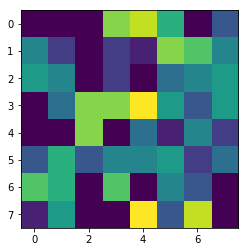

[[ 0.  0.  0.  3.  7.  4.  0.  3.]
 [ 2.  2.  0.  6.  0.  6.  2.  3.]
 [ 6.  3.  0.  5.  0.  4.  5.  9.]
 [ 0.  9.  7.  6.  7.  3.  1. 13.]
 [ 6.  0.  8.  0.  2.  8.  6.  6.]
 [ 5.  7.  2. 11.  1.  6.  2. 11.]
 [ 5.  6.  0.  5.  0.  5.  6.  0.]
 [ 2.  2.  3.  0.  4. 10.  9.  0.]]


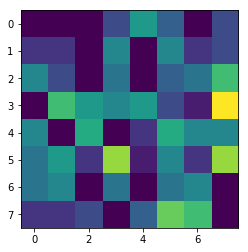

[[ 0.  0.  0.  4.  4.  1.  0.  7.]
 [ 1.  3.  0.  3.  1.  2.  6.  4.]
 [ 8.  7.  0. 11.  0.  1.  6.  1.]
 [ 0.  6.  1.  3.  6.  0.  9.  8.]
 [ 0.  0.  7.  0.  1.  7.  8.  9.]
 [ 8.  4.  6.  5.  2.  3.  2. 10.]
 [10.  4.  0.  0.  0.  4.  4. 11.]
 [ 6.  8.  9.  0.  6.  9.  9.  0.]]


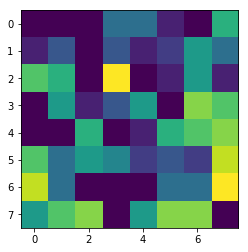

[[ 0.  0.  0.  4.  2.  7.  0.  6.]
 [ 2.  6.  0.  4.  1.  6.  6.  0.]
 [11.  6.  0.  9.  0. 13.  1.  4.]
 [ 0. 10.  5.  4.  4.  7.  4.  3.]
 [ 3.  0.  4.  0.  4.  8.  2.  6.]
 [ 0.  7.  2.  2.  5.  4.  7.  1.]
 [10.  3.  0.  6.  0.  7.  9.  6.]
 [ 6.  5.  1.  0. 10.  9.  5.  0.]]


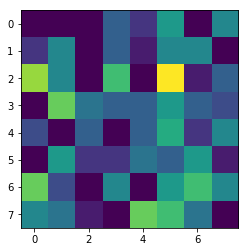

[[ 0.  0.  0.  6.  5.  7.  0.  3.]
 [ 5.  7.  0.  7.  0.  6.  0.  7.]
 [ 2.  1.  0.  0.  0.  1.  9.  9.]
 [ 0.  6.  8.  6.  3.  4.  8.  9.]
 [ 1.  0.  8.  0.  1.  2.  7.  1.]
 [ 8.  7.  4.  6.  0.  6.  1. 16.]
 [10.  6.  0.  9.  0.  1.  1.  6.]
 [ 3.  0.  9.  0.  3.  8.  9.  0.]]


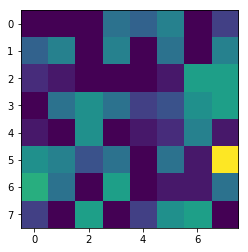

[[ 0.  0.  0. 10.  7.  1.  0.  0.]
 [ 4.  0.  0.  0.  6. 10.  8.  4.]
 [ 3.  6.  0. 12.  0.  0.  9.  0.]
 [ 0.  6.  8.  6. 19.  1. 12.  6.]
 [ 5.  0.  0.  0.  3.  8.  5. 13.]
 [ 0.  0.  2.  8.  2.  3.  3.  0.]
 [ 4.  1.  0.  1.  0. 13. 12.  1.]
 [ 8. 11.  3.  0.  1.  2.  7.  0.]]


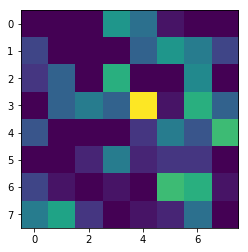

[[ 0.  0.  0.  9.  5.  5.  0.  6.]
 [ 4.  8.  0.  5.  1.  7.  4.  7.]
 [ 4.  6.  0.  3.  0.  0.  9.  6.]
 [ 0.  3.  6.  6.  7.  3.  9.  5.]
 [ 0.  0.  6.  0.  0.  0.  9.  1.]
 [ 8.  5.  5.  3.  5.  5.  1.  9.]
 [10.  8.  0.  5.  0.  4.  1.  9.]
 [ 4.  4.  7.  0.  7.  4.  8.  0.]]


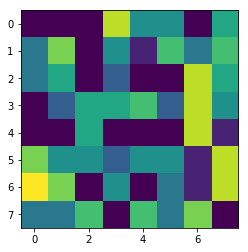

[[ 0.  0.  0.  5.  5.  6.  0.  4.]
 [ 7.  3.  0.  0.  2.  5.  4. 10.]
 [ 2.  4.  0.  4.  0.  1. 16.  2.]
 [ 0.  1. 12.  1.  6.  2. 15.  0.]
 [ 2.  0.  3.  0.  6.  3.  9.  8.]
 [ 3.  6.  8.  1.  0.  7.  0.  6.]
 [ 6.  7.  0.  9.  0.  6.  9.  6.]
 [ 8.  9.  9.  0.  1.  1.  5.  0.]]


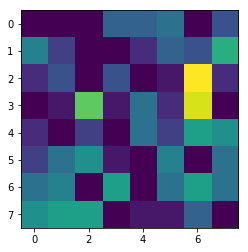

[[ 0.  0.  0.  6.  8.  3.  0.  6.]
 [ 5.  0.  0.  0.  3.  7. 10.  5.]
 [ 2.  7.  0.  7.  0.  1.  7.  2.]
 [ 0.  3. 10.  9. 12.  1.  8.  2.]
 [ 0.  0.  7.  0.  4.  3.  5. 11.]
 [ 6.  2.  3.  3.  3.  6.  1.  6.]
 [ 6.  7.  0.  4.  0.  7.  6.  4.]
 [ 5.  9.  2.  0.  9.  1.  9.  0.]]


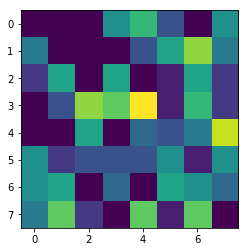

[[ 0.  0.  0.  1.  5.  4.  0.  5.]
 [ 1.  4.  0.  5.  1.  0.  3.  4.]
 [ 6.  3.  0.  9.  0.  4.  7.  0.]
 [ 0.  5.  1.  1.  0.  0.  8.  8.]
 [ 2.  0.  9.  0.  2.  7.  5. 10.]
 [ 6.  9.  9.  5.  0.  5.  2. 16.]
 [11.  3.  0.  4.  0.  0.  3. 10.]
 [ 5.  8. 10.  0.  4. 15. 11.  0.]]


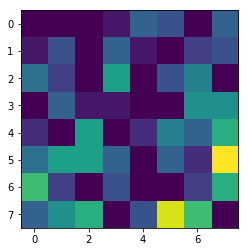

[[ 0.  0.  0.  7.  1.  1.  0.  4.]
 [ 2.  4.  0.  4.  3.  6.  3.  6.]
 [ 5.  8.  0. 12.  0.  0. 11.  1.]
 [ 0.  8.  4.  3.  9.  1. 15.  7.]
 [ 1.  0.  3.  0.  2.  6.  9.  8.]
 [ 9.  0.  5.  5.  3.  1.  4.  8.]
 [ 9.  1.  0.  0.  0.  7.  5. 11.]
 [ 7.  7. 12.  0.  2.  7.  3.  0.]]


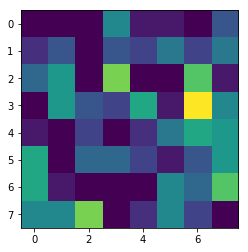

[[ 0.  0.  0.  7.  4.  8.  0.  5.]
 [ 3. 11.  0.  5.  1.  6.  3.  7.]
 [ 7.  6.  0.  2.  0.  5. 10.  6.]
 [ 0.  6.  7.  3.  4.  4.  8.  3.]
 [ 0.  0.  5.  0.  2.  1.  7.  2.]
 [ 4.  6.  4.  2.  4.  7.  2.  6.]
 [11.  7.  0.  6.  0.  6.  3.  9.]
 [ 5.  2.  4.  0.  6.  6.  7.  0.]]


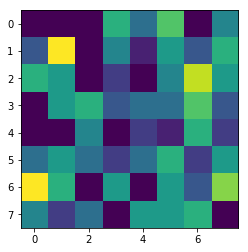

[[ 0.  0.  0.  1. 11.  6.  0.  7.]
 [ 9.  3.  0.  1.  4.  1. 10.  1.]
 [ 4.  1.  0.  0.  0.  6.  2.  3.]
 [ 0.  4. 11.  6.  6.  4.  4.  4.]
 [ 2.  0. 10.  0.  5.  5.  0. 13.]
 [ 3.  9.  4.  2.  0.  8.  2.  9.]
 [ 7.  6.  0. 11.  0.  3.  7.  4.]
 [ 8.  5.  2.  0. 12.  3. 11.  0.]]


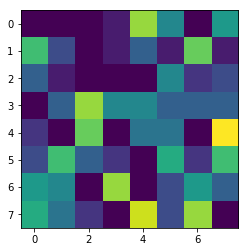

[[ 0.  0.  0.  7.  3.  3.  0.  7.]
 [ 3.  7.  0.  6.  1.  8.  6.  3.]
 [ 4.  4.  0.  8.  0.  4.  7.  5.]
 [ 0.  8. 10.  5. 10.  3.  4.  6.]
 [ 8.  0.  0.  0.  0.  7.  8.  7.]
 [ 4.  5.  0.  5.  7.  6.  5.  1.]
 [ 2.  3.  0.  2.  0. 11. 13.  2.]
 [ 7.  4.  5.  0.  3.  6.  3.  0.]]


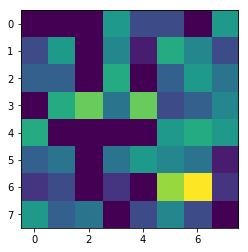

[[ 0.  0.  0.  6.  3.  3.  0.  7.]
 [ 3.  8.  0.  6.  1.  7.  6.  1.]
 [ 7.  5.  0.  8.  0.  6.  4.  5.]
 [ 0.  9.  8.  5.  8.  4.  3.  7.]
 [ 7.  0.  0.  0.  0.  8.  7.  6.]
 [ 3.  5.  0.  5.  7.  5.  6.  1.]
 [ 4.  3.  0.  2.  0. 10. 12.  3.]
 [ 8.  4.  3.  0.  6.  7.  3.  0.]]


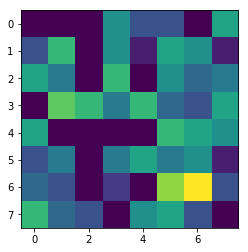

[[ 0.  0.  0.  0.  6.  1.  0.  7.]
 [ 2.  0.  0.  5.  1.  0.  4.  2.]
 [ 1.  4.  0. 10.  0.  1.  6.  2.]
 [ 0.  6.  4.  5.  2.  0.  3. 12.]
 [ 6.  0. 10.  0.  2.  8.  4. 14.]
 [10.  9.  4.  9.  0.  6.  1. 18.]
 [ 4.  3.  0.  1.  0.  3.  5.  4.]
 [ 3.  8.  9.  0.  3. 12. 12.  0.]]


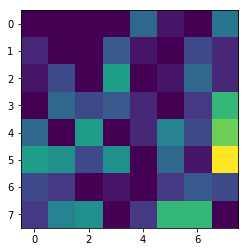

[[ 0.  0.  0.  6.  4.  6.  0.  7.]
 [ 5. 11.  0.  4.  2.  4.  5.  7.]
 [ 6.  4.  0.  3.  0.  2. 10.  3.]
 [ 0.  2.  7.  1.  3.  3. 11.  2.]
 [ 0.  0.  3.  0.  0.  1. 10.  3.]
 [ 5.  7.  8.  0.  3.  7.  1.  7.]
 [11.  7.  0.  5.  0.  4.  4. 12.]
 [ 9.  4.  8.  0.  6.  4.  7.  0.]]


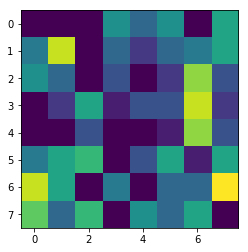

[[ 0.  0.  0.  3.  6.  3.  0.  4.]
 [ 0.  2.  0.  4.  2.  3.  4.  3.]
 [ 9.  8.  0. 14.  0.  7.  6.  0.]
 [ 0.  9.  0.  3.  3.  1.  3.  9.]
 [ 1.  0. 10.  0.  4.  8.  1. 10.]
 [ 3.  7.  7.  7.  1.  3.  3.  9.]
 [10.  2.  0.  0.  0.  5.  4.  6.]
 [ 2. 11.  5.  0.  5. 15. 11.  0.]]


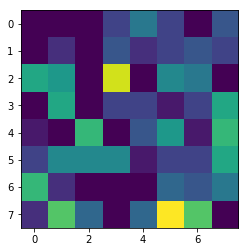

[[ 0.  0.  0. 12.  6.  4.  0.  0.]
 [ 3.  1.  0.  0.  6.  5.  1.  9.]
 [ 0.  7.  0.  8.  0.  2. 12.  0.]
 [ 0.  4.  4.  6.  8.  3. 17.  4.]
 [ 0.  0. 10.  0.  9.  4.  1.  9.]
 [ 0.  0.  9.  6.  0.  0.  4.  9.]
 [ 7.  2.  0.  9.  0.  4.  3.  8.]
 [ 5. 10.  8.  0.  1.  8.  8.  0.]]


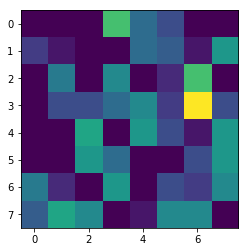

[[ 0.  0.  0.  2.  4.  1.  0.  5.]
 [ 0.  0.  0.  3.  0.  4.  1.  5.]
 [ 0.  6.  0. 13.  0.  0. 11.  4.]
 [ 0.  7.  6.  6.  4.  0.  4. 11.]
 [ 7.  0.  8.  0.  3.  9.  5. 12.]
 [10.  5.  3.  9.  0.  6.  1. 15.]
 [ 3.  4.  0.  0.  0.  8.  7.  3.]
 [ 1.  9.  8.  0.  0. 13.  8.  0.]]


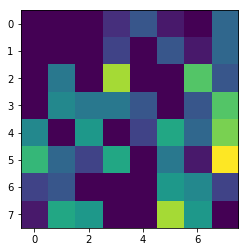

[[ 0.  0.  0.  7.  1.  4.  0.  7.]
 [ 1.  3.  0.  2.  2.  7.  0.  9.]
 [ 0.  9.  0.  9.  0.  5. 14.  6.]
 [ 0.  9. 11.  6.  5.  2. 11.  0.]
 [ 2.  0.  9.  0.  9.  2.  2.  9.]
 [ 8.  6.  1.  1.  4.  4.  4.  6.]
 [ 4.  2.  0.  6.  0.  9.  7.  4.]
 [ 0.  7.  6.  0.  4.  7.  2.  0.]]


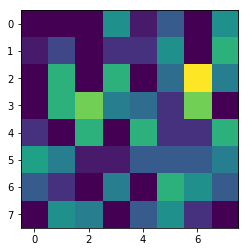

[[ 0.  0.  0.  5.  8.  6.  0.  6.]
 [ 4.  4.  0.  2.  1.  6.  7.  4.]
 [ 6.  3.  0.  3.  0.  3.  5.  6.]
 [ 0.  3.  8.  6.  7.  4.  4.  6.]
 [ 0.  0.  8.  0.  2.  3.  7.  4.]
 [ 5.  8.  5.  5.  2.  7.  1.  8.]
 [ 9.  9.  0.  7.  0.  3.  3.  4.]
 [ 5.  4.  3.  0.  9.  5. 10.  0.]]


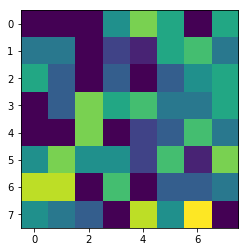

[[ 0.  0.  0.  4.  4.  3.  0.  8.]
 [ 1.  2.  0.  1.  2.  7.  7.  5.]
 [ 6.  8.  0. 10.  0.  4.  8.  3.]
 [ 0.  8.  8.  5. 10.  1.  8.  3.]
 [ 1.  0.  5.  0.  4.  6.  4. 11.]
 [ 6.  2.  1.  3.  5.  6.  3.  4.]
 [ 8.  3.  0.  2.  0. 10.  8.  5.]
 [ 4.  7.  3.  0.  6.  5.  6.  0.]]


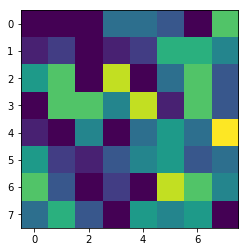

[[ 0.  0.  0.  4.  4.  6.  0.  5.]
 [ 1.  7.  0.  5.  1.  5.  5.  2.]
 [12.  5.  0.  7.  0.  9.  2.  2.]
 [ 0.  8.  2.  4.  4.  6.  6.  4.]
 [ 0.  0.  7.  0.  3.  6.  3.  5.]
 [ 3.  5.  4.  3.  4.  4.  6.  6.]
 [14.  3.  0.  6.  0.  4.  3. 10.]
 [ 4.  4.  2.  0. 11. 11. 10.  0.]]


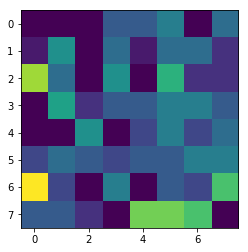

[[ 0.  0.  0.  5.  2.  4.  0.  9.]
 [ 1.  9.  0.  6.  0.  6.  5.  2.]
 [ 7.  6.  0.  9.  0.  7.  5.  5.]
 [ 0.  9.  6.  3.  5.  3.  3.  5.]
 [ 6.  0.  1.  0.  0.  7.  6.  7.]
 [ 3.  7.  1.  3.  7.  6.  5.  2.]
 [ 5.  3.  0.  1.  0. 10. 10.  5.]
 [ 7.  5.  4.  0.  5.  9.  3.  0.]]


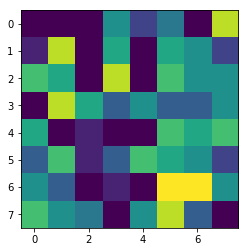

[[ 0.  0.  0.  2.  6.  2.  0.  7.]
 [ 0.  2.  0.  4.  1.  2.  5.  3.]
 [10.  7.  0. 11.  0.  5.  5.  2.]
 [ 0.  6.  0.  2.  3.  1.  2. 10.]
 [ 2.  0.  9.  0.  2.  7.  6.  7.]
 [ 6. 10.  7.  7.  2.  4.  2. 10.]
 [ 9.  4.  0.  1.  0.  4.  3.  7.]
 [ 3.  8.  7.  0.  6. 13. 10.  0.]]


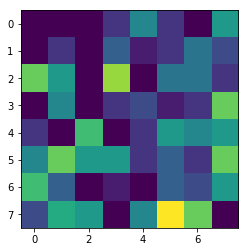

[[ 0.  0.  0.  1.  4.  3.  0.  2.]
 [ 2.  3.  0.  5.  3.  0.  2.  3.]
 [ 4.  2.  0.  9.  0.  2.  8.  0.]
 [ 0.  6.  2.  1.  0.  0.  9. 11.]
 [ 6.  0.  7.  0.  3. 10.  5. 12.]
 [ 5.  5.  9.  7.  0.  4.  1. 16.]
 [ 8.  2.  0.  3.  0.  1.  6.  8.]
 [ 7.  8. 12.  0.  0. 15. 10.  0.]]


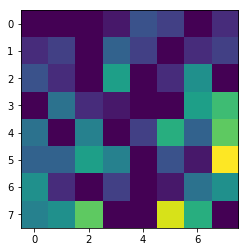

[[ 0.  0.  0.  7.  2.  0.  0.  8.]
 [ 4. 10.  0.  8.  1.  7.  5.  2.]
 [ 4.  6.  0. 10.  0.  3.  6.  5.]
 [ 0.  8.  8.  4.  8.  3.  3.  8.]
 [ 9.  0.  0.  0.  0.  7.  8.  6.]
 [ 6.  6.  0.  5.  7.  4.  7.  2.]
 [ 0.  1.  0.  0.  0. 11. 12.  3.]
 [ 7.  3.  7.  0.  3.  7.  1.  0.]]


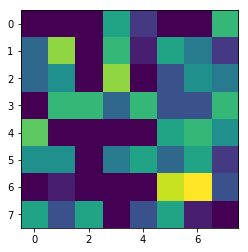

[[ 0.  0.  0.  8.  9.  5.  0.  5.]
 [ 4.  2.  0.  0.  2.  8. 10.  6.]
 [ 5.  8.  0.  7.  0.  3.  6.  1.]
 [ 0.  1.  7.  7. 11.  4.  6.  3.]
 [ 0.  0.  8.  0.  5.  1.  6.  6.]
 [ 3.  6.  6.  3.  6.  5.  2.  2.]
 [ 7.  7.  0.  5.  0.  6.  4.  3.]
 [ 3. 11.  1.  0. 10.  3.  8.  0.]]


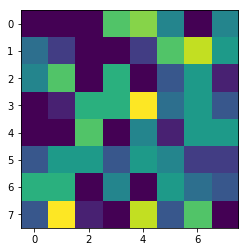

[[ 0.  0.  0.  5.  5.  7.  0.  4.]
 [ 0.  4.  0.  4.  1.  6.  1.  7.]
 [ 3.  6.  0.  5.  0.  5. 11.  8.]
 [ 0.  7.  9.  5.  4.  2.  5.  6.]
 [ 3.  0.  9.  0.  5.  5.  4.  6.]
 [ 4.  8.  4.  6.  2.  7.  2.  9.]
 [ 7.  5.  0.  7.  0.  6.  5.  2.]
 [ 1.  5.  5.  0.  2. 10.  7.  0.]]


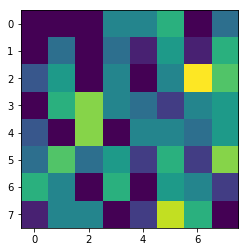

[[ 0.  0.  0.  4.  6.  8.  0.  1.]
 [ 3.  8.  0.  7.  2.  5.  1.  4.]
 [11.  0.  0.  2.  0. 10.  5.  4.]
 [ 0.  9.  6.  1.  2.  8.  5.  6.]
 [ 3.  0.  6.  0.  5.  7.  3.  3.]
 [ 0.  9.  7.  6.  1.  5.  4.  7.]
 [12.  3.  0. 10.  0.  2.  7.  5.]
 [ 4.  1.  3.  0.  6. 11.  9.  0.]]


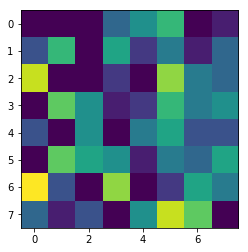

[[ 0.  0.  0.  3. 10.  3.  0.  5.]
 [ 1.  0.  0.  2.  2.  4.  8.  2.]
 [ 9.  5.  0. 11.  0.  6.  4.  0.]
 [ 0.  4.  3.  3.  5.  3.  0.  9.]
 [ 4.  0.  8.  0.  4.  7.  5.  8.]
 [ 1. 12.  8.  7.  2.  5.  2.  6.]
 [ 6.  6.  0.  3.  0.  4.  7.  1.]
 [ 4. 11.  3.  0.  7.  9. 11.  0.]]


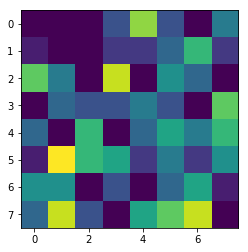

[[ 0.  0.  0.  3.  6.  5.  0.  5.]
 [ 0.  1.  0.  2.  1.  6.  5.  4.]
 [ 9.  7.  0. 10.  0.  6.  7.  2.]
 [ 0.  8.  4.  4.  6.  1.  4.  8.]
 [ 1.  0.  8.  0.  3.  7.  4.  8.]
 [ 4.  6.  5.  6.  3.  6.  1.  8.]
 [11.  3.  0.  2.  0.  6.  5.  4.]
 [ 2.  9.  3.  0.  5. 11. 11.  0.]]


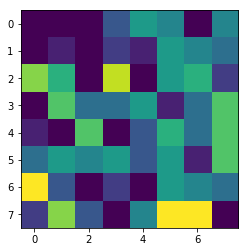

[[ 0.  0.  0.  5.  9.  3.  0.  4.]
 [ 3.  0.  0.  1.  2.  7.  7.  4.]
 [ 6.  7.  0. 10.  0.  5.  7.  2.]
 [ 0.  3.  7.  5.  9.  4.  1.  7.]
 [ 4.  0.  7.  0.  6.  6.  6.  7.]
 [ 2.  9.  7.  6.  4.  4.  3.  3.]
 [ 3.  6.  0.  4.  0.  7.  8.  0.]
 [ 3. 11.  2.  0.  6.  6.  7.  0.]]


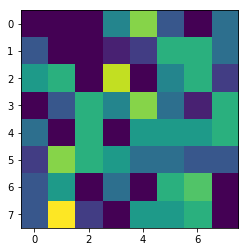

[[ 0.  0.  0.  5.  4.  5.  0.  6.]
 [ 8.  4.  0.  0.  2.  5.  5.  9.]
 [ 3.  2.  0.  5.  0.  1. 14.  1.]
 [ 0.  0. 12.  0.  5.  4. 13.  0.]
 [ 3.  0.  1.  0.  5.  2. 13.  5.]
 [ 4.  9. 11.  1.  2.  6.  0.  5.]
 [ 5.  8.  0.  8.  0.  3. 10.  6.]
 [ 9.  9. 11.  0.  2.  0.  3.  0.]]


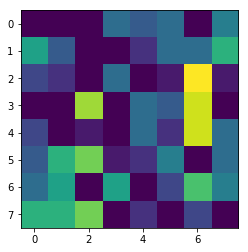

[[ 0.  0.  0.  2.  6.  5.  0.  4.]
 [ 2.  2.  0.  5.  1.  7.  2.  2.]
 [ 7.  3.  0.  4.  0.  5.  5.  9.]
 [ 0. 10.  7.  7.  6.  4.  2. 12.]
 [ 6.  0.  8.  0.  4.  9.  5.  6.]
 [ 5.  6.  2. 10.  1.  5.  3. 10.]
 [ 6.  5.  0.  7.  0.  5.  6.  0.]
 [ 2.  1.  2.  0.  5.  9.  8.  0.]]


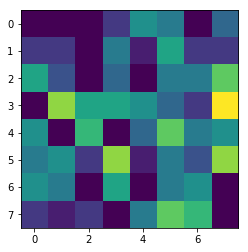

[[ 0.  0.  0.  7.  6.  6.  0.  6.]
 [ 4.  6.  0.  5.  0.  9.  9.  3.]
 [ 7.  4.  0.  3.  0.  1.  1.  5.]
 [ 0.  5.  6.  9. 10.  4.  5.  6.]
 [ 0.  0.  8.  0.  0.  2.  7.  2.]
 [ 8.  3.  1.  5.  6.  6.  2.  8.]
 [13.  5.  0.  5.  0.  3.  0.  7.]
 [ 2.  1.  1.  0. 12.  6. 13.  0.]]


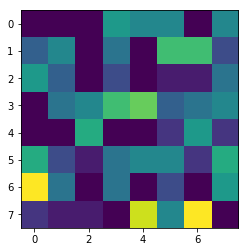

[[ 0.  0.  0.  0.  5.  5.  0.  6.]
 [ 0.  0.  0.  2.  2.  3.  7.  2.]
 [10.  5.  0. 13.  0.  9.  4.  0.]
 [ 0.  9.  3.  2.  4.  2.  5.  5.]
 [ 2.  0.  7.  0.  4.  9.  1. 13.]
 [ 3.  6.  6.  4.  2.  6.  2.  8.]
 [12.  2.  0.  2.  0.  5.  7.  6.]
 [ 4. 10.  3.  0.  6. 13. 11.  0.]]


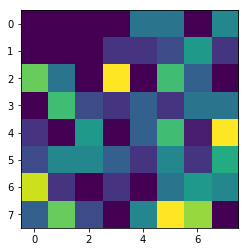

[[ 0.  0.  0.  1.  8.  4.  0.  9.]
 [ 6.  2.  0.  1.  2.  2.  9.  3.]
 [ 3.  4.  0.  5.  0.  3.  4.  3.]
 [ 0.  3.  8.  7.  6.  1.  4.  6.]
 [ 1.  0. 10.  0.  3.  5.  4. 11.]
 [ 7.  7.  5.  4.  0.  7.  1. 10.]
 [ 6.  7.  0.  6.  0.  4.  5.  6.]
 [ 6.  7.  4.  0. 10.  5. 11.  0.]]


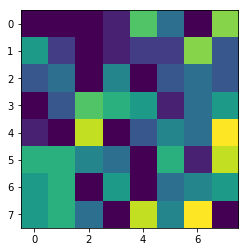

[[ 0.  0.  0.  5. 10.  7.  0.  5.]
 [ 4.  4.  0.  3.  0.  5.  7.  3.]
 [11.  4.  0.  3.  0.  6.  3.  4.]
 [ 0.  4.  5.  3.  6.  7.  1.  8.]
 [ 0.  0.  9.  0.  4.  4.  6.  1.]
 [ 1. 12.  8.  6.  3.  5.  3.  5.]
 [10.  7.  0.  7.  0.  2.  4.  3.]
 [ 3.  6.  2.  0. 10.  7. 11.  0.]]


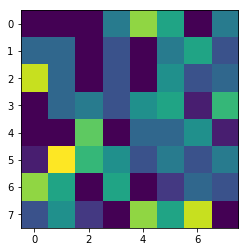

[[ 0.  0.  0.  6.  3.  3.  0.  6.]
 [ 4.  1.  0.  0.  4.  5.  1.  9.]
 [ 1.  6.  0.  8.  0.  1. 15.  1.]
 [ 0.  8.  9.  5.  8.  1. 17.  2.]
 [ 2.  0.  6.  0.  9.  3.  5. 11.]
 [ 7.  1.  5.  2.  1.  3.  3.  9.]
 [ 6.  2.  0.  7.  0.  6.  6.  6.]
 [ 5.  8.  9.  0.  1.  4.  4.  0.]]


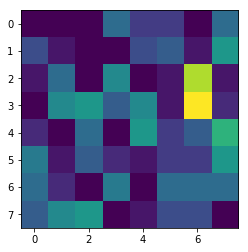

[[ 0.  0.  0.  4.  7.  8.  0.  0.]
 [ 3.  3.  0.  5.  2.  4.  1.  5.]
 [ 9.  0.  0.  3.  0.  7.  7.  2.]
 [ 0.  8.  6.  2.  2.  7.  8.  8.]
 [ 3.  0.  8.  0.  7.  7.  3.  5.]
 [ 0.  8.  9.  6.  0.  3.  3.  9.]
 [11.  3.  0. 12.  0.  0.  6.  3.]
 [ 4.  3.  6.  0.  4. 11. 10.  0.]]


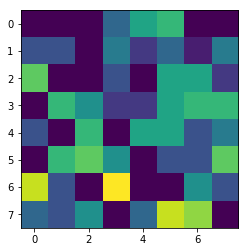

[[ 0.  0.  0.  4.  7.  9.  0.  2.]
 [ 5. 10.  0.  6.  1.  5.  3.  4.]
 [ 9.  1.  0.  0.  0.  9.  6.  6.]
 [ 0.  7.  9.  2.  3.  7.  4.  6.]
 [ 3.  0.  4.  0.  4.  6.  4.  3.]
 [ 0.  9.  6.  4.  1.  7.  3.  4.]
 [10.  6.  0.  9.  0.  5.  8.  4.]
 [ 6.  1.  2.  0.  7.  7.  7.  0.]]


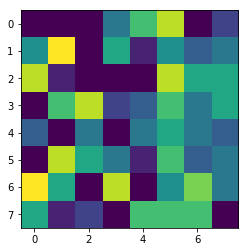

[[ 0.  0.  0.  7.  2.  4.  0.  8.]
 [ 3. 12.  0.  7.  1.  6.  5.  2.]
 [ 7.  6.  0.  8.  0.  7.  4.  5.]
 [ 0.  8.  7.  4.  5.  5.  3.  5.]
 [ 7.  0.  0.  0.  0.  6.  6.  5.]
 [ 2.  6.  1.  3.  8.  5.  7.  0.]
 [ 4.  3.  0.  3.  0. 10. 11.  6.]
 [ 9.  3.  4.  0.  6.  7.  2.  0.]]


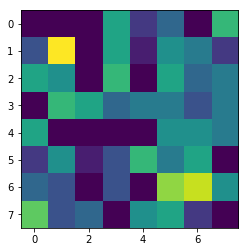

[[ 0.  0.  0.  7.  7.  3.  0.  8.]
 [ 4.  3.  0.  3.  1.  9.  8.  5.]
 [ 5.  8.  0.  6.  0.  1.  7.  6.]
 [ 0.  4. 10.  8. 12.  3.  4.  6.]
 [ 1.  0.  7.  0.  4.  3.  7.  5.]
 [ 7.  5.  1.  5.  7.  5.  3.  4.]
 [ 4.  6.  0.  4.  0.  8.  6.  1.]
 [ 2.  5.  2.  0.  8.  2.  5.  0.]]


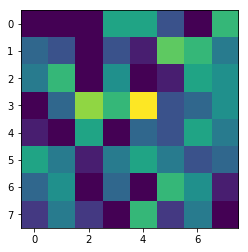

[[ 0.  0.  0.  6.  6.  4.  0.  5.]
 [ 2.  4.  0.  5.  2.  7.  3.  7.]
 [ 4.  5.  0.  4.  0.  2. 11.  8.]
 [ 0.  8. 11.  6.  9.  2.  6.  8.]
 [ 4.  0.  6.  0.  4.  5.  7.  6.]
 [ 6.  5.  1.  6.  3.  6.  2.  7.]
 [ 4.  4.  0.  5.  0.  8.  7.  1.]
 [ 3.  3.  5.  0.  2.  6.  4.  0.]]


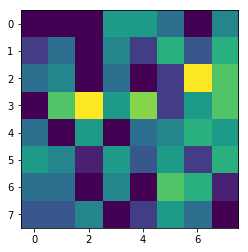

[[ 0.  0.  0.  8.  5.  7.  0.  4.]
 [ 3. 12.  0.  6.  2.  6.  3.  7.]
 [ 8.  6.  0.  0.  0.  4.  8.  6.]
 [ 0.  6.  5.  4.  5.  4.  7.  7.]
 [ 0.  0.  6.  0.  2.  2.  7.  0.]
 [ 4.  5.  5.  4.  4.  5.  2.  7.]
 [11.  6.  0.  6.  0.  6.  1.  9.]
 [ 5.  1.  4.  0.  7.  6.  7.  0.]]


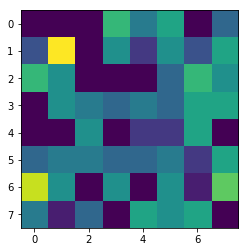

[[ 0.  0.  0.  5.  7.  3.  0.  5.]
 [ 4.  3.  0.  1.  4.  5.  9.  4.]
 [ 2.  8.  0.  8.  0.  3.  4.  1.]
 [ 0.  3.  6. 10. 10.  0.  7.  4.]
 [ 0.  0. 10.  0.  3.  5.  1. 12.]
 [ 7.  0.  3.  4.  2.  6.  2.  8.]
 [ 8.  5.  0.  4.  0.  6.  4.  8.]
 [ 5.  9.  2.  0. 10.  5. 12.  0.]]


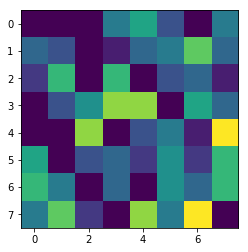

[[ 0.  0.  0.  4.  1.  6.  0.  7.]
 [ 2.  7.  0.  4.  1.  6.  6.  0.]
 [11.  6.  0.  9.  0. 13.  1.  3.]
 [ 0.  9.  5.  4.  2.  7.  6.  1.]
 [ 3.  0.  4.  0.  5.  8.  2.  6.]
 [ 0.  6.  3.  1.  6.  4.  8.  0.]
 [ 9.  2.  0.  7.  0.  7.  9.  7.]
 [ 7.  5.  1.  0. 10.  9.  3.  0.]]


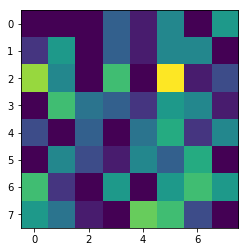

[[ 0.  0.  0.  5.  4.  4.  0.  6.]
 [ 0.  2.  0.  4.  5.  4.  2.  5.]
 [ 6.  7.  0.  8.  0.  6.  7.  3.]
 [ 0. 13.  4.  7.  7.  2. 10.  5.]
 [ 0.  0. 11.  0.  7.  4.  0. 11.]
 [ 5.  1.  2.  5.  1.  3.  5.  9.]
 [11.  0.  0.  7.  0.  5.  1.  6.]
 [ 1.  4.  5.  0.  6. 11.  8.  0.]]


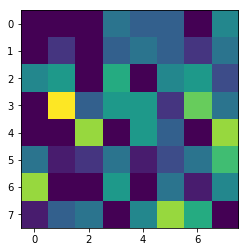

[[ 0.  0.  0.  6.  6.  5.  0.  4.]
 [ 0.  5.  0.  6.  2.  5.  2.  4.]
 [ 9.  8.  0.  6.  0.  6.  6.  6.]
 [ 0. 10.  2.  5.  4.  3.  4. 10.]
 [ 0.  0. 11.  0.  4.  5.  3.  4.]
 [ 4.  6.  4.  7.  2.  3.  4.  9.]
 [11.  3.  0.  5.  0.  4.  1.  6.]
 [ 1.  4.  4.  0.  7. 12. 10.  0.]]


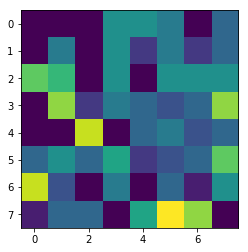

[[ 0.  0.  0.  5.  5.  6.  0.  5.]
 [ 3.  8.  0.  5.  1.  7.  6.  3.]
 [ 8.  5.  0.  2.  0.  3.  3.  6.]
 [ 0.  6.  5.  7.  8.  3.  6.  7.]
 [ 0.  0.  8.  0.  0.  5.  6.  3.]
 [ 7.  2.  3.  5.  3.  5.  3.  8.]
 [13.  6.  0.  5.  0.  4.  1.  9.]
 [ 5.  1.  3.  0. 10.  7. 10.  0.]]


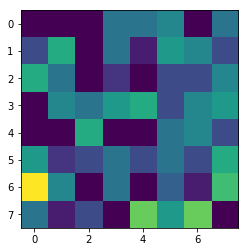

[[ 0.  0.  0.  8.  6.  9.  0.  0.]
 [ 3.  9.  0.  7.  2.  7.  1.  6.]
 [ 7.  2.  0.  0.  0.  5.  8.  6.]
 [ 0.  8.  6.  5.  6.  6.  9.  8.]
 [ 0.  0.  6.  0.  2.  4.  5.  0.]
 [ 2.  3.  5.  7.  1.  4.  3.  8.]
 [13.  4.  0.  9.  0.  3.  2.  7.]
 [ 5.  0.  5.  0.  4.  8.  9.  0.]]


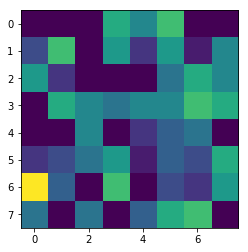

[[ 0.  0.  0.  3.  6.  8.  0.  5.]
 [ 2.  5.  0.  3.  2.  5.  3.  6.]
 [ 5.  4.  0.  2.  0.  7. 10.  7.]
 [ 0.  7. 11.  4.  4.  2.  6.  4.]
 [ 1.  0.  8.  0.  5.  5.  3.  8.]
 [ 3.  8.  3.  4.  1.  8.  1.  7.]
 [ 9.  5.  0.  9.  0.  6.  7.  4.]
 [ 4.  4.  4.  0.  4.  8.  7.  0.]]


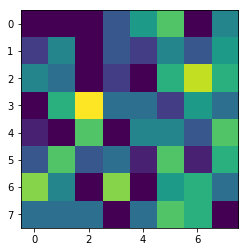

[[ 0.  0.  0.  2.  5.  7.  0.  7.]
 [ 2.  8.  0.  7.  2.  2.  3.  2.]
 [12.  2.  0.  5.  0. 10.  2.  3.]
 [ 0. 10.  4.  1.  0.  6.  3.  4.]
 [ 3.  0.  7.  0.  4.  6.  1.  6.]
 [ 1. 12.  4.  3.  3.  6.  5.  8.]
 [12.  1.  0.  9.  0.  2.  6.  6.]
 [ 3.  3.  3.  0.  9. 13. 10.  0.]]


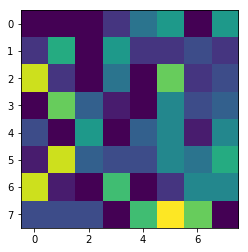

[[ 0.  0.  0.  6.  6.  3.  0.  3.]
 [ 1.  1.  0.  5.  0. 10.  3.  4.]
 [ 6.  4.  0.  9.  0.  2.  7.  6.]
 [ 0.  9.  7.  7. 10.  4.  4. 12.]
 [ 6.  0.  5.  0.  3.  7.  8.  4.]
 [ 5.  4.  2. 10.  5.  4.  4.  7.]
 [ 5.  4.  0.  3.  0.  7.  6.  0.]
 [ 1.  6.  4.  0.  3.  9.  7.  0.]]


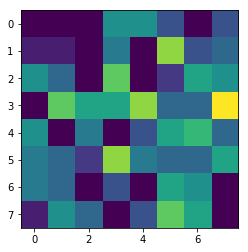

[[ 0.  0.  0.  6.  4.  2.  0.  7.]
 [ 3.  5.  0.  5.  1.  8.  6.  3.]
 [ 4.  4.  0.  9.  0.  2.  8.  3.]
 [ 0.  7. 10.  4. 11.  2.  5.  7.]
 [ 8.  0.  0.  0.  1.  7.  9.  8.]
 [ 6.  4.  0.  5.  6.  6.  4.  3.]
 [ 2.  1.  0.  1.  0. 10. 13.  1.]
 [ 6.  6.  6.  0.  1.  6.  4.  0.]]


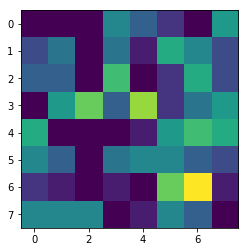

[[ 0.  0.  0.  4. 10.  9.  0.  1.]
 [ 4.  4.  0.  4.  2.  5.  4.  3.]
 [ 9.  0.  0.  2.  0.  8.  4.  3.]
 [ 0.  6.  7.  4.  4.  7.  4.  7.]
 [ 2.  0.  8.  1.  5.  5.  2.  5.]
 [ 0. 10.  8.  6.  0.  6.  3.  8.]
 [11.  5.  0. 11.  0.  0.  5.  2.]
 [ 4.  4.  2.  0.  7. 10. 12.  0.]]


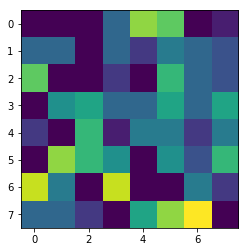

[[ 0.  0.  0.  1. 13.  6.  0.  5.]
 [ 8.  5.  0.  5.  3.  2.  6.  3.]
 [ 8.  0.  0.  0.  0.  5.  2.  3.]
 [ 0.  5.  8.  3.  3.  6.  1.  9.]
 [ 4.  0.  8.  0.  5.  5.  4.  7.]
 [ 0. 14.  7.  5.  0.  6.  2. 10.]
 [ 7.  6.  0. 11.  0.  0.  5.  0.]
 [ 5.  2.  3.  0.  9.  7. 11.  0.]]


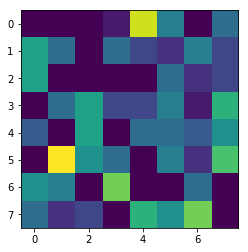

[[ 0.  0.  0. 10.  3.  8.  0.  4.]
 [ 4. 14.  0.  7.  1.  6.  1. 10.]
 [ 0.  5.  0.  0.  0.  2. 10.  8.]
 [ 0.  4.  8.  7.  3.  3.  7.  3.]
 [ 0.  0.  8.  0.  0.  0.  5.  0.]
 [ 9.  6.  2.  3.  5.  8.  2. 11.]
 [11.  6.  0.  8.  0.  6.  1. 10.]
 [ 1.  1.  5.  0.  5.  8.  9.  0.]]


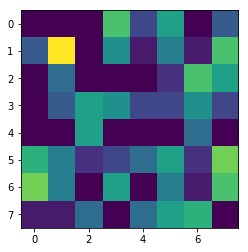

[[ 0.  0.  0.  5.  7.  5.  0.  5.]
 [ 5.  3.  0.  1.  3.  6.  6.  7.]
 [ 1.  4.  0.  6.  0.  2. 11.  0.]
 [ 0.  4. 10.  6.  8.  1. 11.  2.]
 [ 2.  0.  6.  0.  4.  3.  5. 11.]
 [ 5.  3.  6.  3.  2.  6.  2.  8.]
 [ 6.  5.  0.  6.  0.  5.  7.  5.]
 [ 6.  9.  6.  0.  4.  5.  8.  0.]]


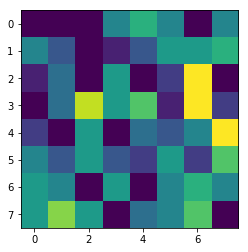

[[ 0.  0.  0.  6.  7.  5.  0.  3.]
 [ 5.  3.  0.  0.  4.  6.  9.  4.]
 [ 2.  6.  0.  5.  0.  3.  4.  0.]
 [ 0.  3.  7. 10. 10.  2.  9.  2.]
 [ 0.  0.  9.  0.  3.  4.  1. 10.]
 [ 5.  0.  3.  4.  2.  7.  2.  7.]
 [10.  5.  0.  6.  0.  6.  4.  9.]
 [ 5.  7.  1.  0. 10.  4. 12.  0.]]


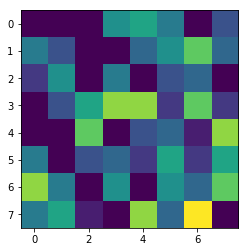

[[ 0.  0.  0.  5.  2.  4.  0.  7.]
 [ 4.  9.  0.  7.  1.  7.  5.  1.]
 [ 9.  4.  0.  7.  0.  7.  3.  4.]
 [ 0. 10.  6.  4.  6.  5.  4.  7.]
 [ 8.  0.  0.  0.  0.  8.  6.  6.]
 [ 1.  5.  1.  4.  6.  5.  7.  1.]
 [ 5.  2.  0.  4.  0.  9. 12.  4.]
 [ 9.  3.  4.  0.  6.  7.  3.  0.]]


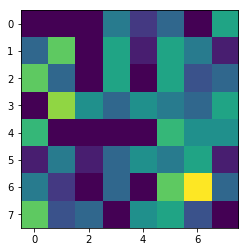

[[ 0.  0.  0.  4.  1.  6.  0.  7.]
 [ 2.  6.  0.  5.  1.  6.  6.  0.]
 [11.  6.  0.  9.  0. 13.  0.  3.]
 [ 0. 10.  5.  5.  3.  7.  5.  2.]
 [ 4.  0.  4.  0.  5.  8.  1.  6.]
 [ 1.  6.  2.  2.  6.  3.  9.  0.]
 [ 9.  2.  0.  7.  0.  7.  9.  7.]
 [ 6.  5.  1.  0. 11.  9.  3.  0.]]


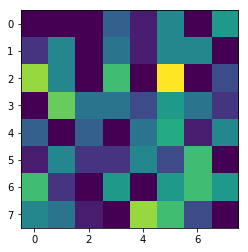

[[ 0.  0.  0.  4.  6.  4.  0.  4.]
 [ 2.  3.  0.  6.  0.  7.  2.  4.]
 [ 7.  4.  0.  5.  0.  2.  6.  7.]
 [ 0.  8.  6.  5.  8.  3.  3. 13.]
 [ 5.  0.  6.  0.  2.  8.  9.  4.]
 [ 5.  5.  3. 10.  2.  4.  3. 10.]
 [ 6.  5.  0.  4.  0.  5.  5.  1.]
 [ 3.  3.  4.  0.  3.  9.  8.  0.]]


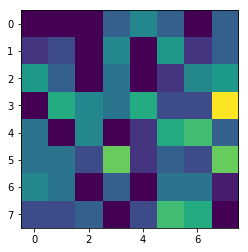

[[ 0.  0.  0.  5.  3.  3.  0.  7.]
 [ 4.  9.  0.  7.  1.  7.  5.  1.]
 [ 8.  4.  0.  7.  0.  6.  3.  4.]
 [ 0.  9.  7.  4.  7.  5.  3.  8.]
 [ 9.  0.  0.  0.  0.  8.  7.  6.]
 [ 3.  5.  1.  5.  6.  5.  6.  2.]
 [ 4.  3.  0.  3.  0.  9. 12.  3.]
 [ 9.  3.  4.  0.  5.  7.  3.  0.]]


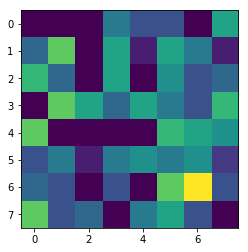

[[0. 0. 0. 5. 5. 5. 0. 9.]
 [2. 4. 0. 3. 0. 7. 6. 5.]
 [7. 7. 0. 6. 0. 4. 8. 6.]
 [0. 6. 8. 6. 8. 3. 6. 3.]
 [0. 0. 7. 0. 4. 2. 6. 5.]
 [7. 7. 3. 3. 6. 6. 2. 5.]
 [8. 5. 0. 5. 0. 6. 4. 5.]
 [2. 6. 4. 0. 8. 6. 6. 0.]]


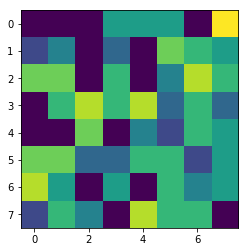

[[ 0.  0.  0.  3.  6.  2.  0.  7.]
 [ 2.  5.  0.  6.  1.  4.  2.  5.]
 [ 3.  5.  0.  6.  0.  0.  8.  8.]
 [ 0.  7.  7.  5.  6.  0.  1. 13.]
 [ 6.  0.  8.  0.  2.  7.  8.  7.]
 [ 9.  8.  3. 10.  1.  6.  1. 14.]
 [ 4.  6.  0.  3.  0.  6.  4.  2.]
 [ 2.  3.  7.  0.  3.  9.  8.  0.]]


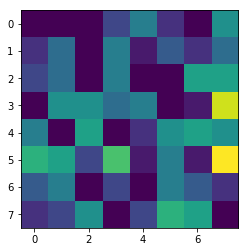

[[ 0.  0.  0.  1.  7.  4.  0.  6.]
 [ 0.  4.  0.  4.  3.  1.  5.  3.]
 [10.  3.  0. 10.  0.  4.  6.  0.]
 [ 0.  8.  2.  0.  2.  0.  7.  8.]
 [ 3.  0.  6.  0.  2.  7.  5. 13.]
 [ 4.  6.  8.  5.  1.  6.  1. 12.]
 [11.  2.  0.  2.  0.  4.  4.  8.]
 [ 6.  8.  6.  0.  4. 12. 11.  0.]]


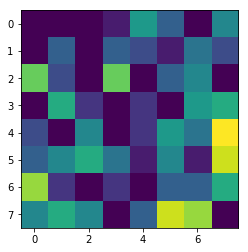

[[ 0.  0.  0.  6.  6.  6.  0.  6.]
 [ 5.  9.  0.  4.  1.  5.  4.  8.]
 [ 5.  4.  0.  2.  0.  2. 12.  5.]
 [ 0.  2.  9.  1.  5.  2.  7.  4.]
 [ 2.  0.  4.  0.  2.  2. 10.  3.]
 [ 5. 10.  7.  3.  3.  8.  0.  6.]
 [ 7.  8.  0.  6.  0.  6.  6.  6.]
 [ 6.  4.  7.  0.  3.  4.  6.  0.]]


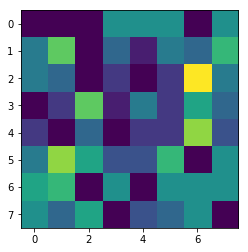

[[ 0.  0.  0.  8.  5.  7.  0.  0.]
 [ 3.  8.  0.  7.  2.  7.  0.  6.]
 [ 8.  4.  0.  1.  0.  5.  8.  6.]
 [ 0.  9.  5.  5.  6.  6.  9. 11.]
 [ 1.  0.  7.  0.  3.  5.  5.  0.]
 [ 3.  2.  6.  8.  1.  2.  4.  8.]
 [12.  3.  0.  8.  0.  4.  1.  7.]
 [ 4.  0.  6.  0.  4.  8.  7.  0.]]


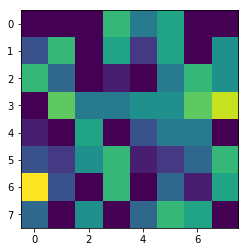

[[ 0.  0.  0.  4.  5.  2.  0.  4.]
 [ 1.  1.  0.  2.  1.  7.  5.  5.]
 [ 1.  7.  0. 12.  0.  1.  8.  3.]
 [ 0.  5.  8.  8.  8.  0.  3.  8.]
 [ 6.  0.  7.  0.  3.  9.  5. 10.]
 [ 8.  3.  2.  9.  4.  7.  2. 10.]
 [ 4.  6.  0.  2.  0. 10.  8.  2.]
 [ 0.  9.  2.  0.  3.  9.  9.  0.]]


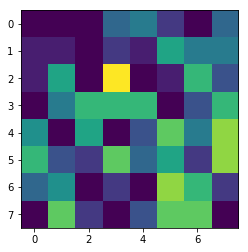

[[ 0.  0.  0.  2. 10.  4.  0.  5.]
 [ 2.  0.  0.  1.  3.  5. 10.  1.]
 [ 8.  7.  0.  9.  0.  7.  2.  1.]
 [ 0.  6.  5.  6.  9.  3.  0.  8.]
 [ 2.  0.  9.  0.  5.  8.  0. 11.]
 [ 2.  6.  4.  7.  2.  5.  3.  4.]
 [ 7.  4.  0.  4.  0.  6.  7.  1.]
 [ 4. 10.  0.  0. 10.  7. 12.  0.]]


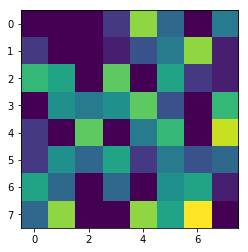

[[ 0.  0.  0.  7.  9.  8.  0.  1.]
 [ 7. 12.  0.  6.  3.  5.  3.  8.]
 [ 7.  1.  0.  0.  0.  3.  8.  3.]
 [ 0.  3.  7.  2.  4.  5.  7.  8.]
 [ 2.  0.  4.  0.  2.  3.  9.  1.]
 [ 0.  8. 10.  6.  0.  6.  1.  8.]
 [10.  8.  0.  9.  0.  3.  4.  6.]
 [ 7.  2.  5.  0.  4.  5.  9.  0.]]


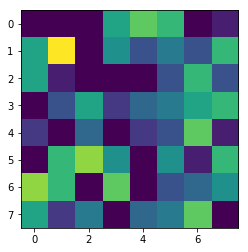

[[ 0.  0.  0. 10.  7.  5.  0.  0.]
 [ 7.  2.  0.  0.  3.  8.  5. 10.]
 [ 0.  4.  0.  6.  0.  0. 11.  0.]
 [ 0.  0.  9.  6.  8.  5. 13.  1.]
 [ 1.  0.  7.  0.  6.  1.  8.  3.]
 [ 4.  3.  9.  4.  3.  3.  2.  6.]
 [ 5.  7.  0. 10.  0.  3.  5.  5.]
 [ 3. 11.  8.  0.  4.  4.  8.  0.]]


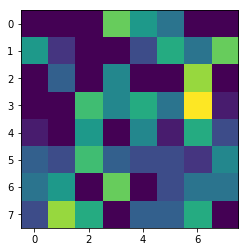

[[ 0.  0.  0.  5.  6.  5.  0.  3.]
 [ 4.  7.  0.  3.  2.  6.  8.  3.]
 [ 7.  4.  0.  6.  0.  3.  2.  0.]
 [ 0.  3.  3.  6.  7.  3.  7.  8.]
 [ 0.  0.  7.  0.  0.  5.  6.  5.]
 [ 6.  0.  8.  5.  2.  4.  3.  8.]
 [12.  6.  0.  3.  0.  3.  1. 11.]
 [ 7.  5.  5.  0. 10.  7. 11.  0.]]


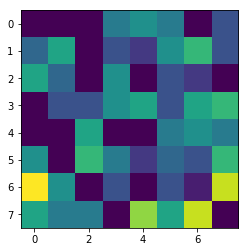

[[ 0.  0.  0.  2.  7.  4.  0.  8.]
 [ 1.  3.  0.  4.  4.  2.  6.  5.]
 [13.  7.  0.  6.  0.  3.  4.  1.]
 [ 0. 11.  1.  3.  7.  2.  8. 10.]
 [ 0.  0. 10.  0.  4.  5.  4.  8.]
 [ 5.  4.  5.  5.  1.  3.  3.  9.]
 [13.  1.  0.  5.  0.  3.  0.  7.]
 [ 3.  4.  6.  0.  8.  8. 11.  0.]]


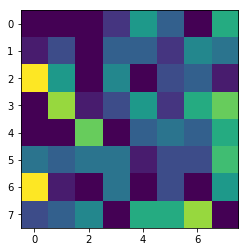

[[ 0.  0.  0.  0.  1.  2.  0.  5.]
 [ 3.  7.  0.  5.  4.  0.  5.  1.]
 [ 2.  2.  0. 11.  0.  4.  5.  0.]
 [ 0.  5.  3.  1.  0.  0.  9.  6.]
 [ 6.  0.  6.  0.  2.  9.  2. 16.]
 [ 9.  2.  6.  4.  0.  6.  3. 16.]
 [ 9.  0.  0.  2.  0.  3.  7. 12.]
 [ 7.  9. 10.  0.  3. 15. 10.  0.]]


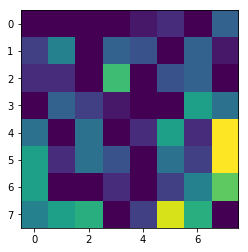

[[ 0.  0.  0.  3.  5.  3.  0.  8.]
 [ 1.  6.  0.  5.  1.  4.  7.  3.]
 [10.  8.  0.  7.  0.  4.  2.  4.]
 [ 0.  6.  1.  3.  5.  2.  3.  8.]
 [ 0.  0. 10.  0.  2.  6.  6.  4.]
 [ 8.  7.  4.  5.  4.  4.  3.  8.]
 [11.  4.  0.  3.  0.  4.  1.  8.]
 [ 2.  5.  4.  0. 10. 10. 10.  0.]]


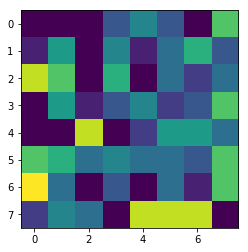

[[ 0.  0.  0.  6.  2.  4.  0.  8.]
 [ 3. 11.  0.  7.  1.  6.  5.  2.]
 [ 6.  6.  0.  8.  0.  7.  5.  4.]
 [ 0.  9.  7.  4.  5.  3.  4.  5.]
 [ 8.  0.  0.  0.  0.  7.  6.  6.]
 [ 3.  6.  0.  3.  8.  6.  6.  1.]
 [ 4.  2.  0.  2.  0. 10. 12.  6.]
 [ 9.  3.  5.  0.  5.  8.  3.  0.]]


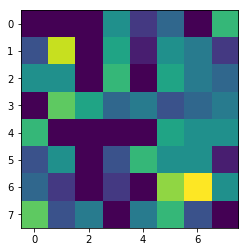

[[ 0.  0.  0.  2.  5.  3.  0.  6.]
 [ 1.  2.  0.  5.  0.  5.  2.  5.]
 [ 4.  5.  0.  9.  0.  1.  8.  5.]
 [ 0.  7.  7.  6.  6.  0.  4. 11.]
 [ 6.  0.  7.  0.  3.  8.  7.  8.]
 [ 8.  5.  3.  9.  2.  7.  1. 13.]
 [ 6.  5.  0.  3.  0.  6.  5.  2.]
 [ 1.  6.  5.  0.  2. 10.  9.  0.]]


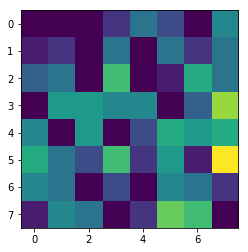

[[0. 0. 0. 6. 6. 3. 0. 8.]
 [3. 6. 0. 4. 0. 7. 8. 4.]
 [8. 8. 0. 6. 0. 1. 4. 4.]
 [0. 4. 4. 5. 9. 2. 4. 8.]
 [0. 0. 8. 0. 2. 4. 8. 2.]
 [8. 5. 3. 6. 6. 4. 3. 6.]
 [8. 5. 0. 2. 0. 6. 2. 6.]
 [2. 5. 5. 0. 9. 6. 8. 0.]]


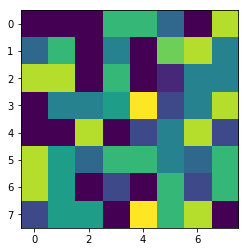

[[ 0.  0.  0.  1.  6.  3.  0.  9.]
 [ 0.  6.  0.  4.  2.  2.  7.  3.]
 [11.  8.  0.  9.  0.  4.  5.  1.]
 [ 0.  7.  2.  1.  4.  0.  4.  9.]
 [ 0.  0.  8.  0.  2.  5.  6.  9.]
 [ 7.  7.  6.  4.  3.  5.  2.  9.]
 [11.  4.  0.  0.  0.  6.  2.  8.]
 [ 4.  7.  5.  0.  8.  9.  9.  0.]]


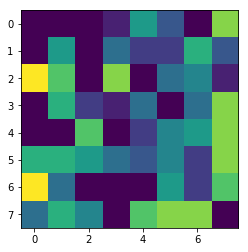

[[ 0.  0.  0.  3.  6.  5.  0.  6.]
 [ 4.  2.  0.  1.  3.  5.  7.  5.]
 [ 5.  6.  0.  5.  0.  3.  6.  2.]
 [ 0.  5.  7.  8.  8.  2. 10.  4.]
 [ 0.  0.  8.  0.  4.  4.  4.  9.]
 [ 6.  0.  4.  3.  1.  6.  2.  8.]
 [10.  5.  0.  7.  0.  4.  4.  8.]
 [ 6.  7.  5.  0.  8.  4. 10.  0.]]


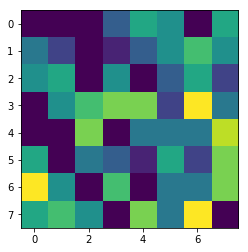

[[ 0.  0.  0.  6.  7.  1.  0.  7.]
 [ 5.  2.  0.  1.  5.  6.  5.  8.]
 [ 1. 10.  0.  6.  0.  0. 10.  4.]
 [ 0.  6. 10.  9. 11.  0.  9.  4.]
 [ 2.  0.  8.  0.  8.  3.  4. 12.]
 [ 8.  1.  1.  4.  3.  5.  2.  7.]
 [ 3.  5.  0.  6.  0. 10.  5.  2.]
 [ 2.  7.  3.  0.  6.  0.  5.  0.]]


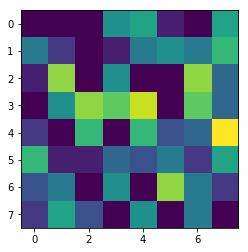

[[ 0.  0.  0.  1. 10.  5.  0.  7.]
 [ 5.  2.  0.  3.  2.  3.  6.  3.]
 [ 6.  3.  0.  2.  0.  5.  4.  5.]
 [ 0.  6.  8.  6.  6.  3.  1.  9.]
 [ 3.  0. 10.  0.  5.  5.  3.  9.]
 [ 4. 10.  4.  6.  0.  7.  1. 10.]
 [ 6.  7.  0.  9.  0.  3.  5.  1.]
 [ 4.  4.  3.  0.  9.  6. 10.  0.]]


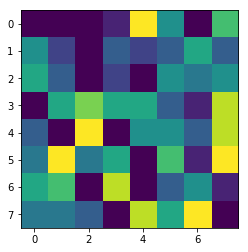

[[ 0.  0.  0.  3.  4.  1.  0.  6.]
 [ 2.  1.  0.  2.  2.  7.  8.  4.]
 [ 7.  8.  0. 13.  0.  2.  7.  0.]
 [ 0.  8.  7.  5. 11.  0.  7.  7.]
 [ 3.  0.  5.  0.  5.  8.  5. 10.]
 [ 8.  0.  2.  6.  6.  4.  3.  4.]
 [ 6.  1.  0.  0.  0. 10.  9.  4.]
 [ 3.  9.  6.  0.  5.  6.  5.  0.]]


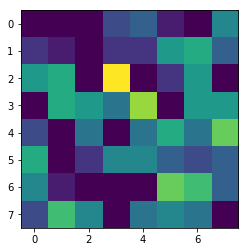

[[ 0.  0.  0.  5.  7.  4.  0.  6.]
 [ 2.  4.  0.  3.  0.  6.  6.  3.]
 [ 8.  7.  0.  6.  0.  3.  6.  5.]
 [ 0.  4.  5.  5.  8.  3.  3. 10.]
 [ 0.  0.  8.  0.  3.  5.  8.  3.]
 [ 6.  6.  6.  7.  4.  4.  2.  6.]
 [ 7.  7.  0.  3.  0.  4.  3.  5.]
 [ 4.  6.  4.  0.  8.  6.  8.  0.]]


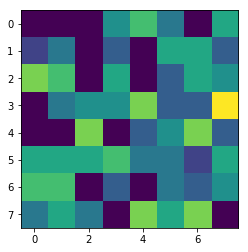

[[ 0.  0.  0.  5.  8.  3.  0.  4.]
 [ 8.  5.  0.  0.  5.  6. 14.  3.]
 [ 4.  7.  0.  7.  0.  1.  2.  0.]
 [ 0.  0.  8.  7. 11.  2.  6.  3.]
 [ 0.  0.  6.  0.  3.  5.  5. 10.]
 [ 6.  0.  6.  3.  4.  6.  2.  3.]
 [ 7.  7.  0.  4.  0.  7.  6.  8.]
 [ 7.  9.  2.  0. 12.  0.  9.  0.]]


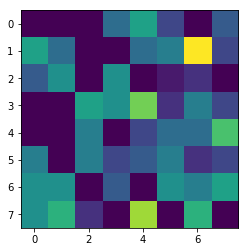

[[ 0.  0.  0.  4.  3.  5.  0.  9.]
 [ 3.  8.  0.  4.  1.  6.  7.  5.]
 [ 6.  6.  0.  5.  0.  4.  8.  4.]
 [ 0.  7. 10.  4.  7.  1.  6.  3.]
 [ 3.  0.  3.  0.  2.  5.  6.  8.]
 [ 6.  6.  1.  2.  6.  9.  2.  4.]
 [ 7.  4.  0.  4.  0. 10.  9.  5.]
 [ 6.  4.  3.  0.  5.  5.  5.  0.]]


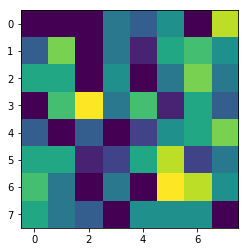

[[ 0.  0.  0.  4.  9.  5.  0.  6.]
 [ 5.  4.  0.  3.  1.  6.  6.  3.]
 [ 6.  5.  0.  2.  0.  3.  4.  7.]
 [ 0.  3.  7.  8.  8.  4.  1.  9.]
 [ 1.  0. 10.  0.  3.  4.  6.  3.]
 [ 5.  8.  5.  7.  3.  5.  2.  8.]
 [ 7.  9.  0.  7.  0.  3.  3.  3.]
 [ 3.  4.  3.  0. 10.  5. 10.  0.]]


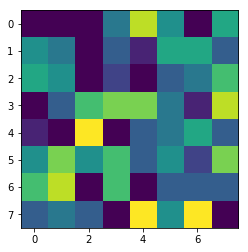

[[ 0.  0.  0.  5.  7.  7.  0.  4.]
 [ 1.  2.  0.  6.  0.  8.  2.  2.]
 [11.  2.  0.  4.  0.  7.  4.  6.]
 [ 0. 12.  6.  4.  7.  7.  4. 11.]
 [ 5.  0.  5.  0.  4.  7.  5.  2.]
 [ 1.  7.  3.  8.  5.  4.  4.  5.]
 [ 9.  2.  0.  6.  0.  3.  6.  0.]
 [ 2.  3.  3.  0.  5. 10.  8.  0.]]


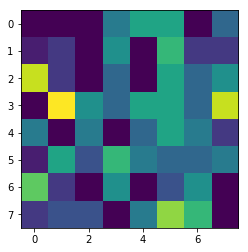

[[ 0.  0.  0.  0.  1.  2.  0.  9.]
 [ 0.  1.  0.  4.  0.  4.  4.  2.]
 [ 8.  5.  0. 13.  0.  6.  6.  2.]
 [ 0. 11.  6.  2.  4.  1.  5.  7.]
 [ 6.  0.  5.  0.  5. 10.  5. 11.]
 [ 8.  6.  3.  5.  3.  5.  3.  8.]
 [ 7.  0.  0.  3.  0.  6.  9.  4.]
 [ 3.  6.  8.  0.  3. 12.  5.  0.]]


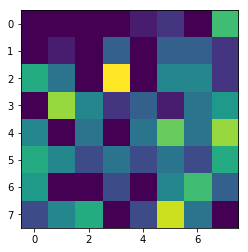

[[ 0.  0.  0.  5.  0.  5.  0.  3.]
 [ 3.  9.  0.  5.  1.  5.  3.  3.]
 [ 9.  4.  0. 10.  0.  9.  0.  0.]
 [ 0.  4.  4.  5.  1.  9.  8.  0.]
 [ 0.  0.  9.  0.  7.  6.  3.  0.]
 [ 9.  4.  4.  2.  7.  2.  8.  7.]
 [14.  2.  0. 11.  0.  1.  1. 12.]
 [ 0.  2.  3.  0. 13. 13.  7.  0.]]


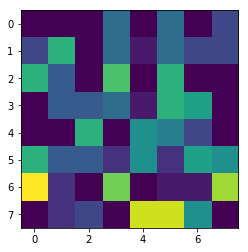

[[ 0.  0.  0.  8.  6.  6.  0.  0.]
 [ 4. 10.  0.  8.  3.  5.  0.  6.]
 [ 7.  4.  0.  0.  0.  4.  7.  6.]
 [ 0.  9.  4.  4.  4.  5.  7. 12.]
 [ 3.  0.  7.  0.  3.  6.  5.  0.]
 [ 3.  3.  6.  8.  0.  2.  4. 10.]
 [10.  3.  0.  9.  0.  3.  1.  7.]
 [ 4.  0.  7.  0.  3.  9.  9.  0.]]


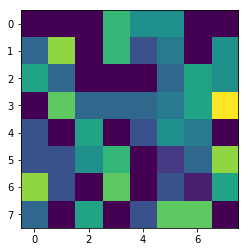

[[ 0.  0.  0.  8.  8.  2.  0.  5.]
 [ 5.  3.  0.  0.  7.  6.  9.  6.]
 [ 0.  8.  0.  7.  0.  0.  7.  0.]
 [ 0.  7.  7. 10. 13.  0. 13.  4.]
 [ 0.  0.  7.  0.  3.  2.  0. 14.]
 [ 6.  0.  1.  3.  4.  4.  3.  6.]
 [ 7.  1.  0.  2.  0.  8.  4.  7.]
 [ 6. 10.  3.  0.  7.  1. 10.  0.]]


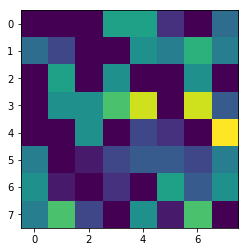

[[ 0.  0.  0.  5.  6.  2.  0.  5.]
 [ 2.  1.  0.  1.  5.  3.  3.  6.]
 [ 6.  7.  0.  8.  0.  2. 12.  0.]
 [ 0.  8.  4.  2.  7.  1. 14.  7.]
 [ 1.  0.  7.  0.  7.  6.  6. 11.]
 [ 4.  1.  9.  3.  0.  1.  2.  8.]
 [ 7.  2.  0.  4.  0.  4.  4.  8.]
 [ 8.  9. 11.  0.  2.  6.  5.  0.]]


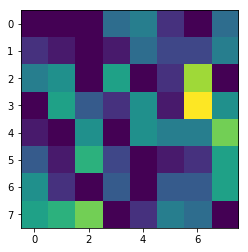

[[ 0.  0.  0.  7.  7.  3.  0.  5.]
 [ 3.  2.  0.  0.  4.  8. 10.  5.]
 [ 6.  9.  0.  9.  0.  4.  7.  0.]
 [ 0.  5.  8.  6. 12.  3.  8.  3.]
 [ 0.  0.  6.  0.  6.  3.  3.  9.]
 [ 4.  1.  4.  2.  6.  3.  4.  0.]
 [ 6.  3.  0.  3.  0.  9.  8.  4.]
 [ 4. 10.  4.  0.  8.  4.  5.  0.]]


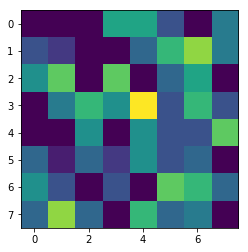

[[0. 0. 0. 4. 4. 4. 0. 7.]
 [2. 2. 0. 2. 1. 7. 7. 4.]
 [8. 8. 0. 8. 0. 4. 5. 4.]
 [0. 7. 7. 6. 9. 2. 6. 5.]
 [0. 0. 8. 0. 5. 6. 5. 6.]
 [8. 3. 1. 5. 6. 5. 3. 5.]
 [9. 4. 0. 4. 0. 7. 5. 5.]
 [1. 6. 2. 0. 8. 6. 7. 0.]]


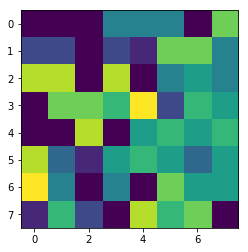

[[ 0.  0.  0.  0.  3.  3.  0.  6.]
 [ 0.  2.  0.  1.  2.  3.  8.  1.]
 [ 8.  7.  0. 15.  0.  7.  5.  0.]
 [ 0.  7.  3.  2.  6.  0.  6.  4.]
 [ 2.  0.  6.  0.  3. 10.  2. 13.]
 [ 6.  1.  5.  4.  3.  6.  2.  7.]
 [11.  2.  0.  0.  0.  7.  7.  9.]
 [ 5. 11.  5.  0.  6. 11. 10.  0.]]


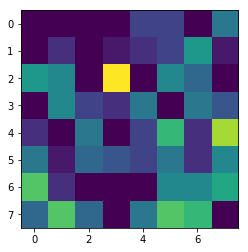

[[ 0.  0.  0.  6.  6.  8.  0.  3.]
 [ 2. 10.  0.  6.  2.  6.  2.  6.]
 [ 9.  6.  0.  1.  0.  7.  9.  6.]
 [ 0.  9.  6.  2.  5.  4.  7.  8.]
 [ 1.  0.  5.  0.  3.  5.  5.  2.]
 [ 1.  5.  5.  4.  3.  5.  3.  4.]
 [10.  4.  0.  6.  0.  6.  5.  6.]
 [ 6.  2.  5.  0.  4.  8.  6.  0.]]


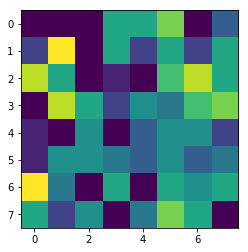

[[ 0.  0.  0.  5.  2.  5.  0.  8.]
 [ 3.  8.  0.  6.  1.  7.  5.  0.]
 [10.  5.  0.  7.  0.  9.  1.  4.]
 [ 0. 10.  5.  5.  5.  6.  4.  6.]
 [ 7.  0.  1.  0.  2.  8.  4.  6.]
 [ 1.  5.  1.  3.  7.  5.  7.  1.]
 [ 6.  3.  0.  4.  0.  8. 10.  5.]
 [ 9.  4.  2.  0.  8.  7.  3.  0.]]


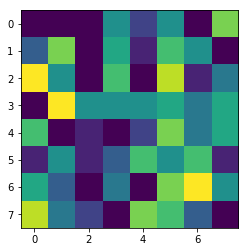

[[ 0.  0.  0.  5.  4.  7.  0.  4.]
 [ 4.  5.  0.  4.  1.  7.  6.  4.]
 [ 4.  3.  0.  6.  0.  4.  4.  3.]
 [ 0.  4.  9.  9.  8.  3.  6.  2.]
 [ 1.  0.  8.  0.  2.  5.  4.  6.]
 [ 8.  2.  2.  4.  5.  8.  3.  8.]
 [11.  6.  0.  7.  0.  4.  5.  7.]
 [ 2.  4.  2.  0.  9.  7. 11.  0.]]


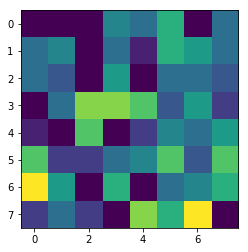

[[ 0.  0.  0.  7. 12.  3.  0.  3.]
 [ 5.  3.  0.  1.  5.  6. 13.  4.]
 [ 4.  7.  0.  9.  0.  2.  2.  0.]
 [ 0.  1.  4.  8. 11.  2.  3.  6.]
 [ 0.  0.  8.  0.  2.  3.  2. 10.]
 [ 4.  2.  6.  4.  5.  5.  2.  5.]
 [ 8.  6.  0.  1.  0.  6.  4.  5.]
 [ 4. 13.  1.  0. 11.  4. 14.  0.]]


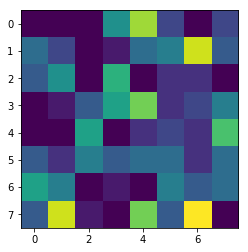

[[ 0.  0.  0.  4.  8.  7.  0.  4.]
 [ 2.  2.  0.  6.  1.  7.  2.  3.]
 [11.  2.  0.  3.  0.  7.  5.  7.]
 [ 0. 12.  6.  4.  7.  6.  4. 12.]
 [ 4.  0.  7.  0.  5.  6.  4.  3.]
 [ 2.  8.  4.  8.  3.  4.  4.  7.]
 [ 9.  2.  0.  7.  0.  2.  5.  0.]
 [ 2.  2.  4.  0.  5. 10.  9.  0.]]


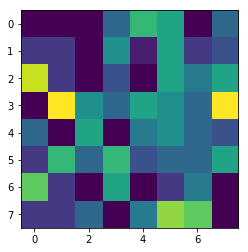

[[0. 0. 0. 6. 7. 4. 0. 9.]
 [2. 7. 0. 4. 2. 5. 6. 5.]
 [8. 7. 0. 7. 0. 5. 6. 3.]
 [0. 6. 5. 4. 7. 3. 3. 4.]
 [1. 0. 7. 0. 3. 1. 5. 6.]
 [5. 9. 5. 3. 7. 6. 3. 4.]
 [8. 4. 0. 3. 0. 6. 4. 5.]
 [3. 7. 3. 0. 8. 7. 8. 0.]]


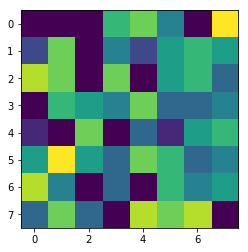

[[ 0.  0.  0.  4.  0.  5.  0.  8.]
 [ 3.  9.  0.  6.  1.  6.  5.  0.]
 [11.  6.  0.  7.  0. 11.  1.  3.]
 [ 0. 11.  5.  4.  3.  6.  6.  5.]
 [ 7.  0.  1.  0.  3.  9.  4.  6.]
 [ 1.  5.  2.  2.  7.  3.  8.  0.]
 [ 7.  2.  0.  6.  0.  8. 10.  7.]
 [10.  3.  3.  0.  8.  8.  2.  0.]]


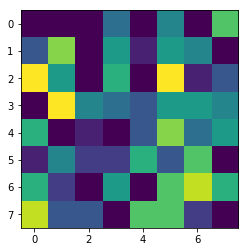

[[ 0.  0.  0.  1. 10.  6.  0.  7.]
 [ 3.  2.  0.  4.  2.  3.  4.  5.]
 [ 9.  3.  0.  1.  0.  4.  6.  6.]
 [ 0. 10.  7.  3.  5.  3.  3. 10.]
 [ 4.  0.  9.  0.  5.  5.  4.  7.]
 [ 3. 11.  5.  6.  0.  6.  1. 10.]
 [ 8.  4.  0.  8.  0.  3.  4.  0.]
 [ 3.  3.  4.  0.  5.  7. 10.  0.]]


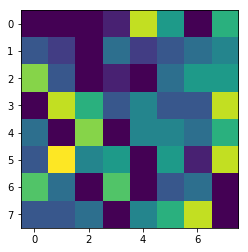

[[ 0.  0.  0.  8.  8.  5.  0.  3.]
 [ 4.  1.  0.  6.  4.  6.  4.  6.]
 [ 8.  4.  0.  4.  0.  2.  2.  0.]
 [ 0.  9.  2.  9.  8.  6.  9.  8.]
 [ 1.  0. 12.  0.  5.  3.  3.  3.]
 [ 5.  2.  3.  6.  3.  1.  6. 11.]
 [12.  0.  0. 10.  0.  0.  0.  4.]
 [ 0.  3.  5.  0.  9.  9. 14.  0.]]


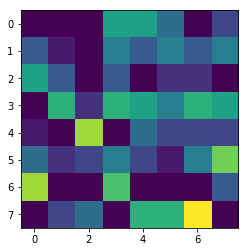

[[ 0.  0.  0.  3.  4.  8.  0.  5.]
 [ 1.  4.  0.  4.  0.  5.  3.  3.]
 [ 8.  4.  0.  5.  0.  8.  4.  5.]
 [ 0.  8.  6.  5.  5.  5.  5.  5.]
 [ 1.  0.  9.  0.  5.  6.  2.  4.]
 [ 6.  6.  2.  4.  4.  6.  3.  8.]
 [12.  3.  0.  9.  0.  2.  4.  6.]
 [ 1.  3.  3.  0.  8. 11. 10.  0.]]


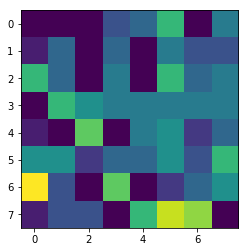

[[ 0.  0.  0.  3.  4.  4.  0.  7.]
 [ 3.  3.  0.  1.  2.  6.  9.  5.]
 [ 8.  8.  0.  9.  0.  3.  5.  1.]
 [ 0.  6.  7.  6.  8.  1.  8.  3.]
 [ 0.  0.  7.  0.  4.  6.  5.  7.]
 [ 8.  1.  3.  4.  6.  5.  3.  5.]
 [10.  4.  0.  4.  0.  7.  6.  7.]
 [ 3.  7.  3.  0.  8.  6.  7.  0.]]


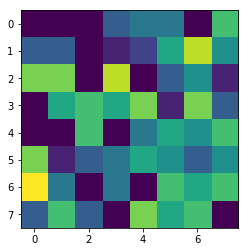

[[ 0.  0.  0.  7. 11.  6.  0.  4.]
 [ 3.  4.  0.  3.  2.  6.  7.  5.]
 [10.  6.  0.  5.  0.  5.  6.  2.]
 [ 0.  3.  5.  3.  7.  5.  3.  7.]
 [ 1.  0.  7.  0.  5.  2.  7.  3.]
 [ 1. 10.  9.  5.  6.  5.  2.  3.]
 [ 8.  7.  0.  5.  0.  5.  3.  1.]
 [ 2.  9.  1.  0.  8.  6.  9.  0.]]


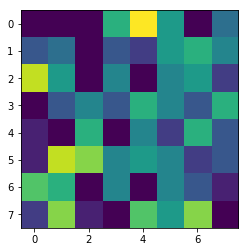

[[ 0.  0.  0.  4.  5.  4.  0.  6.]
 [ 0.  0.  0.  3.  5.  3.  3.  4.]
 [ 7.  8.  0.  9.  0.  7.  7.  1.]
 [ 0. 12.  4.  5.  7.  1. 10.  7.]
 [ 0.  0. 10.  0.  6.  6.  0. 11.]
 [ 5.  0.  4.  4.  1.  2.  4.  8.]
 [10.  0.  0.  4.  0.  5.  3.  7.]
 [ 4.  7.  8.  0.  5. 11.  8.  0.]]


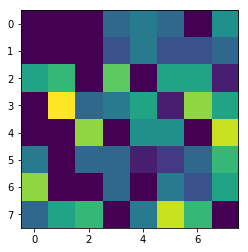

[[ 0.  0.  0.  7.  4.  6.  0.  4.]
 [ 3. 11.  0.  6.  2.  6.  2.  8.]
 [ 3.  5.  0.  4.  0.  5. 12.  6.]
 [ 0.  6. 13.  3.  6.  3.  5.  2.]
 [ 6.  0.  4.  0.  5.  4.  5.  6.]
 [ 4.  9.  2.  3.  6.  8.  3.  3.]
 [ 3.  4.  0.  7.  0. 10. 10.  2.]
 [ 3.  3.  3.  0.  2.  7.  3.  0.]]


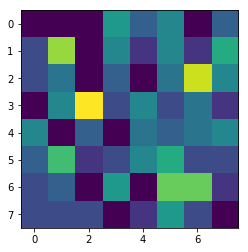

[[ 0.  0.  0.  6.  2.  5.  0.  8.]
 [ 2. 12.  0.  7.  2.  4.  4.  3.]
 [ 7.  7.  0.  7.  0.  9.  5.  4.]
 [ 0.  9.  6.  3.  3.  4.  4.  4.]
 [ 7.  0.  1.  0.  1.  6.  4.  7.]
 [ 1.  7.  2.  1.  8.  6.  7.  0.]
 [ 5.  3.  0.  4.  0. 10. 11.  7.]
 [ 9.  4.  4.  0.  6.  8.  2.  0.]]


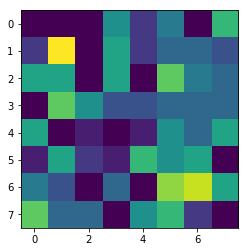

[[ 0.  0.  0.  7.  8.  3.  0.  0.]
 [ 6.  5.  0.  0.  7.  6. 10.  5.]
 [ 0.  9.  0.  6.  0.  1.  5.  0.]
 [ 0.  1.  7. 10. 11.  0.  8.  3.]
 [ 0.  0.  9.  0.  3.  6.  0. 13.]
 [ 5.  0.  3.  4.  2.  6.  2.  5.]
 [ 7.  5.  0.  4.  0.  9.  5.  8.]
 [ 5.  9.  1.  0.  9.  3. 11.  0.]]


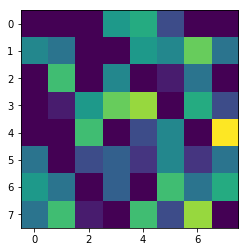

[[ 0.  0.  0.  4.  1.  5.  0.  8.]
 [ 3.  9.  0.  6.  2.  5.  5.  1.]
 [11.  7.  0.  7.  0. 11.  1.  3.]
 [ 0. 10.  4.  4.  3.  6.  5.  5.]
 [ 6.  0.  2.  0.  3.  8.  3.  7.]
 [ 1.  5.  2.  2.  7.  3.  8.  0.]
 [ 7.  2.  0.  6.  0.  8.  9.  7.]
 [ 9.  3.  2.  0.  9.  7.  2.  0.]]


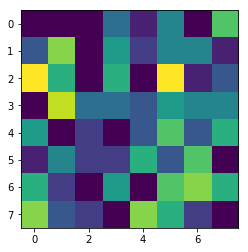

[[ 0.  0.  0.  5. 10.  6.  0.  0.]
 [ 5.  4.  0.  0.  4.  5. 11.  5.]
 [ 3.  5.  0.  7.  0.  4.  5.  0.]
 [ 0.  0.  7.  5.  8.  2.  5.  2.]
 [ 1.  0.  8.  0.  3.  4.  4.  8.]
 [ 2.  4.  9.  3.  3.  7.  0.  5.]
 [ 9.  8.  0.  5.  0.  5.  5.  6.]
 [ 5. 13.  2.  0.  8.  6. 13.  0.]]


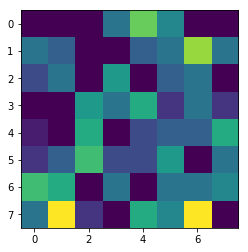

[[ 0.  0.  0.  6.  1.  4.  0.  8.]
 [ 4. 11.  0.  8.  2.  6.  4.  1.]
 [ 7.  5.  0.  7.  0.  8.  3.  5.]
 [ 0. 10.  6.  4.  5.  5.  4.  6.]
 [ 9.  0.  0.  0.  1.  8.  5.  5.]
 [ 2.  5.  1.  3.  7.  4.  8.  1.]
 [ 4.  2.  0.  4.  0.  9. 11.  6.]
 [10.  2.  5.  0.  6.  7.  2.  0.]]


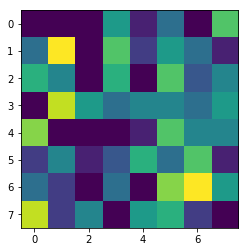

[[ 0.  0.  0.  6.  6.  4.  0.  9.]
 [ 5.  6.  0.  4.  2.  7.  9.  4.]
 [ 6.  5.  0.  3.  0.  3.  5.  5.]
 [ 0.  6. 10.  7. 12.  3.  6.  4.]
 [ 1.  0.  5.  0.  3.  2.  7.  5.]
 [ 7.  5.  1.  2.  7.  7.  3.  3.]
 [ 7.  4.  0.  4.  0.  7.  6.  4.]
 [ 5.  3.  3.  0.  9.  2.  6.  0.]]


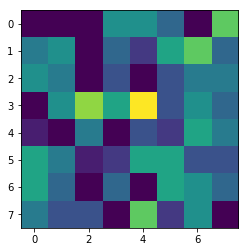

[[ 0.  0.  0.  0.  3.  2.  0.  8.]
 [ 4.  6.  0.  6.  4.  0.  6.  1.]
 [ 3.  1.  0.  8.  0.  2.  4.  0.]
 [ 0.  6.  4.  3.  1.  0.  8.  7.]
 [ 6.  0.  7.  0.  1.  8.  4. 14.]
 [10.  3.  5.  4.  0.  6.  3. 16.]
 [ 8.  0.  0.  2.  0.  2.  6. 11.]
 [ 7.  7. 10.  0.  4. 12. 11.  0.]]


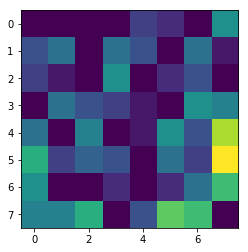

[[ 0.  0.  0.  4. 11.  4.  0.  4.]
 [ 4.  1.  0.  1.  3.  5. 10.  4.]
 [ 8.  7.  0.  8.  0.  4.  5.  0.]
 [ 0.  1.  5.  4. 10.  3.  2.  7.]
 [ 2.  0.  7.  0.  4.  6.  6.  8.]
 [ 2.  6.  9.  5.  3.  5.  1.  3.]
 [ 6.  7.  0.  3.  0.  5.  7.  3.]
 [ 6. 11.  3.  0.  8.  4. 10.  0.]]


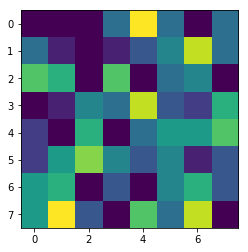

[[ 0.  0.  0.  7.  7.  5.  0.  8.]
 [ 3.  6.  0.  3.  2.  6. 10.  4.]
 [ 6.  7.  0.  7.  0.  6.  4.  2.]
 [ 0.  3.  6.  6.  9.  4.  4.  3.]
 [ 0.  0.  7.  0.  3.  1.  5.  4.]
 [ 5.  7.  5.  1.  8.  5.  4.  2.]
 [ 8.  5.  0.  3.  0.  5.  5.  5.]
 [ 4.  9.  3.  0. 11.  6.  8.  0.]]


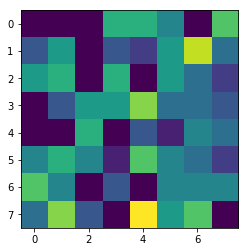

[[ 0.  0.  0.  3.  9.  5.  0.  3.]
 [ 2.  4.  0.  6.  3.  3.  1.  5.]
 [11.  4.  0.  2.  0.  5.  5.  5.]
 [ 0. 10.  4.  2.  4.  3.  4. 14.]
 [ 5.  0.  8.  0.  5.  8.  5.  5.]
 [ 2.  7.  7.  9.  0.  3.  3. 10.]
 [ 9.  4.  0.  7.  0.  3.  4.  3.]
 [ 4.  2.  6.  0.  4.  9.  9.  0.]]


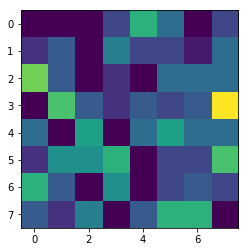

[[0. 0. 0. 2. 7. 4. 0. 7.]
 [5. 3. 0. 1. 2. 4. 7. 4.]
 [4. 5. 0. 5. 0. 4. 5. 3.]
 [0. 2. 8. 7. 7. 2. 4. 5.]
 [1. 0. 8. 0. 4. 5. 6. 9.]
 [6. 5. 6. 4. 2. 7. 1. 8.]
 [7. 9. 0. 7. 0. 4. 5. 6.]
 [6. 7. 3. 0. 9. 4. 9. 0.]]


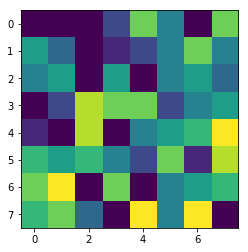

[[ 0.  0.  0.  5.  5.  2.  0.  9.]
 [ 1. 14.  0.  7.  5.  1.  4.  7.]
 [ 8.  8.  0.  6.  0.  4.  9.  1.]
 [ 0.  8.  3.  0.  4.  0.  7.  7.]
 [ 3.  0.  2.  0.  2.  2.  7.  8.]
 [ 4.  7.  7.  2.  6.  5.  3.  5.]
 [ 7.  3.  0.  0.  0. 10.  4. 10.]
 [ 8.  4.  6.  0.  6.  7.  4.  0.]]


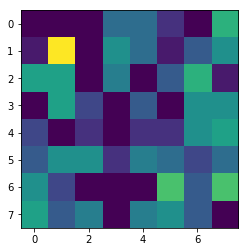

[[ 0.  0.  0.  5.  7.  1.  0.  5.]
 [ 6.  2.  0.  2.  5.  7.  8.  6.]
 [ 6.  4.  0.  8.  0.  0.  9.  0.]
 [ 0.  6. 10.  4. 14.  1. 12.  4.]
 [ 5.  0.  0.  0.  5.  6. 10. 11.]
 [ 4.  0.  4.  4.  5.  5.  2.  2.]
 [ 4.  2.  0.  2.  0. 10. 10.  3.]
 [ 8.  7.  6.  0.  3.  0.  4.  0.]]


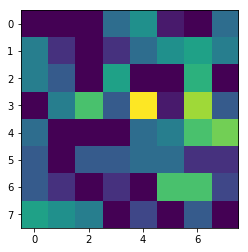

[[ 0.  0.  0.  5.  3.  6.  0.  8.]
 [ 2.  8.  0.  6.  2.  6.  3.  6.]
 [ 4.  5.  0.  4.  0.  5. 10.  7.]
 [ 0.  9. 11.  4.  7.  1.  6.  4.]
 [ 5.  0.  4.  0.  3.  5.  5.  7.]
 [ 6.  6.  0.  3.  6.  8.  3.  5.]
 [ 6.  2.  0.  4.  0.  9.  9.  3.]
 [ 4.  2.  5.  0.  3.  8.  4.  0.]]


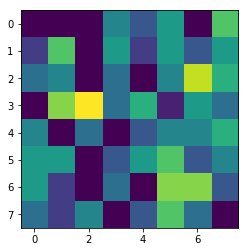

[[ 0.  0.  0.  4.  1.  6.  0.  8.]
 [ 0.  9.  0.  5.  1.  4.  4.  3.]
 [10.  8.  0.  7.  0. 10.  4.  4.]
 [ 0. 10.  4.  3.  1.  4.  6.  3.]
 [ 3.  0.  5.  0.  4.  7.  2.  6.]
 [ 2.  6.  3.  1.  6.  5.  6.  2.]
 [10.  3.  0.  5.  0.  8.  7.  9.]
 [ 6.  4.  3.  0.  8. 10.  4.  0.]]


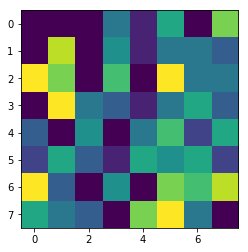

[[0. 0. 0. 3. 8. 4. 0. 8.]
 [4. 3. 0. 1. 3. 3. 7. 5.]
 [5. 6. 0. 5. 0. 3. 7. 3.]
 [0. 3. 7. 6. 7. 2. 5. 4.]
 [1. 0. 8. 0. 5. 3. 6. 8.]
 [5. 7. 7. 3. 3. 6. 1. 7.]
 [7. 7. 0. 7. 0. 4. 5. 5.]
 [6. 7. 5. 0. 8. 3. 8. 0.]]


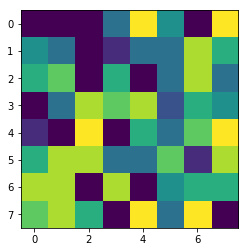

[[ 0.  0.  0.  6.  3.  0.  0.  9.]
 [ 3.  5.  0.  5.  3.  5.  1. 10.]
 [ 5. 10.  0.  8.  0.  0. 12.  6.]
 [ 0.  7.  7.  4.  8.  1.  7.  7.]
 [ 5.  0.  7.  0.  7.  3.  9.  5.]
 [11.  6.  3.  4.  6.  2.  3.  7.]
 [ 2.  3.  0.  2.  0.  9.  4.  2.]
 [ 0.  5.  8.  0.  4.  3.  2.  0.]]


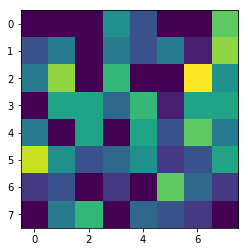

[[ 0.  0.  0.  3.  4.  6.  0.  4.]
 [ 4.  8.  0.  4.  3.  4.  2.  7.]
 [ 9.  3.  0.  3.  0.  5.  5.  1.]
 [ 0.  6.  4.  4.  3.  4. 11.  4.]
 [ 1.  0.  7.  0.  5.  6.  6.  4.]
 [ 5.  2.  7.  4.  2.  5.  3. 10.]
 [14.  6.  0. 10.  0.  3.  1. 11.]
 [ 4.  1.  3.  0.  8.  6.  9.  0.]]


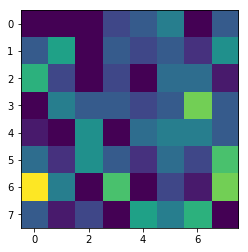

[[ 0.  0.  0.  3.  6.  4.  0.  5.]
 [ 0.  1.  0.  5.  5.  2.  2.  5.]
 [10.  6.  0. 10.  0.  6.  9.  0.]
 [ 0. 12.  1.  1.  5.  0.  8. 10.]
 [ 3.  0.  7.  0.  5.  7.  2. 11.]
 [ 3.  3.  8.  6.  1.  3.  2.  9.]
 [11.  0.  0.  2.  0.  4.  3.  6.]
 [ 5.  8.  9.  0.  2. 13. 10.  0.]]


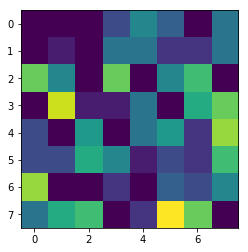

[[ 0.  0.  0.  2.  4.  7.  0.  9.]
 [ 5.  3.  0.  2.  1.  6.  6.  6.]
 [ 5.  3.  0.  2.  0.  5.  9.  7.]
 [ 0.  8. 14.  6.  8.  3. 10.  1.]
 [ 1.  0.  6.  0.  5.  3.  4.  7.]
 [ 9.  4.  1.  0.  4.  8.  1.  5.]
 [ 9.  4.  0.  8.  0.  4.  6.  5.]
 [ 5.  3.  6.  0.  7.  3.  5.  0.]]


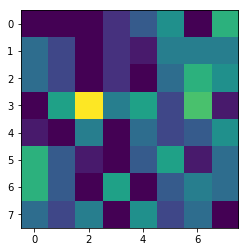

[[ 0.  0.  0.  4.  4.  6.  0.  6.]
 [ 5. 10.  0.  4.  2.  3.  3.  8.]
 [ 7.  3.  0.  4.  0.  3. 11.  1.]
 [ 0.  2.  6.  0.  3.  4.  9.  3.]
 [ 3.  0.  2.  0.  3.  3. 11.  3.]
 [ 3. 10. 13.  1.  3.  6.  1.  5.]
 [ 8.  8.  0.  6.  0.  3.  6. 10.]
 [ 9.  7.  9.  0.  3.  3.  5.  0.]]


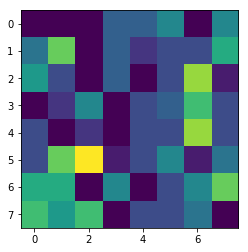

[[ 0.  0.  0.  4.  6.  3.  0.  5.]
 [ 2.  2.  0.  3.  3.  4.  5.  4.]
 [ 0.  6.  0. 10.  0.  2.  5.  1.]
 [ 0.  4.  6. 10.  6.  0.  2.  7.]
 [ 6.  0.  9.  0.  3.  6.  2. 12.]
 [ 8.  3.  3.  7.  3.  7.  2. 12.]
 [ 5.  7.  0.  3.  0.  7.  4.  4.]
 [ 1.  9.  1.  0.  6.  9. 12.  0.]]


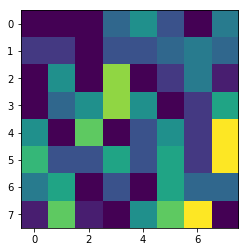

[[ 0.  0.  0.  6.  4.  2.  0.  9.]
 [ 2.  1.  0.  2.  3.  4.  1.  9.]
 [ 1.  9.  0.  9.  0.  3. 12.  3.]
 [ 0.  9.  7.  7.  6.  2. 11.  4.]
 [ 3.  0.  9.  0.  9.  1.  2.  9.]
 [ 9.  4.  4.  2.  5.  2.  4.  8.]
 [ 4.  2.  0.  4.  0.  7.  3.  5.]
 [ 0. 10.  7.  0.  5.  5.  4.  0.]]


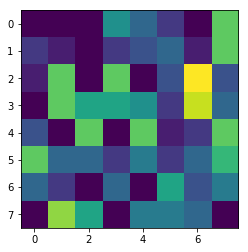

[[ 0.  0.  0.  0.  3.  1.  0.  6.]
 [ 2.  3.  0.  5.  1.  3.  3.  4.]
 [ 2.  5.  0. 10.  0.  0.  6.  3.]
 [ 0.  6.  6.  6.  4.  0.  2. 11.]
 [ 8.  0.  8.  0.  3. 10.  6. 11.]
 [11.  3.  3.  8.  2.  7.  1. 15.]
 [ 4.  6.  0.  1.  0.  8.  5.  5.]
 [ 2.  6.  5.  0.  3. 10.  9.  0.]]


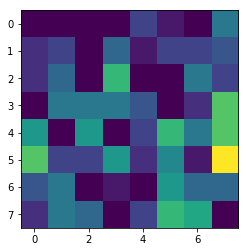

[[ 0.  0.  0.  7.  7.  3.  0.  8.]
 [ 4.  4.  0.  2.  4.  6.  9.  6.]
 [ 6.  7.  0.  8.  0.  2.  6.  0.]
 [ 0.  3.  6.  7. 10.  4.  9.  1.]
 [ 0.  0.  6.  0.  5.  0.  7.  6.]
 [ 6.  3.  6.  1.  9.  4.  4.  3.]
 [ 8.  4.  0.  3.  0.  5.  2.  6.]
 [ 4.  9.  4.  0. 11.  3.  7.  0.]]


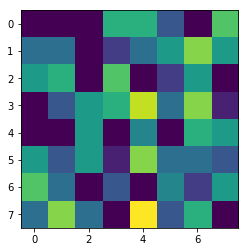

[[ 0.  0.  0.  7.  9.  5.  0.  5.]
 [ 4.  3.  0.  1.  4.  7. 10.  5.]
 [ 5.  6.  0.  8.  0.  4.  6.  0.]
 [ 0.  2.  7.  7. 10.  4.  6.  2.]
 [ 0.  0.  6.  0.  4.  1.  5.  7.]
 [ 3.  4.  7.  2.  7.  5.  3.  2.]
 [ 7.  6.  0.  4.  0.  6.  5.  4.]
 [ 4. 10.  2.  0.  9.  5.  8.  0.]]


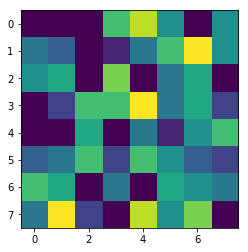

[[ 0.  0.  0.  5.  5.  5.  0.  7.]
 [ 4.  4.  0.  3.  1.  7.  7.  4.]
 [ 7.  5.  0.  4.  0.  3.  5.  5.]
 [ 0.  5.  8.  8. 10.  3.  7.  4.]
 [ 0.  0.  7.  0.  2.  4.  7.  4.]
 [ 8.  3.  3.  3.  5.  6.  2.  6.]
 [10.  6.  0.  6.  0.  4.  3.  7.]
 [ 4.  3.  4.  0.  9.  4.  9.  0.]]


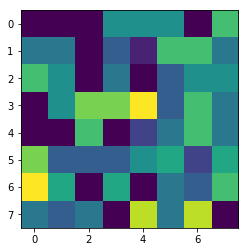

[[ 0.  0.  0.  6.  5.  5.  0.  7.]
 [ 2.  9.  0.  5.  2.  4.  5.  8.]
 [ 5.  6.  0.  6.  0.  2. 11.  3.]
 [ 0.  4.  9.  2.  6.  0.  5.  1.]
 [ 5.  0.  4.  0.  3.  3.  8.  6.]
 [ 5.  9.  4.  2.  7.  9.  1.  5.]
 [ 6.  5.  0.  3.  0.  9.  8.  4.]
 [ 3.  6.  4.  0.  3.  6.  6.  0.]]


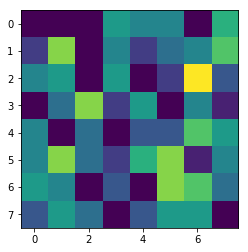

[[ 0.  0.  0.  3.  1.  6.  0.  7.]
 [ 1.  9.  0.  5.  1.  4.  5.  3.]
 [11.  8.  0.  7.  0. 11.  2.  3.]
 [ 0.  9.  4.  4.  1.  5.  6.  2.]
 [ 2.  0.  6.  0.  5.  7.  2.  5.]
 [ 2.  6.  3.  0.  7.  4.  6.  2.]
 [11.  3.  0.  7.  0.  7.  6.  9.]
 [ 6.  4.  2.  0. 10. 10.  4.  0.]]


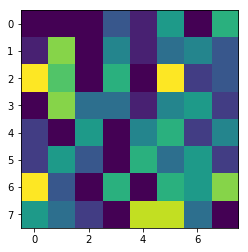

[[ 0.  0.  0.  1.  4.  3.  0.  5.]
 [ 0.  1.  0.  3.  1.  4.  7.  0.]
 [ 7.  7.  0. 15.  0.  9.  1.  0.]
 [ 0.  6.  3.  5.  3.  4.  1.  5.]
 [ 3.  0. 10.  0.  6.  9.  0.  9.]
 [ 7.  6.  5.  5.  5.  4.  4.  7.]
 [ 9.  3.  0.  3.  0.  4.  6.  6.]
 [ 1. 12.  3.  0. 10. 14. 10.  0.]]


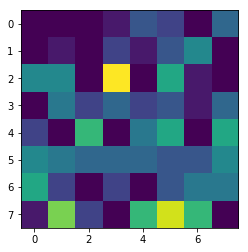

[[ 0.  0.  0.  3.  0.  6.  0.  4.]
 [ 1.  5.  0.  4.  1.  5.  4.  2.]
 [10.  7.  0. 10.  0. 11.  1.  2.]
 [ 0.  7.  4.  4.  2.  6.  6.  0.]
 [ 1.  0.  9.  0.  8.  8.  1.  4.]
 [ 4.  6.  3.  2.  6.  4.  6.  5.]
 [12.  2.  0. 10.  0.  4.  5.  9.]
 [ 1.  4.  2.  0. 11. 13.  7.  0.]]


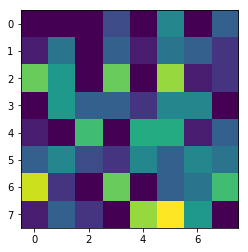

[[ 0.  0.  0.  5.  3.  6.  0.  6.]
 [ 3. 13.  0.  5.  3.  2.  3.  8.]
 [ 6.  5.  0.  5.  0.  5. 12.  2.]
 [ 0.  4.  6.  0.  2.  2.  9.  2.]
 [ 2.  0.  2.  0.  2.  4.  8.  5.]
 [ 4.  8.  9.  0.  5.  7.  1.  5.]
 [ 9.  5.  0.  4.  0.  7.  6. 11.]
 [ 9.  5.  8.  0.  3.  6.  5.  0.]]


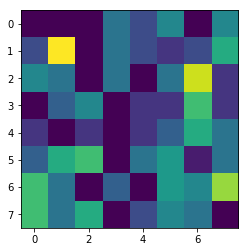

[[ 0.  0.  0.  4.  4.  2.  0. 11.]
 [ 2.  2.  0.  3.  3.  3.  4.  8.]
 [ 6.  9.  0.  7.  0.  1. 10.  5.]
 [ 0.  8.  6.  4.  7.  0. 10.  5.]
 [ 1.  0.  9.  0.  6.  3.  6.  8.]
 [10.  6.  3.  2.  4.  4.  2.  8.]
 [ 6.  2.  0.  4.  0.  6.  3.  6.]
 [ 3.  6.  9.  0.  5.  5.  5.  0.]]


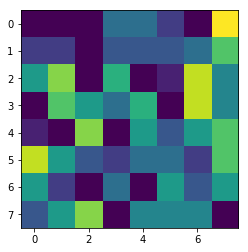

[[ 0.  0.  0.  2.  5.  3.  0.  9.]
 [ 3.  3.  0.  6.  0.  6.  3.  4.]
 [ 6.  4.  0.  5.  0.  2.  6.  9.]
 [ 0. 12.  8.  7.  8.  2.  3. 12.]
 [ 6.  0.  7.  0.  4.  6.  6.  6.]
 [10.  5.  0.  7.  5.  6.  3.  9.]
 [ 5.  3.  0.  3.  0.  7.  4.  0.]
 [ 0.  2.  4.  0.  5.  6.  6.  0.]]


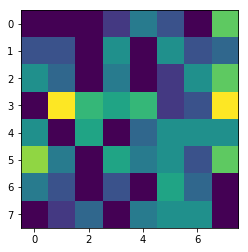

[[ 0.  0.  0.  0.  6.  4.  0.  9.]
 [ 4.  1.  0.  4.  3.  1.  5.  3.]
 [12.  2.  0.  6.  0.  3.  3.  0.]
 [ 0.  9.  3.  3.  4.  3. 10.  8.]
 [ 2.  0.  6.  0.  4.  7.  7.  9.]
 [ 5.  5.  8.  4.  1.  4.  2. 11.]
 [11.  3.  0.  6.  0.  0.  3.  8.]
 [ 7.  3.  8.  0.  7.  7. 10.  0.]]


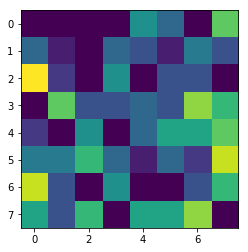

[[ 0.  0.  0.  4.  4.  6.  0.  7.]
 [ 4.  7.  0.  3.  1.  4.  3.  9.]
 [ 5.  5.  0.  4.  0.  4. 13.  5.]
 [ 0.  3. 10.  0.  4.  2.  7.  1.]
 [ 3.  0.  6.  0.  5.  4.  8.  3.]
 [ 5. 11.  7.  1.  4.  7.  0.  5.]
 [ 5.  6.  0.  8.  0.  5.  9.  5.]
 [ 5.  7.  8.  0.  2.  4.  4.  0.]]


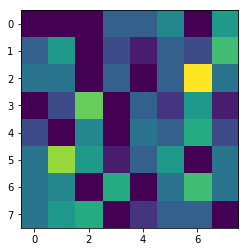

[[ 0.  0.  0.  3.  4.  4.  0. 10.]
 [ 2.  5.  0.  4.  1.  5.  7.  6.]
 [ 6.  7.  0.  8.  0.  3.  7.  4.]
 [ 0.  7.  8.  5.  7.  0.  5.  4.]
 [ 3.  0.  6.  0.  3.  4.  5.  8.]
 [ 9.  6.  1.  3.  7.  8.  2.  6.]
 [ 8.  3.  0.  2.  0.  9.  6.  5.]
 [ 2.  5.  3.  0.  6.  7.  7.  0.]]


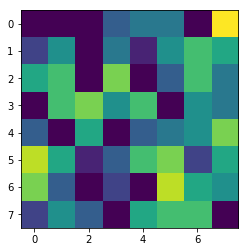

[[ 0.  0.  0.  1.  7.  4.  0.  7.]
 [ 5.  2.  0.  1.  3.  3.  8.  4.]
 [ 4.  5.  0.  4.  0.  4.  4.  2.]
 [ 0.  3.  8.  7.  7.  1.  5.  4.]
 [ 1.  0.  9.  0.  4.  6.  4. 10.]
 [ 6.  5.  6.  3.  1.  7.  1.  8.]
 [ 7.  8.  0.  8.  0.  4.  5.  6.]
 [ 6.  7.  4.  0.  9.  4. 10.  0.]]


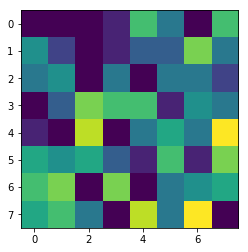

[[ 0.  0.  0.  3.  5.  3.  0.  4.]
 [ 3.  2.  0.  2.  2.  6.  7.  5.]
 [ 4.  3.  0. 11.  0.  3.  7.  0.]
 [ 0.  6.  8.  4.  6.  1.  7.  5.]
 [ 7.  0.  3.  0.  4.  7.  5. 12.]
 [ 5.  2.  6.  4.  5.  7.  2.  6.]
 [ 6.  3.  0.  1.  0.  8. 11.  4.]
 [ 6. 12.  5.  0.  3.  7.  7.  0.]]


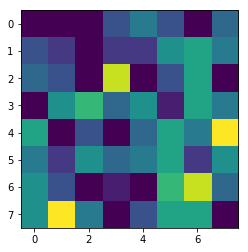

[[ 0.  0.  0.  3.  4.  7.  0.  5.]
 [ 4. 13.  0.  6.  3.  2.  2.  8.]
 [10.  5.  0.  0.  0.  6.  9.  5.]
 [ 0.  6.  7.  0.  3.  3.  7.  4.]
 [ 1.  0.  5.  0.  5.  5.  6.  2.]
 [ 3.  7.  6.  2.  2.  7.  1.  5.]
 [11.  6.  0.  9.  0.  7.  4. 10.]
 [ 7.  0.  4.  0.  6.  5.  5.  0.]]


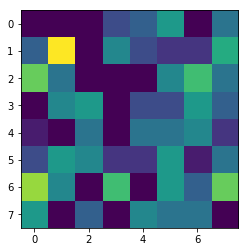

[[ 0.  0.  0.  4.  2.  6.  0.  8.]
 [ 2.  9.  0.  5.  2.  4.  6.  2.]
 [11.  7.  0.  7.  0. 11.  2.  4.]
 [ 0. 10.  4.  4.  2.  5.  6.  3.]
 [ 5.  0.  3.  0.  4.  7.  2.  7.]
 [ 0.  6.  3.  1.  7.  4.  7.  0.]
 [ 8.  3.  0.  6.  0.  8.  9.  8.]
 [ 9.  4.  2.  0.  9.  8.  3.  0.]]


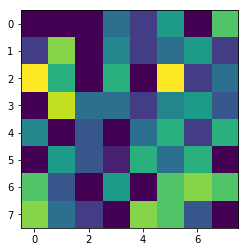

epoch [1/2], loss:0.1149, MSE_loss:0.0355


E:\Installations\Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:105: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[[ 0.  0.  0.  4.  2.  1.  0.  8.]
 [ 5.  5.  0.  6.  1.  8.  7.  2.]
 [ 4.  3.  0.  8.  0.  1.  6.  4.]
 [ 0.  7. 10.  5. 12.  1.  4.  7.]
 [ 9.  0.  1.  0.  1.  9.  8.  7.]
 [ 9.  2.  0.  6.  6.  6.  4.  5.]
 [ 2.  1.  0.  1.  0. 10. 12.  2.]
 [ 6.  3.  7.  0.  3.  6.  5.  0.]]


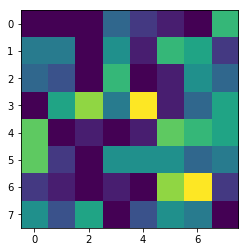

[[ 0.  0.  0.  4.  2.  3.  0. 10.]
 [ 3.  5.  0.  3.  3.  3.  3.  9.]
 [ 6.  6.  0.  7.  0.  2. 15.  3.]
 [ 0.  5.  9.  0.  6.  0. 11.  0.]
 [ 5.  0.  3.  0.  5.  4. 10.  8.]
 [ 6.  9.  6.  0.  5.  7.  1.  5.]
 [ 5.  4.  0.  4.  0.  7.  9.  6.]
 [ 6.  7. 10.  0.  0.  4.  3.  0.]]


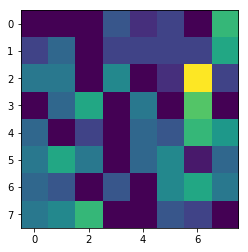

[[ 0.  0.  0.  5.  9.  4.  0.  9.]
 [ 7.  3.  0.  2.  3.  4. 10.  6.]
 [ 5.  6.  0.  3.  0.  0.  3.  3.]
 [ 0.  1.  5.  8.  9.  3.  5.  5.]
 [ 0.  0. 10.  0.  3.  1.  8.  4.]
 [ 7.  7.  6.  3.  5.  5.  2.  8.]
 [ 7.  8.  0.  7.  0.  2.  1.  5.]
 [ 4.  6.  4.  0. 11.  1. 11.  0.]]


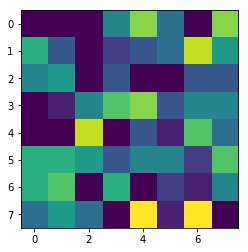

[[ 0.  0.  0.  3.  9.  6.  0.  6.]
 [ 3.  2.  0.  6.  1.  4.  5.  4.]
 [13.  3.  0.  5.  0.  5.  2.  4.]
 [ 0.  8.  3.  2.  5.  6.  1. 10.]
 [ 4.  0.  8.  0.  5.  6.  6.  2.]
 [ 3. 12.  6.  7.  4.  4.  3.  8.]
 [10.  3.  0.  7.  0.  1.  4.  1.]
 [ 0.  5.  3.  0.  8.  9. 11.  0.]]


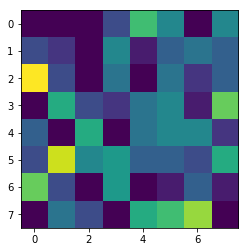

[[ 0.  0.  0.  4.  4.  3.  0.  7.]
 [ 4.  4.  0.  3.  1.  6.  9.  5.]
 [ 8.  7.  0.  8.  0.  1.  5.  1.]
 [ 0.  3.  6.  5.  8.  2.  8.  4.]
 [ 1.  0.  7.  0.  3.  5.  7.  4.]
 [10.  2.  4.  3.  7.  6.  2.  6.]
 [ 9.  5.  0.  3.  0.  7.  4.  8.]
 [ 2.  6.  4.  0.  9.  5.  8.  0.]]


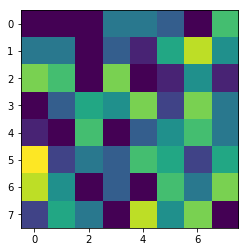

[[ 0.  0.  0.  2.  7.  7.  0.  5.]
 [ 2.  2.  0.  5.  0.  6.  3.  2.]
 [11.  2.  0.  4.  0.  8.  5.  8.]
 [ 0. 11.  7.  4.  6.  5.  3. 11.]
 [ 5.  0.  6.  0.  5.  8.  4.  4.]
 [ 2.  7.  4.  7.  3.  5.  3.  6.]
 [ 9.  3.  0.  6.  0.  3.  7.  1.]
 [ 4.  3.  4.  0.  5.  9.  7.  0.]]


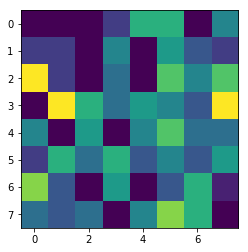

[[ 0.  0.  0.  4.  5.  3.  0.  8.]
 [ 2.  2.  0.  4.  1.  6.  7.  6.]
 [ 8.  5.  0.  9.  0.  0.  9.  1.]
 [ 0.  8.  7.  2. 10.  0.  7.  7.]
 [ 6.  0.  3.  0.  3.  7.  8.  8.]
 [ 6.  4.  3.  4.  6.  7.  1.  6.]
 [ 7.  2.  0.  1.  0.  9.  9.  2.]
 [ 4.  8.  6.  0.  1.  6.  8.  0.]]


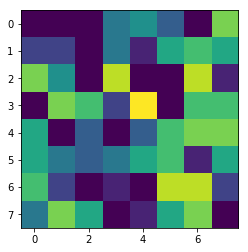

[[0. 0. 0. 2. 5. 4. 0. 7.]
 [3. 2. 0. 2. 2. 6. 6. 6.]
 [8. 7. 0. 6. 0. 3. 7. 4.]
 [0. 7. 8. 6. 9. 1. 8. 5.]
 [1. 0. 7. 0. 5. 7. 6. 7.]
 [7. 1. 4. 4. 4. 6. 1. 6.]
 [9. 6. 0. 5. 0. 7. 5. 5.]
 [4. 5. 3. 0. 6. 4. 7. 0.]]


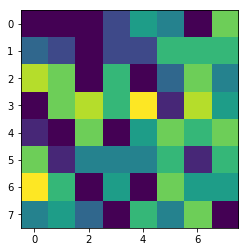

[[ 0.  0.  0.  4.  7.  6.  0.  7.]
 [ 7.  4.  0.  1.  2.  5.  8.  7.]
 [ 6.  3.  0.  3.  0.  4.  7.  2.]
 [ 0.  4. 11.  5.  7.  5.  9.  1.]
 [ 1.  0.  6.  0.  6.  2.  5.  6.]
 [ 6.  5.  6.  1.  4.  7.  2.  4.]
 [ 8.  7.  0.  9.  0.  5.  6.  5.]
 [ 5.  7.  2.  0.  9.  0.  7.  0.]]


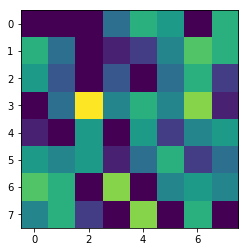

[[ 0.  0.  0.  5.  9.  4.  0.  5.]
 [ 4.  2.  0.  6.  2.  4.  7.  5.]
 [ 9.  3.  0.  6.  0.  1.  1.  0.]
 [ 0.  6.  0.  5.  5.  4.  6. 11.]
 [ 2.  0. 10.  0.  1.  5.  6.  3.]
 [ 7.  5.  6.  7.  3.  3.  4. 12.]
 [12.  1.  0.  4.  0.  0.  0.  6.]
 [ 1.  5.  8.  0.  8. 10. 15.  0.]]


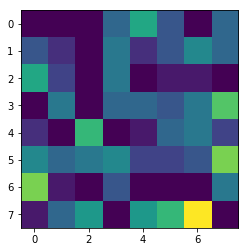

[[ 0.  0.  0.  4.  3.  6.  0.  7.]
 [ 3. 12.  0.  5.  3.  2.  3.  7.]
 [ 9.  5.  0.  3.  0.  5.  9.  3.]
 [ 0.  5.  5.  1.  3.  2.  9.  3.]
 [ 2.  0.  3.  0.  2.  4.  8.  5.]
 [ 4.  6.  8.  1.  4.  7.  2.  6.]
 [10.  6.  0.  6.  0.  6.  5. 11.]
 [ 9.  3.  6.  0.  5.  5.  6.  0.]]


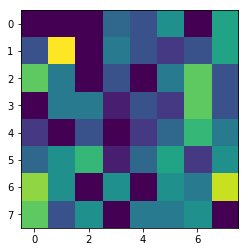

[[ 0.  0.  0.  7.  5.  7.  0.  3.]
 [ 5. 14.  0.  8.  3.  3.  0.  9.]
 [ 5.  5.  0.  0.  0.  3.  9.  7.]
 [ 0.  7.  5.  4.  2.  3.  7.  8.]
 [ 3.  0.  8.  0.  3.  3.  3.  0.]
 [ 7.  5.  4.  5.  2.  5.  2. 10.]
 [10.  4.  0.  8.  0.  5.  1.  9.]
 [ 3.  0.  6.  0.  5.  7.  8.  0.]]


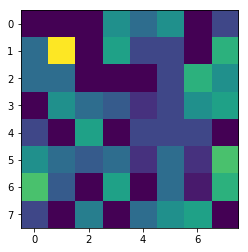

[[ 0.  0.  0.  1.  3.  4.  0.  9.]
 [ 2.  1.  0.  2.  2.  3.  2.  8.]
 [ 7.  7.  0.  5.  0.  2. 11.  5.]
 [ 0. 10.  8.  4.  7.  0. 11.  6.]
 [ 2.  0.  7.  0.  7.  6.  5.  9.]
 [ 8.  3.  4.  3.  2.  6.  1.  9.]
 [ 8.  4.  0.  6.  0.  6.  4.  5.]
 [ 4.  5.  7.  0.  3.  4.  6.  0.]]


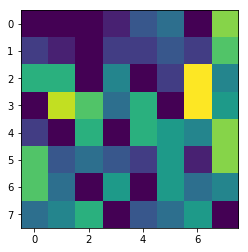

[[ 0.  0.  0.  3.  4.  5.  0.  8.]
 [ 2.  5.  0.  4.  2.  4.  5.  6.]
 [ 7.  2.  0.  9.  0.  3. 10.  1.]
 [ 0.  7.  8.  1.  5.  1.  9.  2.]
 [ 5.  0.  1.  0.  3.  4.  8. 10.]
 [ 5.  7.  7.  2.  6.  8.  1.  6.]
 [ 8.  3.  0.  2.  0.  6.  8.  5.]
 [ 6.  7.  7.  0.  2.  8.  6.  0.]]


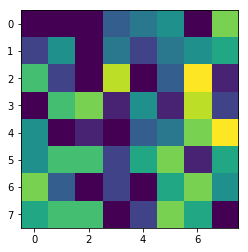

[[ 0.  0.  0.  8.  6.  6.  0.  3.]
 [ 6.  2.  0.  4.  2.  7.  2.  8.]
 [ 0.  1.  0.  4.  0.  1.  7.  1.]
 [ 0.  6.  8. 11.  5.  5. 13.  5.]
 [ 5.  0.  9.  0.  5.  0.  2.  5.]
 [ 7.  2.  5.  3.  4.  3.  5. 12.]
 [ 7.  3.  0.  8.  0.  0.  2.  3.]
 [ 1.  8.  8.  0.  5.  7. 10.  0.]]


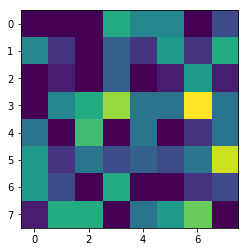

[[ 0.  0.  0.  7.  3.  4.  0.  8.]
 [ 4.  7.  0.  7.  1.  7.  6.  2.]
 [ 5.  3.  0.  8.  0.  5.  4.  4.]
 [ 0.  8.  8.  5.  9.  3.  3.  6.]
 [10.  0.  0.  0.  0.  8.  7.  7.]
 [ 4.  5.  1.  4.  7.  6.  5.  2.]
 [ 3.  2.  0.  2.  0.  9. 12.  3.]
 [ 8.  4.  6.  0.  3.  7.  5.  0.]]


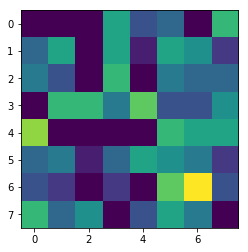

[[ 0.  0.  0.  2.  5.  3.  0.  6.]
 [ 1.  1.  0.  3.  2.  2.  6.  1.]
 [ 9.  5.  0. 11.  0.  4.  4.  0.]
 [ 0.  6.  2.  3.  6.  2.  6. 10.]
 [ 1.  0.  8.  0.  1.  7.  7.  8.]
 [ 7.  3. 10.  6.  2.  3.  2. 10.]
 [10.  4.  0.  0.  0.  1.  3. 10.]
 [ 7.  9. 10.  0.  6. 11. 10.  0.]]


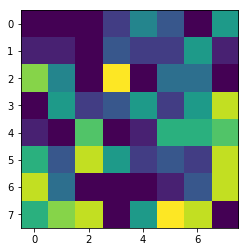

[[ 0.  0.  0.  4.  4.  4.  0. 10.]
 [ 2.  7.  0.  5.  1.  5.  7.  4.]
 [ 5.  5.  0.  7.  0.  3.  7.  4.]
 [ 0.  8.  8.  4.  8.  1.  4.  4.]
 [ 6.  0.  2.  0.  1.  5.  6.  9.]
 [ 6.  6.  1.  2.  7.  8.  3.  4.]
 [ 5.  2.  0.  2.  0.  9. 10.  4.]
 [ 6.  5.  6.  0.  4.  6.  6.  0.]]


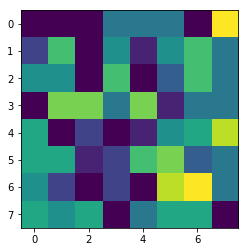

[[ 0.  0.  0.  4.  9.  3.  0.  6.]
 [ 8.  3.  0.  0.  6.  5. 13.  5.]
 [ 5.  7.  0.  4.  0.  0.  2.  0.]
 [ 0.  3.  7.  8. 12.  2.  7.  3.]
 [ 1.  0.  8.  0.  4.  4.  3. 10.]
 [ 6.  0.  2.  2.  5.  7.  2.  5.]
 [ 8.  6.  0.  6.  0.  8.  4.  6.]
 [ 5.  6.  0.  0. 12.  0. 11.  0.]]


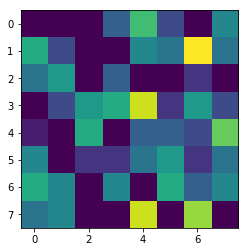

[[ 0.  0.  0.  2.  5.  6.  0.  6.]
 [ 4.  9.  0.  4.  2.  2.  5.  6.]
 [10.  2.  0.  4.  0.  4.  7.  1.]
 [ 0.  4.  4.  0.  2.  3.  9.  4.]
 [ 1.  0.  4.  0.  3.  4.  9.  3.]
 [ 5.  7. 11.  2.  4.  7.  1.  8.]
 [12.  7.  0.  5.  0.  2.  3. 11.]
 [ 7.  5.  6.  0.  6.  6.  9.  0.]]


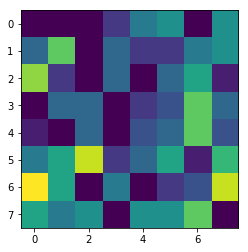

[[ 0.  0.  0.  2.  7.  4.  0.  9.]
 [ 3.  2.  0.  3.  2.  2.  6.  4.]
 [10.  5.  0.  5.  0.  3.  4.  5.]
 [ 0.  6.  3.  4.  5.  3.  3.  8.]
 [ 3.  0.  9.  0.  4.  6.  8.  5.]
 [ 5. 10.  6.  5.  3.  5.  1. 10.]
 [ 9.  6.  0.  7.  0.  2.  3.  4.]
 [ 3.  5.  5.  0.  7.  6. 11.  0.]]


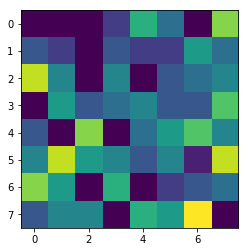

[[ 0.  0.  0.  1.  9.  3.  0. 10.]
 [ 8.  4.  0.  4.  5.  0. 12.  1.]
 [ 4.  1.  0.  4.  0.  2.  0.  0.]
 [ 0.  4.  5.  6.  4.  2.  5.  5.]
 [ 5.  0.  9.  0.  2.  4.  3. 12.]
 [ 8.  8.  5.  1.  2.  7.  3. 12.]
 [ 7.  3.  0.  5.  0.  1.  5.  7.]
 [ 7.  8.  5.  0. 11.  5. 14.  0.]]


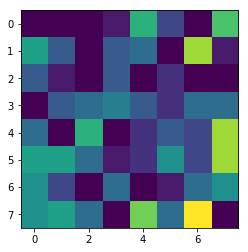

[[ 0.  0.  0.  6.  8.  5.  0.  6.]
 [ 3.  1.  0.  1.  4.  6.  9.  5.]
 [ 7.  7.  0.  6.  0.  5.  7.  2.]
 [ 0.  4.  8.  6. 11.  2.  6.  3.]
 [ 0.  0.  8.  0.  5.  4.  4.  8.]
 [ 4.  4.  6.  3.  4.  5.  2.  2.]
 [ 8.  4.  0.  5.  0.  6.  5.  4.]
 [ 5.  8.  4.  0.  7.  4.  8.  0.]]


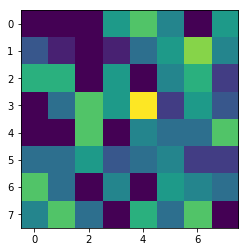

[[ 0.  0.  0.  3.  0.  6.  0.  5.]
 [ 1.  6.  0.  4.  1.  4.  4.  3.]
 [10.  7.  0. 10.  0. 10.  2.  3.]
 [ 0.  6.  4.  4.  1.  6.  7.  0.]
 [ 2.  0.  9.  0.  8.  9.  2.  4.]
 [ 6.  6.  3.  2.  6.  4.  7.  5.]
 [11.  2.  0.  9.  0.  5.  5.  9.]
 [ 1.  4.  2.  0. 10. 13.  5.  0.]]


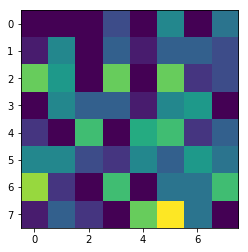

[[ 0.  0.  0.  6.  5.  7.  0.  5.]
 [ 5.  3.  0.  3.  1.  9.  8.  3.]
 [ 7.  4.  0.  3.  0.  5.  4.  5.]
 [ 0.  5.  8.  9. 11.  6.  8.  3.]
 [ 0.  0.  7.  0.  3.  4.  6.  2.]
 [ 6.  2.  2.  4.  6.  6.  3.  4.]
 [11.  5.  0.  8.  0.  3.  4.  6.]
 [ 4.  3.  4.  0.  9.  4.  9.  0.]]


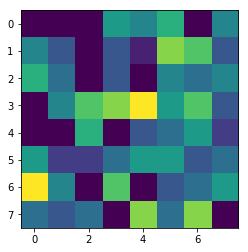

[[ 0.  0.  0.  1.  4.  3.  0.  7.]
 [ 3.  5.  0.  6.  5.  0.  3.  3.]
 [ 2.  2.  0.  7.  0.  1.  8.  0.]
 [ 0.  7.  5.  2.  0.  0.  9.  8.]
 [ 8.  0.  7.  0.  3.  5.  4. 13.]
 [ 9.  5.  7.  4.  1.  6.  2. 17.]
 [ 7.  0.  0.  2.  0.  2.  4.  8.]
 [ 6.  7. 12.  0.  1. 12. 10.  0.]]


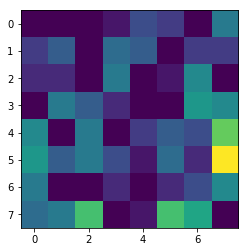

[[ 0.  0.  0.  4.  6.  6.  0. 10.]
 [ 7.  5.  0.  3.  1.  6.  5.  5.]
 [ 3.  1.  0.  1.  0.  4.  6.  6.]
 [ 0.  8. 12. 10.  8.  5. 10.  3.]
 [ 1.  0.  5.  0.  4.  0.  4.  6.]
 [ 9.  4.  4.  0.  6.  7.  3.  7.]
 [ 8.  5.  0.  6.  0.  2.  3.  5.]
 [ 6.  5.  5.  0.  9.  2.  6.  0.]]


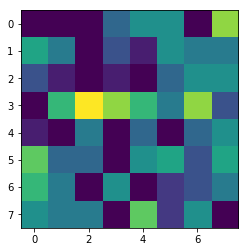

[[ 0.  0.  0.  2.  9.  5.  0.  7.]
 [ 7.  3.  0.  1.  5.  3. 10.  5.]
 [ 6.  4.  0.  2.  0.  4.  3.  1.]
 [ 0.  2.  7.  7.  7.  3.  6.  4.]
 [ 1.  0.  9.  0.  5.  4.  4.  9.]
 [ 4.  7.  7.  2.  1.  7.  1.  7.]
 [ 8.  7.  0. 10.  0.  3.  4.  5.]
 [ 7.  6.  3.  0. 10.  2. 11.  0.]]


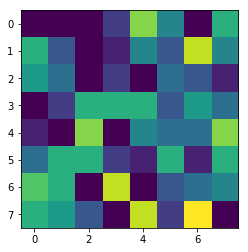

[[ 0.  0.  0.  5.  2.  5.  0.  9.]
 [ 1.  9.  0.  6.  1.  5.  5.  2.]
 [ 7.  6.  0.  8.  0.  9.  4.  5.]
 [ 0. 10.  5.  4.  3.  3.  3.  5.]
 [ 7.  0.  2.  0.  1.  6.  3.  7.]
 [ 2.  8.  1.  2.  8.  6.  6.  2.]
 [ 6.  2.  0.  3.  0.  9. 10.  6.]
 [ 8.  5.  5.  0.  5.  9.  4.  0.]]


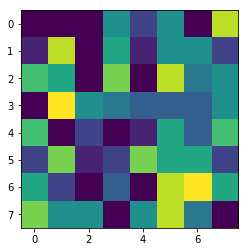

[[ 0.  0.  0.  4.  1.  4.  0.  9.]
 [ 2. 12.  0.  5.  5.  2.  3.  6.]
 [ 6.  7.  0.  6.  0.  5.  9.  4.]
 [ 0.  9.  6.  3.  3.  1. 10.  1.]
 [ 4.  0.  2.  0.  3.  3.  6.  9.]
 [ 5.  5.  4.  0.  6.  7.  4.  4.]
 [ 7.  4.  0.  4.  0.  9.  6. 11.]
 [ 9.  2.  5.  0.  4.  6.  2.  0.]]


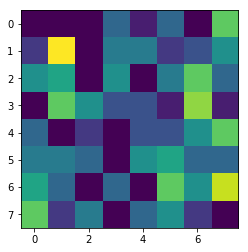

[[ 0.  0.  0.  3.  5.  1.  0.  7.]
 [ 0.  6.  0.  3.  3.  2. 10.  2.]
 [ 8. 11.  0. 12.  0.  5.  5.  0.]
 [ 0.  5.  2.  1.  7.  0.  2.  9.]
 [ 2.  0.  8.  0.  1.  8.  3.  9.]
 [ 6.  4.  5.  3.  5.  4.  2.  3.]
 [ 7.  2.  0.  0.  0. 10.  7.  9.]
 [ 6. 10.  7.  0.  7.  9.  7.  0.]]


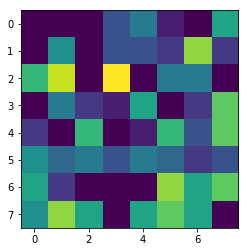

[[ 0.  0.  0.  2.  4.  4.  0.  4.]
 [ 1.  3.  0.  5.  1.  5.  2.  4.]
 [ 6.  4.  0.  8.  0.  2.  6.  5.]
 [ 0.  7.  6.  6.  6.  1.  3. 10.]
 [ 7.  0.  7.  0.  4.  9.  6.  7.]
 [ 7.  4.  4.  9.  3.  7.  2. 12.]
 [ 7.  7.  0.  5.  0.  6.  4.  3.]
 [ 2.  3.  3.  0.  3. 11.  9.  0.]]


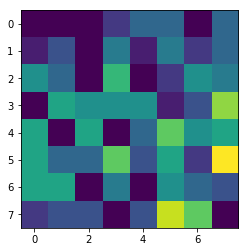

[[ 0.  0.  0.  2.  5.  4.  0.  4.]
 [ 0.  1.  0.  3.  3.  3.  5.  4.]
 [ 8.  7.  0. 12.  0.  7.  5.  0.]
 [ 0.  9.  3.  4.  4.  2.  5.  8.]
 [ 3.  0. 11.  0.  7.  7.  0.  9.]
 [ 6.  3.  5.  6.  4.  4.  4.  9.]
 [10.  1.  0.  2.  0.  6.  3.  5.]
 [ 0.  8.  4.  0.  6. 13. 10.  0.]]


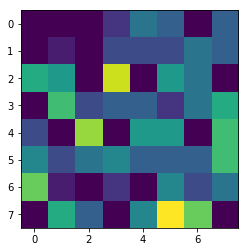

[[ 0.  0.  0.  1.  2.  6.  0.  4.]
 [ 2.  6.  0.  4.  0.  4.  2.  5.]
 [ 9.  6.  0.  6.  0.  8.  5.  7.]
 [ 0.  7.  8.  3.  2.  4.  4.  5.]
 [ 2.  0. 11.  0.  9.  7.  2.  4.]
 [ 7.  7.  4.  4.  3.  5.  4.  8.]
 [10.  4.  0.  9.  0.  6.  3.  5.]
 [ 0.  1.  3.  0.  8. 12.  5.  0.]]


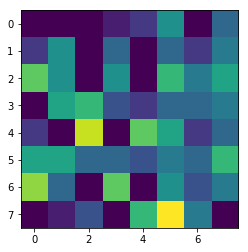

[[ 0.  0.  0.  6.  2.  4.  0.  7.]
 [ 2.  9.  0.  5.  1.  4.  3.  7.]
 [ 3.  8.  0.  7.  0.  4. 11.  8.]
 [ 0.  6.  9.  4.  5.  1.  5.  4.]
 [ 2.  0.  8.  0.  4.  3.  5.  4.]
 [10.  8.  2.  2.  6.  6.  3.  6.]
 [ 6.  3.  0.  3.  0.  8.  5.  7.]
 [ 2.  4.  9.  0.  4. 10.  4.  0.]]


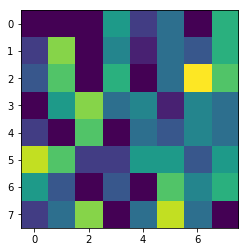

[[ 0.  0.  0.  2. 11.  4.  0. 10.]
 [ 9.  3.  0.  3.  5.  2. 14.  2.]
 [ 5.  1.  0.  3.  0.  2.  0.  0.]
 [ 0.  3.  6.  7.  6.  3.  6.  4.]
 [ 3.  0.  8.  0.  2.  2.  3. 11.]
 [ 6.  7.  6.  0.  4.  7.  3.  8.]
 [ 8.  4.  0.  6.  0.  1.  4.  6.]
 [ 7.  9.  4.  0. 12.  3. 13.  0.]]


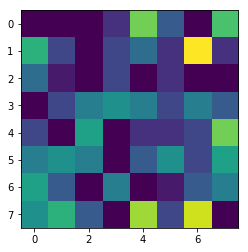

[[ 0.  0.  0.  8.  5.  6.  0.  5.]
 [ 6.  8.  0.  4.  2.  8.  8.  3.]
 [ 6.  4.  0.  1.  0.  6.  5.  6.]
 [ 0.  4. 10.  6. 12.  5.  7.  3.]
 [ 0.  0.  6.  0.  3.  3.  6.  2.]
 [ 5.  4.  3.  2.  6.  5.  4.  0.]
 [ 7.  3.  0.  7.  0.  4.  7.  6.]
 [ 7.  2.  6.  0.  8.  4.  5.  0.]]


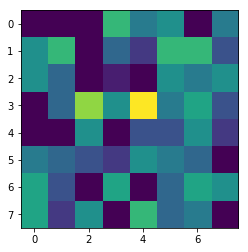

[[ 0.  0.  0.  5.  3.  6.  0.  8.]
 [ 4. 10.  0.  4.  3.  2.  3.  8.]
 [ 4.  6.  0.  3.  0.  4. 13.  6.]
 [ 0.  3.  9.  0.  3.  2.  7.  0.]
 [ 4.  0.  5.  0.  4.  4.  7.  4.]
 [ 5. 11.  7.  0.  3.  7.  1.  5.]
 [ 5.  5.  0.  7.  0.  6.  9.  8.]
 [ 7.  6. 10.  0.  1.  5.  4.  0.]]


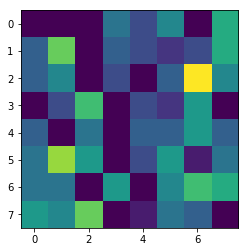

[[ 0.  0.  0.  3.  0.  5.  0.  5.]
 [ 2.  8.  0.  4.  0.  4.  5.  2.]
 [11.  8.  0. 10.  0. 10.  1.  3.]
 [ 0.  7.  4.  4.  0.  6.  5.  1.]
 [ 3.  0.  9.  0.  8.  8.  2.  3.]
 [ 5.  7.  2.  1.  7.  3.  8.  4.]
 [11.  2.  0.  9.  0.  6.  5.  9.]
 [ 1.  3.  2.  0. 11. 13.  4.  0.]]


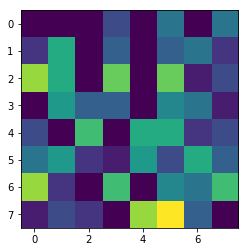

[[ 0.  0.  0.  4.  4.  2.  0. 10.]
 [ 3.  1.  0.  2.  1.  4.  4.  7.]
 [ 5.  8.  0.  8.  0.  0. 10.  4.]
 [ 0.  8.  6.  5.  7.  1. 10.  8.]
 [ 2.  0.  9.  0.  5.  3.  6.  7.]
 [11.  3.  6.  2.  4.  3.  2. 10.]
 [ 7.  4.  0.  1.  0.  5.  3.  6.]
 [ 3.  9. 10.  0.  5.  5.  6.  0.]]


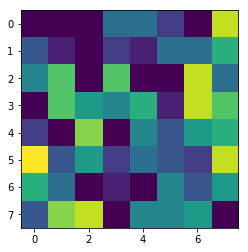

[[ 0.  0.  0.  5.  9.  4.  0.  4.]
 [ 3.  2.  0.  3.  3.  4.  9.  4.]
 [ 9.  6.  0.  9.  0.  3.  2.  0.]
 [ 0.  3.  2.  6.  7.  3.  1.  6.]
 [ 4.  0. 10.  0.  4.  6.  4.  6.]
 [ 4.  7.  5.  7.  6.  6.  3.  7.]
 [ 9.  5.  0.  5.  0.  5.  4.  3.]
 [ 0.  9.  0.  0.  9.  8. 14.  0.]]


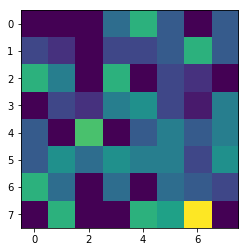

[[ 0.  0.  0.  8.  3.  6.  0.  4.]
 [ 6.  9.  0.  7.  1.  6.  0.  7.]
 [ 0.  2.  0.  2.  0.  2.  9.  8.]
 [ 0.  5.  9.  8.  4.  4.  7.  7.]
 [ 4.  0.  7.  0.  1.  2.  5.  1.]
 [10.  5.  4.  5.  3.  5.  3. 11.]
 [ 6.  5.  0.  6.  0.  2.  4.  7.]
 [ 4.  3. 10.  0.  3.  7.  7.  0.]]


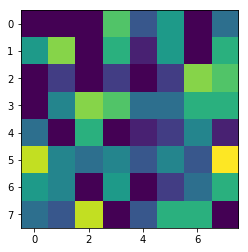

[[ 0.  0.  0.  6.  6.  4.  0.  0.]
 [ 4.  1.  0.  0.  6.  4.  2. 12.]
 [ 6.  8.  0.  7.  0.  1. 13.  0.]
 [ 0.  3.  5.  1.  5.  3. 14.  3.]
 [ 6.  0.  9.  0. 13.  7.  5.  6.]
 [ 0.  3. 10.  4.  1.  2.  2.  5.]
 [ 6.  6.  0. 12.  0.  8.  7.  3.]
 [ 1. 10.  5.  0.  1.  4.  7.  0.]]


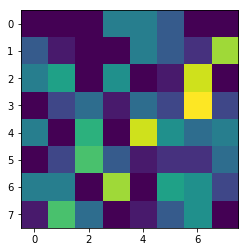

[[ 0.  0.  0.  4.  1.  5.  0.  9.]
 [ 1.  9.  0.  6.  1.  4.  5.  2.]
 [ 9.  9.  0.  7.  0. 11.  2.  5.]
 [ 0. 11.  3.  4.  0.  4.  5.  5.]
 [ 6.  0.  4.  0.  4.  7.  1.  7.]
 [ 1.  7.  2.  1.  8.  4.  8.  1.]
 [ 7.  2.  0.  4.  0.  9.  9.  7.]
 [ 8.  5.  2.  0.  8.  8.  3.  0.]]


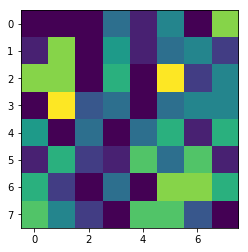

[[ 0.  0.  0.  7.  6.  7.  0.  2.]
 [ 6.  6.  0.  4.  2.  6.  5.  8.]
 [ 0.  1.  0.  4.  0.  0.  9.  1.]
 [ 0.  2.  9.  8.  4.  2. 11.  3.]
 [ 5.  0.  8.  0.  1.  1.  4.  4.]
 [ 9.  3.  5.  3.  5.  8.  2. 11.]
 [ 9.  5.  0.  6.  0.  3.  4.  7.]
 [ 2.  8.  7.  0.  4.  7. 11.  0.]]


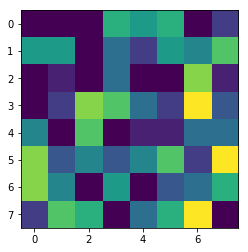

[[ 0.  0.  0.  6.  3.  3.  0.  7.]
 [ 5.  6.  0.  6.  1.  8.  8.  5.]
 [ 5.  2.  0.  9.  0.  0.  8.  1.]
 [ 0.  6. 11.  3. 11.  1.  7.  3.]
 [ 9.  0.  2.  0.  2.  6.  9.  7.]
 [10.  4.  0.  4.  8.  8.  3.  5.]
 [ 4.  0.  0.  0.  0.  9. 12.  2.]
 [ 3.  5.  8.  0.  1.  7.  6.  0.]]


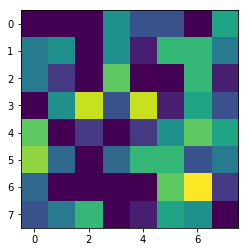

[[ 0.  0.  0.  1.  4.  1.  0.  7.]
 [ 1.  3.  0.  5.  1.  3.  1.  5.]
 [ 3.  4.  0. 10.  0.  1.  7.  4.]
 [ 0.  9.  6.  6.  4.  0.  4. 13.]
 [ 7.  0.  6.  0.  3.  6.  6. 10.]
 [10.  4.  6.  8.  3.  6.  2. 14.]
 [ 6.  5.  0.  0.  0.  6.  3.  4.]
 [ 3.  6.  6.  0.  3. 10.  8.  0.]]


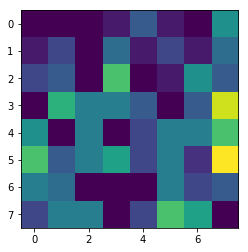

[[ 0.  0.  0.  5.  3.  4.  0. 10.]
 [ 3.  8.  0.  4.  3.  3.  3.  8.]
 [ 5.  6.  0.  6.  0.  2. 13.  5.]
 [ 0.  5.  8.  2.  6.  1.  8.  1.]
 [ 5.  0.  3.  0.  3.  3.  9.  6.]
 [ 7.  9.  5.  1.  6.  7.  1.  5.]
 [ 5.  4.  0.  4.  0.  7.  8.  6.]
 [ 6.  5.  9.  0.  1.  5.  3.  0.]]


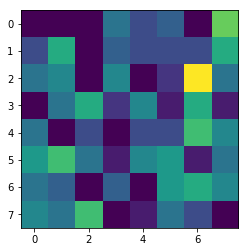

[[ 0.  0.  0.  8.  4.  7.  0.  4.]
 [ 2. 10.  0.  5.  3.  6.  2.  7.]
 [ 5.  6.  0.  3.  0.  7. 11.  7.]
 [ 0.  6.  9.  3.  7.  3.  6.  2.]
 [ 2.  0.  6.  0.  4.  3.  5.  3.]
 [ 4.  7.  4.  3.  5.  6.  2.  3.]
 [ 7.  4.  0.  7.  0.  7.  6.  6.]
 [ 5.  3.  6.  0.  3.  8.  5.  0.]]


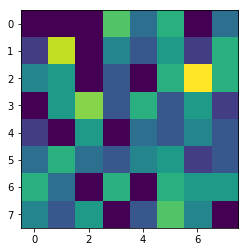

[[ 0.  0.  0.  7.  9.  4.  0.  7.]
 [ 3.  3.  0.  2.  2.  6. 11.  4.]
 [ 6.  6.  0.  9.  0.  3.  3.  0.]
 [ 0.  2.  5.  6.  9.  5.  3.  3.]
 [ 1.  0.  8.  0.  3.  0.  5.  5.]
 [ 7.  7.  6.  3. 10.  5.  3.  4.]
 [ 8.  5.  0.  2.  0.  4.  3.  4.]
 [ 1. 12.  2.  0. 11.  7. 11.  0.]]


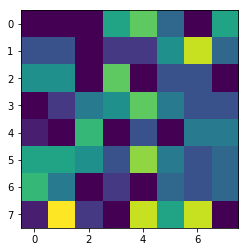

[[ 0.  0.  0.  4.  4.  8.  0.  1.]
 [ 2.  9.  0.  4.  2.  4.  1.  7.]
 [ 7.  5.  0.  3.  0.  9.  8.  4.]
 [ 0.  6.  6.  3.  2.  4.  7.  5.]
 [ 2.  0.  8.  0.  6.  6.  1.  4.]
 [ 2.  5.  7.  4.  2.  5.  2.  6.]
 [11.  6.  0.  9.  0.  6.  4.  9.]
 [ 5.  4.  4.  0.  5. 10.  8.  0.]]


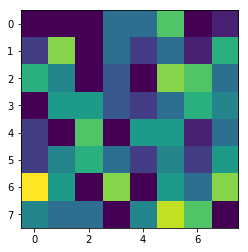

[[ 0.  0.  0.  6.  5.  5.  0.  7.]
 [ 1.  4.  0.  2.  3.  5.  5.  9.]
 [ 3.  7.  0.  9.  0.  4. 13.  1.]
 [ 0.  6.  8.  3.  6.  0.  9.  2.]
 [ 4.  0.  6.  0.  5.  2.  2.  9.]
 [ 6.  6.  5.  1.  6.  6.  1.  5.]
 [ 6.  2.  0.  2.  0.  9.  8.  4.]
 [ 2. 11.  7.  0.  2.  7.  6.  0.]]


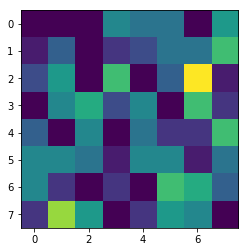

[[ 0.  0.  0.  1.  4.  4.  0.  3.]
 [ 4.  2.  0.  3.  0.  6.  3.  5.]
 [ 2.  3.  0.  9.  0.  2.  8.  4.]
 [ 0.  4. 10.  6.  4.  2.  6. 11.]
 [ 6.  0.  7.  0.  4.  6.  7.  7.]
 [11.  4.  9.  7.  3.  6.  1. 11.]
 [ 5.  8.  0.  1.  0.  5.  5.  3.]
 [ 2.  8.  7.  0.  3.  9.  6.  0.]]


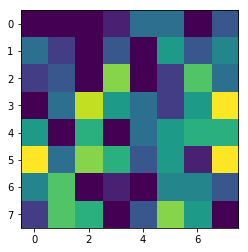

[[0. 0. 0. 6. 7. 4. 0. 7.]
 [3. 3. 0. 2. 2. 6. 9. 5.]
 [7. 7. 0. 9. 0. 3. 6. 1.]
 [0. 3. 6. 6. 8. 3. 6. 3.]
 [2. 0. 6. 0. 5. 2. 7. 6.]
 [5. 6. 7. 3. 8. 5. 2. 4.]
 [7. 6. 0. 3. 0. 6. 5. 5.]
 [3. 9. 3. 0. 8. 5. 7. 0.]]


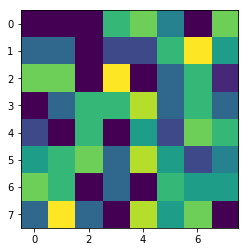

[[ 0.  0.  0.  2. 11.  4.  0. 11.]
 [ 8.  5.  0.  5.  5.  1. 10.  3.]
 [ 5.  1.  0.  1.  0.  2.  1.  3.]
 [ 0.  5.  6.  6.  5.  2.  2.  7.]
 [ 4.  0. 10.  0.  3.  1.  2.  9.]
 [ 7. 11.  3.  2.  3.  7.  2. 10.]
 [ 7.  5.  0.  7.  0.  3.  4.  3.]
 [ 5.  5.  3.  0. 11.  4. 12.  0.]]


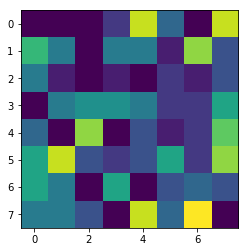

[[ 0.  0.  0.  3.  1.  6.  0.  0.]
 [ 5.  8.  0.  4.  3.  6.  1.  5.]
 [ 5.  2.  0.  8.  0.  8.  3.  0.]
 [ 0.  0.  8.  5.  2.  6.  7.  2.]
 [ 6.  0.  9.  0.  8. 10.  3.  3.]
 [ 6.  2.  8.  6.  3.  5.  4.  9.]
 [10.  8.  0. 11.  0.  5.  5.  8.]
 [ 0.  3.  0.  0.  8. 12.  9.  0.]]


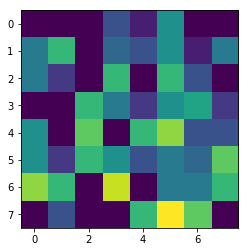

[[ 0.  0.  0.  4.  8.  3.  0.  9.]
 [ 3.  4.  0.  5.  3.  3.  7.  4.]
 [13.  7.  0.  3.  0.  3.  3.  5.]
 [ 0.  7.  1.  3. 10.  5.  3. 10.]
 [ 0.  0.  8.  0.  4.  4.  8.  1.]
 [ 5. 10.  6.  5.  5.  3.  2.  6.]
 [10.  5.  0.  6.  0.  3.  1.  5.]
 [ 4.  3.  5.  0.  9.  4. 10.  0.]]


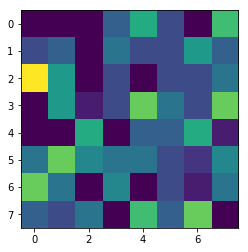

[[ 0.  0.  0.  3.  7.  2.  0.  8.]
 [ 0.  1.  0.  4.  4.  1.  7.  3.]
 [12.  8.  0.  9.  0.  3.  3.  2.]
 [ 0.  8.  0.  2.  7.  1.  3. 10.]
 [ 2.  0. 11.  0.  3.  7.  5.  7.]
 [ 6.  8.  6.  6.  3.  3.  2.  9.]
 [10.  1.  0.  3.  0.  3.  2.  6.]
 [ 2.  7.  8.  0.  6. 10. 12.  0.]]


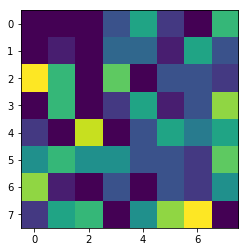

[[ 0.  0.  0.  3.  6.  6.  0.  6.]
 [ 5. 10.  0.  4.  3.  2.  3.  8.]
 [10.  4.  0.  1.  0.  4.  7.  4.]
 [ 0.  5.  5.  2.  3.  3.  8.  7.]
 [ 1.  0.  5.  0.  4.  3.  8.  2.]
 [ 4.  7. 10.  3.  2.  6.  1.  7.]
 [11.  8.  0.  7.  0.  4.  2.  9.]
 [ 7.  2.  5.  0.  6.  4.  7.  0.]]


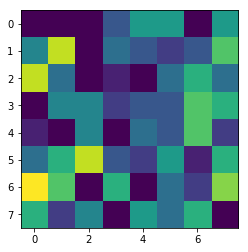

[[ 0.  0.  0.  2.  3.  5.  0.  7.]
 [ 4.  0.  0.  2.  1.  4.  3.  7.]
 [ 6.  4.  0.  3.  0.  3.  9.  8.]
 [ 0.  8.  9.  5.  7.  3. 10.  5.]
 [ 3.  0.  8.  0.  6.  6.  6.  5.]
 [ 7.  5.  4.  3.  1.  5.  1.  9.]
 [ 7.  5.  0. 10.  0.  3.  6.  5.]
 [ 5.  3. 10.  0.  2.  4.  6.  0.]]


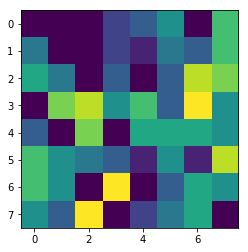

[[ 0.  0.  0.  0.  1.  3.  0.  8.]
 [ 1.  4.  0.  2.  3.  3.  8.  3.]
 [10.  7.  0. 11.  0.  4.  6.  0.]
 [ 0.  6.  4.  1.  7.  0.  9.  2.]
 [ 3.  0.  5.  0.  3.  9.  6. 11.]
 [ 7.  2.  5.  2.  5.  7.  1.  6.]
 [11.  3.  0.  2.  0.  8.  8. 10.]
 [ 6.  7.  5.  0.  5.  7.  8.  0.]]


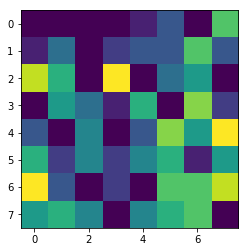

[[ 0.  0.  0.  3.  3.  5.  0.  6.]
 [ 4.  1.  0.  3.  2.  8.  6.  4.]
 [ 6.  2.  0.  9.  0.  4.  9.  2.]
 [ 0.  9. 14.  4. 11.  3. 10.  3.]
 [ 6.  0.  2.  0.  5.  6.  6. 10.]
 [ 7.  3.  2.  2.  6.  7.  3.  3.]
 [ 6.  0.  0.  2.  0.  8. 12.  1.]
 [ 4.  5.  8.  0.  2.  7.  3.  0.]]


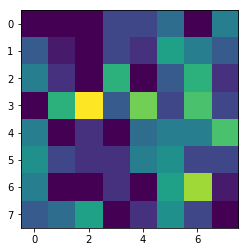

[[ 0.  0.  0.  1.  5.  6.  0.  0.]
 [ 7.  8.  0.  6.  3.  3.  3.  4.]
 [12.  0.  0.  4.  0.  8.  3.  1.]
 [ 0.  4.  7.  0.  1.  7.  6.  6.]
 [ 8.  0.  7.  0.  7. 11.  4.  3.]
 [ 2.  8.  8.  6.  0.  4.  4.  6.]
 [ 9.  2.  0. 11.  0.  4. 11.  5.]
 [ 3.  1.  6.  0.  5. 10.  8.  0.]]


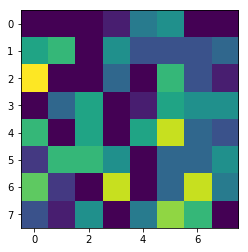

[[ 0.  0.  0.  6.  4.  6.  0.  6.]
 [ 3. 12.  0.  5.  3.  3.  3.  8.]
 [ 6.  7.  0.  2.  0.  5. 10.  6.]
 [ 0.  5.  8.  2.  5.  2.  6.  2.]
 [ 3.  0.  5.  0.  4.  3.  5.  4.]
 [ 3.  9.  5.  2.  5.  8.  1.  4.]
 [ 7.  5.  0.  7.  0.  9.  6.  7.]
 [ 5.  2.  3.  0.  4.  6.  5.  0.]]


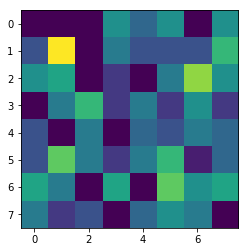

[[ 0.  0.  0.  3.  0.  6.  0.  0.]
 [ 3.  7.  0.  5.  1.  5.  3.  4.]
 [12.  2.  0. 10.  0.  7.  0.  0.]
 [ 0.  3.  3.  4.  5.  9.  8.  0.]
 [ 1.  0.  8.  0.  7.  7.  5.  0.]
 [ 8.  3.  6.  4.  7.  4.  5.  8.]
 [16.  4.  0. 13.  0.  1.  1. 11.]
 [ 0.  1.  2.  0. 11. 13. 10.  0.]]


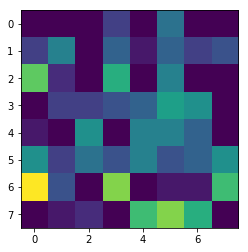

[[ 0.  0.  0.  5.  3.  6.  0.  7.]
 [ 4.  9.  0.  4.  2.  3.  5.  7.]
 [ 6.  4.  0.  5.  0.  3. 11.  3.]
 [ 0.  3.  7.  1.  5.  2.  9.  1.]
 [ 3.  0.  3.  0.  1.  4.  9.  4.]
 [ 5.  8.  8.  1.  5.  8.  1.  5.]
 [ 8.  6.  0.  5.  0.  5.  7. 10.]
 [ 8.  6.  8.  0.  2.  5.  6.  0.]]


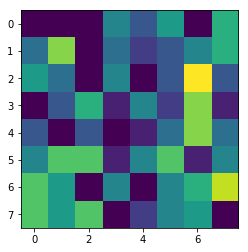

[[ 0.  0.  0.  2.  3.  4.  0.  4.]
 [ 0.  2.  0.  4.  3.  2.  2.  3.]
 [ 8.  8.  0.  9.  0.  7.  6.  5.]
 [ 0.  9.  2.  4.  4.  2.  4.  8.]
 [ 3.  0. 10.  0.  6.  8.  2.  9.]
 [ 5.  5.  6.  7.  1.  3.  3.  9.]
 [ 9.  2.  0.  5.  0.  5.  3.  7.]
 [ 3.  5.  7.  0.  3. 14.  8.  0.]]


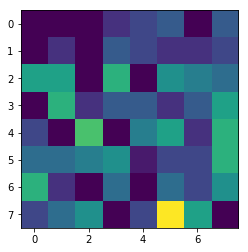

[[ 0.  0.  0.  3.  9.  3.  0.  6.]
 [ 2.  0.  0.  2.  3.  3.  7.  4.]
 [10.  6.  0.  9.  0.  5.  4.  1.]
 [ 0.  5.  2.  3.  5.  3.  0.  8.]
 [ 6.  0.  8.  0.  5.  7.  5.  7.]
 [ 2. 11.  8.  6.  3.  5.  2.  6.]
 [ 6.  5.  0.  5.  0.  4.  7.  2.]
 [ 3. 10.  4.  0.  5.  7. 11.  0.]]


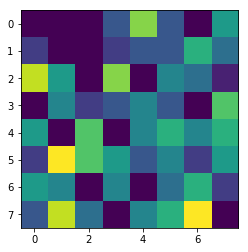

[[ 0.  0.  0.  4.  2.  6.  0.  8.]
 [ 1.  8.  0.  5.  2.  5.  5.  3.]
 [11.  7.  0.  7.  0. 10.  2.  3.]
 [ 0. 10.  4.  5.  2.  5.  6.  4.]
 [ 4.  0.  4.  0.  4.  6.  2.  7.]
 [ 0.  5.  4.  1.  7.  4.  6.  1.]
 [ 9.  3.  0.  5.  0.  8.  7.  7.]
 [ 8.  4.  2.  0.  8.  8.  3.  0.]]


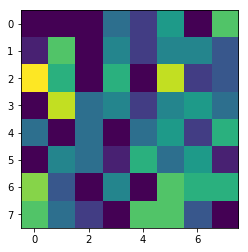

[[ 0.  0.  0.  6.  7.  4.  0.  8.]
 [ 3.  3.  0.  2.  3.  5.  8.  5.]
 [ 8.  7.  0.  7.  0.  4.  5.  1.]
 [ 0.  4.  5.  7. 10.  3.  6.  4.]
 [ 1.  0.  6.  0.  4.  1.  7.  7.]
 [ 5.  6.  7.  3.  8.  5.  2.  3.]
 [ 8.  6.  0.  3.  0.  6.  4.  5.]
 [ 5.  8.  2.  0.  8.  4.  8.  0.]]


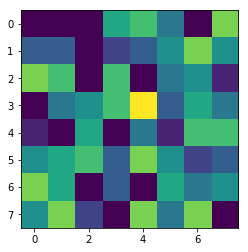

[[ 0.  0.  0.  2.  4.  6.  0.  7.]
 [ 3.  3.  0.  4.  0.  7.  7.  2.]
 [ 8.  4.  0.  6.  0.  5.  5.  5.]
 [ 0.  9.  9.  4.  8.  3.  4.  6.]
 [ 6.  0.  5.  0.  3.  9.  4.  6.]
 [ 5.  5.  0.  5.  5.  7.  3.  4.]
 [ 7.  2.  0.  4.  0.  7. 11.  2.]
 [ 4.  5.  4.  0.  5.  6.  7.  0.]]


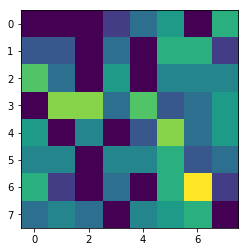

[[ 0.  0.  0.  8.  3.  6.  0.  5.]
 [ 4.  8.  0.  5.  1.  5.  2.  8.]
 [ 0.  7.  0.  3.  0.  2. 10.  8.]
 [ 0.  3.  8.  7.  6.  2.  6.  4.]
 [ 2.  0. 10.  0.  2.  2.  4.  1.]
 [10.  6.  2.  3.  5.  7.  2.  9.]
 [ 7.  6.  0.  6.  0.  5.  3.  7.]
 [ 1.  4.  7.  0.  4.  7.  8.  0.]]


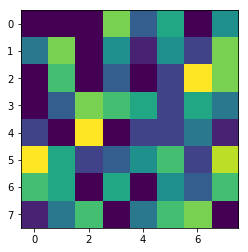

[[ 0.  0.  0.  3.  9.  6.  0.  6.]
 [ 5.  3.  0.  2.  3.  3.  7.  4.]
 [ 7.  5.  0.  2.  0.  5.  4.  5.]
 [ 0.  4.  6.  6.  7.  4.  3.  8.]
 [ 2.  0. 10.  0.  4.  4.  5.  6.]
 [ 3.  9.  6.  5.  2.  6.  1.  8.]
 [ 8.  8.  0.  9.  0.  3.  3.  4.]
 [ 4.  5.  3.  0.  8.  5. 11.  0.]]


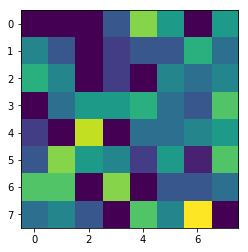

[[ 0.  0.  0.  3.  3.  6.  0.  8.]
 [ 3. 11.  0.  4.  3.  2.  3.  7.]
 [ 7.  7.  0.  2.  0.  6.  9.  6.]
 [ 0.  7.  7.  2.  2.  2.  5.  3.]
 [ 3.  0.  5.  0.  4.  4.  4.  6.]
 [ 4.  9.  4.  1.  4.  8.  2.  5.]
 [ 8.  5.  0.  7.  0.  9.  7.  8.]
 [ 7.  3.  4.  0.  4.  5.  5.  0.]]


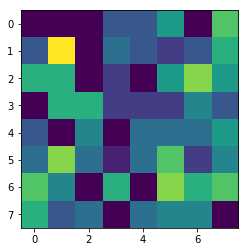

[[ 0.  0.  0.  5.  2.  5.  0.  9.]
 [ 3.  6.  0.  4.  2.  5.  6.  5.]
 [ 4.  4.  0.  7.  0.  4.  9.  4.]
 [ 0.  6. 10.  6.  8.  1.  9.  0.]
 [ 3.  0.  3.  0.  3.  2.  6.  9.]
 [ 8.  5.  3.  0.  8.  8.  3.  4.]
 [ 7.  3.  0.  3.  0.  7.  7.  6.]
 [ 6.  5.  6.  0.  4.  7.  5.  0.]]


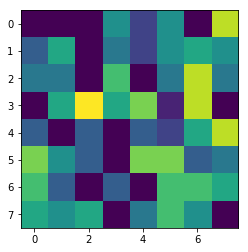

[[ 0.  0.  0.  4.  4.  5.  0.  6.]
 [ 6.  3.  0.  2.  0.  7. 10.  5.]
 [ 7.  5.  0.  7.  0.  3.  3.  1.]
 [ 0.  3.  9.  7.  8.  4.  9.  2.]
 [ 0.  0.  8.  0.  5.  3.  5.  4.]
 [11.  2.  4.  2.  7.  6.  3.  6.]
 [11.  5.  0.  5.  0.  5.  4.  7.]
 [ 1.  7.  3.  0. 11.  5.  8.  0.]]


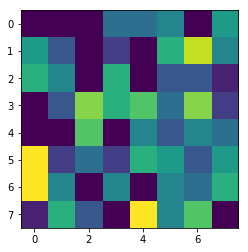

[[ 0.  0.  0.  6.  4.  6.  0.  6.]
 [ 5.  8.  0.  6.  1.  7.  7.  2.]
 [ 4.  1.  0.  5.  0.  2.  1.  3.]
 [ 0.  4.  8.  9.  7.  4.  6.  4.]
 [ 2.  0.  5.  0.  0.  1.  6.  3.]
 [10.  3.  4.  4.  8.  8.  3.  9.]
 [11.  5.  0.  2.  0.  3.  2.  8.]
 [ 3.  4.  4.  0.  9.  8. 11.  0.]]


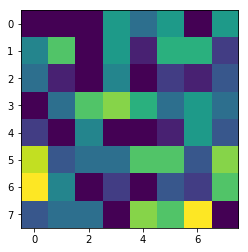

[[ 0.  0.  0.  6.  5.  6.  0.  5.]
 [ 2. 10.  0.  5.  5.  1.  1.  9.]
 [ 1.  7.  0.  4.  0.  4. 11.  4.]
 [ 0.  6.  5.  4.  0.  0.  6.  5.]
 [ 4.  0.  9.  0.  4.  0.  1.  8.]
 [ 6.  8.  6.  3.  4.  7.  2. 11.]
 [ 8.  4.  0.  4.  0.  8.  3.  7.]
 [ 2.  8.  5.  0.  3.  9.  9.  0.]]


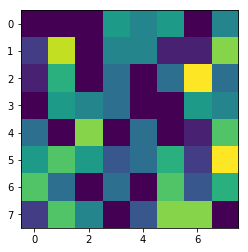

[[ 0.  0.  0.  3.  1.  6.  0.  7.]
 [ 1.  8.  0.  5.  1.  3.  5.  3.]
 [11.  8.  0.  8.  0. 10.  2.  4.]
 [ 0. 10.  3.  3.  0.  4.  5.  4.]
 [ 4.  0.  7.  0.  6.  7.  1.  6.]
 [ 2.  8.  4.  1.  6.  4.  6.  3.]
 [10.  2.  0.  6.  0.  7.  7.  8.]
 [ 5.  4.  3.  0.  9. 11.  4.  0.]]


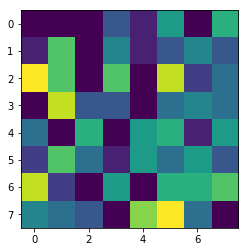

[[ 0.  0.  0.  3.  2.  4.  0.  8.]
 [ 6.  2.  0.  1.  2.  5.  4.  7.]
 [ 5.  4.  0.  5.  0.  1. 11.  4.]
 [ 0.  3. 10.  4.  7.  3. 11.  1.]
 [ 4.  0.  3.  0.  6.  5. 11.  5.]
 [ 7.  6.  8.  2.  4.  6.  1.  6.]
 [ 5.  8.  0.  8.  0.  4.  8.  6.]
 [ 7.  6.  9.  0.  2.  1.  4.  0.]]


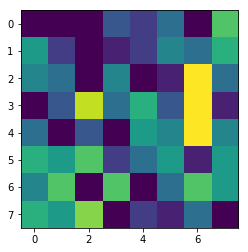

[[ 0.  0.  0.  5.  4.  7.  0.  5.]
 [ 5. 10.  0.  5.  2.  5.  5.  7.]
 [ 7.  5.  0.  1.  0.  5.  6.  5.]
 [ 0.  4.  8.  5.  5.  3.  7.  3.]
 [ 1.  0.  7.  0.  4.  4.  5.  2.]
 [ 6.  6.  4.  2.  5.  7.  2.  5.]
 [10.  6.  0.  8.  0.  5.  5.  9.]
 [ 4.  2.  4.  0.  7.  5.  7.  0.]]


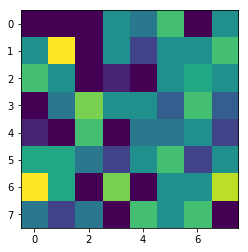

[[ 0.  0.  0.  6.  4.  6.  0.  5.]
 [ 2.  5.  0.  4.  2.  6.  6.  2.]
 [ 8.  7.  0.  5.  0.  6.  3.  6.]
 [ 0.  5.  4.  7.  8.  4.  4.  4.]
 [ 2.  0.  8.  0.  2.  8.  5.  3.]
 [ 4.  5.  3.  5.  5.  5.  3.  5.]
 [10.  5.  0.  8.  0.  4.  5.  8.]
 [ 4.  4.  4.  0.  7.  8.  9.  0.]]


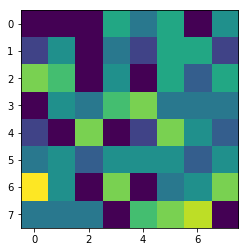

[[0. 0. 0. 5. 7. 5. 0. 4.]
 [3. 2. 0. 3. 0. 7. 5. 3.]
 [8. 6. 0. 5. 0. 6. 5. 7.]
 [0. 5. 6. 7. 9. 6. 3. 9.]
 [2. 0. 7. 0. 4. 6. 7. 1.]
 [4. 6. 7. 7. 5. 3. 3. 4.]
 [7. 8. 0. 5. 0. 3. 5. 3.]
 [4. 5. 3. 0. 7. 6. 7. 0.]]


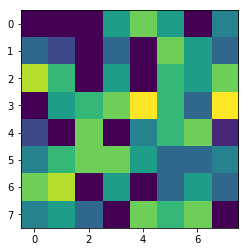

[[ 0.  0.  0.  4. 10.  4.  0.  2.]
 [ 6.  2.  0.  1.  6.  4. 13.  4.]
 [ 6.  8.  0.  6.  0.  4.  3.  0.]
 [ 0.  1.  5.  3.  9.  2.  2.  6.]
 [ 4.  0.  9.  0.  4.  8.  1. 10.]
 [ 2.  4.  6.  4.  2.  7.  1.  3.]
 [ 7.  5.  0.  5.  0.  8.  9.  4.]
 [ 5. 11.  2.  0.  8.  3. 13.  0.]]


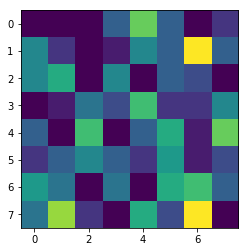

[[ 0.  0.  0.  7.  2.  3.  0.  9.]
 [ 4.  8.  0.  6.  2.  6.  6.  2.]
 [ 4.  5.  0.  8.  0.  6.  4.  5.]
 [ 0.  7.  7.  6.  8.  3.  2.  4.]
 [10.  0.  1.  0.  1.  7.  6.  8.]
 [ 3.  6.  1.  3.  7.  5.  6.  1.]
 [ 1.  2.  0.  4.  0.  9. 13.  3.]
 [10.  4.  7.  0.  3.  6.  3.  0.]]


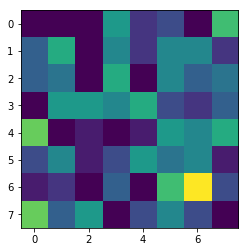

[[ 0.  0.  0.  3.  7.  5.  0.  8.]
 [ 2.  6.  0.  4.  1.  4.  6.  4.]
 [ 9.  6.  0.  5.  0.  7.  5.  6.]
 [ 0.  8.  6.  2.  4.  3.  1.  7.]
 [ 6.  0.  7.  0.  4.  7.  2.  5.]
 [ 3. 11.  3.  4.  5.  7.  2.  4.]
 [ 7.  3.  0.  5.  0.  7.  9.  3.]
 [ 3.  7.  3.  0.  6.  7.  7.  0.]]


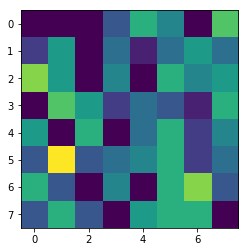

[[ 0.  0.  0.  1.  2.  2.  0.  6.]
 [ 1.  1.  0.  3.  2.  4.  8.  1.]
 [ 9.  4.  0. 16.  0.  7.  2.  0.]
 [ 0.  9.  2.  2.  6.  3.  4.  7.]
 [ 9.  0.  2.  0.  3. 11.  3. 11.]
 [ 4.  3.  5.  4.  6.  5.  4.  4.]
 [ 7.  1.  0.  0.  0.  8. 11.  5.]
 [ 5. 11.  5.  0.  4. 10.  8.  0.]]


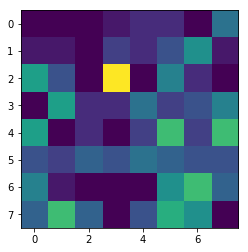

[[ 0.  0.  0.  6. 11.  4.  0.  5.]
 [ 3.  1.  0.  0.  4.  5. 12.  5.]
 [ 9.  8.  0. 10.  0.  4.  3.  0.]
 [ 0.  3.  2.  5.  9.  5.  3.  6.]
 [ 0.  0.  8.  0.  5.  2.  4.  6.]
 [ 2.  6.  9.  3.  7.  4.  3.  2.]
 [ 9.  5.  0.  2.  0.  5.  3.  3.]
 [ 3. 13.  1.  0. 11.  6. 11.  0.]]


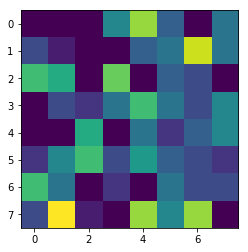

[[0. 0. 0. 5. 7. 7. 0. 2.]
 [2. 1. 0. 3. 2. 7. 2. 3.]
 [6. 4. 0. 5. 0. 7. 5. 6.]
 [0. 8. 6. 9. 7. 6. 3. 8.]
 [5. 0. 7. 0. 6. 6. 3. 5.]
 [0. 5. 7. 7. 4. 5. 3. 5.]
 [7. 7. 0. 7. 0. 4. 6. 1.]
 [4. 6. 1. 0. 5. 8. 9. 0.]]


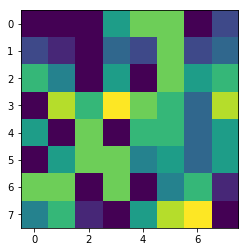

[[ 0.  0.  0.  4.  6.  4.  0.  9.]
 [ 4.  3.  0.  2.  2.  6.  8.  5.]
 [ 5.  6.  0.  6.  0.  3.  6.  5.]
 [ 0.  8.  9.  9. 10.  2.  7.  6.]
 [ 1.  0.  7.  0.  3.  1.  4.  7.]
 [ 9.  3.  3.  2.  7.  6.  2.  6.]
 [ 7.  5.  0.  2.  0.  6.  4.  4.]
 [ 3.  7.  3.  0.  9.  3.  7.  0.]]


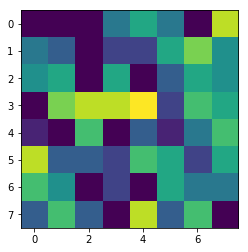

[[ 0.  0.  0.  5.  5.  8.  0.  4.]
 [ 4.  7.  0.  3.  2.  3.  2.  7.]
 [ 4.  4.  0.  2.  0.  5.  9.  5.]
 [ 0.  5.  7.  5.  3.  3.  8.  5.]
 [ 2.  0.  6.  0.  3.  3.  5.  4.]
 [ 3.  6.  9.  3.  3.  7.  1.  8.]
 [10.  7.  0.  7.  0.  3.  4.  8.]
 [ 7.  6.  7.  0.  3.  6.  8.  0.]]


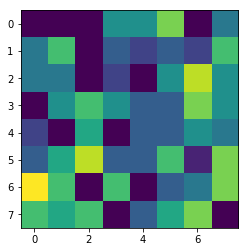

[[0. 0. 0. 3. 4. 3. 0. 7.]
 [2. 2. 0. 3. 1. 6. 5. 4.]
 [7. 6. 0. 7. 0. 3. 7. 6.]
 [0. 8. 8. 7. 9. 2. 6. 9.]
 [2. 0. 6. 0. 4. 5. 6. 7.]
 [9. 2. 4. 5. 5. 5. 2. 6.]
 [7. 6. 0. 2. 0. 8. 4. 4.]
 [4. 5. 4. 0. 6. 6. 5. 0.]]


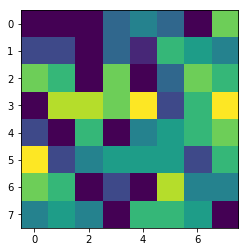

[[0. 0. 0. 5. 5. 5. 0. 6.]
 [2. 3. 0. 2. 2. 5. 5. 5.]
 [5. 7. 0. 8. 0. 5. 6. 4.]
 [0. 4. 7. 8. 8. 4. 4. 4.]
 [1. 0. 8. 0. 5. 2. 5. 6.]
 [6. 6. 7. 4. 6. 6. 2. 6.]
 [7. 8. 0. 4. 0. 6. 3. 4.]
 [2. 7. 1. 0. 8. 7. 8. 0.]]


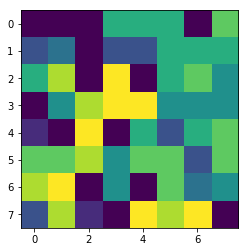

[[ 0.  0.  0.  4.  7.  8.  0.  4.]
 [ 2.  3.  0.  5.  0.  6.  1.  3.]
 [10.  3.  0.  4.  0.  8.  6.  7.]
 [ 0. 11.  6.  3.  4.  6.  4. 12.]
 [ 5.  0.  6.  0.  5.  6.  3.  2.]
 [ 1.  9.  7.  7.  3.  4.  3.  6.]
 [ 9.  3.  0.  5.  0.  2.  6.  1.]
 [ 3.  4.  6.  0.  3. 11.  8.  0.]]


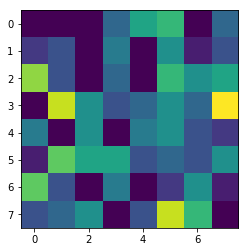

[[ 0.  0.  0. 11.  4.  4.  0.  5.]
 [ 3.  8.  0.  8.  3.  8.  4.  6.]
 [ 4.  4.  0.  6.  0.  2. 10.  6.]
 [ 0.  6.  8.  5. 10.  3.  5.  5.]
 [ 7.  0.  4.  0.  2.  3.  8.  2.]
 [ 7.  6.  1.  5.  8.  5.  4.  4.]
 [ 4.  0.  0.  2.  0.  8.  8.  2.]
 [ 2.  3.  7.  0.  1.  8.  6.  0.]]


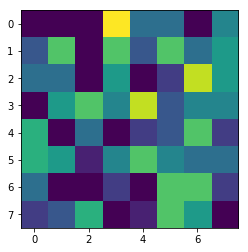

[[ 0.  0.  0.  3.  1.  6.  0.  7.]
 [ 2.  5.  0.  3.  1.  5.  5.  1.]
 [10.  6.  0.  9.  0. 12.  0.  4.]
 [ 0. 10.  4.  6.  2.  7.  6.  3.]
 [ 4.  0.  6.  0.  7.  7.  1.  6.]
 [ 1.  6.  4.  2.  7.  3.  8.  2.]
 [ 9.  2.  0.  7.  0.  5.  8.  6.]
 [ 5.  5.  2.  0. 10. 10.  4.  0.]]


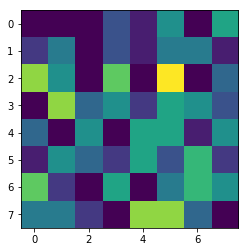

[[ 0.  0.  0.  7.  2.  6.  0.  8.]
 [ 2.  9.  0.  6.  2.  5.  5.  4.]
 [ 6.  7.  0.  7.  0.  8.  6.  5.]
 [ 0.  9.  6.  5.  5.  3.  4.  3.]
 [ 7.  0.  2.  0.  1.  5.  3.  7.]
 [ 1.  7.  2.  1.  7.  6.  6.  1.]
 [ 5.  2.  0.  4.  0.  9. 11.  6.]
 [ 9.  4.  6.  0.  4.  8.  4.  0.]]


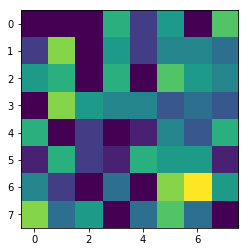

[[ 0.  0.  0.  4.  7.  5.  0.  5.]
 [ 5.  2.  0.  2.  4.  5.  9.  6.]
 [ 8.  5.  0.  5.  0.  2.  2.  1.]
 [ 0.  6.  4.  9. 10.  4.  7.  4.]
 [ 1.  0.  9.  0.  5.  4.  3.  6.]
 [ 6.  2.  3.  4.  6.  7.  2.  7.]
 [12.  5.  0.  8.  0.  5.  1.  5.]
 [ 0.  5.  0.  0. 10.  3. 14.  0.]]


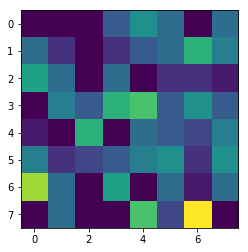

[[ 0.  0.  0.  6.  4.  6.  0.  6.]
 [ 4.  5.  0.  4.  1.  7.  8.  4.]
 [ 9.  5.  0.  4.  0.  4.  4.  6.]
 [ 0.  4.  7.  6. 10.  4.  6.  3.]
 [ 1.  0.  8.  0.  3.  6.  7.  1.]
 [ 7.  5.  2.  4.  7.  6.  2.  4.]
 [10.  4.  0.  7.  0.  5.  5.  6.]
 [ 2.  3.  4.  0.  7.  7.  8.  0.]]


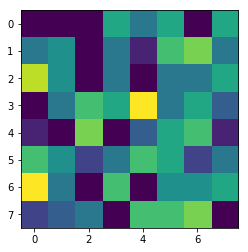

[[ 0.  0.  0.  5.  4.  6.  0.  7.]
 [ 3.  6.  0.  4.  2.  4.  7.  4.]
 [ 6.  6.  0.  7.  0.  5.  3.  5.]
 [ 0.  5.  6.  7.  7.  3.  3.  3.]
 [ 1.  0.  9.  0.  3.  3.  4.  5.]
 [ 9.  7.  2.  3.  8.  7.  3.  7.]
 [11.  5.  0.  5.  0.  5.  2.  7.]
 [ 1.  5.  1.  0. 10.  9. 10.  0.]]


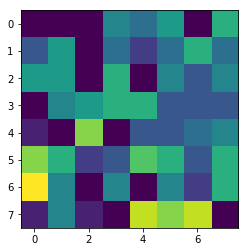

[[ 0.  0.  0.  1.  6.  4.  0.  5.]
 [ 0.  0.  0.  4.  4.  1.  4.  2.]
 [ 9.  3.  0. 10.  0.  8.  5.  0.]
 [ 0.  9.  4.  2.  4.  2.  4.  8.]
 [ 6.  0.  6.  0.  5.  7.  2. 12.]
 [ 2.  7.  9.  5.  2.  5.  2.  9.]
 [ 9.  2.  0.  4.  0.  3.  7.  3.]
 [ 5.  7.  7.  0.  3. 14. 10.  0.]]


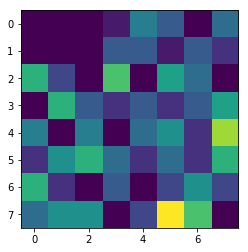

[[ 0.  0.  0.  1.  6.  3.  0.  7.]
 [ 5.  6.  0.  5.  3.  0.  7.  3.]
 [ 4.  3.  0.  8.  0.  3.  3.  0.]
 [ 0.  2.  5.  5.  1.  0.  3.  6.]
 [ 6.  0.  9.  0.  2.  5.  4.  9.]
 [ 9.  8.  7.  3.  3.  7.  2. 13.]
 [ 8.  6.  0.  3.  0.  4.  4.  8.]
 [ 3.  8.  5.  0.  7. 11. 11.  0.]]


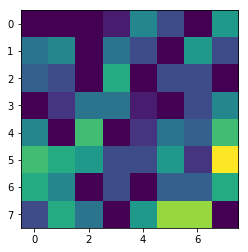

[[ 0.  0.  0.  5.  8.  2.  0.  4.]
 [ 7.  3.  0.  2.  3.  8. 12.  6.]
 [ 7.  5.  0.  7.  0.  0.  5.  0.]
 [ 0.  3.  9.  5. 13.  2.  7.  6.]
 [ 3.  0.  4.  0.  4.  4.  8.  6.]
 [ 6.  0.  7.  4.  6.  5.  2.  2.]
 [ 6.  6.  0.  2.  0.  9.  7.  3.]
 [ 6.  8.  3.  0.  7.  1.  6.  0.]]


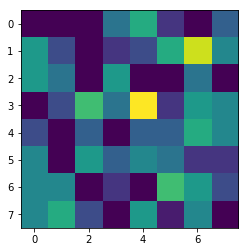

[[ 0.  0.  0.  1.  4.  5.  0.  8.]
 [ 4.  3.  0.  3.  3.  5.  5.  5.]
 [ 6.  5.  0.  3.  0.  4.  9.  7.]
 [ 0. 10. 11.  5. 10.  1.  8.  7.]
 [ 2.  0.  8.  0.  5.  5.  2.  9.]
 [ 9.  2.  1.  2.  2.  7.  1.  6.]
 [ 7.  3.  0.  4.  0.  9.  7.  4.]
 [ 4.  3.  6.  0.  5.  3.  6.  0.]]


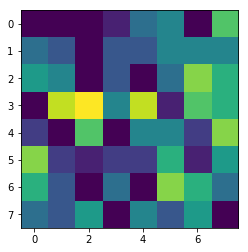

[[ 0.  0.  0.  0.  5.  3.  0.  8.]
 [ 5.  2.  0.  1.  8.  0.  8.  1.]
 [ 5.  5.  0.  7.  0.  6.  4.  0.]
 [ 0.  5.  4.  3.  6.  0.  7.  2.]
 [ 5.  0.  8.  0.  4. 10.  3. 16.]
 [ 4.  4.  7.  2.  0.  6.  1.  8.]
 [ 7.  3.  0.  6.  0.  4.  9.  9.]
 [10.  8.  6.  0.  5.  4. 10.  0.]]


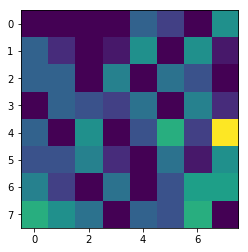

[[ 0.  0.  0.  6.  5.  6.  0.  7.]
 [ 2.  6.  0.  3.  2.  3.  4.  8.]
 [ 2.  7.  0.  5.  0.  4. 10.  6.]
 [ 0.  5.  6.  6.  3.  0.  6.  4.]
 [ 2.  0.  9.  0.  3.  2.  3.  6.]
 [ 7.  7.  4.  2.  5.  7.  1.  9.]
 [ 8.  5.  0.  4.  0.  6.  4.  6.]
 [ 3.  8.  6.  0.  3.  8.  9.  0.]]


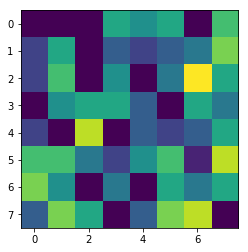

[[0. 0. 0. 7. 4. 7. 0. 4.]
 [2. 9. 0. 5. 2. 5. 3. 6.]
 [7. 7. 0. 2. 0. 6. 8. 7.]
 [0. 6. 5. 5. 6. 3. 6. 6.]
 [1. 0. 6. 0. 2. 5. 5. 2.]
 [4. 5. 5. 4. 5. 6. 2. 5.]
 [9. 6. 0. 6. 0. 7. 4. 8.]
 [5. 2. 5. 0. 4. 7. 7. 0.]]


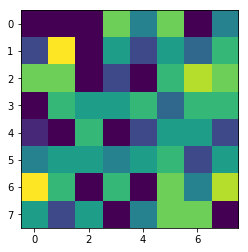

[[ 0.  0.  0.  4.  7.  3.  0.  7.]
 [ 2.  3.  0.  3.  5.  0.  5.  5.]
 [ 9.  5.  0.  7.  0.  3.  5.  1.]
 [ 0.  7.  0.  4.  5.  2.  9.  9.]
 [ 1.  0.  8.  0.  2.  4.  6.  9.]
 [ 4.  4. 10.  4.  2.  3.  2. 10.]
 [10.  4.  0.  3.  0.  2.  1.  8.]
 [ 7.  6.  8.  0.  6.  8. 10.  0.]]


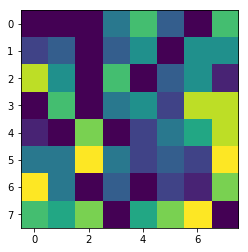

[[ 0.  0.  0.  2.  5.  3.  0.  8.]
 [ 1.  4.  0.  4.  2.  3.  5.  3.]
 [12.  6.  0.  7.  0.  4.  5.  4.]
 [ 0.  8.  3.  4.  7.  2.  6.  8.]
 [ 1.  0.  7.  0.  3.  5.  7.  7.]
 [ 6.  5.  6.  5.  4.  5.  2.  8.]
 [10.  4.  0.  3.  0.  5.  2.  7.]
 [ 4.  4.  6.  0.  7.  8.  8.  0.]]


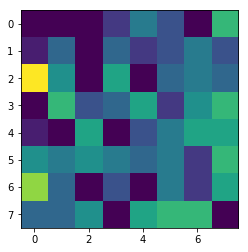

[[ 0.  0.  0.  6.  4.  7.  0.  6.]
 [ 3.  6.  0.  5.  1.  6.  4.  4.]
 [ 8.  3.  0.  5.  0.  7.  5.  6.]
 [ 0.  6.  7.  7.  8.  6.  4.  2.]
 [ 1.  0.  7.  0.  5.  2.  5.  1.]
 [ 6.  8.  4.  4.  8.  6.  3.  5.]
 [10.  6.  0.  8.  0.  3.  3.  4.]
 [ 1.  4.  1.  0.  9.  8.  8.  0.]]


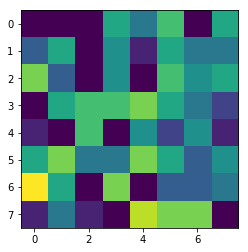

[[ 0.  0.  0.  5.  7.  2.  0.  4.]
 [ 4.  0.  0.  1.  2.  6.  9.  4.]
 [ 7.  7.  0.  8.  0.  4.  6.  2.]
 [ 0.  2.  7.  5. 11.  3.  2.  7.]
 [ 4.  0.  6.  0.  4.  7.  7.  6.]
 [ 4.  5.  8.  5.  4.  4.  2.  2.]
 [ 4.  7.  0.  4.  0.  7.  9.  3.]
 [ 6. 10.  6.  0.  5.  4.  6.  0.]]


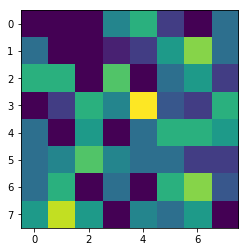

[[ 0.  0.  0.  3.  4.  6.  0.  5.]
 [ 4. 10.  0.  4.  2.  2.  3.  8.]
 [11.  6.  0.  2.  0.  6.  9.  4.]
 [ 0.  5.  4.  0.  1.  4.  7.  6.]
 [ 2.  0.  6.  0.  5.  5.  6.  1.]
 [ 3.  9. 10.  2.  2.  5.  1.  5.]
 [10.  6.  0.  8.  0.  6.  5.  9.]
 [ 7.  4.  6.  0.  5.  5.  6.  0.]]


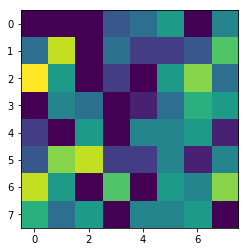

[[ 0.  0.  0.  3.  7.  4.  0.  6.]
 [ 4.  1.  0.  1.  2.  4.  7.  4.]
 [ 6.  6.  0.  5.  0.  4.  4.  6.]
 [ 0.  3.  7.  8.  9.  2.  3.  8.]
 [ 2.  0. 10.  0.  4.  5.  6.  7.]
 [ 6.  5.  6.  5.  2.  6.  1.  7.]
 [ 6.  9.  0.  6.  0.  5.  4.  4.]
 [ 4.  6.  4.  0.  8.  5.  9.  0.]]


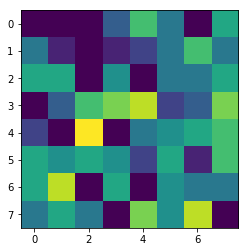

[[ 0.  0.  0.  1.  4.  5.  0.  7.]
 [ 4. 10.  0.  4.  4.  0.  4.  7.]
 [12.  4.  0.  4.  0.  5.  8.  1.]
 [ 0.  7.  3.  0.  2.  2. 10.  6.]
 [ 1.  0.  4.  0.  4.  4.  7.  6.]
 [ 3.  6. 11.  1.  2.  5.  2.  6.]
 [12.  5.  0.  5.  0.  5.  4. 11.]
 [ 9.  4.  7.  0.  5.  4.  6.  0.]]


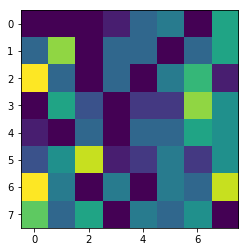

[[ 0.  0.  0.  4.  4.  6.  0.  5.]
 [ 5.  5.  0.  4.  2.  6.  9.  4.]
 [ 9.  2.  0.  5.  0.  4.  3.  2.]
 [ 0.  3.  9.  5.  9.  3.  8.  1.]
 [ 1.  0.  6.  0.  3.  4.  7.  5.]
 [ 8.  4.  5.  3.  6.  8.  1.  6.]
 [12.  5.  0.  7.  0.  5.  4.  7.]
 [ 4.  3.  4.  0.  8.  7.  9.  0.]]


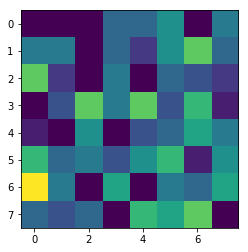

[[ 0.  0.  0.  7.  6.  3.  0.  5.]
 [ 3.  3.  0.  2.  3.  5.  8.  4.]
 [ 7.  6.  0. 10.  0.  4.  6.  0.]
 [ 0.  3.  4.  6. 10.  3.  7.  5.]
 [ 0.  0.  6.  0.  2.  2.  7.  6.]
 [ 6.  3.  9.  3.  7.  4.  2.  3.]
 [ 8.  6.  0.  1.  0.  5.  3.  7.]
 [ 6. 10.  6.  0.  7.  7.  7.  0.]]


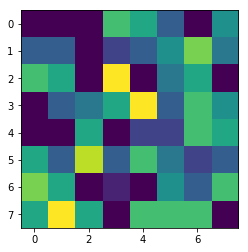

[[ 0.  0.  0.  6.  4.  3.  0.  7.]
 [ 5.  5.  0.  7.  2.  8.  8.  3.]
 [ 6.  1.  0.  7.  0.  1.  7.  3.]
 [ 0.  7. 11.  3. 12.  2.  6.  5.]
 [ 9.  0.  2.  0.  2.  7.  8.  6.]
 [ 7.  5.  0.  4.  7.  7.  3.  4.]
 [ 4.  0.  0.  3.  0.  8. 12.  1.]
 [ 4.  3.  9.  0.  1.  7.  6.  0.]]


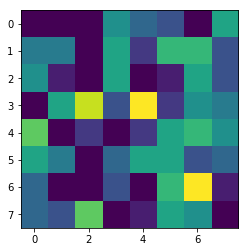

[[ 0.  0.  0.  2.  8.  8.  0.  5.]
 [ 1.  4.  0.  4.  4.  1.  3.  5.]
 [ 7.  5.  0.  3.  0.  7.  8.  6.]
 [ 0.  9.  7.  2.  3.  0.  4.  8.]
 [ 4.  0.  9.  0.  5.  5.  1. 10.]
 [ 1.  9.  6.  4.  0.  7.  1.  7.]
 [ 8.  3.  0.  7.  0.  6.  6.  2.]
 [ 6.  4.  7.  0.  1. 11.  8.  0.]]


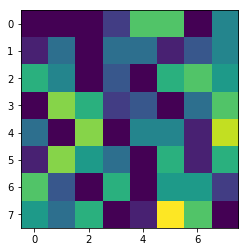

[[ 0.  0.  0.  3.  3.  4.  0.  7.]
 [ 3.  1.  0.  4.  4.  3.  6.  2.]
 [10.  3.  0.  9.  1.  4.  1.  2.]
 [ 0.  6.  2.  7.  8.  4.  6.  1.]
 [ 3.  0.  8.  0.  4.  7.  6.  7.]
 [ 7.  5.  2.  4.  6.  6.  3. 10.]
 [12.  3.  0. 10.  0.  2.  2.  7.]
 [ 1.  3.  3.  0.  9.  9. 13.  0.]]


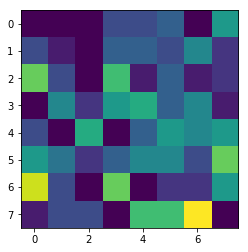

[[ 0.  0.  0.  7.  6.  4.  0.  5.]
 [ 4.  3.  0.  2.  4.  5.  8.  5.]
 [ 6.  5.  0.  8.  0.  4.  5.  1.]
 [ 0.  3.  6.  8. 10.  4.  8.  1.]
 [ 1.  0.  6.  0.  5.  1.  6.  7.]
 [ 5.  4.  7.  3.  7.  5.  3.  4.]
 [ 8.  7.  0.  6.  0.  5.  3.  5.]
 [ 4.  8.  2.  0.  9.  6.  8.  0.]]


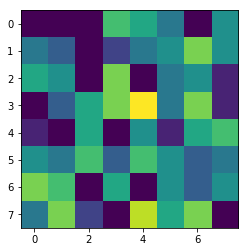

[[ 0.  0.  0.  3.  7.  4.  0.  8.]
 [ 4.  2.  0.  3.  2.  4.  8.  4.]
 [10.  3.  0.  7.  0.  4.  5.  2.]
 [ 0.  5.  6.  3.  8.  3.  4.  5.]
 [ 4.  0.  6.  0.  4.  5.  6.  7.]
 [ 5.  9.  7.  4.  4.  7.  1.  6.]
 [ 8.  5.  0.  5.  0.  4.  7.  3.]
 [ 4.  7.  4.  0.  6.  6.  9.  0.]]


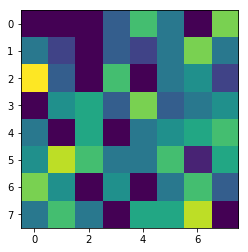

[[ 0.  0.  0.  6.  7.  3.  0.  5.]
 [ 4.  2.  0.  0.  6.  4.  7.  8.]
 [ 3.  7.  0.  8.  0.  3.  9.  0.]
 [ 0.  6.  8.  7.  9.  1. 10.  3.]
 [ 4.  0.  5.  0.  7.  3.  3. 12.]
 [ 4.  0.  6.  2.  5.  6.  2.  4.]
 [ 6.  5.  0.  4.  0. 10.  8.  4.]
 [ 5. 10.  2.  0.  5.  2.  6.  0.]]


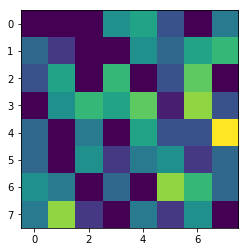

[[ 0.  0.  0.  7.  3.  4.  0.  6.]
 [ 2. 11.  0.  6.  4.  3.  3.  7.]
 [ 5.  7.  0.  5.  0.  4.  9.  5.]
 [ 0.  4.  6.  5.  6.  1.  5.  2.]
 [ 3.  0.  6.  0.  3.  2.  5.  6.]
 [ 6.  7.  4.  3.  6.  7.  2.  6.]
 [ 7.  6.  0.  5.  0.  9.  4.  8.]
 [ 4.  2.  3.  0.  5.  8.  6.  0.]]


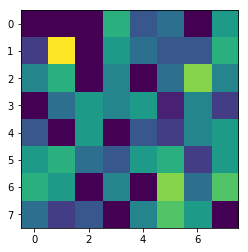

[[0. 0. 0. 6. 3. 6. 0. 7.]
 [3. 6. 0. 4. 2. 4. 2. 7.]
 [5. 7. 0. 3. 0. 4. 9. 8.]
 [0. 4. 6. 6. 6. 2. 5. 3.]
 [1. 0. 8. 0. 4. 4. 7. 2.]
 [6. 8. 4. 3. 4. 6. 1. 7.]
 [8. 7. 0. 9. 0. 5. 4. 7.]
 [4. 3. 7. 0. 4. 7. 7. 0.]]


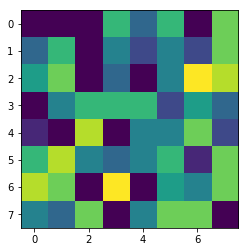

[[ 0.  0.  0.  4.  3.  7.  0.  3.]
 [ 3.  9.  0.  5.  2.  4.  2.  7.]
 [ 8.  6.  0.  2.  0.  5.  7.  6.]
 [ 0.  7.  6.  5.  6.  3.  8.  7.]
 [ 0.  0.  8.  0.  4.  4.  4.  3.]
 [ 7.  2.  6.  4.  3.  6.  1.  7.]
 [12.  6.  0.  7.  0.  7.  0.  9.]
 [ 4.  1.  3.  0.  6.  7.  7.  0.]]


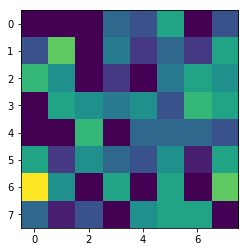

[[ 0.  0.  0.  4.  5.  3.  0.  0.]
 [ 5.  4.  0.  2.  6.  6.  7.  4.]
 [ 5.  6.  0.  7.  0.  2.  6.  0.]
 [ 0.  3.  9.  6. 13.  1.  7.  7.]
 [ 3.  0.  6.  0.  4.  9.  6. 10.]
 [ 4.  0.  7.  8.  2.  5.  1.  4.]
 [ 6.  8.  0.  2.  0. 12.  6.  5.]
 [ 5.  3.  1.  0.  5.  4.  6.  0.]]


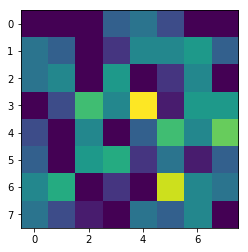

[[ 0.  0.  0.  6.  8.  4.  0.  2.]
 [ 5.  2.  0.  0.  7.  5. 11.  4.]
 [ 7.  6.  0.  8.  0.  4.  3.  0.]
 [ 0.  1.  7.  7. 12.  3.  7.  2.]
 [ 1.  0.  6.  0.  6.  4.  5. 11.]
 [ 0.  1.  9.  3.  4.  5.  2.  1.]
 [ 7.  6.  0.  7.  0.  8.  5.  5.]
 [ 8.  7.  2.  0.  8.  5.  8.  0.]]


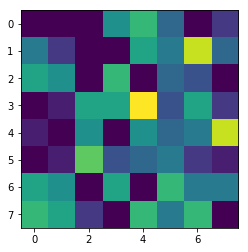

[[ 0.  0.  0.  5.  6.  7.  0.  7.]
 [ 0.  7.  0.  4.  3.  1.  2.  7.]
 [ 2.  8.  0.  3.  0.  7. 10.  7.]
 [ 0. 10.  5.  6.  0.  0.  4.  8.]
 [ 2.  0. 10.  0.  4.  1.  0.  9.]
 [ 4.  9.  5.  2.  3.  6.  2.  9.]
 [ 8.  4.  0.  5.  0.  6.  3.  6.]
 [ 5.  7.  6.  0.  3. 11.  7.  0.]]


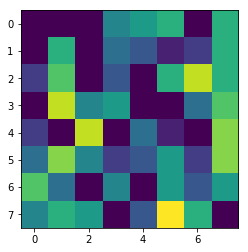

[[ 0.  0.  0.  6.  4.  5.  0.  9.]
 [ 1.  7.  0.  6.  1.  5.  6.  3.]
 [ 7.  5.  0.  7.  0.  7.  5.  5.]
 [ 0.  9.  5.  4.  5.  2.  3.  6.]
 [ 7.  0.  3.  0.  1.  6.  4.  7.]
 [ 2.  8.  2.  3.  7.  7.  4.  3.]
 [ 6.  2.  0.  3.  0.  8. 10.  4.]
 [ 7.  6.  6.  0.  3.  9.  6.  0.]]


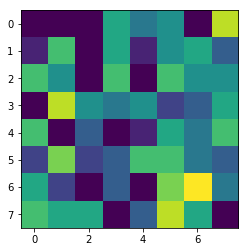

[[ 0.  0.  0.  5.  4.  6.  0.  7.]
 [ 3.  7.  0.  3.  2.  3.  3.  8.]
 [ 4.  6.  0.  4.  0.  3. 11.  7.]
 [ 0.  3.  8.  4.  6.  1.  6.  4.]
 [ 2.  0.  7.  0.  3.  3.  7.  5.]
 [ 7.  8.  6.  2.  4.  8.  0.  7.]
 [ 7.  8.  0.  5.  0.  7.  5.  7.]
 [ 5.  5.  7.  0.  3.  5.  6.  0.]]


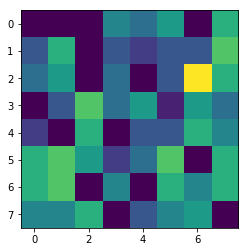

[[0. 0. 0. 4. 5. 7. 0. 5.]
 [2. 4. 0. 4. 1. 6. 5. 2.]
 [8. 4. 0. 5. 0. 9. 5. 7.]
 [0. 8. 7. 4. 6. 5. 3. 7.]
 [3. 0. 6. 0. 4. 7. 4. 4.]
 [2. 8. 5. 4. 5. 6. 2. 4.]
 [9. 5. 0. 5. 0. 4. 8. 3.]
 [4. 5. 3. 0. 6. 9. 8. 0.]]


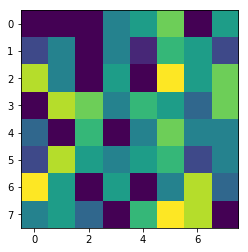

[[ 0.  0.  0.  7.  3.  7.  0.  4.]
 [ 3.  7.  0.  4.  2.  5.  1.  8.]
 [ 2.  4.  0.  5.  0.  4. 12.  6.]
 [ 0.  5.  8.  5.  6.  3.  8.  3.]
 [ 4.  0.  3.  0.  2.  3.  7.  4.]
 [ 5.  6.  7.  3.  5.  7.  1.  6.]
 [ 7.  6.  0.  5.  0.  5.  6.  7.]
 [ 6.  6.  8.  0.  0.  7.  6.  0.]]


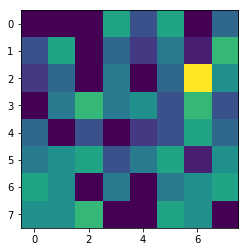

[[ 0.  0.  0.  2.  5.  2.  0.  7.]
 [ 6.  2.  0.  1.  7.  1. 10.  1.]
 [ 3.  6.  0.  7.  0.  5.  4.  1.]
 [ 0.  3.  7.  7.  9.  0.  6.  4.]
 [ 2.  0.  9.  0.  3.  8.  2. 15.]
 [ 6.  0.  5.  3.  0.  6.  1.  7.]
 [ 6.  5.  0.  4.  0.  6.  7. 10.]
 [10.  7.  6.  0.  8.  4.  9.  0.]]


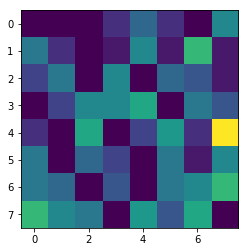

[[ 0.  0.  0.  1.  3.  7.  0.  0.]
 [ 5.  8.  0.  6.  1.  4.  4.  4.]
 [ 9.  0.  0.  5.  0.  7.  4.  2.]
 [ 0.  2. 10.  0.  1.  4.  5.  5.]
 [ 7.  0.  8.  0.  5.  9.  5.  3.]
 [ 5.  9.  7.  5.  1.  7.  2.  8.]
 [ 9.  3.  0.  8.  0.  4.  9.  5.]
 [ 1.  2.  7.  0.  4. 14.  8.  0.]]


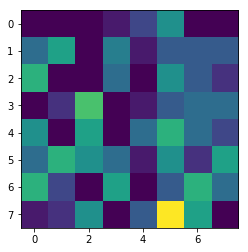

[[ 0.  0.  0.  5.  4.  3.  0.  9.]
 [ 3.  5.  0.  4.  2.  6.  7.  6.]
 [ 6.  6.  0.  8.  0.  3.  6.  4.]
 [ 0.  8.  9.  5.  9.  1.  6.  5.]
 [ 6.  0.  4.  0.  4.  3.  4.  8.]
 [ 8.  4.  1.  2.  8.  6.  4.  3.]
 [ 5.  2.  0.  1.  0. 11.  9.  2.]
 [ 4.  5.  5.  0.  5.  6.  4.  0.]]


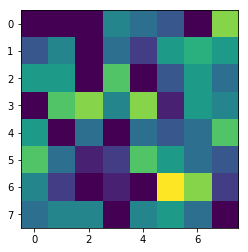

[[ 0.  0.  0.  3.  9.  4.  0. 10.]
 [12.  5.  0.  3.  8.  3. 17.  1.]
 [ 5.  3.  0.  0.  0.  1.  0.  0.]
 [ 0.  4.  8.  7. 12.  2.  7.  3.]
 [ 1.  0.  9.  0.  2.  4.  1. 12.]
 [ 9.  2.  0.  0.  3.  7.  3.  5.]
 [ 9.  0.  0.  6.  0.  5.  6.  7.]
 [ 8.  3.  4.  0. 13.  0. 12.  0.]]


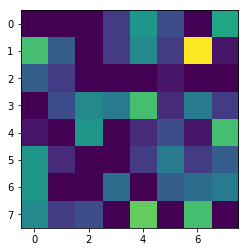

[[ 0.  0.  0.  3.  5.  8.  0.  5.]
 [ 4.  2.  0.  3.  0.  7.  5.  2.]
 [ 6.  3.  0.  3.  0.  8.  6.  9.]
 [ 0.  9. 11.  7.  9.  6.  4.  6.]
 [ 2.  0.  8.  0.  5.  5.  1.  3.]
 [ 6.  6.  2.  3.  5.  7.  2.  4.]
 [ 9.  4.  0.  7.  0.  4.  8.  2.]
 [ 3.  5.  3.  0.  7.  6.  7.  0.]]


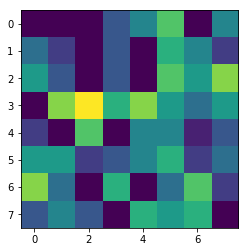

[[ 0.  0.  0.  4.  8.  1.  0.  9.]
 [ 6.  2.  0.  1.  2.  5. 12.  6.]
 [ 5.  8.  0.  7.  0.  0.  3.  2.]
 [ 0.  5.  7.  8.  9.  3.  4.  7.]
 [ 3.  0.  8.  0.  5.  2.  4.  7.]
 [ 8.  4.  4.  3.  7.  5.  3.  5.]
 [ 5.  6.  0.  2.  0.  8.  6.  3.]
 [ 2. 11.  1.  0. 11.  0.  8.  0.]]


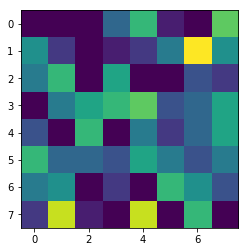

[[ 0.  0.  0.  3.  1.  5.  0.  0.]
 [ 5.  9.  0.  5.  1.  6.  3.  5.]
 [12.  4.  0.  5.  0.  6.  3.  3.]
 [ 0.  5.  6.  2.  5.  7.  9.  7.]
 [ 2.  0.  8.  0.  8. 10.  5.  0.]
 [ 7.  1.  5.  6.  4.  3.  5.  5.]
 [12.  3.  0.  9.  0.  7.  4.  8.]
 [ 0.  0.  3.  0.  8. 10.  5.  0.]]


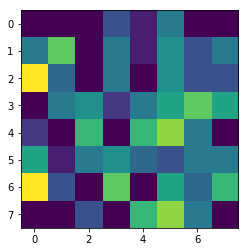

[[ 0.  0.  0.  0.  0.  1.  0.  8.]
 [ 2.  4.  0.  4.  3.  2.  6.  3.]
 [ 5.  2.  0. 15.  0.  5.  5.  0.]
 [ 0.  8.  5.  3.  3.  1.  9.  2.]
 [ 8.  0.  3.  0.  5.  7.  4. 14.]
 [ 9.  3.  5.  2.  8.  7.  4.  9.]
 [ 8.  1.  0.  0.  0.  7.  8.  8.]
 [ 3.  9.  4.  0.  5. 11.  6.  0.]]


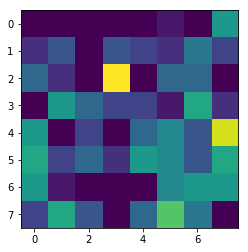

[[ 0.  0.  0.  6.  4.  4.  0.  3.]
 [ 2.  4.  0.  3.  4.  4.  2.  4.]
 [ 6.  3.  0. 10.  0.  5.  7.  1.]
 [ 0.  2.  3.  6.  7.  4.  6.  3.]
 [ 5.  0.  3.  0.  3.  5.  9.  7.]
 [ 3.  5. 12.  6.  5.  5.  2.  8.]
 [ 8. 10.  0.  5.  0.  3.  4.  7.]
 [ 5.  7.  3.  0.  4.  8.  9.  0.]]


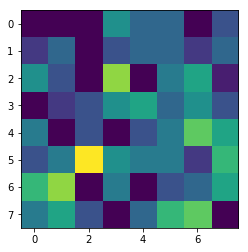

[[ 0.  0.  0.  5.  1.  5.  0.  9.]
 [ 2. 10.  0.  6.  1.  3.  4.  3.]
 [ 8.  8.  0.  7.  0.  9.  2.  5.]
 [ 0. 11.  2.  5.  0.  4.  4.  6.]
 [ 8.  0.  3.  0.  3.  7.  1.  6.]
 [ 1.  7.  2.  1.  8.  4.  8.  2.]
 [ 6.  2.  0.  4.  0. 10. 10.  7.]
 [ 9.  5.  3.  0.  7.  8.  2.  0.]]


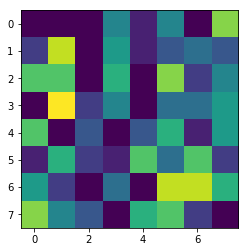

[[ 0.  0.  0.  4.  6.  5.  0.  7.]
 [ 1.  7.  0.  4.  5.  1.  5.  4.]
 [ 7.  4.  0.  8.  0.  4.  9.  1.]
 [ 0.  7.  5.  2.  6.  0.  8.  5.]
 [ 2.  0.  3.  0.  1.  2.  7. 11.]
 [ 4.  6. 11.  2.  5.  7.  1.  7.]
 [ 9.  4.  0.  0.  0.  6.  4.  8.]
 [ 9.  8.  7.  0.  4. 10.  6.  0.]]


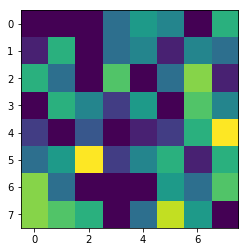

[[ 0.  0.  0.  7.  3.  5.  0.  3.]
 [ 1.  8.  0.  6.  3.  6.  2.  5.]
 [ 7.  6.  0.  6.  0.  8.  5.  3.]
 [ 0. 11.  4.  6.  3.  5.  8.  8.]
 [ 6.  0.  4.  0.  5.  6.  2.  5.]
 [ 1.  2.  5.  4.  7.  3.  7.  3.]
 [ 8.  2.  0.  4.  0.  9.  7.  6.]
 [ 5.  5.  3.  0.  5.  9.  4.  0.]]


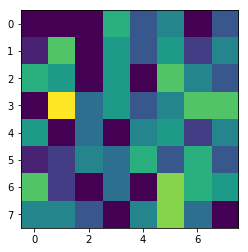

[[ 0.  0.  0.  5.  7.  3.  0.  7.]
 [ 5.  4.  0.  3.  2.  7.  9.  6.]
 [ 7.  7.  0.  6.  0.  1.  6.  5.]
 [ 0.  4. 10.  6. 10.  2.  5.  6.]
 [ 3.  0.  7.  0.  5.  3.  7.  5.]
 [ 8.  5.  3.  4.  8.  6.  2.  3.]
 [ 4.  6.  0.  3.  0. 10.  6.  1.]
 [ 1.  5.  2.  0.  8.  3.  4.  0.]]


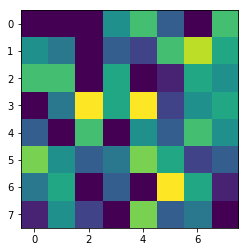

[[ 0.  0.  0.  4.  4.  5.  0.  4.]
 [ 2.  6.  0.  5.  4.  3.  5.  2.]
 [10.  5.  0.  7.  0.  8.  1.  2.]
 [ 0.  6.  2.  5.  6.  5.  4.  5.]
 [ 2.  0.  8.  0.  4.  7.  3.  7.]
 [ 3.  4.  6.  4.  4.  4.  4.  5.]
 [11.  4.  0.  8.  0.  5.  3.  9.]
 [ 4.  3.  3.  0.  8. 11.  9.  0.]]


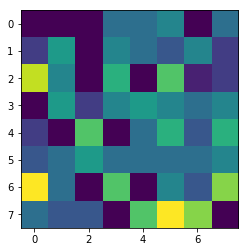

[[ 0.  0.  0.  4.  3.  6.  0.  5.]
 [ 0.  5.  0.  4.  1.  5.  4.  3.]
 [ 9.  6.  0.  8.  0. 10.  3.  4.]
 [ 0. 10.  4.  6.  4.  5.  5.  6.]
 [ 4.  0.  6.  0.  5.  7.  2.  6.]
 [ 1.  5.  5.  4.  6.  4.  5.  3.]
 [ 9.  4.  0.  5.  0.  7.  7.  6.]
 [ 5.  5.  2.  0.  7. 10.  5.  0.]]


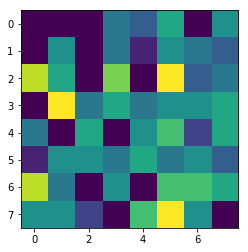

[[ 0.  0.  0.  5.  2.  4.  0.  9.]
 [ 2. 10.  0.  6.  1.  4.  5.  3.]
 [ 7.  8.  0.  7.  1.  8.  2.  5.]
 [ 0. 11.  3.  6.  1.  4.  3.  7.]
 [ 8.  0.  2.  0.  2.  7.  2.  7.]
 [ 1.  7.  1.  1.  8.  4.  8.  1.]
 [ 5.  2.  0.  4.  0. 10. 10.  6.]
 [ 9.  5.  4.  0.  6.  8.  3.  0.]]


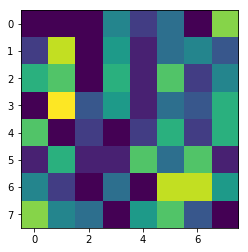

[[ 0.  0.  0.  6.  4.  2.  0.  7.]
 [ 2.  3.  0.  2.  4.  5.  1. 12.]
 [ 5. 10.  0.  8.  0.  1. 11.  2.]
 [ 0.  9.  6.  5.  6.  2. 11.  6.]
 [ 5.  0.  9.  0. 10.  2.  3.  5.]
 [ 9.  3.  3.  3.  7.  3.  4.  6.]
 [ 5.  3.  0.  3.  0. 10.  5.  2.]
 [ 0.  9.  3.  0.  4.  3.  4.  0.]]


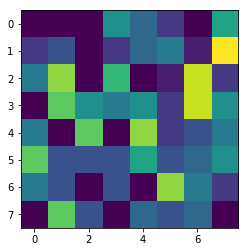

[[ 0.  0.  0.  3.  4.  6.  0.  6.]
 [ 3. 10.  0.  4.  1.  2.  4.  7.]
 [10.  6.  0.  3.  0.  5.  8.  4.]
 [ 0.  5.  4.  0.  2.  3.  6.  6.]
 [ 2.  0.  6.  0.  4.  6.  6.  2.]
 [ 4.  9.  8.  2.  3.  7.  1.  6.]
 [10.  6.  0.  7.  0.  6.  6. 10.]
 [ 6.  5.  6.  0.  5.  5.  7.  0.]]


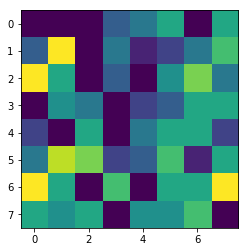

[[ 0.  0.  0.  3.  1.  7.  0.  5.]
 [ 2.  4.  0.  3.  0.  6.  4.  1.]
 [ 9.  4.  0.  8.  1. 11.  2.  4.]
 [ 0.  9.  6.  6.  3.  8.  6.  2.]
 [ 4.  0.  6.  0.  7.  7.  1.  5.]
 [ 1.  6.  5.  2.  6.  4.  6.  3.]
 [10.  4.  0.  9.  0.  4.  7.  6.]
 [ 4.  5.  1.  0.  9. 12.  5.  0.]]


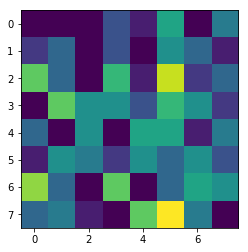

[[ 0.  0.  0.  0.  8.  4.  0.  7.]
 [ 3.  2.  0.  5.  2.  3.  3.  4.]
 [ 9.  3.  0.  3.  0.  3.  5.  8.]
 [ 0. 11.  7.  5.  6.  2.  3. 14.]
 [ 6.  0.  8.  0.  5.  6.  5.  8.]
 [ 6.  7.  4.  7.  1.  6.  2. 10.]
 [ 6.  5.  0.  6.  0.  5.  4.  0.]
 [ 3.  2.  4.  0.  5.  8.  8.  0.]]


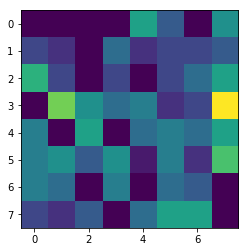

[[ 0.  0.  0.  3.  6.  5.  0.  4.]
 [ 4.  4.  0.  3.  0.  5.  4.  3.]
 [ 6.  3.  0.  4.  0.  4.  5.  8.]
 [ 0.  4.  9.  7.  7.  4.  2. 11.]
 [ 3.  0.  8.  0.  4.  5.  7.  3.]
 [ 6.  7.  8.  7.  4.  6.  1.  8.]
 [ 6. 10.  0.  4.  0.  4.  3.  3.]
 [ 3.  4.  3.  0.  7.  7.  7.  0.]]


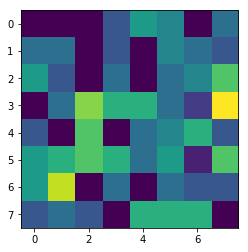

[[ 0.  0.  0.  3.  5.  1.  0.  5.]
 [ 2.  2.  0.  5.  1.  6.  2.  5.]
 [ 4.  3.  0. 10.  0.  2.  6.  5.]
 [ 0.  8.  8.  8.  8.  3.  2. 12.]
 [ 8.  0.  5.  0.  6.  5.  6.  7.]
 [10.  3.  4.  9.  6.  5.  3.  9.]
 [ 3.  6.  0.  1.  0.  9.  4.  0.]
 [ 0.  6.  1.  0.  5.  9.  6.  0.]]


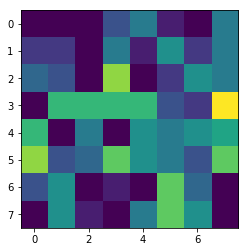

[[ 0.  0.  0.  8.  3.  6.  0.  6.]
 [ 2. 11.  0.  5.  4.  3.  1.  9.]
 [ 5.  7.  0.  3.  0.  5. 11.  6.]
 [ 0.  5.  5.  4.  5.  3.  6.  3.]
 [ 2.  0.  5.  0.  3.  2.  6.  4.]
 [ 4.  7.  6.  2.  6.  7.  1.  5.]
 [ 8.  7.  0.  6.  0.  7.  3.  8.]
 [ 5.  3.  4.  0.  4.  6.  6.  0.]]


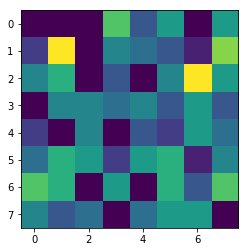

[[ 0.  0.  0.  7.  4.  6.  0.  3.]
 [ 3.  4.  0.  3.  3.  6.  3.  8.]
 [ 1.  3.  0.  7.  0.  2. 13.  2.]
 [ 0.  4. 11.  4.  7.  3. 10.  2.]
 [ 6.  0.  2.  0.  3.  3.  8.  6.]
 [ 5.  6.  8.  3.  6.  7.  2.  6.]
 [ 6.  5.  0.  4.  0.  6.  8.  3.]
 [ 4.  9.  7.  0.  0.  7.  6.  0.]]


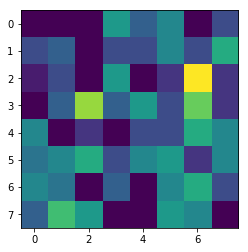

[[ 0.  0.  0.  5.  4.  6.  0.  6.]
 [ 2.  5.  0.  6.  1.  6.  1.  2.]
 [ 8.  3.  0.  6.  1. 10.  3.  6.]
 [ 0. 12.  4.  6.  3.  7.  4. 10.]
 [ 7.  0.  5.  0.  5.  7.  2.  3.]
 [ 1.  8.  4.  6.  6.  3.  6.  5.]
 [ 7.  2.  0.  5.  0.  2.  8.  3.]
 [ 4.  5.  4.  0.  5. 10.  6.  0.]]


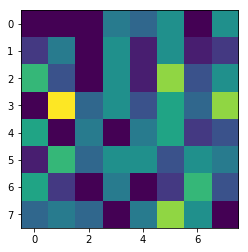

[[ 0.  0.  0.  7.  5.  6.  0.  0.]
 [ 5. 12.  0.  7.  5.  3.  0. 11.]
 [ 4.  4.  0.  0.  0.  3.  8.  4.]
 [ 0.  5.  4.  4.  2.  3.  7.  9.]
 [ 7.  0.  9.  0.  5.  6.  2.  2.]
 [ 5.  4.  4.  6.  1.  5.  2. 11.]
 [ 9.  5.  0. 10.  0.  7.  3.  7.]
 [ 1.  1.  3.  0.  3.  7. 10.  0.]]


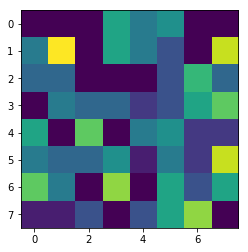

[[ 0.  0.  0.  2.  7.  3.  0.  9.]
 [ 5.  3.  0.  2.  2.  2.  9.  3.]
 [ 2.  3.  0.  7.  0.  3.  4.  4.]
 [ 0.  3.  8.  8.  5.  1.  3.  7.]
 [ 4.  0.  8.  0.  2.  3.  4. 10.]
 [ 9.  7.  6.  3.  4.  7.  1.  9.]
 [ 5.  8.  0.  2.  0.  4.  6.  6.]
 [ 5.  9.  5.  0.  8.  6.  9.  0.]]


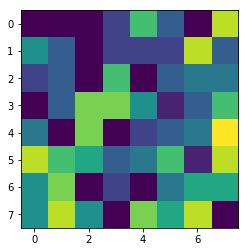

[[ 0.  0.  0.  4.  4.  6.  0.  1.]
 [ 5.  8.  0.  6.  3.  4.  1.  8.]
 [ 8.  1.  0.  1.  0.  4.  4.  4.]
 [ 0.  7.  6.  6.  6.  4.  9.  8.]
 [ 3.  0.  8.  0.  5.  6.  4.  3.]
 [ 7.  0.  5.  6.  1.  6.  2. 10.]
 [12.  6.  0. 10.  0.  5.  1.  9.]
 [ 3.  0.  2.  0.  6.  6. 10.  0.]]


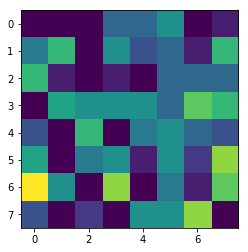

[[ 0.  0.  0.  3.  3.  4.  0.  2.]
 [ 4.  1.  0.  0.  2.  7. 10.  4.]
 [ 6.  6.  0. 10.  1.  4.  4.  0.]
 [ 0.  3.  8.  6. 11.  3.  8.  3.]
 [ 1.  0.  7.  0.  5.  7.  4.  8.]
 [ 6.  0.  7.  4.  4.  5.  2.  2.]
 [ 9.  6.  0.  4.  0.  8.  8.  7.]
 [ 5.  9.  4.  0.  7.  6.  7.  0.]]


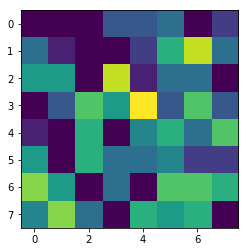

[[ 0.  0.  0.  5.  5.  6.  0.  5.]
 [ 5.  6.  0.  6.  2.  5.  3.  6.]
 [11.  0.  0.  3.  1.  4.  4.  3.]
 [ 0.  8.  2.  4.  5.  7.  8.  8.]
 [ 5.  0.  5.  0.  4.  5.  7.  0.]
 [ 4.  7.  6.  5.  4.  4.  3.  8.]
 [11.  4.  0.  9.  0.  0.  4.  6.]
 [ 2.  3.  5.  0.  6.  6. 10.  0.]]


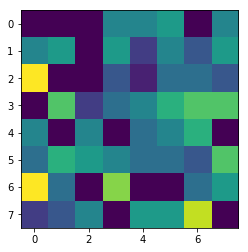

[[ 0.  0.  0.  5.  4.  6.  0.  7.]
 [ 3.  3.  0.  2.  1.  6.  5.  8.]
 [ 4.  7.  0.  5.  0.  2. 10.  6.]
 [ 0.  5.  9.  6.  7.  1.  8.  5.]
 [ 1.  0. 10.  0.  4.  3.  4.  4.]
 [10.  5.  2.  2.  5.  6.  1.  7.]
 [ 8.  4.  0.  4.  0.  7.  4.  5.]
 [ 0.  7.  6.  0.  5.  6.  7.  0.]]


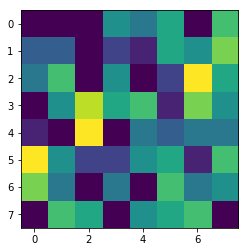

[[ 0.  0.  0.  7.  4.  5.  0.  6.]
 [ 4.  8.  0.  7.  2.  7.  7.  2.]
 [ 5.  2.  0.  5.  0.  3.  5.  4.]
 [ 0.  7.  8.  5. 10.  2.  4.  5.]
 [ 9.  0.  1.  0.  0.  7.  7.  7.]
 [ 4.  4.  1.  5.  6.  8.  3.  3.]
 [ 5.  2.  0.  4.  0.  8. 11.  4.]
 [ 8.  3.  6.  0.  2.  8.  7.  0.]]


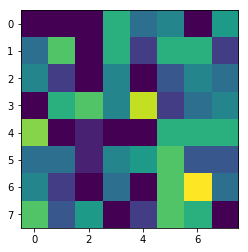

[[ 0.  0.  0.  4.  5.  5.  0.  5.]
 [ 3.  5.  0.  4.  2.  5.  4.  5.]
 [ 9.  3.  0.  6.  0.  4.  4.  3.]
 [ 0.  5.  5.  5.  6.  4.  6.  6.]
 [ 3.  0.  7.  0.  3.  4.  7.  4.]
 [ 7.  5.  7.  6.  6.  6.  2.  9.]
 [11.  7.  0.  5.  0.  4.  3.  6.]
 [ 1.  4.  1.  0.  7.  9. 10.  0.]]


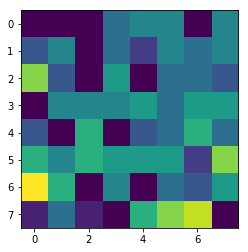

[[ 0.  0.  0.  5.  4.  4.  0.  3.]
 [ 3.  2.  0.  0.  8.  4.  7.  6.]
 [ 5.  6.  0. 10.  1.  3.  8.  0.]
 [ 0.  8.  7.  6. 10.  2. 15.  1.]
 [ 1.  0.  5.  0.  7.  3.  3. 13.]
 [ 3.  0.  6.  2.  5.  4.  3.  3.]
 [ 9.  1.  0.  3.  0.  9.  6.  7.]
 [ 6.  7.  4.  0.  5.  6.  5.  0.]]


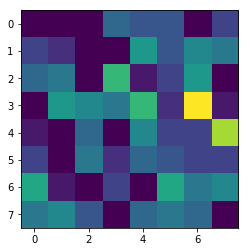

[[ 0.  0.  0.  5.  4.  5.  0.  5.]
 [ 2.  2.  0.  6.  1.  5.  4.  3.]
 [11.  3.  0.  7.  0.  3.  0.  5.]
 [ 0.  8.  1.  6.  7.  5.  3.  9.]
 [ 3.  0. 10.  0.  3.  7.  4.  2.]
 [ 8.  6.  2.  7.  5.  4.  4. 10.]
 [12.  2.  0.  8.  0.  1.  1.  6.]
 [ 0.  3.  5.  0.  7. 13. 13.  0.]]


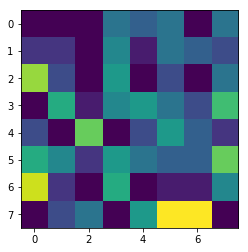

[[ 0.  0.  0.  2.  6.  3.  0.  7.]
 [ 3.  1.  0.  1.  2.  3.  5.  4.]
 [ 5.  6.  0.  7.  0.  4.  6.  6.]
 [ 0.  4.  8.  7. 10.  2.  3.  7.]
 [ 3.  0.  7.  0.  5.  5.  7.  9.]
 [ 7.  5.  7.  5.  3.  6.  0.  7.]
 [ 5. 10.  0.  6.  0.  6.  4.  4.]
 [ 5.  6.  2.  0.  7.  4.  7.  0.]]


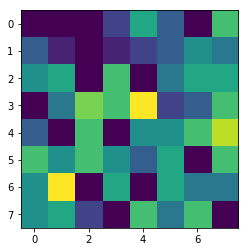

[[ 0.  0.  0.  4.  6.  6.  0.  3.]
 [ 5. 11.  0.  5.  3.  2.  4.  8.]
 [12.  5.  0.  0.  0.  6.  7.  4.]
 [ 0.  5.  4.  0.  5.  4.  8.  8.]
 [ 1.  0.  7.  0.  5.  6.  6.  0.]
 [ 3.  7.  9.  3.  1.  4.  1.  4.]
 [11.  5.  0.  9.  0.  5.  4.  9.]
 [ 6.  1.  6.  0.  6.  4.  6.  0.]]


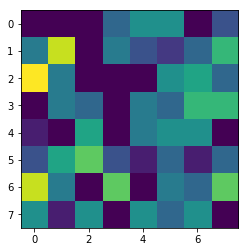

[[ 0.  0.  0.  3.  0.  7.  0.  4.]
 [ 2.  5.  0.  3.  1.  5.  5.  3.]
 [11.  6.  0.  9.  0. 10.  1.  3.]
 [ 0.  7.  4.  5.  3.  7.  6.  1.]
 [ 2.  0.  8.  0.  8.  7.  2.  4.]
 [ 3.  7.  5.  1.  7.  4.  6.  3.]
 [12.  3.  0. 10.  0.  5.  4.  8.]
 [ 2.  5.  1.  0. 10. 13.  5.  0.]]


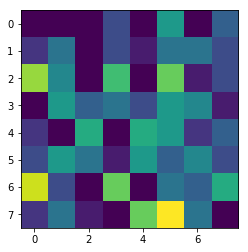

[[ 0.  0.  0.  5.  4.  8.  0.  4.]
 [ 5.  7.  0.  5.  0.  5.  3.  8.]
 [ 2.  2.  0.  2.  0.  1.  8.  6.]
 [ 0.  4.  8.  8.  4.  3.  8.  7.]
 [ 3.  0.  7.  0.  0.  2.  5.  2.]
 [10.  4.  5.  4.  5.  8.  1. 12.]
 [11.  7.  0.  5.  0.  5.  2.  8.]
 [ 2.  5.  5.  0.  4.  7. 10.  0.]]


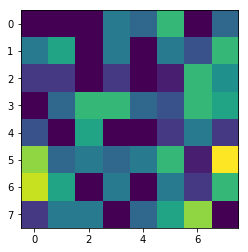

[[ 0.  0.  0.  2.  3.  4.  0.  8.]
 [ 3.  5.  0.  3.  2.  4.  6.  7.]
 [ 8.  8.  0.  6.  0.  3.  6.  4.]
 [ 0.  6.  6.  4.  7.  0.  9.  7.]
 [ 1.  0.  9.  0.  3.  5.  5.  6.]
 [ 9.  2.  4.  3.  4.  6.  1.  7.]
 [10.  5.  0.  2.  0.  8.  4.  9.]
 [ 2.  5.  5.  0.  7.  5.  8.  0.]]


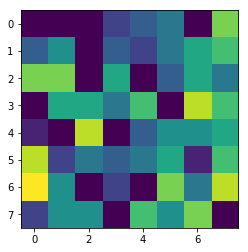

[[ 0.  0.  0.  4.  5.  5.  0.  6.]
 [ 6.  3.  0.  2.  2.  6.  9.  5.]
 [ 5.  3.  0.  4.  0.  2.  3.  2.]
 [ 0.  6.  8. 10.  8.  3. 11.  5.]
 [ 1.  0.  8.  0.  3.  3.  4.  6.]
 [ 9.  0.  4.  2.  5.  6.  2.  7.]
 [11.  6.  0.  5.  0.  4.  4.  8.]
 [ 5.  6.  4.  0.  9.  4.  9.  0.]]


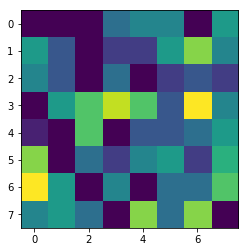

[[ 0.  0.  0.  7.  8.  5.  0.  2.]
 [ 4.  2.  0.  0.  5.  7. 11.  6.]
 [ 5.  8.  0.  8.  1.  5.  6.  0.]
 [ 0.  3.  8.  7. 10.  3.  8.  3.]
 [ 0.  0.  8.  0.  5.  3.  2.  9.]
 [ 2.  0.  7.  2.  5.  4.  3.  0.]
 [ 7.  4.  0.  4.  0.  9.  7.  5.]
 [ 5. 11.  3.  0.  8.  6.  6.  0.]]


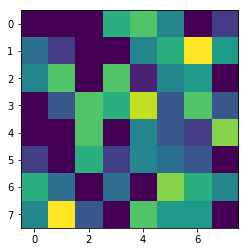

[[ 0.  0.  0.  5.  8.  3.  0. 10.]
 [ 6.  3.  0.  2.  3.  4.  9.  6.]
 [ 7.  4.  0.  5.  0.  0.  3.  3.]
 [ 0.  4.  5.  8.  8.  4.  4.  4.]
 [ 4.  0.  6.  0.  4.  1.  7.  6.]
 [ 7.  8.  4.  2.  8.  7.  2.  7.]
 [ 7.  7.  0.  6.  0.  5.  4.  3.]
 [ 3.  9.  0.  0. 10.  1. 10.  0.]]


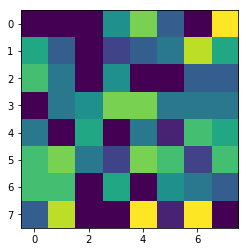

[[ 0.  0.  0.  4.  2.  7.  0.  2.]
 [ 4.  7.  0.  5.  2.  4.  1.  4.]
 [ 4.  1.  0.  5.  1.  7.  5.  5.]
 [ 0.  3.  7.  6.  5.  4.  4.  3.]
 [ 6.  0.  7.  0.  4.  7.  4.  5.]
 [ 5.  5.  5.  5.  3.  8.  2.  9.]
 [ 9.  8.  0. 10.  0.  4.  6.  7.]
 [ 3.  4.  1.  0.  5.  9. 10.  0.]]


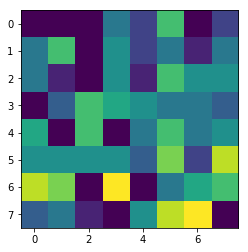

[[ 0.  0.  0.  7.  2.  4.  0.  7.]
 [ 5.  8.  0.  4.  2.  3.  1.  7.]
 [ 3.  4.  0.  6.  1.  3. 12.  5.]
 [ 0.  2.  7.  2.  6.  4.  7.  1.]
 [ 5.  0.  1.  0.  3.  4. 12.  3.]
 [ 5. 11. 11.  2.  6.  6.  2.  5.]
 [ 4.  7.  0.  5.  0.  3.  8.  7.]
 [ 8.  8.  9.  0.  0.  3.  4.  0.]]


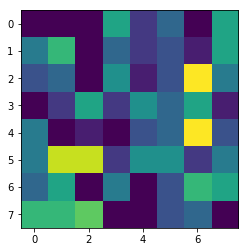

[[ 0.  0.  0.  4.  3.  6.  0.  8.]
 [ 0.  7.  0.  4.  1.  4.  5.  4.]
 [ 9.  8.  0.  7.  1.  8.  4.  4.]
 [ 0. 10.  3.  4.  2.  3.  4.  6.]
 [ 5.  0.  5.  0.  3.  7.  2.  6.]
 [ 1.  7.  3.  2.  7.  5.  5.  3.]
 [ 8.  3.  0.  4.  0.  8.  8.  7.]
 [ 7.  6.  4.  0.  6. 10.  5.  0.]]


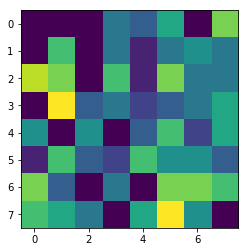

[[ 0.  0.  0.  8.  2.  3.  0.  6.]
 [ 2.  6.  0.  5.  4.  6.  2.  9.]
 [ 2.  7.  0.  8.  0.  3. 13.  6.]
 [ 0.  3. 11.  4.  9.  1.  6.  0.]
 [ 5.  0.  7.  0.  6.  2.  6.  6.]
 [ 9.  8.  2.  3.  7.  7.  2.  5.]
 [ 4.  4.  0.  4.  0. 10.  6.  2.]
 [ 0.  3.  4.  0.  2.  9.  4.  0.]]


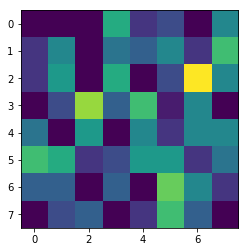

[[ 0.  0.  0.  6.  3.  2.  0.  7.]
 [ 5.  6.  0.  7.  2.  7.  9.  2.]
 [ 5.  2.  0.  6.  0.  1.  5.  4.]
 [ 0.  6. 10.  4. 13.  1.  3.  6.]
 [ 9.  0.  2.  0.  0.  9.  8.  7.]
 [ 7.  4.  0.  5.  5.  7.  3.  4.]
 [ 4.  1.  0.  2.  0.  9. 13.  3.]
 [ 6.  3.  8.  0.  1.  6.  6.  0.]]


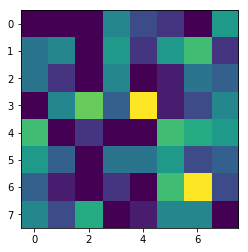

[[ 0.  0.  0.  4.  6.  6.  0.  2.]
 [ 6. 11.  0.  6.  4.  4.  1.  9.]
 [ 8.  0.  0.  1.  1.  3.  5.  1.]
 [ 0.  7.  6.  4.  4.  4. 10. 10.]
 [ 4.  0.  6.  0.  4.  2.  4.  3.]
 [ 7.  2.  8.  5.  3.  6.  2. 11.]
 [12.  7.  0.  7.  0.  6.  0.  7.]
 [ 1.  1.  1.  0.  7.  6. 10.  0.]]


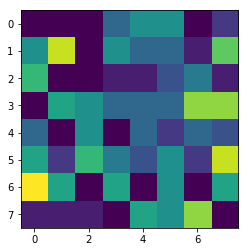

[[ 0.  0.  0.  7.  2.  7.  0.  6.]
 [ 3.  6.  0.  4.  2.  3.  1.  7.]
 [ 3.  5.  0.  2.  0.  5.  9.  8.]
 [ 0.  5.  5.  7.  6.  3.  7.  2.]
 [ 2.  0.  7.  0.  3.  4.  6.  3.]
 [ 5.  8.  5.  3.  3.  6.  1.  8.]
 [ 9.  7.  0. 11.  0.  3.  4.  9.]
 [ 6.  4.  7.  0.  3.  6.  8.  0.]]


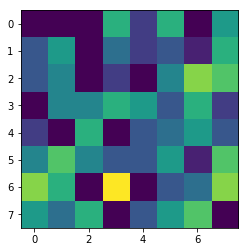

[[ 0.  0.  0.  5.  3.  6.  0.  8.]
 [ 2.  3.  0.  3.  4.  5.  2.  8.]
 [ 4.  5.  0.  6.  0.  5. 12.  5.]
 [ 0.  8. 10.  5.  9.  1.  9.  1.]
 [ 5.  0.  6.  0.  6.  4.  4.  9.]
 [ 6.  6.  2.  2.  5.  8.  1.  6.]
 [ 6.  4.  0.  7.  0.  8.  7.  3.]
 [ 2.  5.  5.  0.  1.  6.  6.  0.]]


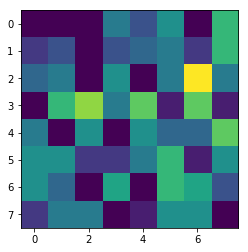

[[ 0.  0.  0.  6.  4.  5.  0.  6.]
 [ 4.  4.  0.  3.  1.  7.  8.  4.]
 [ 7.  4.  0.  6.  0.  3.  3.  4.]
 [ 0.  2.  7.  8. 10.  4.  6.  3.]
 [ 1.  0.  7.  0.  3.  3.  8.  3.]
 [ 9.  4.  5.  4.  7.  6.  2.  6.]
 [ 9.  7.  0.  6.  0.  3.  3.  7.]
 [ 3.  4.  4.  0.  9.  7.  9.  0.]]


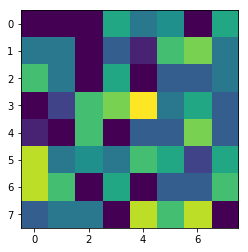

[[ 0.  0.  0.  5.  6.  8.  0.  3.]
 [ 3.  6.  0.  5.  1.  6.  2.  1.]
 [ 7.  2.  0.  3.  1. 11.  5.  7.]
 [ 0. 10.  7.  5.  5.  7.  3. 10.]
 [ 4.  0.  7.  0.  3.  6.  1.  2.]
 [ 1.  8.  6.  6.  4.  4.  3.  4.]
 [ 9.  3.  0.  3.  0.  2.  8.  4.]
 [ 5.  5.  4.  0.  5. 10.  8.  0.]]


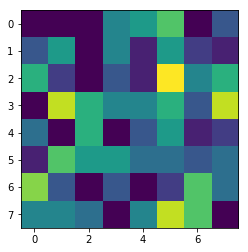

[[ 0.  0.  0.  6.  3.  4.  0.  5.]
 [ 1.  0.  0.  1.  5.  3.  3.  7.]
 [ 4.  8.  0.  9.  1.  4. 11.  0.]
 [ 0. 11.  2.  6.  5.  3. 13.  5.]
 [ 3.  0.  8.  0.  8.  5.  1.  8.]
 [ 3.  2.  7.  1.  4.  1.  4.  6.]
 [ 8.  0.  0.  7.  0.  4.  5.  6.]
 [ 5. 14. 10.  0.  2.  9.  6.  0.]]


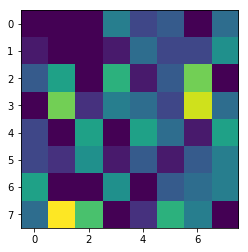

[[ 0.  0.  0.  4.  3.  4.  0.  6.]
 [ 2.  2.  0.  2.  6.  2.  2.  7.]
 [ 7.  5.  0.  6.  1.  3.  9.  1.]
 [ 0. 11.  4.  6.  6.  2. 15.  6.]
 [ 2.  0.  6.  0.  6.  5.  4. 10.]
 [ 3.  0.  7.  2.  2.  4.  3.  9.]
 [10.  3.  0.  7.  0.  5.  3.  8.]
 [ 7.  6.  8.  0.  2.  6.  7.  0.]]


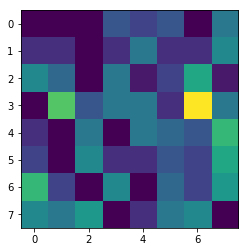

[[ 0.  0.  0.  6.  5.  4.  0.  5.]
 [ 0.  1.  0.  3.  3.  3.  0.  4.]
 [ 4.  6.  0.  9.  1.  6.  8.  5.]
 [ 0.  7.  3.  7.  6.  3.  3.  9.]
 [ 5.  0.  7.  0.  4.  6.  5.  7.]
 [ 3.  7.  9.  6.  3.  3.  2.  8.]
 [ 6.  6.  0.  4.  0.  3.  4.  4.]
 [ 4.  9.  7.  0.  2. 11.  8.  0.]]


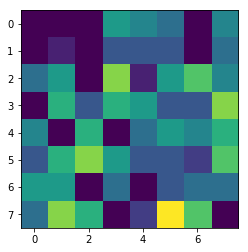

[[ 0.  0.  0.  2.  4.  4.  0.  4.]
 [ 1.  2.  0.  4.  3.  1.  2.  5.]
 [ 2.  3.  0. 10.  1.  3.  6.  0.]
 [ 0.  8.  5.  6.  2.  0.  7. 10.]
 [ 7.  0.  8.  0.  4.  5.  2. 13.]
 [ 7.  3.  8.  6.  2.  6.  2. 15.]
 [ 8.  3.  0.  2.  0.  5.  3.  5.]
 [ 3.  9.  7.  0.  2. 14. 10.  0.]]


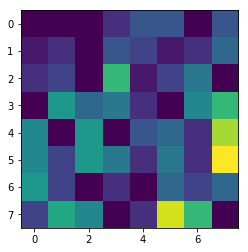

[[ 0.  0.  0.  4.  6.  3.  0.  8.]
 [ 2.  3.  0.  3.  4.  1.  6.  3.]
 [ 9.  6.  0.  7.  1.  3.  4.  2.]
 [ 0.  7.  1.  4.  8.  2.  7.  9.]
 [ 0.  0.  9.  0.  1.  4.  6.  7.]
 [ 7.  4.  7.  4.  3.  3.  2.  9.]
 [11.  3.  0.  1.  0.  2.  1.  9.]
 [ 5.  6.  8.  0.  7.  7. 11.  0.]]


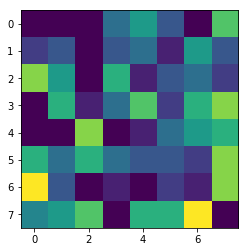

[[ 0.  0.  0.  6.  6.  5.  0.  6.]
 [ 4.  5.  0.  3.  6.  3.  8.  7.]
 [ 4.  6.  0.  3.  1.  1.  7.  2.]
 [ 0.  8.  4.  6.  8.  0. 12.  6.]
 [ 2.  0.  9.  0.  1.  5.  1.  8.]
 [ 6.  0.  1.  2.  4.  6.  2.  8.]
 [10.  1.  0.  3.  0.  7.  6.  9.]
 [ 5.  8.  6.  0.  4.  4. 11.  0.]]


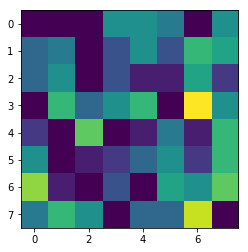

[[ 0.  0.  0.  3.  3.  3.  0.  6.]
 [ 2. 10.  0.  6.  4.  1.  3.  6.]
 [13.  6.  0.  4.  0.  4.  7.  3.]
 [ 0.  7.  2.  0.  6.  2.  7.  8.]
 [ 3.  0.  4.  0.  5.  7.  9.  4.]
 [ 4.  6.  9.  4.  3.  5.  2.  6.]
 [10.  5.  0.  6.  0.  8.  3.  9.]
 [ 7.  1.  6.  0.  4.  6.  6.  0.]]


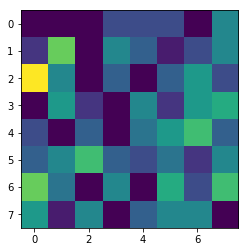

[[ 0.  0.  0.  2.  8.  5.  0.  7.]
 [ 4.  2.  0.  2.  3.  2.  7.  5.]
 [ 7.  4.  0.  3.  1.  4.  5.  4.]
 [ 0.  4.  6.  5.  5.  2.  4.  7.]
 [ 2.  0.  9.  0.  3.  5.  6.  7.]
 [ 4.  9.  6.  4.  2.  6.  1.  8.]
 [ 8.  7.  0.  7.  0.  3.  5.  5.]
 [ 5.  6.  5.  0.  6.  6. 10.  0.]]


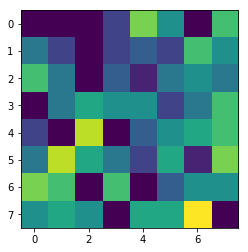

[[ 0.  0.  0.  2.  3.  3.  0.  4.]
 [ 1.  2.  0.  4.  1.  3.  1.  5.]
 [ 1.  4.  0. 10.  1.  3.  7.  4.]
 [ 0.  7.  7.  8.  4.  1.  3. 11.]
 [ 7.  0.  6.  0.  4.  7.  4. 11.]
 [ 9.  3.  7.  7.  3.  7.  2. 13.]
 [ 5.  7.  0.  2.  0.  7.  4.  4.]
 [ 2.  8.  4.  0.  3. 11.  9.  0.]]


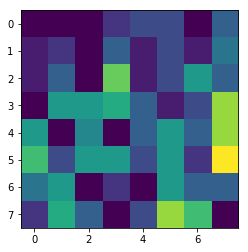

[[ 0.  0.  0.  3. 10.  7.  0.  3.]
 [ 6.  3.  0.  2.  2.  4.  7.  4.]
 [ 5.  2.  0.  1.  1.  7.  4.  5.]
 [ 0.  3.  9.  6.  6.  5.  4.  8.]
 [ 2.  0.  9.  0.  4.  3.  3.  6.]
 [ 3.  8.  8.  4.  1.  6.  1.  6.]
 [ 7.  8.  0.  8.  0.  3.  5.  2.]
 [ 5.  6.  4.  0.  7.  6.  9.  0.]]


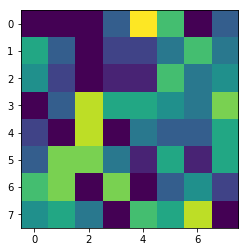

[[ 0.  0.  0.  6.  2.  5.  0.  8.]
 [ 3.  9.  0.  7.  1.  5.  5.  2.]
 [ 6.  4.  0.  6.  0.  6.  4.  5.]
 [ 0.  9.  5.  5.  5.  3.  3.  6.]
 [10.  0.  1.  0.  0.  7.  4.  6.]
 [ 2.  7.  1.  3.  7.  6.  5.  3.]
 [ 5.  2.  0.  4.  0.  8. 12.  5.]
 [ 9.  5.  6.  0.  3.  8.  5.  0.]]


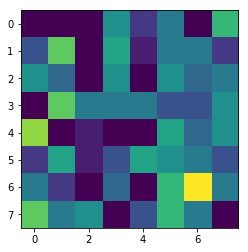

[[ 0.  0.  0.  6.  5.  7.  0.  3.]
 [ 5.  5.  0.  1.  3.  7.  8.  6.]
 [ 9.  6.  0.  1.  0.  5.  5.  5.]
 [ 0.  5.  7.  6.  9.  5.  8.  4.]
 [ 0.  0.  6.  0.  6.  5.  5.  2.]
 [ 2.  4.  5.  2.  4.  5.  3.  1.]
 [10.  5.  0. 11.  0.  6.  5.  6.]
 [ 7.  4.  5.  0.  6.  4.  6.  0.]]


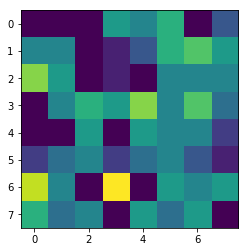

[[ 0.  0.  0.  6.  7.  4.  0.  9.]
 [ 4.  5.  0.  3.  4.  5. 11.  4.]
 [ 9.  6.  0.  7.  0.  3.  3.  1.]
 [ 0.  2.  4.  6. 11.  3.  5.  3.]
 [ 0.  0.  7.  0.  2.  0.  7.  5.]
 [ 7.  7.  6.  1.  8.  5.  2.  3.]
 [10.  5.  0.  4.  0.  4.  1.  6.]
 [ 4.  7.  4.  0. 10.  6.  9.  0.]]


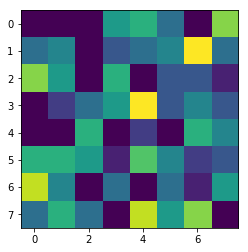

[[ 0.  0.  0.  6.  4.  7.  0.  5.]
 [ 5.  5.  0.  2.  4.  7.  8.  5.]
 [ 5.  4.  0.  4.  1.  6.  6.  3.]
 [ 0.  3. 11.  7. 11.  4. 11.  0.]
 [ 0.  0.  7.  0.  4.  2.  4.  6.]
 [ 6.  3.  4.  0.  6.  6.  2.  2.]
 [10.  4.  0.  6.  0.  5.  5.  7.]
 [ 5.  4.  5.  0.  8.  6.  6.  0.]]


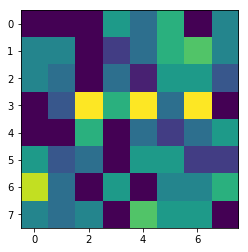

[[ 0.  0.  0.  3.  7.  5.  0.  8.]
 [ 2.  1.  0.  3.  2.  2.  6.  3.]
 [10.  5.  0.  5.  1.  5.  4.  5.]
 [ 0.  7.  1.  4.  6.  4.  3. 10.]
 [ 2.  0.  9.  0.  3.  6.  6.  5.]
 [ 3. 10.  7.  5.  2.  3.  2.  7.]
 [ 9.  4.  0.  6.  0.  1.  4.  5.]
 [ 5.  6.  7.  0.  6.  8. 10.  0.]]


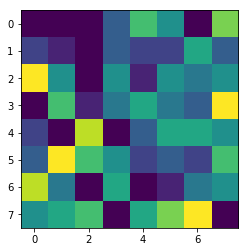

[[ 0.  0.  0.  2.  3.  2.  0.  2.]
 [ 2.  3.  0.  5.  2.  5.  4.  3.]
 [ 4.  3.  0. 10.  2.  2.  5.  3.]
 [ 0.  6.  9.  7.  9.  2.  3.  9.]
 [ 8.  0.  5.  0.  5.  9.  6. 10.]
 [ 9.  1.  4.  8.  4.  7.  2. 10.]
 [ 5.  7.  0.  3.  0. 10.  5.  2.]
 [ 0.  4.  0.  0.  4. 10.  8.  0.]]


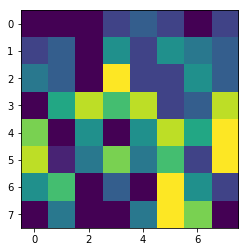

[[ 0.  0.  0.  8.  2.  5.  0.  8.]
 [ 2.  6.  0.  4.  4.  4.  1.  9.]
 [ 0.  5.  0.  7.  1.  4. 14.  5.]
 [ 0.  6. 10.  5.  7.  1.  9.  0.]
 [ 6.  0.  5.  0.  4.  2.  5.  8.]
 [ 8.  7.  2.  1.  6.  7.  2.  6.]
 [ 4.  3.  0.  4.  0.  7.  8.  5.]
 [ 2.  6.  7.  0.  0.  7.  5.  0.]]


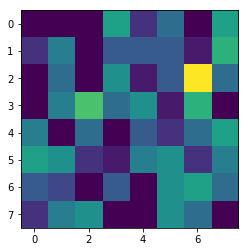

[[ 0.  0.  0.  6.  7.  4.  0.  6.]
 [ 0.  3.  0.  3.  3.  4.  5.  3.]
 [ 6.  6.  0. 10.  1.  8.  8.  2.]
 [ 0.  6.  4.  4.  8.  2.  3.  8.]
 [ 2.  0.  6.  0.  2.  3.  4.  8.]
 [ 5.  6.  9.  4.  5.  4.  2.  4.]
 [ 7.  4.  0.  0.  0.  5.  5.  6.]
 [ 5. 11.  7.  0.  4. 11.  7.  0.]]


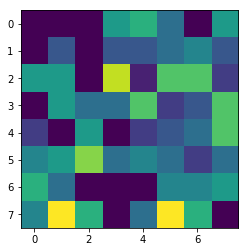

[[ 0.  0.  0.  6.  8.  5.  0.  7.]
 [ 5.  7.  0.  5.  5.  2.  3.  8.]
 [ 7.  1.  0.  3.  1.  6.  7.  4.]
 [ 0.  6.  6.  4.  6.  5.  6.  5.]
 [ 4.  0.  7.  0.  6.  0.  3.  4.]
 [ 6. 10.  6.  4.  5.  5.  2.  8.]
 [ 7.  6.  0.  7.  0.  3.  4.  3.]
 [ 1.  5.  1.  0.  8.  4.  9.  0.]]


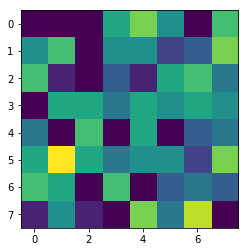

[[ 0.  0.  0.  6.  8.  5.  0.  8.]
 [ 6.  6.  0.  4.  4.  4.  7.  6.]
 [ 9.  2.  0.  2.  1.  4.  4.  5.]
 [ 0.  6.  6.  5.  9.  6.  4.  4.]
 [ 3.  0.  6.  0.  5.  1.  5.  3.]
 [ 5. 10.  3.  3.  7.  7.  2.  5.]
 [ 8.  6.  0.  8.  0.  4.  4.  2.]
 [ 1.  5.  0.  0. 10.  1. 10.  0.]]


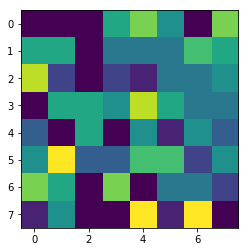

[[ 0.  0.  0.  3.  6.  5.  0.  9.]
 [ 6.  4.  0.  2.  3.  6. 10.  5.]
 [ 5.  3.  0.  4.  1.  3.  5.  2.]
 [ 0.  8. 10.  7.  9.  2. 12.  4.]
 [ 1.  0.  8.  0.  3.  1.  1.  7.]
 [ 9.  1.  2.  0.  6.  7.  2.  5.]
 [10.  3.  0.  2.  0.  6.  6.  6.]
 [ 3.  8.  3.  0.  9.  2.  9.  0.]]


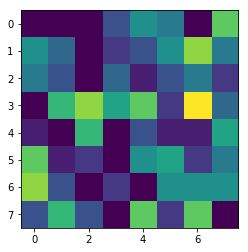

[[ 0.  0.  0.  7.  5.  5.  0.  9.]
 [ 8.  9.  0.  4.  4.  3.  5.  5.]
 [ 3.  0.  0.  2.  1.  3.  6.  3.]
 [ 0.  3.  6.  7.  5.  6. 10.  3.]
 [ 2.  0.  2.  0.  1.  0.  9.  3.]
 [ 5.  8. 11.  1.  6.  5.  2.  7.]
 [ 8.  7.  0.  4.  0.  0.  4.  9.]
 [10.  6.  7.  0.  7.  2.  6.  0.]]


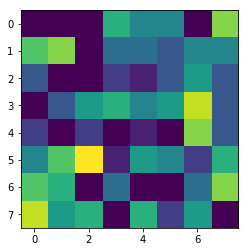

[[ 0.  0.  0.  0.  6.  2.  0.  9.]
 [ 3.  4.  0.  6.  4.  0.  5.  3.]
 [ 9.  0.  0.  8.  1.  2.  4.  0.]
 [ 0. 10.  5.  1.  5.  0.  4.  8.]
 [10.  0.  4.  0.  5.  6.  5. 12.]
 [ 6.  6.  5.  5.  3.  8.  2. 11.]
 [ 7.  2.  0.  3.  0.  6.  7.  3.]
 [ 4.  6.  3.  0.  4.  8. 10.  0.]]


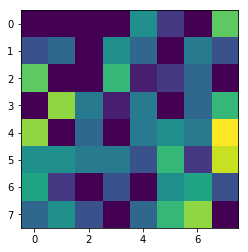

[[ 0.  0.  0.  4.  4.  7.  0.  6.]
 [ 7.  9.  0.  4.  2.  6.  5.  5.]
 [ 2.  0.  0.  2.  0.  8.  6.  6.]
 [ 0.  2. 14.  7. 10.  6.  7.  2.]
 [ 0.  0.  7.  0.  3.  0.  2.  5.]
 [11.  5.  5.  1.  5.  8.  2.  5.]
 [ 9.  8.  0.  5.  0.  5.  2.  7.]
 [ 4.  3.  3.  0. 11.  5.  6.  0.]]


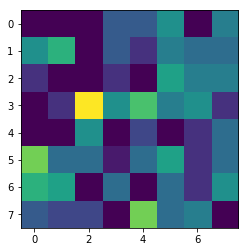

[[ 0.  0.  0.  2.  8.  3.  0. 10.]
 [ 7.  2.  0.  3.  4.  1.  9.  4.]
 [ 5.  2.  0.  3.  1.  1.  1.  4.]
 [ 0.  5.  5.  9.  4.  2.  5.  7.]
 [ 5.  0.  9.  0.  4.  3.  5.  9.]
 [ 6.  9.  4.  2.  4.  6.  3. 11.]
 [ 6.  6.  0.  8.  0.  2.  4.  4.]
 [ 4.  6.  4.  0.  9.  5. 11.  0.]]


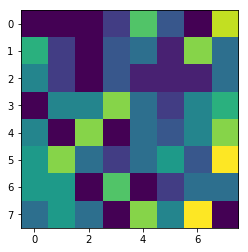

[[ 0.  0.  0.  1.  7.  3.  0.  3.]
 [ 7.  0.  0.  2.  2.  5. 14.  0.]
 [ 6.  2.  0. 10.  1.  2.  0.  0.]
 [ 0.  0.  7.  5.  8.  3.  6.  8.]
 [ 2.  0. 10.  0.  1.  8.  6.  8.]
 [ 7.  4.  8.  3.  3.  3.  3.  6.]
 [ 7.  3.  0.  1.  0.  2.  6.  6.]
 [ 6.  9. 12.  0.  8. 11. 10.  0.]]


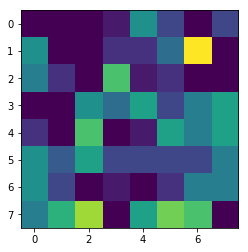

[[ 0.  0.  0.  6.  8.  4.  0.  4.]
 [ 3.  3.  0.  2.  4.  5.  9.  4.]
 [ 6.  6.  0.  8.  1.  5.  5.  1.]
 [ 0.  1.  6.  6. 10.  2.  4.  4.]
 [ 2.  0.  6.  0.  4.  3.  5.  9.]
 [ 3.  5.  9.  3.  6.  6.  1.  2.]
 [ 7.  8.  0.  4.  0.  7.  5.  4.]
 [ 5.  9.  2.  0.  7.  7.  8.  0.]]


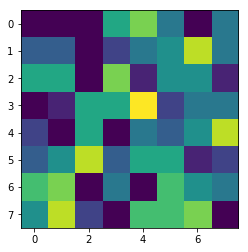

[[ 0.  0.  0.  7.  2.  3.  0.  8.]
 [ 3. 10.  0.  5.  5.  2.  3.  6.]
 [ 4.  6.  0.  7.  1.  4. 12.  5.]
 [ 0.  2.  6.  3.  8.  1.  8.  0.]
 [ 3.  0.  3.  0.  1.  3. 10.  6.]
 [ 7.  8.  7.  2.  6.  6.  2.  4.]
 [ 5.  5.  0.  2.  0.  6.  6. 10.]
 [ 8.  4.  9.  0.  2.  6.  3.  0.]]


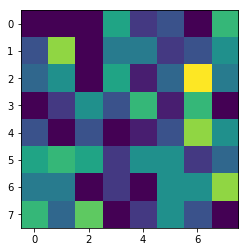

[[ 0.  0.  0.  3.  6.  2.  0.  6.]
 [ 1.  1.  0.  3.  3.  1.  7.  2.]
 [11.  8.  0.  9.  2.  5.  3.  2.]
 [ 0.  6.  0.  1.  8.  3.  2. 12.]
 [ 1.  0. 12.  0.  3.  9.  4.  5.]
 [ 7.  6.  7.  7.  1.  1.  2.  8.]
 [10.  2.  0.  2.  0.  2.  3.  8.]
 [ 2.  8.  9.  0.  6. 10. 13.  0.]]


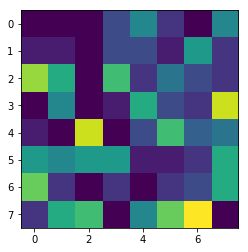

[[ 0.  0.  0.  7.  7.  2.  0.  7.]
 [ 5.  3.  0.  1.  7.  3.  8.  7.]
 [ 2.  9.  0.  5.  1.  0.  5.  3.]
 [ 0.  7.  6. 11.  9.  0.  9.  5.]
 [ 3.  0.  9.  0.  5.  2.  1. 11.]
 [ 5.  0.  2.  3.  5.  4.  3.  7.]
 [ 5.  4.  0.  5.  0. 10.  5.  6.]
 [ 5.  8.  2.  0.  7.  2.  7.  0.]]


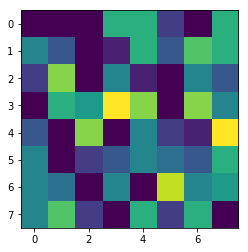

[[0. 0. 0. 3. 5. 4. 0. 7.]
 [2. 2. 0. 2. 3. 4. 5. 5.]
 [4. 6. 0. 8. 1. 4. 6. 4.]
 [0. 7. 6. 8. 7. 2. 7. 5.]
 [3. 0. 7. 0. 4. 4. 4. 9.]
 [6. 3. 6. 3. 5. 6. 2. 8.]
 [8. 7. 0. 5. 0. 6. 4. 5.]
 [4. 8. 3. 0. 6. 7. 8. 0.]]


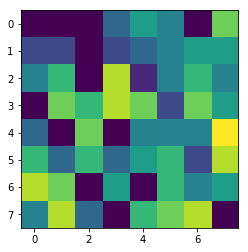

[[ 0.  0.  0.  7.  2.  6.  0.  3.]
 [ 5.  9.  0.  3.  1.  4.  5. 10.]
 [ 2.  6.  0.  5.  0.  2. 12.  4.]
 [ 0.  0.  8.  0.  2.  2.  6.  0.]
 [ 5.  0.  7.  0.  3.  6.  8.  0.]
 [ 7. 11.  7.  2.  5.  7.  1.  5.]
 [ 6.  6.  0.  7.  0.  7. 10.  8.]
 [ 3.  8. 10.  0.  0.  7.  6.  0.]]


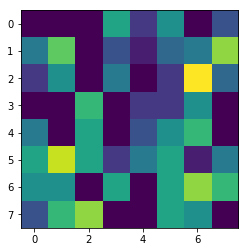

[[0. 0. 0. 9. 4. 5. 0. 4.]
 [4. 6. 0. 3. 3. 6. 2. 9.]
 [0. 5. 0. 6. 1. 0. 9. 4.]
 [0. 0. 7. 9. 5. 2. 7. 4.]
 [5. 0. 7. 0. 3. 1. 8. 4.]
 [7. 6. 8. 4. 7. 6. 2. 9.]
 [5. 9. 0. 5. 0. 6. 4. 5.]
 [1. 8. 4. 0. 3. 7. 8. 0.]]


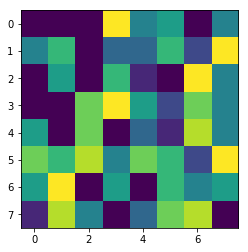

[[ 0.  0.  0.  0.  3.  2.  0.  7.]
 [ 2.  1.  0.  3.  2.  1.  5.  3.]
 [ 1.  4.  0. 11.  2.  3.  5.  1.]
 [ 0. 12.  6.  5.  4.  0.  8. 12.]
 [ 5.  0.  8.  0.  3.  6.  0. 13.]
 [11.  0.  5.  3.  3.  5.  3. 12.]
 [ 7.  0.  0.  0.  0.  6.  5.  7.]
 [ 5. 13.  9.  0.  4. 10.  9.  0.]]


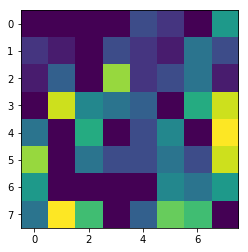

[[ 0.  0.  0.  5.  8.  5.  0.  7.]
 [ 7.  5.  0.  2.  3.  4.  8.  4.]
 [ 2.  2.  0.  3.  1.  3.  4.  3.]
 [ 0.  2.  8. 10.  5.  2.  7.  6.]
 [ 2.  0.  8.  0.  2.  0.  4.  8.]
 [ 6.  5.  8.  2.  5.  6.  2.  8.]
 [ 7.  8.  0.  4.  0.  3.  4.  6.]
 [ 6.  8.  4.  0.  9.  5. 10.  0.]]


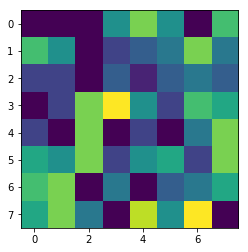

[[ 0.  0.  0.  5.  2.  2.  0.  7.]
 [ 6.  7.  0.  8.  3.  8.  8.  2.]
 [ 6.  0.  0.  7.  0.  0.  6.  3.]
 [ 0.  5. 12.  2. 14.  1.  6.  4.]
 [ 9.  0.  3.  0.  2.  6.  9.  7.]
 [10.  4.  0.  5.  6.  7.  3.  5.]
 [ 4.  0.  0.  1.  0.  9. 10.  2.]
 [ 3.  0.  8.  0.  2.  9.  6.  0.]]


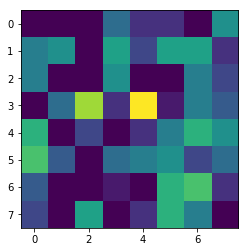

[[ 0.  0.  0.  1.  5.  2.  0.  7.]
 [ 3.  2.  0.  5.  1.  5.  4.  3.]
 [ 6.  5.  0.  6.  1.  5.  5. 10.]
 [ 0. 12. 10.  6. 11.  3.  2. 13.]
 [ 4.  0.  8.  0.  5.  6.  3.  8.]
 [11.  3.  1.  7.  3.  5.  2.  7.]
 [ 5.  4.  0.  2.  0.  8.  5.  1.]
 [ 2.  3.  3.  0.  7.  6.  6.  0.]]


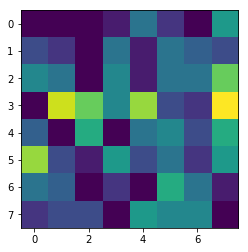

[[ 0.  0.  0.  6.  4.  7.  0.  2.]
 [ 3.  9.  0.  6.  2.  3.  0.  9.]
 [ 2.  4.  0.  3.  1.  3.  8.  5.]
 [ 0.  5.  2.  6.  0.  2.  7.  9.]
 [ 5.  0.  9.  0.  1.  5.  3.  3.]
 [ 7.  5.  6.  5.  2.  5.  2. 12.]
 [ 9.  6.  0.  8.  0.  4.  3.  9.]
 [ 3.  5.  7.  0.  1.  9. 11.  0.]]


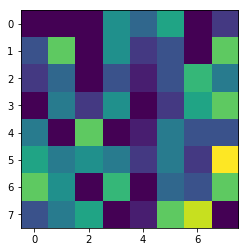

[[ 0.  0.  0.  7.  3.  6.  0.  3.]
 [ 2.  9.  0.  6.  3.  6.  1.  4.]
 [ 4.  7.  0.  3.  1.  7.  9. 10.]
 [ 0.  8.  7.  6.  8.  3.  4.  7.]
 [ 4.  0.  6.  0.  3.  8.  4.  3.]
 [ 4.  5.  1.  5.  5.  5.  3.  2.]
 [ 6.  4.  0.  5.  0.  9.  7.  5.]
 [ 5.  2.  6.  0.  2.  8.  4.  0.]]


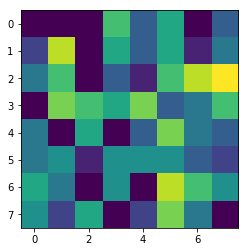

[[ 0.  0.  0.  1.  4.  2.  0.  9.]
 [ 3.  1.  0.  3.  2.  2.  6.  3.]
 [ 2.  5.  0.  7.  1.  2.  3.  6.]
 [ 0. 10.  5.  8.  4.  1.  3. 11.]
 [ 5.  0.  9.  0.  3.  6.  1. 11.]
 [11.  3.  2.  5.  4.  6.  3. 13.]
 [ 7.  4.  0.  3.  0.  5.  4.  6.]
 [ 3.  9.  5.  0.  6.  7. 10.  0.]]


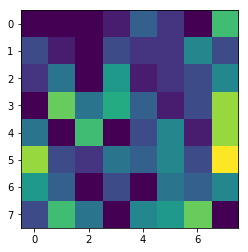

[[ 0.  0.  0.  5.  1.  4.  0.  9.]
 [ 2.  9.  0.  6.  1.  4.  5.  3.]
 [ 7.  8.  0.  7.  1.  8.  2.  5.]
 [ 0. 11.  3.  6.  0.  4.  4.  7.]
 [ 9.  0.  2.  0.  4.  7.  1.  7.]
 [ 0.  7.  2.  1.  8.  3.  9.  1.]
 [ 5.  2.  0.  5.  0. 10. 11.  6.]
 [10.  5.  4.  0.  6.  8.  1.  0.]]


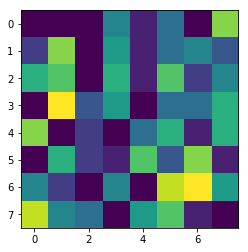

[[ 0.  0.  0.  2.  9.  7.  0.  4.]
 [ 6.  4.  0.  3.  3.  2.  4.  5.]
 [ 7.  0.  0.  2.  2.  8.  5.  4.]
 [ 0.  4.  9.  3.  5.  5.  5.  8.]
 [ 4.  0.  9.  0.  6.  4.  3.  6.]
 [ 3. 10.  9.  5.  0.  6.  1.  7.]
 [ 7.  7.  0.  9.  0.  2.  6.  2.]
 [ 4.  4.  4.  0.  6.  8.  9.  0.]]


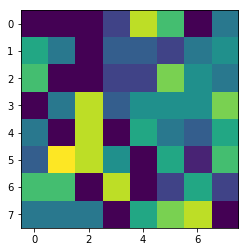

[[ 0.  0.  0.  5.  4.  5.  0.  5.]
 [ 4.  7.  0.  5.  2.  6.  7.  3.]
 [ 8.  3.  0.  5.  0.  4.  3.  5.]
 [ 0.  3.  7.  7. 10.  3.  5.  3.]
 [ 1.  0.  6.  0.  1.  5.  7.  4.]
 [ 8.  4.  4.  4.  6.  7.  2.  6.]
 [10.  6.  0.  6.  0.  5.  4.  8.]
 [ 4.  2.  3.  0.  8.  8.  9.  0.]]


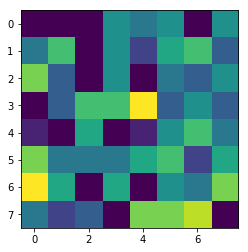

[[ 0.  0.  0.  4.  8.  3.  0.  5.]
 [ 3.  2.  0.  1.  4.  2. 10.  4.]
 [ 8.  6.  0.  8.  1.  3.  3.  0.]
 [ 0.  2.  1.  6.  8.  2.  3.  7.]
 [ 2.  0.  8.  0.  3.  5.  6.  8.]
 [ 4.  5.  9.  4.  5.  4.  2.  6.]
 [ 8.  7.  0.  4.  0.  5.  3.  7.]
 [ 5. 11.  4.  0.  9.  6. 11.  0.]]


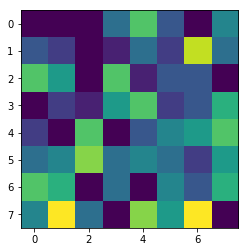

[[ 0.  0.  0.  4.  2.  2.  0. 11.]
 [ 2.  1.  0.  3.  5.  1.  2.  7.]
 [ 7.  7.  0.  7.  1.  2. 10.  5.]
 [ 0.  9.  4.  5.  8.  1.  9.  3.]
 [ 3.  0.  7.  0.  8.  4.  6. 10.]
 [ 8.  6.  4.  2.  4.  4.  2.  9.]
 [ 7.  3.  0.  8.  0.  6.  4.  6.]
 [ 4.  6.  8.  0.  2.  6.  5.  0.]]


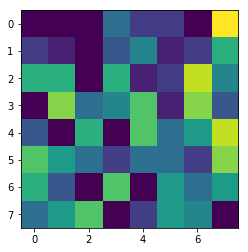

[[ 0.  0.  0.  3.  7.  2.  0.  6.]
 [ 1.  3.  0.  4.  4.  1.  4.  4.]
 [13.  6.  0.  8.  1.  5.  5.  2.]
 [ 0.  6.  1.  1.  7.  2.  4. 11.]
 [ 2.  0.  7.  0.  4.  6.  7.  7.]
 [ 4.  8. 12.  6.  2.  2.  1.  7.]
 [ 8.  5.  0.  2.  0.  4.  4.  6.]
 [ 6.  6.  8.  0.  4. 10.  8.  0.]]


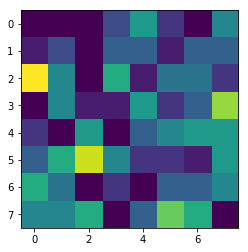

[[ 0.  0.  0.  0.  4.  3.  0.  7.]
 [ 2.  3.  0.  4.  3.  1.  4.  3.]
 [ 3.  6.  0.  7.  2.  2.  5.  5.]
 [ 0. 10.  6.  5.  6.  0.  3. 12.]
 [ 5.  0.  9.  0.  3.  8.  1. 13.]
 [10.  1.  4.  7.  2.  7.  1. 13.]
 [ 7.  4.  0.  0.  0.  8.  4.  6.]
 [ 4.  6.  4.  0.  4.  8. 11.  0.]]


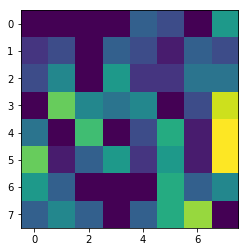

[[ 0.  0.  0.  5.  5.  7.  0.  3.]
 [ 1. 10.  0.  4.  2.  4.  2.  7.]
 [ 4.  8.  0.  2.  1.  6.  8.  8.]
 [ 0.  9.  7.  6.  2.  3.  5. 10.]
 [ 2.  0.  9.  0.  6.  3.  0.  5.]
 [ 4.  6.  5.  4.  4.  5.  3.  5.]
 [ 8.  5.  0.  5.  0. 10.  3.  5.]
 [ 3.  5.  2.  0.  5. 10.  5.  0.]]


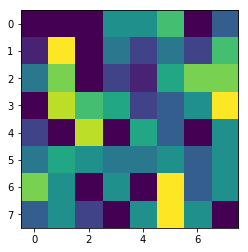

[[ 0.  0.  0.  6.  1.  4.  0.  8.]
 [ 4.  2.  0.  2.  1.  5.  3.  9.]
 [ 2.  7.  0.  7.  1.  2. 11.  6.]
 [ 0.  5.  8.  7.  7.  3. 10.  3.]
 [ 3.  0.  8.  0.  5.  3.  5.  3.]
 [12.  5.  3.  1.  6.  4.  2.  8.]
 [ 6.  4.  0.  5.  0.  5.  5.  7.]
 [ 1.  9.  9.  0.  3.  5.  5.  0.]]


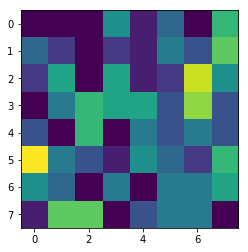

[[ 0.  0.  0.  3.  4.  4.  0.  4.]
 [ 4.  1.  0.  1.  1.  6. 13.  0.]
 [ 8.  7.  0. 10.  1.  5.  0.  1.]
 [ 0.  3.  2.  7. 13.  5.  1.  6.]
 [ 0.  0.  9.  0.  1.  9.  2.  4.]
 [ 9.  0.  3.  3.  6.  5.  2.  3.]
 [12.  4.  0.  4.  0.  6.  3.  9.]
 [ 3. 11.  4.  0. 12.  8. 13.  0.]]


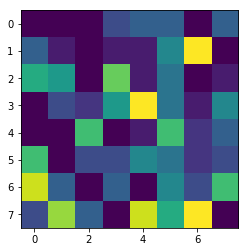

[[ 0.  0.  0.  6.  4.  7.  0.  4.]
 [ 2.  4.  0.  3.  3.  6.  2.  9.]
 [ 1.  3.  0.  6.  2.  3. 11.  3.]
 [ 0.  8.  9.  5.  4.  1. 11.  5.]
 [ 6.  0.  5.  0.  3.  4.  2.  8.]
 [ 3.  4.  5.  2.  5.  7.  2.  6.]
 [ 7.  2.  0.  3.  0.  7. 10.  3.]
 [ 4.  8.  9.  0.  0.  8.  7.  0.]]


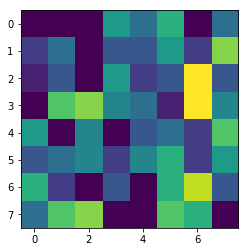

[[ 0.  0.  0.  2.  1.  7.  0.  7.]
 [ 4.  6.  0.  3.  1.  5.  5.  5.]
 [ 4.  2.  0.  6.  1.  7.  7.  6.]
 [ 0.  6. 11.  6.  6.  4.  8.  1.]
 [ 3.  0.  6.  0.  4.  3.  2.  7.]
 [ 9.  5.  4.  1.  7.  9.  2.  6.]
 [10.  6.  0.  5.  0.  5.  6.  7.]
 [ 3.  6.  3.  0.  7.  7.  7.  0.]]


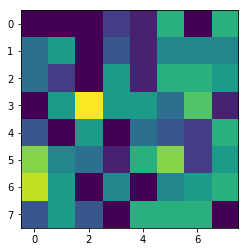

[[ 0.  0.  0.  5.  2.  5.  0.  9.]
 [ 2.  4.  0.  5.  3.  6.  2.  6.]
 [ 3.  2.  0.  7.  0.  5. 10.  7.]
 [ 0.  9. 12.  7. 11.  2.  7.  2.]
 [ 6.  0.  3.  0.  5.  3.  5. 10.]
 [ 8.  5.  1.  2.  6.  8.  2.  5.]
 [ 5.  4.  0.  5.  0.  8.  8.  2.]
 [ 3.  2.  5.  0.  2.  7.  4.  0.]]


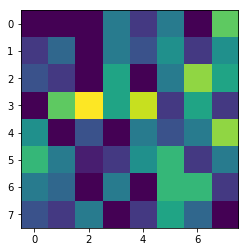

[[ 0.  0.  0.  5.  8.  4.  0.  9.]
 [ 6.  4.  0.  1.  4.  5. 10.  6.]
 [ 5.  4.  0.  5.  1.  3.  5.  1.]
 [ 0.  5.  8.  8.  9.  3.  8.  5.]
 [ 2.  0.  6.  0.  4.  0.  4.  8.]
 [ 6.  4.  6.  1.  8.  6.  2.  4.]
 [ 7.  6.  0.  2.  0.  6.  5.  4.]
 [ 5. 10.  2.  0. 10.  1.  8.  0.]]


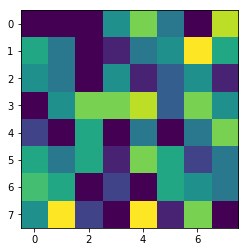

[[ 0.  0.  0.  3.  4.  4.  0.  5.]
 [ 4.  1.  0.  1.  6.  2.  0.  7.]
 [ 5.  5.  0.  5.  3.  4. 10.  3.]
 [ 0.  8.  7.  6.  8.  3. 10.  5.]
 [ 5.  0.  5.  0.  9.  6.  5. 10.]
 [ 2.  3.  8.  4.  1.  5.  2.  7.]
 [ 6.  8.  0. 10.  0.  6.  6.  4.]
 [ 6.  5.  4.  0.  2.  2.  6.  0.]]


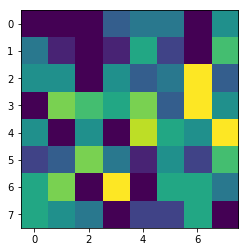

[[0. 0. 0. 4. 6. 6. 0. 3.]
 [4. 2. 0. 2. 1. 7. 6. 3.]
 [6. 4. 0. 4. 2. 5. 5. 7.]
 [0. 4. 9. 8. 9. 5. 4. 8.]
 [3. 0. 7. 0. 4. 7. 6. 3.]
 [3. 5. 6. 6. 4. 5. 2. 4.]
 [6. 9. 0. 7. 0. 5. 7. 3.]
 [4. 5. 3. 0. 6. 5. 7. 0.]]


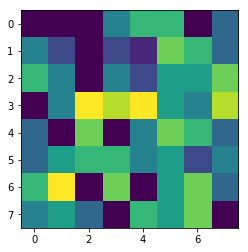

[[ 0.  0.  0.  5.  5.  5.  0.  7.]
 [ 6.  5.  0.  4.  3.  8. 10.  2.]
 [ 7.  3.  0.  1.  1.  4.  4.  8.]
 [ 0.  6. 11.  8. 14.  4.  7.  4.]
 [ 1.  0.  6.  0.  2.  5.  6.  3.]
 [ 7.  4.  0.  3.  6.  6.  2.  1.]
 [ 7.  3.  0.  6.  0.  6.  8.  4.]
 [ 6.  2.  5.  0.  8.  3.  5.  0.]]


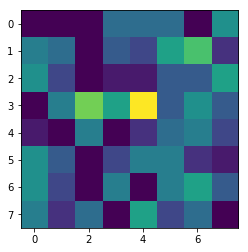

[[ 0.  0.  0.  1.  2.  4.  0.  4.]
 [ 2.  3.  0.  3.  0.  5.  3.  4.]
 [ 4.  3.  0. 10.  1.  2.  5.  4.]
 [ 0.  5.  8.  8.  5.  2.  4.  8.]
 [ 6.  0.  6.  0.  4.  6.  6.  9.]
 [ 8.  4.  7.  6.  5.  7.  2. 10.]
 [ 7.  9.  0.  3.  0.  8.  4.  3.]
 [ 2.  6.  3.  0.  4. 12.  7.  0.]]


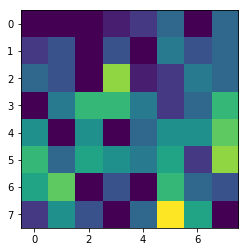

[[ 0.  0.  0.  2.  4.  3.  0.  7.]
 [ 1.  1.  0.  2.  6.  0.  3.  5.]
 [ 8.  6.  0.  7.  2.  2. 10.  1.]
 [ 0. 10.  3.  3.  6.  0. 11.  6.]
 [ 4.  0.  5.  0.  7.  6.  7. 13.]
 [ 2.  5. 10.  3.  2.  4.  1.  9.]
 [ 8.  3.  0.  6.  0.  5.  4.  6.]
 [ 9.  7.  9.  0.  0.  8.  6.  0.]]


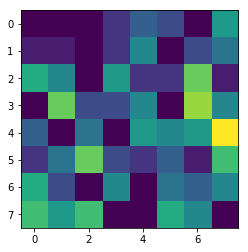

[[ 0.  0.  0.  4.  3.  4.  0.  2.]
 [ 1.  4.  0.  5.  1.  6.  1.  3.]
 [ 7.  3.  0.  8.  2.  3.  6.  5.]
 [ 0.  5.  7.  6.  7.  3.  4.  9.]
 [ 6.  0.  5.  0.  5.  7.  9.  5.]
 [ 5.  4.  7.  9.  5.  6.  2.  9.]
 [ 7.  8.  0.  4.  0.  7.  3.  2.]
 [ 1.  3.  1.  0.  3. 12.  7.  0.]]


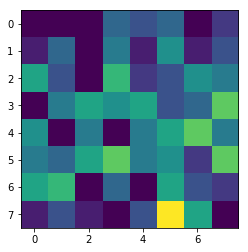

[[ 0.  0.  0.  5.  3.  6.  0.  6.]
 [ 2.  5.  0.  3.  1.  7.  6.  2.]
 [ 7.  5.  0.  5.  2.  8.  3.  5.]
 [ 0.  9.  6.  8.  5.  4.  6.  5.]
 [ 5.  0.  3.  0.  3.  8.  3.  6.]
 [ 0.  4.  3.  3.  7.  5.  5.  1.]
 [ 7.  4.  0.  6.  0.  7. 11.  5.]
 [ 9.  6.  3.  0.  5.  7.  4.  0.]]


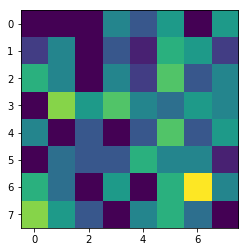

[[ 0.  0.  0.  6.  4.  4.  0.  6.]
 [ 3.  7.  0.  6.  2.  7.  7.  2.]
 [ 6.  1.  0.  6.  1.  3.  4.  4.]
 [ 0.  8.  8.  5. 10.  1.  4.  7.]
 [ 9.  0.  1.  0.  0.  8.  6.  8.]
 [ 5.  4.  1.  5.  6.  8.  3.  4.]
 [ 5.  2.  0.  3.  0.  9. 11.  3.]
 [ 7.  4.  6.  0.  1.  8.  7.  0.]]


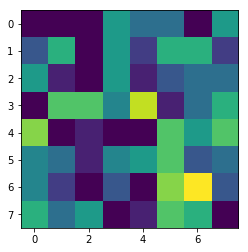

[[ 0.  0.  0.  3.  9.  3.  0. 10.]
 [ 9.  5.  0.  5.  4.  2. 11.  2.]
 [ 2.  1.  0.  2.  0.  2.  0.  5.]
 [ 0.  4.  8. 10.  9.  4.  0.  6.]
 [ 3.  0.  9.  0.  2.  0.  2.  9.]
 [11.  8.  2.  1.  5.  8.  3.  9.]
 [ 6.  6.  0.  8.  0.  5.  1.  3.]
 [ 5.  6.  2.  0. 13.  4. 11.  0.]]


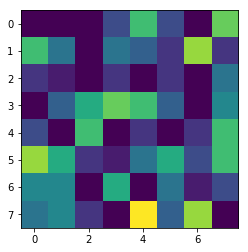

[[ 0.  0.  0.  5.  3.  5.  0.  5.]
 [ 4.  5.  0.  5.  3.  8.  4.  7.]
 [ 4.  1.  0.  6.  2.  3. 11.  4.]
 [ 0.  7. 15.  3. 11.  2.  8.  3.]
 [ 7.  0.  5.  0.  6.  4.  5.  8.]
 [ 8.  5.  1.  4.  6.  9.  2.  5.]
 [ 5.  2.  0.  3.  0. 10. 10.  0.]
 [ 0.  3.  4.  0.  1.  7.  5.  0.]]


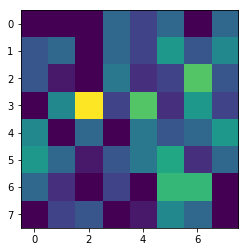

[[ 0.  0.  0.  2.  4.  3.  0.  9.]
 [ 1.  1.  0.  2.  4.  3.  5.  7.]
 [ 8.  6.  0.  9.  3.  3.  8.  2.]
 [ 0.  9.  7.  4.  8.  1.  8.  5.]
 [ 6.  0.  5.  0.  7.  5.  4. 12.]
 [ 5.  5.  5.  3.  6.  7.  1.  6.]
 [ 6.  4.  0.  3.  0.  9.  8.  2.]
 [ 2.  7.  2.  0.  3.  5.  6.  0.]]


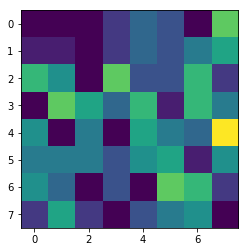

[[ 0.  0.  0.  7.  7.  4.  0.  7.]
 [ 2.  3.  0.  3.  3.  6.  7.  4.]
 [ 8.  6.  0.  6.  2.  4.  4.  4.]
 [ 0.  5.  3.  8. 10.  4.  5.  6.]
 [ 2.  0.  7.  0.  3.  4.  6.  4.]
 [ 5.  5.  5.  5.  7.  4.  3.  5.]
 [ 8.  6.  0.  5.  0.  4.  4.  5.]
 [ 3.  7.  2.  0.  7.  6. 10.  0.]]


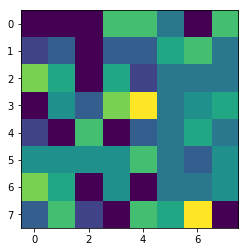

[[ 0.  0.  0.  5.  5.  7.  0.  5.]
 [ 4.  5.  0.  3.  3.  6.  7.  3.]
 [ 7.  3.  0.  4.  1.  6.  4.  5.]
 [ 0.  3.  8.  7. 10.  4.  5.  2.]
 [ 0.  0.  7.  0.  2.  5.  5.  5.]
 [ 6.  5.  4.  3.  5.  8.  1.  5.]
 [11.  6.  0.  7.  0.  4.  4.  7.]
 [ 5.  4.  4.  0.  7.  8. 10.  0.]]


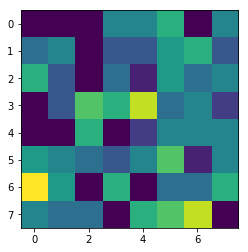

[[ 0.  0.  0.  5.  8.  5.  0.  6.]
 [ 4.  5.  0.  3.  2.  5.  6.  4.]
 [ 7.  5.  0.  2.  2.  4.  4.  7.]
 [ 0.  4.  6.  6.  8.  4.  3. 10.]
 [ 1.  0.  9.  0.  2.  5.  7.  2.]
 [ 5.  7.  6.  6.  3.  4.  1.  6.]
 [ 7.  8.  0.  5.  0.  3.  4.  5.]
 [ 5.  4.  4.  0.  7.  4.  9.  0.]]


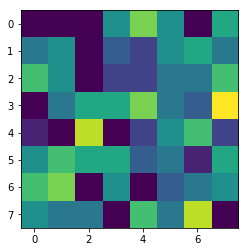

[[ 0.  0.  0.  3.  2.  4.  0.  7.]
 [ 4.  0.  0.  0.  2.  3.  5.  5.]
 [ 5.  8.  0.  6.  2.  1.  8.  4.]
 [ 0.  9.  5.  6.  3.  3. 13.  8.]
 [ 1.  0. 10.  0.  7.  5.  4.  6.]
 [ 7.  3.  6.  0.  2.  1.  4.  8.]
 [ 7.  1.  0.  7.  0.  3.  5.  7.]
 [ 6. 11. 13.  0.  3.  7.  5.  0.]]


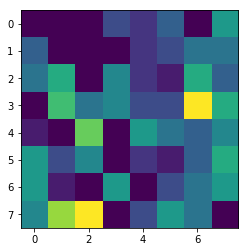

[[ 0.  0.  0.  3.  4.  6.  0.  4.]
 [ 5. 14.  0.  5.  2.  1.  3.  9.]
 [ 9.  7.  0.  0.  1.  6.  8.  5.]
 [ 0.  5.  5.  0.  2.  3.  6.  8.]
 [ 2.  0.  7.  0.  5.  6.  4.  0.]
 [ 5.  8.  7.  2.  2.  5.  1.  4.]
 [ 9.  6.  0.  8.  0.  8.  5. 10.]
 [ 6.  3.  6.  0.  5.  4.  5.  0.]]


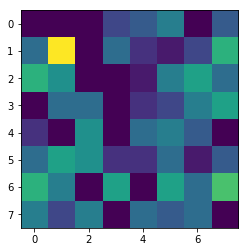

[[0. 0. 0. 4. 5. 3. 0. 7.]
 [3. 6. 0. 4. 3. 4. 5. 3.]
 [9. 6. 0. 5. 2. 6. 4. 6.]
 [0. 5. 3. 4. 9. 3. 4. 8.]
 [3. 0. 6. 0. 2. 8. 7. 4.]
 [5. 6. 6. 6. 4. 4. 2. 4.]
 [7. 6. 0. 4. 0. 5. 6. 7.]
 [7. 4. 5. 0. 5. 6. 7. 0.]]


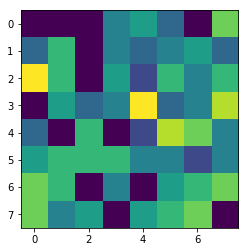

[[ 0.  0.  0.  7.  9.  4.  0.  4.]
 [ 4.  6.  0.  4.  4.  4.  9.  5.]
 [12.  5.  0.  5.  3.  3.  3.  1.]
 [ 0.  1.  1.  2.  8.  6.  3.  7.]
 [ 2.  0.  9.  0.  4.  5.  7.  0.]
 [ 2. 11.  6.  5.  7.  4.  3.  4.]
 [ 9.  5.  0.  6.  0.  3.  4.  2.]
 [ 0.  6.  1.  0.  9.  6. 12.  0.]]


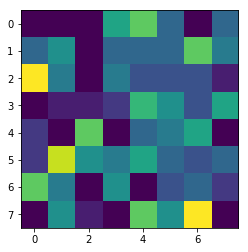

[[ 0.  0.  0.  7.  2.  4.  0.  9.]
 [ 2.  9.  0.  7.  2.  5.  5.  3.]
 [ 5.  5.  0.  6.  1.  6.  4.  5.]
 [ 0. 10.  5.  6.  6.  2.  4.  6.]
 [ 9.  0.  1.  0.  0.  6.  4.  8.]
 [ 2.  6.  1.  2.  7.  5.  6.  2.]
 [ 4.  2.  0.  4.  0.  9. 11.  5.]
 [10.  3.  7.  0.  3.  7.  3.  0.]]


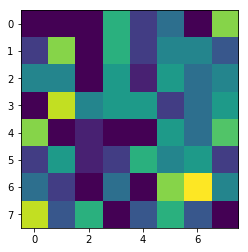

[[ 0.  0.  0.  7.  2.  5.  0.  6.]
 [ 2.  7.  0.  5.  4.  5.  1.  7.]
 [ 4.  5.  0.  4.  1.  6. 12.  9.]
 [ 0.  7. 10.  5. 10.  3.  6.  2.]
 [ 4.  0.  4.  0.  5.  4.  6.  6.]
 [ 7.  7.  2.  3.  5.  6.  2.  3.]
 [ 5.  4.  0.  6.  0.  8.  7.  4.]
 [ 4.  2.  6.  0.  1.  7.  3.  0.]]


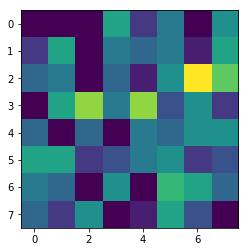

[[ 0.  0.  0.  2.  8.  8.  0.  0.]
 [ 5.  4.  0.  4.  4.  3.  4.  4.]
 [ 7.  0.  0.  1.  2.  7.  6.  4.]
 [ 0.  4. 12.  2.  3.  3.  6.  9.]
 [ 4.  0. 10.  0.  6.  5.  3.  8.]
 [ 2.  9.  9.  5.  0.  5.  2.  7.]
 [ 7.  3.  0.  9.  0.  3.  7.  0.]
 [ 5.  1.  8.  0.  2. 13.  6.  0.]]


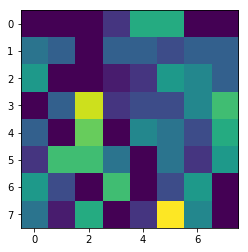

[[ 0.  0.  0.  4.  1.  5.  0.  7.]
 [ 3. 11.  0.  4.  2.  2.  2.  7.]
 [ 4.  6.  0.  4.  1.  4. 12.  7.]
 [ 0.  5.  8.  2.  4.  2.  5.  2.]
 [ 4.  0.  2.  0.  3.  4.  8.  6.]
 [ 6. 10.  7.  1.  5.  8.  2.  5.]
 [ 6.  6.  0.  5.  0.  8.  7.  9.]
 [ 8.  5.  7.  0.  2.  6.  3.  0.]]


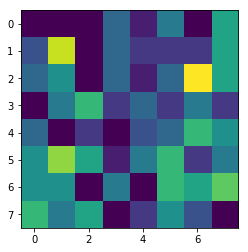

[[ 0.  0.  0.  7.  7.  1.  0.  9.]
 [ 4.  6.  0.  6.  3.  4.  6.  2.]
 [ 7.  5.  0.  7.  0.  3.  4.  4.]
 [ 0.  4.  4.  5. 11.  5.  0.  9.]
 [ 4.  0.  3.  0.  3.  0.  9.  4.]
 [ 8. 10. 10.  5.  9.  3.  4.  4.]
 [ 4.  5.  0.  0.  0.  5.  1.  2.]
 [ 5.  9.  4.  0.  9.  5.  6.  0.]]


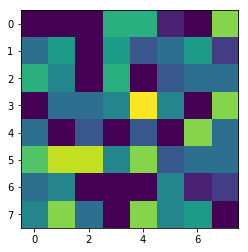

[[0. 0. 0. 6. 8. 7. 0. 6.]
 [4. 4. 0. 4. 2. 7. 6. 4.]
 [8. 4. 0. 3. 3. 7. 5. 6.]
 [0. 8. 7. 5. 7. 6. 4. 7.]
 [5. 0. 8. 0. 5. 4. 2. 1.]
 [3. 9. 3. 4. 6. 5. 3. 3.]
 [7. 3. 0. 5. 0. 3. 9. 0.]
 [1. 7. 3. 0. 6. 6. 9. 0.]]


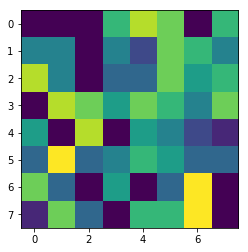

[[ 0.  0.  0.  2.  5.  5.  0.  7.]
 [ 2.  1.  0.  3.  4.  2.  5.  3.]
 [12.  5.  0.  4.  2.  5.  2.  4.]
 [ 0. 11.  1.  6. 10.  5.  7.  8.]
 [ 0.  0.  9.  0.  5.  6.  4.  6.]
 [ 5.  4.  4.  4.  3.  3.  3.  7.]
 [13.  2.  0.  9.  0.  3.  0.  6.]
 [ 4.  3.  5.  0.  7.  7. 11.  0.]]


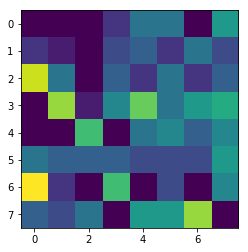

[[ 0.  0.  0.  7.  4.  8.  0.  5.]
 [ 4.  7.  0.  5.  2.  6.  4.  4.]
 [ 8.  1.  0.  2.  1.  7.  4.  6.]
 [ 0.  5.  7.  6. 10.  7.  4.  2.]
 [ 2.  0.  5.  0.  3.  3.  5.  1.]
 [ 5.  8.  4.  3.  6.  7.  1.  5.]
 [11.  5.  0. 10.  0.  2.  3.  6.]
 [ 3.  3.  2.  0.  7.  7. 10.  0.]]


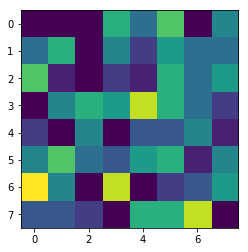

[[ 0.  0.  0.  5.  8.  4.  0.  6.]
 [ 2.  3.  0.  2.  5.  3.  7.  4.]
 [ 7.  6.  0.  7.  2.  5.  4.  2.]
 [ 0.  4.  3.  7.  9.  3.  3.  5.]
 [ 2.  0.  7.  0.  4.  2.  5.  8.]
 [ 3.  6.  8.  4.  6.  5.  3.  5.]
 [ 8.  7.  0.  4.  0.  5.  2.  4.]
 [ 4.  8.  1.  0.  9.  7. 10.  0.]]


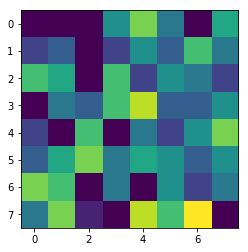

[[ 0.  0.  0.  7.  7.  4.  0.  2.]
 [ 3.  2.  0.  0.  5.  6. 10.  5.]
 [ 7.  8.  0.  8.  1.  4.  5.  0.]
 [ 0.  1.  6.  7. 12.  3.  7.  4.]
 [ 0.  0.  6.  0.  4.  4.  5.  8.]
 [ 2.  2. 10.  3.  6.  4.  2.  0.]
 [ 8.  6.  0.  4.  0.  9.  4.  5.]
 [ 7. 10.  4.  0.  7.  7.  6.  0.]]


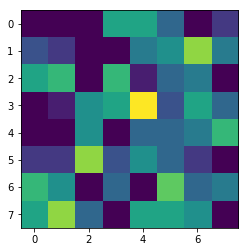

[[ 0.  0.  0.  7.  2.  3.  0.  5.]
 [ 5. 10.  0.  7.  2.  7.  6.  1.]
 [ 4.  2.  0.  5.  1.  4.  3.  5.]
 [ 0.  6.  7.  6.  9.  3.  3.  7.]
 [ 9.  0.  0.  0.  0.  8.  7.  5.]
 [ 4.  4.  2.  5.  6.  6.  5.  3.]
 [ 4.  3.  0.  4.  0.  8. 11.  5.]
 [10.  3.  6.  0.  3.  7.  5.  0.]]


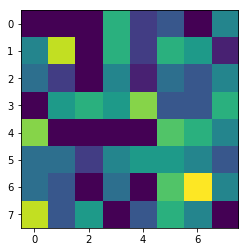

[[ 0.  0.  0.  1.  6.  2.  0. 11.]
 [ 5.  3.  0.  3.  7.  0. 10.  1.]
 [ 4.  4.  0.  5.  3.  5.  3.  2.]
 [ 0.  4.  4.  4.  7.  0.  5.  4.]
 [ 5.  0. 10.  0.  3.  7.  3. 14.]
 [ 8.  6.  3.  3.  2.  6.  2. 10.]
 [ 6.  4.  0.  4.  0.  3.  7.  7.]
 [ 6.  7.  5.  0.  7.  4. 11.  0.]]


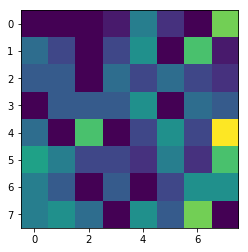

[[ 0.  0.  0.  3.  8.  2.  0.  2.]
 [ 4.  2.  0.  2.  2.  4.  8.  4.]
 [ 8.  4.  0.  8.  1.  3.  5.  1.]
 [ 0.  3.  5.  3.  9.  3.  1. 10.]
 [ 8.  0.  5.  0.  5. 10.  6.  6.]
 [ 5.  6.  7.  6.  4.  5.  1.  5.]
 [ 4.  7.  0.  5.  0.  8. 10.  1.]
 [ 3. 12.  3.  0.  4.  5.  9.  0.]]


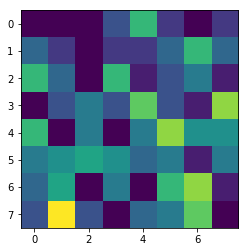

[[ 0.  0.  0.  4.  4.  4.  0.  8.]
 [ 3.  5.  0.  3.  3.  6.  8.  4.]
 [10.  5.  0.  4.  1.  5.  5.  4.]
 [ 0.  7.  8.  5. 10.  2.  7.  4.]
 [ 2.  0.  6.  0.  5.  5.  5.  6.]
 [ 6.  5.  2.  2.  6.  6.  2.  2.]
 [ 8.  3.  0.  6.  0.  8.  7.  4.]
 [ 5.  4.  4.  0.  6.  5.  5.  0.]]


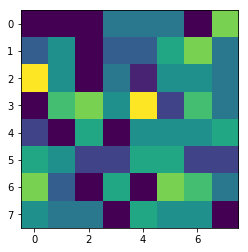

[[ 0.  0.  0.  6. 10.  4.  0.  5.]
 [ 3.  2.  0.  2.  3.  4. 10.  4.]
 [ 8.  7.  0.  7.  1.  4.  5.  2.]
 [ 0.  2.  4.  4.  8.  3.  1.  7.]
 [ 2.  0.  7.  0.  4.  3.  5.  5.]
 [ 2.  9.  9.  4.  5.  5.  2.  3.]
 [ 7.  6.  0.  4.  0.  6.  5.  2.]
 [ 5. 11.  4.  0.  7.  7.  9.  0.]]


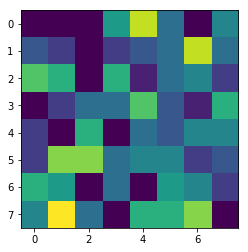

[[ 0.  0.  0.  3.  1.  5.  0.  9.]
 [ 1.  3.  0.  3.  2.  4.  3.  5.]
 [ 5.  5.  0.  6.  0.  4. 10.  8.]
 [ 0.  7. 10.  6.  9.  0.  6.  3.]
 [ 3.  0.  6.  0.  5.  5.  5.  9.]
 [ 9.  7.  2.  2.  4.  8.  0.  7.]
 [ 7.  5.  0.  6.  0.  8.  6.  4.]
 [ 4.  3.  7.  0.  2.  7.  4.  0.]]


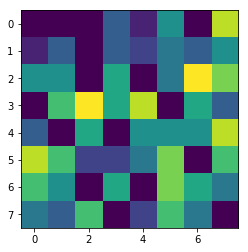

[[ 0.  0.  0.  4.  2.  5.  0.  2.]
 [ 6.  0.  0.  1.  2.  5.  5.  5.]
 [ 3.  3.  0.  6.  3.  2.  7.  2.]
 [ 0.  7.  7.  7.  5.  4. 15.  9.]
 [ 2.  0.  8.  0.  5.  6.  4.  5.]
 [ 8.  0.  8.  1.  1.  1.  4.  8.]
 [ 8.  1.  0.  6.  0.  2.  5.  8.]
 [ 7. 11. 15.  0.  3.  7.  6.  0.]]


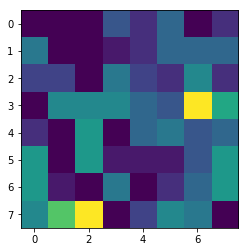

[[ 0.  0.  0.  5.  5.  3.  0.  6.]
 [ 3.  3.  0.  1.  8.  4.  7.  6.]
 [ 9.  3.  0.  9.  3.  3.  7.  0.]
 [ 0.  8.  7.  5. 10.  2. 15.  0.]
 [ 3.  0.  1.  0.  7.  1.  6. 13.]
 [ 1.  1. 10.  0.  6.  5.  3.  2.]
 [ 9.  2.  0.  4.  0.  8.  6.  4.]
 [ 7.  7.  4.  0.  5.  5.  4.  0.]]


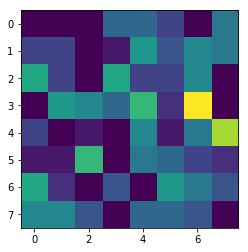

[[ 0.  0.  0.  6.  4.  7.  0.  3.]
 [ 4.  6.  0.  4.  4.  6.  5.  2.]
 [ 9.  3.  0.  2.  1.  5.  1.  4.]
 [ 0.  6.  3. 10. 10.  5.  6.  7.]
 [ 1.  0.  5.  0.  1.  7.  6.  3.]
 [ 3.  1.  6.  5.  4.  5.  3.  6.]
 [13.  6.  0. 10.  0.  4.  1.  9.]
 [ 8.  1.  3.  0.  7.  7. 10.  0.]]


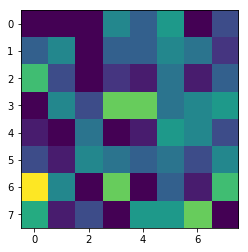

[[ 0.  0.  0.  6.  7.  7.  0.  8.]
 [ 4.  7.  0.  4.  2.  4.  8.  3.]
 [ 9.  3.  0.  1.  0.  6.  4.  6.]
 [ 0.  5.  6.  4. 11.  6.  1.  2.]
 [ 2.  0.  5.  0.  3.  3.  5.  2.]
 [ 3. 11.  5.  2.  6.  8.  1.  3.]
 [10.  4.  0.  9.  0.  3.  5.  4.]
 [ 6.  5.  2.  0.  8.  5. 10.  0.]]


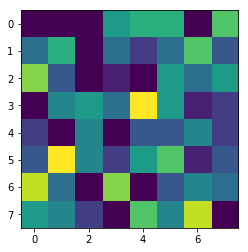

[[ 0.  0.  0.  5.  1.  4.  0.  7.]
 [ 4.  6.  0.  4.  3.  3.  0.  6.]
 [ 3.  5.  0.  5.  2.  5. 12.  9.]
 [ 0.  3.  9.  4.  9.  4.  5.  2.]
 [ 3.  0.  4.  0.  5.  4.  9.  5.]
 [ 8. 10.  7.  3.  4.  6.  1.  5.]
 [ 4.  8.  0.  7.  0.  5.  6.  6.]
 [ 6.  4.  7.  0.  2.  4.  3.  0.]]


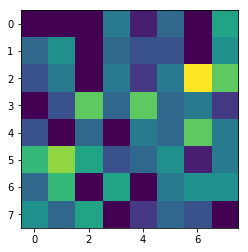

[[ 0.  0.  0.  2.  3.  2.  0.  6.]
 [ 3.  4.  0.  5.  2.  6.  5.  0.]
 [ 9.  3.  0.  9.  5.  7.  3.  2.]
 [ 0. 10.  4.  3.  9.  4.  5. 11.]
 [ 9.  0.  3.  0.  3. 13.  5.  6.]
 [ 4.  3.  4.  7.  4.  4.  4.  4.]
 [ 6.  2.  0.  1.  0.  6. 12.  4.]
 [ 5.  6.  6.  0.  3.  6.  7.  0.]]


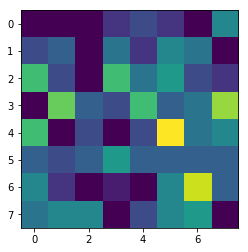

[[ 0.  0.  0.  1.  4.  5.  0.  7.]
 [ 3.  2.  0.  4.  1.  6.  3.  3.]
 [ 6.  2.  0.  4.  2.  6.  6. 10.]
 [ 0. 12. 10.  7. 10.  4.  4. 11.]
 [ 5.  0.  7.  0.  4.  7.  2.  6.]
 [ 9.  4.  0.  6.  3.  6.  2.  7.]
 [ 7.  4.  0.  4.  0.  6.  6.  1.]
 [ 1.  3.  4.  0.  5.  6.  7.  0.]]


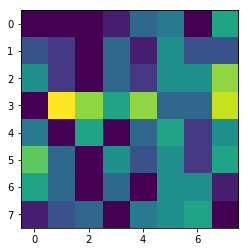

[[ 0.  0.  0.  5.  3.  3.  0.  7.]
 [ 2.  6.  0.  3.  3.  5.  7.  6.]
 [ 6.  8.  0.  8.  1.  5.  7.  3.]
 [ 0.  6.  7.  6.  8.  0.  7.  6.]
 [ 1.  0.  8.  0.  3.  4.  3.  8.]
 [ 9.  3.  4.  2.  6.  5.  3.  4.]
 [ 7.  4.  0.  1.  0. 10.  6.  7.]
 [ 3.  7.  6.  0.  6.  7.  4.  0.]]


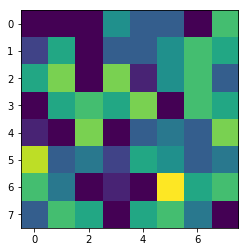

[[ 0.  0.  0.  6.  3.  4.  0.  8.]
 [ 2.  8.  0.  6.  2.  5.  6.  2.]
 [ 7.  4.  0.  6.  1.  6.  4.  4.]
 [ 0. 10.  5.  6.  7.  2.  4.  8.]
 [ 8.  0.  1.  0.  0.  7.  5.  7.]
 [ 2.  5.  2.  3.  6.  6.  5.  2.]
 [ 5.  2.  0.  4.  0.  9. 11.  5.]
 [10.  4.  6.  0.  3.  7.  4.  0.]]


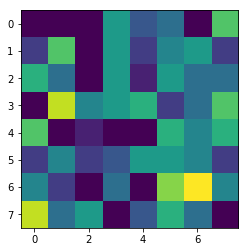

[[ 0.  0.  0.  2.  6.  6.  0.  6.]
 [ 2.  2.  0.  5.  2.  3.  2.  5.]
 [ 7.  3.  0.  2.  1.  3.  6.  8.]
 [ 0. 13.  7.  8.  4.  2.  6. 12.]
 [ 5.  0.  7.  0.  5.  5.  3.  8.]
 [ 4.  6.  3.  5.  3.  6.  2. 10.]
 [ 9.  3.  0.  8.  0.  5.  3.  1.]
 [ 4.  3.  5.  0.  3.  9.  8.  0.]]


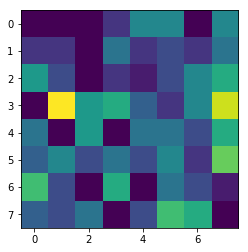

[[ 0.  0.  0.  6.  7.  4.  0.  3.]
 [ 5.  4.  0.  1.  8.  4. 10.  4.]
 [ 1.  5.  0.  5.  3.  2.  5.  0.]
 [ 0.  3.  6.  9.  9.  1.  8.  4.]
 [ 4.  0.  5.  0.  2.  6.  3. 12.]
 [ 3.  0.  6.  3.  5.  7.  2.  5.]
 [ 7.  6.  0.  4.  0.  8.  6.  6.]
 [ 8. 11.  2.  0.  6.  2. 10.  0.]]


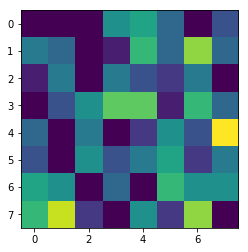

[[ 0.  0.  0.  4.  5.  4.  0.  5.]
 [ 2.  2.  0.  4.  1.  6.  2.  3.]
 [ 6.  3.  0.  5.  1.  4.  5.  9.]
 [ 0.  8.  7.  9.  9.  4.  2. 10.]
 [ 5.  0.  6.  0.  4.  6.  7.  5.]
 [ 7.  5.  4.  8.  5.  5.  2.  8.]
 [ 6.  7.  0.  7.  0.  5.  3.  2.]
 [ 3.  4.  2.  0.  6.  8.  7.  0.]]


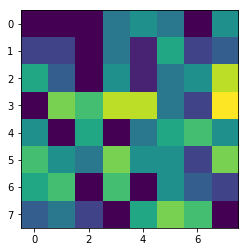

[[ 0.  0.  0.  6.  3.  7.  0.  3.]
 [ 5.  8.  0.  5.  1.  7.  7.  3.]
 [ 8.  2.  0.  1.  1.  4.  2.  6.]
 [ 0.  4.  6.  7. 10.  5.  5.  5.]
 [ 2.  0.  6.  0.  0.  7.  7.  0.]
 [ 7.  3.  2.  4.  6.  7.  2.  5.]
 [12.  5.  0.  9.  0.  4.  4.  9.]
 [ 5.  1.  4.  0.  7.  6. 10.  0.]]


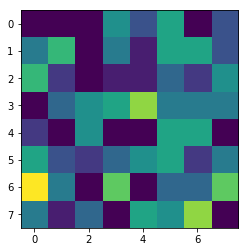

[[ 0.  0.  0.  7.  2.  7.  0.  4.]
 [ 4.  7.  0.  5.  0.  5.  0.  6.]
 [ 0.  4.  0.  3.  1.  3.  8. 10.]
 [ 0.  5.  8.  9.  6.  4.  6.  8.]
 [ 1.  0.  8.  0.  0.  2.  4.  1.]
 [11.  5.  6.  4.  4.  6.  2. 10.]
 [ 8.  7.  0.  5.  0.  4.  1.  8.]
 [ 4.  5.  9.  0.  3.  7.  8.  0.]]


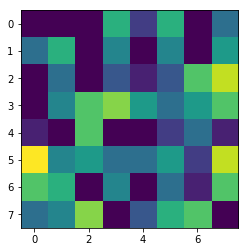

[[ 0.  0.  0.  7.  4.  3.  0.  4.]
 [ 1.  5.  0.  7.  2.  7.  2.  4.]
 [ 7.  3.  0.  8.  2.  2.  8.  5.]
 [ 0.  7.  6.  4. 10.  4.  4. 10.]
 [ 7.  0.  3.  0.  3.  5.  9.  4.]
 [ 6.  6.  6.  8.  7.  5.  3.  7.]
 [ 5.  4.  0.  1.  0.  7.  4.  0.]
 [ 1.  5.  3.  0.  2. 11.  7.  0.]]


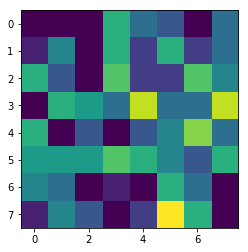

[[ 0.  0.  0.  5.  5.  8.  0.  7.]
 [ 6.  4.  0.  2.  3.  7.  6.  6.]
 [ 3.  1.  0.  1.  1.  8.  6.  5.]
 [ 0.  8. 11.  9. 11.  6. 10.  2.]
 [ 0.  0.  6.  0.  4.  0.  0.  5.]
 [ 8.  2.  2.  0.  5.  7.  2.  3.]
 [ 9.  4.  0.  8.  0.  3.  5.  6.]
 [ 5.  7.  4.  0.  8.  1.  7.  0.]]


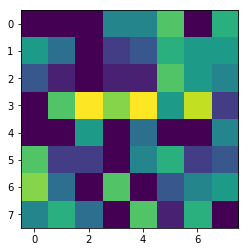

[[ 0.  0.  0.  3.  9.  5.  0.  8.]
 [ 9.  5.  0.  4.  8.  1. 11.  3.]
 [ 4.  1.  0.  0.  0.  5.  1.  5.]
 [ 0.  5. 10.  6. 14.  3.  3.  3.]
 [ 1.  0.  9.  0.  4.  2.  0. 13.]
 [ 9.  4.  1.  1.  1.  8.  1.  6.]
 [ 8.  3.  0. 11.  0.  6.  3.  4.]
 [ 7.  1.  1.  0. 11.  1. 11.  0.]]


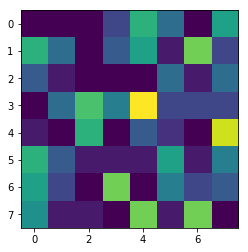

[[ 0.  0.  0.  4.  7.  2.  0.  5.]
 [ 5.  2.  0.  2.  2.  5. 10.  3.]
 [ 5.  7.  0.  6.  2.  2.  2.  4.]
 [ 0.  3.  8.  8. 10.  3.  1.  7.]
 [ 4.  0.  9.  0.  4.  5.  5.  7.]
 [ 7.  4.  5.  5.  6.  6.  2.  5.]
 [ 5.  7.  0.  4.  0.  8.  5.  3.]
 [ 3.  9.  0.  0.  9.  4.  9.  0.]]


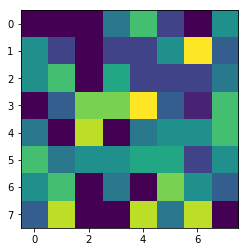

[[ 0.  0.  0.  7.  6.  6.  0.  6.]
 [ 3.  4.  0.  4.  2.  6.  7.  2.]
 [ 8.  2.  0.  4.  0.  4.  3.  3.]
 [ 0.  4.  4.  8. 11.  6.  5.  3.]
 [ 1.  0.  6.  0.  2.  3.  7.  3.]
 [ 5.  6.  6.  3.  7.  6.  2.  5.]
 [11.  6.  0.  8.  0.  2.  1.  6.]
 [ 5.  6.  3.  0.  8.  8. 11.  0.]]


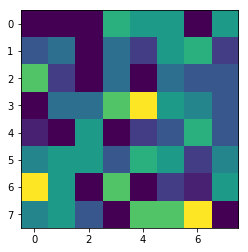

[[ 0.  0.  0.  6.  7.  3.  0.  8.]
 [ 4.  4.  0.  3.  2.  7.  9.  5.]
 [ 7.  7.  0.  5.  1.  3.  4.  6.]
 [ 0.  7.  7.  7. 11.  2.  4.  8.]
 [ 3.  0.  8.  0.  3.  4.  4.  4.]
 [ 8.  4.  1.  5.  8.  5.  3.  4.]
 [ 5.  5.  0.  2.  0.  8.  7.  2.]
 [ 1.  7.  1.  0.  8.  3.  7.  0.]]


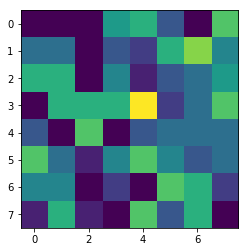

[[ 0.  0.  0.  4.  4.  2.  0. 10.]
 [ 3.  3.  0.  3.  3.  6.  8.  5.]
 [ 9.  5.  0.  7.  1.  3.  7.  3.]
 [ 0.  6. 10.  4. 11.  1.  5.  2.]
 [ 5.  0.  4.  0.  6.  4.  6.  9.]
 [ 7.  6.  3.  3.  7.  7.  2.  3.]
 [ 5.  4.  0.  4.  0. 10.  9.  2.]
 [ 3.  5.  3.  0.  5.  4.  4.  0.]]


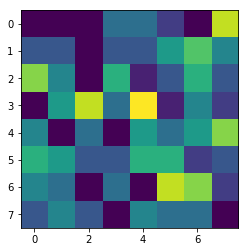

[[ 0.  0.  0.  3.  2.  5.  0.  7.]
 [ 1.  8.  0.  3.  2.  3.  5.  5.]
 [10.  9.  0.  6.  1.  8.  3.  4.]
 [ 0.  9.  3.  5.  0.  3.  7.  5.]
 [ 2.  0.  7.  0.  7.  6.  2.  6.]
 [ 2.  6.  5.  0.  6.  3.  6.  3.]
 [10.  3.  0.  7.  0.  9.  5.  9.]
 [ 6.  5.  4.  0.  8. 10.  3.  0.]]


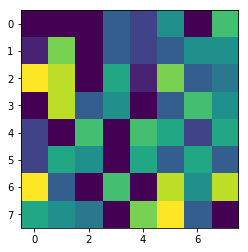

[[ 0.  0.  0.  8.  6.  4.  0.  7.]
 [ 4.  6.  0.  5.  6.  4.  6.  5.]
 [ 9.  3.  0.  4.  2.  5.  5.  3.]
 [ 0.  3.  2.  5. 11.  3.  6.  4.]
 [ 2.  0.  7.  0.  2.  4.  7.  3.]
 [ 6.  7.  4.  4.  5.  4.  2.  5.]
 [ 8.  5.  0.  6.  0.  1.  5.  7.]
 [ 3.  4.  5.  0.  6.  5. 11.  0.]]


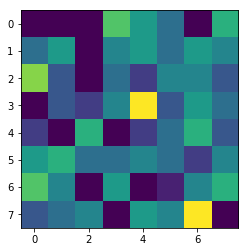

[[ 0.  0.  0.  4.  4.  7.  0.  5.]
 [ 1.  6.  0.  3.  2.  5.  5.  3.]
 [ 9.  6.  0.  6.  3.  9.  4.  5.]
 [ 0.  9.  4.  6.  4.  4.  6.  6.]
 [ 3.  0.  6.  0.  4.  7.  2.  6.]
 [ 1.  5.  5.  3.  6.  5.  4.  3.]
 [10.  4.  0.  5.  0.  6.  7.  6.]
 [ 6.  6.  2.  0.  6.  9.  6.  0.]]


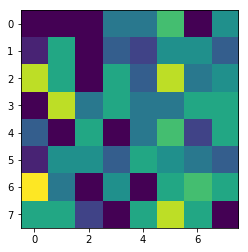

[[ 0.  0.  0.  4.  0.  4.  0.  8.]
 [ 3.  7.  0.  5.  1.  6.  5.  3.]
 [ 8.  6.  0.  8.  2.  9.  1.  3.]
 [ 0. 11.  4.  7.  1.  5.  6.  7.]
 [ 8.  0.  1.  0.  5.  7.  2.  7.]
 [ 1.  5.  4.  2.  7.  2.  9.  1.]
 [ 5.  3.  0.  5.  0.  8. 11.  5.]
 [ 9.  4.  4.  0.  7.  8.  0.  0.]]


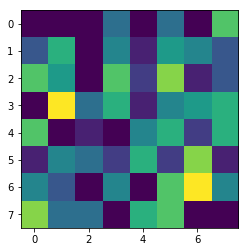

[[ 0.  0.  0.  6.  4.  6.  0.  0.]
 [ 4. 13.  0.  6.  4.  3.  2.  8.]
 [ 6.  6.  0.  1.  1.  5.  7.  6.]
 [ 0.  4.  5.  4.  5.  3.  5.  8.]
 [ 3.  0.  7.  0.  3.  7.  4.  2.]
 [ 5.  4.  5.  5.  3.  6.  2.  7.]
 [ 9.  7.  0.  8.  0. 10.  3.  8.]
 [ 3.  2.  2.  0.  5.  7.  8.  0.]]


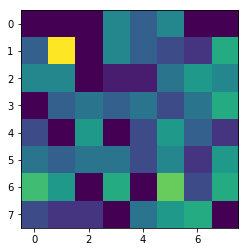

[[ 0.  0.  0.  3.  7.  7.  0.  4.]
 [ 6. 12.  0.  7.  3.  3.  4.  6.]
 [ 9.  0.  0.  2.  2.  9.  6.  3.]
 [ 0.  5.  8.  0.  7.  6.  5.  6.]
 [ 3.  0.  6.  0.  4.  2.  2.  3.]
 [ 7.  8.  7.  3.  3.  7.  1.  5.]
 [10.  5.  0.  5.  0.  4.  5.  6.]
 [ 3.  3.  3.  0.  8.  6.  9.  0.]]


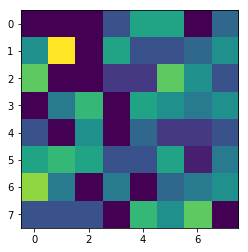

[[ 0.  0.  0.  7.  3.  8.  0.  0.]
 [ 3.  8.  0.  7.  3.  4.  1.  6.]
 [ 7.  4.  0.  1.  2.  5.  8.  7.]
 [ 0.  7.  3.  4.  7.  5.  6.  9.]
 [ 3.  0.  7.  0.  2.  8.  4.  0.]
 [ 4.  4.  5.  6.  1.  4.  2.  7.]
 [11.  3.  0. 10.  0.  5.  3.  8.]
 [ 4.  3.  7.  0.  2.  9. 11.  0.]]


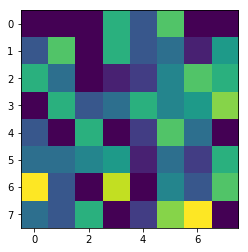

[[ 0.  0.  0.  4.  2.  4.  0.  4.]
 [ 3.  7.  0.  4.  1.  6.  7.  1.]
 [ 8.  5.  0.  6.  2.  4.  2.  5.]
 [ 0.  4.  6.  6.  8.  3.  3.  5.]
 [ 2.  0.  8.  0.  3.  7.  6.  4.]
 [ 8.  4.  4.  6.  6.  6.  3.  6.]
 [10.  6.  0.  5.  0.  7.  3.  7.]
 [ 3.  3.  1.  0.  9. 10.  8.  0.]]


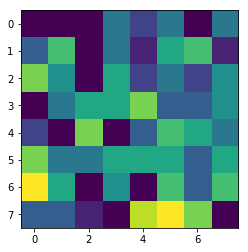

[[ 0.  0.  0.  4.  5.  3.  0.  5.]
 [ 2.  4.  0.  6.  2.  5.  1.  3.]
 [ 8.  4.  0.  5.  1.  2.  6.  8.]
 [ 0.  9.  5.  6.  7.  3.  3. 13.]
 [ 6.  0.  5.  0.  3.  8.  8.  4.]
 [ 5.  6.  5.  9.  4.  4.  2.  8.]
 [ 6.  6.  0.  5.  0.  6.  4.  2.]
 [ 3.  2.  4.  0.  2.  9.  6.  0.]]


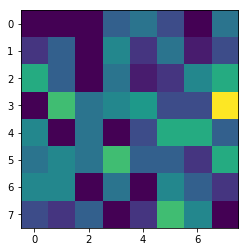

[[ 0.  0.  0.  2.  0.  5.  0.  6.]
 [ 2.  7.  0.  3.  0.  4.  5.  3.]
 [11.  7.  0.  8.  2.  9.  0.  3.]
 [ 0.  8.  4.  5.  0.  5.  6.  4.]
 [ 3.  0.  7.  0.  8.  7.  2.  5.]
 [ 4.  7.  5.  1.  7.  3.  7.  4.]
 [10.  3.  0.  9.  0.  7.  5.  7.]
 [ 4.  5.  2.  0. 10. 13.  2.  0.]]


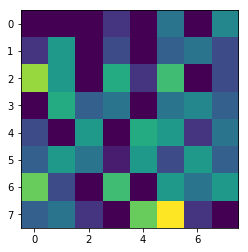

[[ 0.  0.  0.  4.  2.  6.  0.  7.]
 [ 1.  8.  0.  4.  1.  4.  5.  4.]
 [ 9.  7.  0.  6.  2.  9.  3.  4.]
 [ 0. 10.  3.  6.  0.  3.  6.  6.]
 [ 6.  0.  4.  0.  4.  7.  1.  6.]
 [ 0.  7.  4.  1.  7.  4.  6.  2.]
 [ 8.  3.  0.  5.  0.  8.  8.  7.]
 [ 8.  6.  3.  0.  6.  9.  3.  0.]]


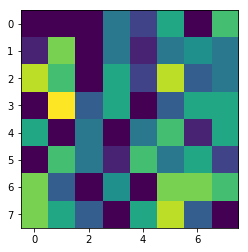

[[ 0.  0.  0.  5.  6.  4.  0.  8.]
 [ 3.  3.  0.  2.  3.  5.  8.  5.]
 [ 9.  6.  0.  5.  1.  3.  8.  4.]
 [ 0.  4.  8.  4. 11.  2.  4.  3.]
 [ 2.  0.  5.  0.  5.  4.  8.  6.]
 [ 5.  7.  6.  3.  6.  6.  1.  2.]
 [ 6.  6.  0.  6.  0.  8.  6.  3.]
 [ 5.  7.  4.  0.  5.  4.  5.  0.]]


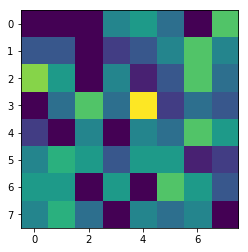

[[ 0.  0.  0.  8.  3.  3.  0.  6.]
 [ 4. 10.  0.  8.  2.  5.  6.  2.]
 [ 5.  2.  0.  6.  1.  3.  4.  3.]
 [ 0.  7.  6.  4.  9.  2.  2.  8.]
 [10.  0.  1.  0.  0.  6.  6.  7.]
 [ 5.  4.  3.  5.  6.  6.  5.  4.]
 [ 4.  2.  0.  2.  0.  9. 10.  4.]
 [ 8.  3.  7.  0.  2.  9.  6.  0.]]


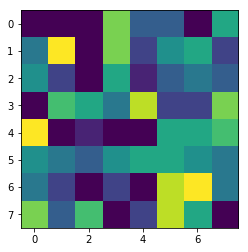

[[ 0.  0.  0.  3.  3.  2.  0.  4.]
 [ 4.  2.  0.  3.  6.  0.  7.  1.]
 [ 6.  6.  0.  8.  4.  0.  5.  1.]
 [ 0.  5.  4.  4.  5.  1. 10.  8.]
 [ 1.  0.  9.  0.  4.  6.  8. 11.]
 [ 5.  3. 11.  4.  1.  1.  4.  9.]
 [ 7.  2.  0.  4.  0.  4.  2.  8.]
 [ 9.  6. 12.  0.  4. 12.  5.  0.]]


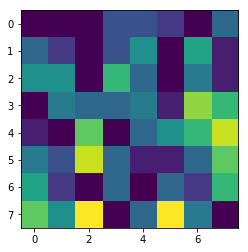

[[ 0.  0.  0.  3.  4.  1.  0.  6.]
 [ 2.  3.  0.  4.  1.  5.  3.  7.]
 [ 8.  6.  0.  8.  2.  0.  9.  3.]
 [ 0.  9. 10.  3.  9.  2.  7. 11.]
 [ 4.  0.  6.  0.  8.  1.  6.  8.]
 [11.  3.  7.  4.  6.  5.  2.  7.]
 [ 6.  3.  0.  0.  0. 11.  1.  0.]
 [ 0.  6.  5.  0.  4.  9.  3.  0.]]


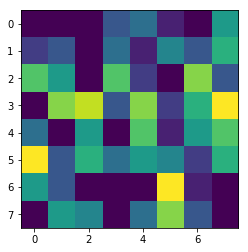

[[ 0.  0.  0.  7.  8.  5.  0.  8.]
 [ 2.  5.  0.  3.  5.  5.  8.  4.]
 [10.  6.  0.  5.  2.  6.  6.  3.]
 [ 0.  4.  4.  4. 11.  5.  4.  4.]
 [ 0.  0.  5.  0.  3.  1.  8.  5.]
 [ 2. 10.  9.  2.  8.  5.  2.  0.]
 [ 8.  6.  0.  4.  0.  5.  2.  3.]
 [ 5.  7.  3.  0.  8.  6.  8.  0.]]


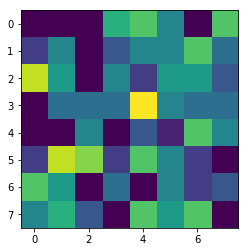

[[ 0.  0.  0.  5.  7.  4.  0.  6.]
 [ 2.  4.  0.  6.  1.  6.  3.  2.]
 [ 9.  2.  0.  5.  3.  6.  6.  7.]
 [ 0. 11.  6.  4.  8.  5.  4. 13.]
 [ 6.  0.  4.  0.  2.  6.  7.  3.]
 [ 4.  7.  5.  8.  5.  3.  3.  5.]
 [ 6.  3.  0.  1.  0.  3.  7.  0.]
 [ 3.  4.  5.  0.  3.  8.  7.  0.]]


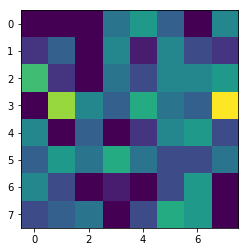

[[ 0.  0.  0.  1.  3.  4.  0.  5.]
 [ 5.  8.  0.  4.  4.  3.  4.  6.]
 [14.  2.  0.  3.  1.  5.  3.  2.]
 [ 0.  6.  4.  2.  7.  4. 10.  7.]
 [ 1.  0.  6.  0.  5.  7.  8.  3.]
 [ 6.  4.  8.  3.  2.  4.  2.  6.]
 [13.  6.  0. 10.  0.  4.  2. 10.]
 [ 5.  0.  4.  0.  7.  5.  7.  0.]]


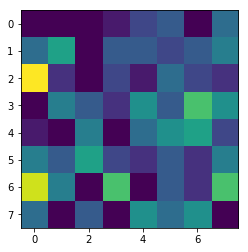

[[0. 0. 0. 4. 5. 5. 0. 5.]
 [2. 2. 0. 4. 1. 5. 3. 3.]
 [6. 3. 0. 4. 1. 4. 5. 8.]
 [0. 9. 7. 9. 8. 4. 3. 9.]
 [5. 0. 7. 0. 5. 5. 4. 5.]
 [6. 5. 3. 6. 5. 6. 2. 9.]
 [8. 7. 0. 8. 0. 6. 3. 1.]
 [2. 5. 1. 0. 6. 8. 8. 0.]]


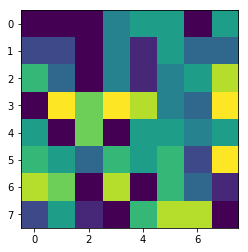

[[ 0.  0.  0.  7.  0.  6.  0.  6.]
 [ 3.  6.  0.  4.  1.  5.  1.  7.]
 [ 0.  6.  0.  6.  3.  4. 10.  9.]
 [ 0.  5.  8.  7.  7.  3.  7.  5.]
 [ 1.  0.  8.  0.  2.  3.  5.  3.]
 [12.  5.  3.  2.  6.  5.  2.  7.]
 [ 7.  5.  0.  3.  0.  6.  4.  8.]
 [ 2.  7. 10.  0.  3.  8.  6.  0.]]


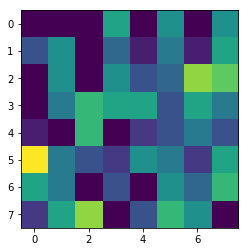

[[ 0.  0.  0.  5.  0.  3.  0. 10.]
 [ 5.  3.  0.  2.  4.  4.  3.  7.]
 [ 4.  5.  0.  6.  3.  3. 13.  6.]
 [ 0.  4.  9.  4.  9.  3. 10.  0.]
 [ 4.  0.  3.  0.  6.  5. 10.  6.]
 [ 8.  9.  4.  0.  6.  6.  2.  4.]
 [ 3.  4.  0.  7.  0.  5.  9.  5.]
 [ 5.  7.  9.  0.  1.  1.  2.  0.]]


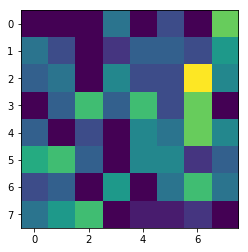

[[ 0.  0.  0.  1.  1.  2.  0.  3.]
 [ 3.  3.  0.  1.  2.  2.  2.  4.]
 [ 0.  7.  0. 11.  4.  6.  7.  4.]
 [ 0.  2.  6.  8.  4.  1.  1.  8.]
 [ 7.  0.  8.  0.  5. 12.  3. 11.]
 [ 9.  3.  7.  4.  2.  7.  1. 10.]
 [ 3. 10.  0.  3.  0.  9.  7.  7.]
 [ 3. 11.  5.  0.  3.  8.  8.  0.]]


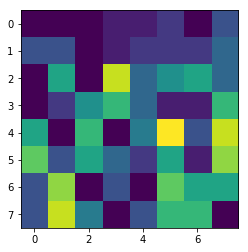

[[ 0.  0.  0.  1.  4.  2.  0.  7.]
 [ 4.  2.  0.  0.  4.  2.  7.  2.]
 [ 3.  7.  0.  7.  4.  5.  4.  6.]
 [ 0.  3.  8.  8.  8.  0.  3.  7.]
 [ 2.  0. 10.  0.  3.  8.  3. 12.]
 [ 8.  2.  5.  5.  1.  6.  1.  8.]
 [ 5.  9.  0.  3.  0.  6.  6.  8.]
 [ 6.  6.  4.  0.  7.  5.  8.  0.]]


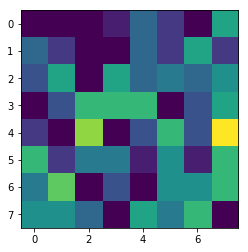

[[ 0.  0.  0.  0.  7.  3.  0.  8.]
 [ 8.  4.  0.  3.  5.  1. 10.  3.]
 [ 6.  0.  0.  3.  2.  5.  3.  2.]
 [ 0.  3.  7.  5.  7.  3.  5.  4.]
 [ 4.  0.  7.  0.  4.  5.  5. 10.]
 [ 8.  7.  5.  1.  3.  7.  2.  7.]
 [ 7.  6.  0.  7.  0.  3.  6.  5.]
 [ 6.  7.  3.  0.  9.  2. 10.  0.]]


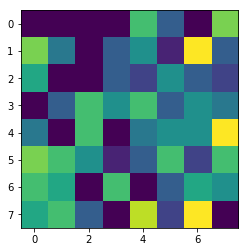

[[0. 0. 0. 5. 5. 4. 0. 7.]
 [1. 4. 0. 4. 5. 3. 3. 5.]
 [9. 4. 0. 7. 3. 5. 6. 3.]
 [0. 5. 3. 5. 7. 3. 7. 4.]
 [3. 0. 7. 0. 5. 4. 7. 6.]
 [3. 8. 7. 5. 5. 5. 2. 7.]
 [8. 6. 0. 6. 0. 3. 4. 4.]
 [2. 5. 2. 0. 5. 8. 8. 0.]]


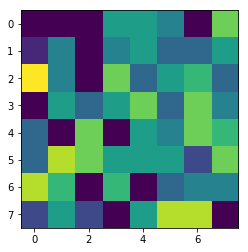

[[ 0.  0.  0.  3.  1.  4.  0.  7.]
 [ 3.  9.  0.  4.  1.  4.  6.  3.]
 [ 9.  8.  0.  7.  2.  9.  0.  3.]
 [ 0.  9.  4.  6.  0.  5.  7.  6.]
 [ 4.  0.  5.  0.  7.  5.  1.  6.]
 [ 1.  6.  5.  0.  7.  2.  9.  1.]
 [ 8.  3.  0.  6.  0.  9.  6.  7.]
 [ 7.  5.  2.  0. 10.  9.  0.  0.]]


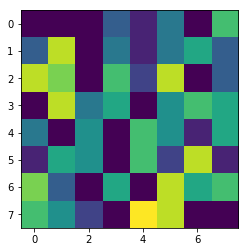

[[ 0.  0.  0.  6.  3.  5.  0.  5.]
 [ 1.  2.  0.  7.  4.  1.  2.  0.]
 [ 6.  2.  0.  8.  0.  7.  4.  5.]
 [ 0. 12.  7.  6.  8.  4.  5.  8.]
 [ 4.  0.  5.  0.  5.  2.  2. 14.]
 [ 4.  4.  9.  4.  2.  3.  5.  8.]
 [ 7.  0.  0.  6.  0.  3.  3.  3.]
 [10.  3. 11.  0.  2. 18.  4.  0.]]


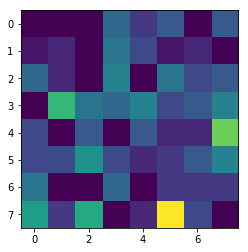

[[ 0.  0.  0.  7.  9.  5.  0.  5.]
 [ 2.  8.  0.  5.  3.  2.  8.  5.]
 [11.  8.  0.  4.  3.  5.  4.  4.]
 [ 0.  4.  2.  0.  5.  4.  0.  8.]
 [ 1.  0. 11.  0.  3.  4.  4.  2.]
 [ 3. 12.  7.  5.  5.  4.  3.  4.]
 [10.  2.  0.  4.  0.  5.  3.  4.]
 [ 1.  7.  3.  0.  7. 10. 11.  0.]]


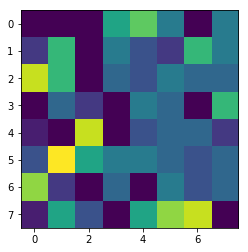

[[ 0.  0.  0.  4.  4.  7.  0.  5.]
 [ 4.  7.  0.  4.  1.  6.  4.  5.]
 [ 7.  4.  0.  0.  3.  5.  5.  8.]
 [ 0.  6.  7.  7.  6.  4.  7. 10.]
 [ 1.  0.  7.  0.  1.  7.  5.  1.]
 [ 6.  4.  5.  4.  3.  6.  1.  6.]
 [10.  7.  0.  5.  0.  4.  5.  7.]
 [ 5.  3.  5.  0.  5.  4.  8.  0.]]


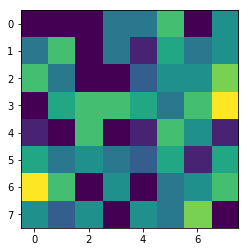

[[ 0.  0.  0.  2.  4.  2.  0.  8.]
 [ 2.  3.  0.  5.  0.  5.  5.  5.]
 [ 5.  4.  0.  7.  1.  2.  6.  7.]
 [ 0. 10.  8.  7.  8.  2.  4. 12.]
 [ 6.  0.  6.  0.  4.  4.  5.  8.]
 [12.  3.  2.  5.  6.  6.  3.  8.]
 [ 6.  4.  0.  0.  0. 10.  4.  1.]
 [ 1.  7.  4.  0.  5.  8.  6.  0.]]


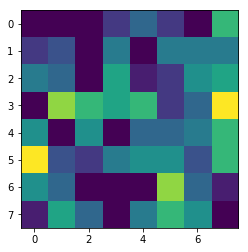

[[ 0.  0.  0.  4.  6.  6.  0.  0.]
 [ 5. 10.  0.  6.  3.  4.  2.  6.]
 [ 9.  0.  0.  4.  3. 10.  6.  1.]
 [ 0.  4.  8.  0.  5.  5.  7.  9.]
 [ 4.  0.  8.  0.  4.  6.  2.  3.]
 [ 6.  3.  9.  5.  0.  4.  2.  5.]
 [10.  5.  0.  5.  0.  5.  7.  7.]
 [ 2.  2.  5.  0.  5. 10.  8.  0.]]


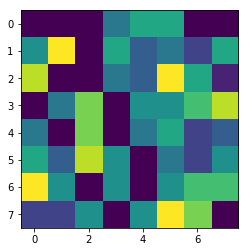

[[ 0.  0.  0.  4.  2.  3.  0.  8.]
 [ 0.  0.  0.  4.  6.  0.  5.  1.]
 [ 8.  7.  0. 11.  3.  6.  7.  3.]
 [ 0.  8.  3.  2. 12.  0.  6.  4.]
 [ 1.  0.  9.  0.  3.  7.  4. 13.]
 [ 8.  4.  4.  2.  3.  5.  1.  8.]
 [10.  0.  0.  2.  0.  5.  3.  7.]
 [ 4.  6. 10.  0.  3. 13.  9.  0.]]


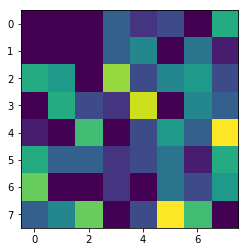

[[ 0.  0.  0.  4.  1.  5.  0.  7.]
 [ 1.  8.  0.  4.  4.  2.  3.  3.]
 [ 8.  8.  0.  4.  1.  7.  6.  7.]
 [ 0.  8.  3.  7.  6.  3.  7.  5.]
 [ 0.  0.  5.  0.  5.  5.  5.  7.]
 [ 4.  4.  6.  1.  5.  5.  4.  4.]
 [10.  5.  0.  7.  0.  8.  1. 10.]
 [ 8.  3.  4.  0.  7.  9.  4.  0.]]


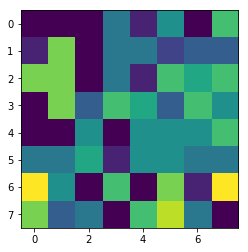

[[ 0.  0.  0.  2.  8.  4.  0.  9.]
 [ 6.  4.  0.  4.  5.  1.  8.  3.]
 [ 6.  0.  0.  2.  1.  5.  3.  3.]
 [ 0.  4.  6.  6.  5.  2.  5.  6.]
 [ 4.  0.  8.  0.  3.  3.  5.  9.]
 [ 7.  9.  6.  2.  2.  7.  2.  9.]
 [ 7.  7.  0.  8.  0.  2.  5.  5.]
 [ 6.  5.  4.  0.  8.  5. 10.  0.]]


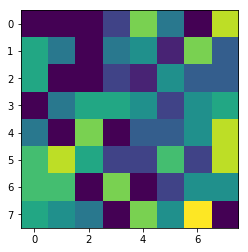

[[0. 0. 0. 8. 3. 7. 0. 3.]
 [4. 9. 0. 5. 1. 6. 2. 6.]
 [3. 5. 0. 3. 3. 4. 9. 9.]
 [0. 4. 8. 6. 8. 5. 6. 6.]
 [1. 0. 8. 0. 2. 3. 5. 0.]
 [9. 6. 4. 4. 6. 6. 2. 6.]
 [8. 6. 0. 5. 0. 5. 2. 6.]
 [1. 5. 6. 0. 5. 7. 8. 0.]]


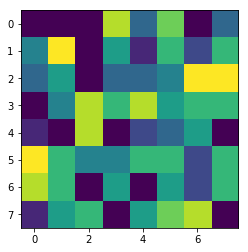

[[ 0.  0.  0.  5.  4.  5.  0.  6.]
 [ 3.  7.  0.  5.  1.  6.  7.  3.]
 [10.  3.  0.  4.  1.  5.  3.  5.]
 [ 0.  5.  4.  4.  8.  4.  5.  6.]
 [ 3.  0.  7.  0.  3.  6.  7.  1.]
 [ 7.  6.  3.  5.  6.  6.  2.  5.]
 [10.  4.  0.  7.  0.  4.  5.  6.]
 [ 2.  4.  3.  0.  7.  9.  8.  0.]]


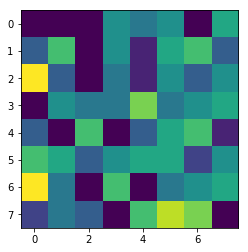

[[ 0.  0.  0.  5.  6.  6.  0.  5.]
 [ 5.  9.  0.  6.  1.  5.  5.  4.]
 [ 4.  1.  0.  3.  1.  6.  9.  6.]
 [ 0.  3. 12.  2.  9.  4.  3.  6.]
 [ 2.  0.  6.  0.  3.  0.  5.  5.]
 [ 9.  8.  8.  3.  4.  7.  1.  4.]
 [ 6.  6.  0.  3.  0.  6.  4.  3.]
 [ 4.  5.  6.  0.  5.  8.  6.  0.]]


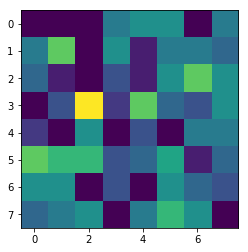

[[ 0.  0.  0.  7.  7.  6.  0.  1.]
 [ 2.  2.  0.  1.  7.  5.  8.  3.]
 [ 3.  6.  0.  7.  3.  5.  7.  1.]
 [ 0.  5.  7.  7. 11.  3.  8.  3.]
 [ 2.  0.  3.  0.  3.  5.  3. 13.]
 [ 0.  0.  9.  3.  5.  6.  2.  2.]
 [ 8.  4.  0.  3.  0.  8.  7.  5.]
 [ 9. 11.  3.  0.  4.  5.  8.  0.]]


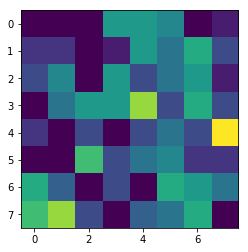

[[ 0.  0.  0.  4.  7.  2.  0.  9.]
 [ 6.  3.  0.  2.  6.  2. 10.  2.]
 [ 4.  5.  0.  4.  2.  5.  1.  4.]
 [ 0.  3.  6.  7. 10.  1.  3.  5.]
 [ 1.  0.  9.  0.  3.  4.  3. 11.]
 [ 8.  4.  5.  3.  2.  5.  2.  6.]
 [ 5.  6.  0.  5.  0.  4.  6.  8.]
 [ 8.  6.  5.  0.  9.  2.  9.  0.]]


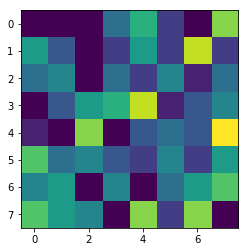

[[ 0.  0.  0.  6.  4.  7.  0.  3.]
 [ 2. 10.  0.  4.  3.  4.  4.  6.]
 [ 7.  6.  0.  2.  2.  7.  8.  5.]
 [ 0.  6.  7.  3.  7.  3.  6.  5.]
 [ 2.  0.  5.  0.  4.  5.  4.  4.]
 [ 3.  6.  5.  3.  5.  7.  2.  2.]
 [ 8.  6.  0.  6.  0.  9.  6.  6.]
 [ 6.  4.  3.  0.  4.  7.  6.  0.]]


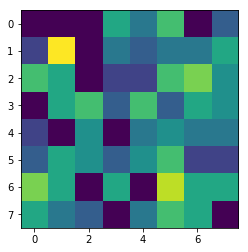

[[ 0.  0.  0.  3.  6.  6.  0.  7.]
 [ 2.  3.  0.  5.  1.  5.  2.  3.]
 [ 9.  2.  0.  2.  2.  6.  5.  9.]
 [ 0. 12.  7.  5.  6.  4.  4. 12.]
 [ 5.  0.  8.  0.  4.  6.  3.  4.]
 [ 5.  7.  3.  7.  3.  5.  2.  8.]
 [ 8.  3.  0.  6.  0.  4.  5.  1.]
 [ 2.  3.  4.  0.  4.  8.  8.  0.]]


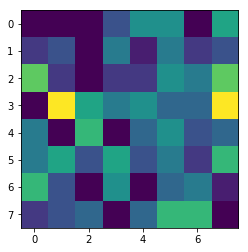

[[ 0.  0.  0.  4.  9.  7.  0.  4.]
 [ 5.  4.  0.  3.  2.  3.  6.  6.]
 [ 8.  2.  0.  2.  3.  6.  5.  5.]
 [ 0.  3.  6.  3.  6.  5.  4.  9.]
 [ 2.  0.  9.  0.  3.  4.  5.  3.]
 [ 3. 10.  9.  4.  1.  5.  1.  6.]
 [ 9.  8.  0.  8.  0.  2.  4.  4.]
 [ 4.  6.  5.  0.  6.  6. 10.  0.]]


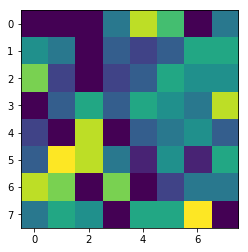

[[ 0.  0.  0.  4.  2.  5.  0.  7.]
 [ 2.  6.  0.  4.  1.  6.  6.  3.]
 [ 9.  6.  0.  7.  2.  9.  1.  3.]
 [ 0. 10.  3.  6.  2.  5.  6.  7.]
 [ 7.  0.  3.  0.  4.  7.  2.  7.]
 [ 0.  5.  5.  3.  7.  3.  7.  1.]
 [ 7.  4.  0.  5.  0.  7. 10.  5.]
 [ 8.  5.  3.  0.  7.  7.  3.  0.]]


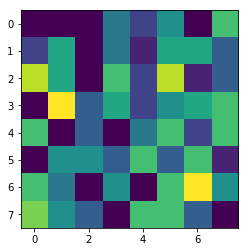

[[0. 0. 0. 5. 5. 3. 0. 6.]
 [4. 8. 0. 3. 4. 5. 7. 5.]
 [8. 5. 0. 5. 3. 3. 4. 3.]
 [0. 3. 6. 6. 8. 1. 8. 8.]
 [0. 0. 7. 0. 1. 4. 7. 5.]
 [7. 2. 8. 5. 4. 4. 2. 5.]
 [9. 7. 0. 1. 0. 6. 4. 9.]
 [6. 3. 5. 0. 7. 5. 7. 0.]]


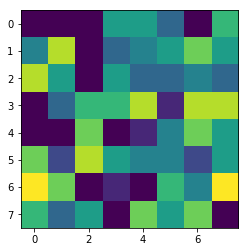

[[ 0.  0.  0.  2.  4.  3.  0.  3.]
 [ 4.  1.  0.  2.  1.  2.  4.  6.]
 [ 4.  2.  0. 10.  3.  3.  7.  0.]
 [ 0.  2.  4.  4.  1.  2.  8. 11.]
 [ 6.  0.  8.  0.  5.  9.  7.  6.]
 [ 7.  6. 11.  4.  1.  3.  2. 11.]
 [ 6.  6.  0.  5.  0.  2.  7.  6.]
 [ 4. 12. 11.  0.  1. 11.  8.  0.]]


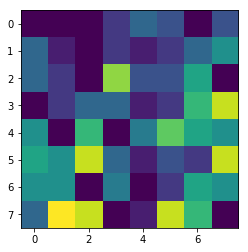

[[ 0.  0.  0.  6.  3.  4.  0.  7.]
 [ 3.  8.  0.  7.  1.  6.  6.  2.]
 [ 6.  2.  0.  6.  1.  5.  3.  5.]
 [ 0.  8.  5.  5.  7.  3.  3.  8.]
 [ 8.  0.  1.  0.  0.  7.  6.  6.]
 [ 4.  5.  3.  5.  6.  6.  4.  4.]
 [ 6.  4.  0.  4.  0.  7. 10.  5.]
 [ 9.  4.  6.  0.  3.  8.  6.  0.]]


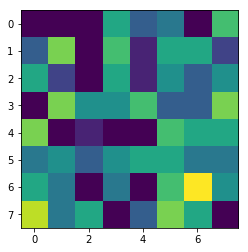

[[ 0.  0.  0.  6.  8.  4.  0.  4.]
 [ 4.  2.  0.  1.  4.  5. 12.  5.]
 [ 8.  8.  0.  7.  0.  4.  3.  0.]
 [ 0.  2.  6.  6. 11.  3.  4.  3.]
 [ 1.  0.  8.  0.  5.  3.  3.  7.]
 [ 5.  4.  7.  2.  6.  4.  3.  1.]
 [ 7.  4.  0.  6.  0.  8.  5.  5.]
 [ 5. 11.  3.  0.  8.  7.  8.  0.]]


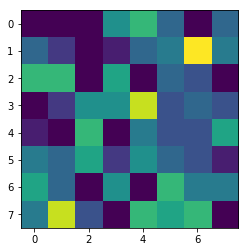

[[ 0.  0.  0.  7.  4.  6.  0.  6.]
 [ 1.  4.  0.  3.  3.  3.  2.  7.]
 [ 0.  8.  0.  5.  3.  5. 10.  8.]
 [ 0.  6.  7.  7.  4.  1.  6.  5.]
 [ 2.  0. 10.  0.  3.  2.  2.  7.]
 [ 7.  8.  4.  2.  5.  6.  2.  8.]
 [ 6.  4.  0.  4.  0.  6.  4.  5.]
 [ 2.  8.  7.  0.  2. 10.  7.  0.]]


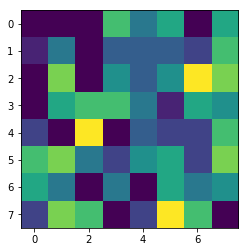

[[ 0.  0.  0.  2.  4.  4.  0.  6.]
 [ 2.  3.  0.  2.  2.  4.  3.  4.]
 [ 6.  4.  0.  6.  3.  5.  6.  7.]
 [ 0.  4.  7.  7.  8.  3.  4.  9.]
 [ 2.  0.  5.  0.  4.  5.  8.  7.]
 [ 6.  5.  9.  5.  4.  6.  0.  7.]
 [ 7. 11.  0.  3.  0.  6.  3.  5.]
 [ 5.  5.  3.  0.  6.  7.  6.  0.]]


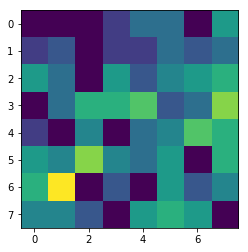

[[ 0.  0.  0.  3.  2.  5.  0.  6.]
 [ 4.  5.  0.  4.  4.  4.  5.  3.]
 [13.  2.  0.  5.  1.  6.  1.  3.]
 [ 0.  5.  3.  6. 11.  6.  8.  3.]
 [ 0.  0.  6.  0.  5.  6.  8.  4.]
 [ 6.  3.  6.  3.  5.  5.  3.  5.]
 [13.  6.  0. 11.  0.  3.  1.  9.]
 [ 4.  0.  2.  0. 10.  7.  8.  0.]]


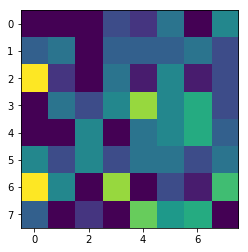

[[ 0.  0.  0.  5.  5.  4.  0.  5.]
 [ 3.  9.  0.  4.  2.  1.  3.  6.]
 [ 8.  4.  0.  5.  3.  4.  9.  2.]
 [ 0.  4.  3.  0.  5.  4.  5.  8.]
 [ 3.  0.  1.  0.  2.  3. 10.  4.]
 [ 4.  8. 15.  4.  4.  5.  1.  5.]
 [ 8.  8.  0.  2.  0.  4.  4.  9.]
 [ 9.  9.  7.  0.  3.  4.  6.  0.]]


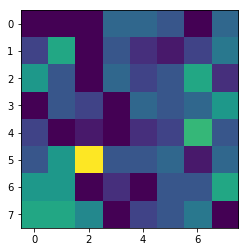

[[ 0.  0.  0.  6.  2.  6.  0.  4.]
 [ 3. 10.  0.  4.  1.  4.  2.  8.]
 [ 3.  6.  0.  3.  3.  4. 10.  7.]
 [ 0.  4.  6.  5.  5.  3.  6.  6.]
 [ 1.  0.  7.  0.  2.  3.  5.  2.]
 [ 8.  6.  5.  3.  5.  7.  1.  7.]
 [ 8.  7.  0.  6.  0.  7.  3.  8.]
 [ 3.  5.  5.  0.  4.  7.  7.  0.]]


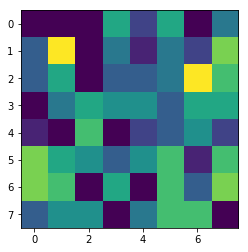

[[ 0.  0.  0.  6.  6.  7.  0.  4.]
 [ 2.  3.  0.  2.  2.  6.  5.  3.]
 [ 7.  5.  0.  4.  4.  8.  7.  6.]
 [ 0.  3.  8.  5. 10.  5.  4.  5.]
 [ 1.  0.  7.  0.  4.  4.  6.  4.]
 [ 2.  7.  9.  5.  4.  5.  1.  3.]
 [ 8.  8.  0.  7.  0.  3.  5.  4.]
 [ 5.  6.  4.  0.  5.  7.  8.  0.]]


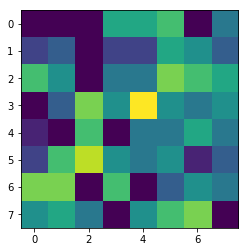

[[ 0.  0.  0.  5.  2.  5.  0.  7.]
 [ 4.  9.  0.  3.  2.  2.  2.  8.]
 [ 3.  5.  0.  4.  3.  4. 12.  6.]
 [ 0.  4.  7.  2.  3.  3.  6.  1.]
 [ 5.  0.  2.  0.  4.  3.  8.  4.]
 [ 6. 11.  9.  1.  6.  8.  1.  5.]
 [ 5.  6.  0.  6.  0.  6.  8.  8.]
 [ 7.  9.  7.  0.  1.  4.  4.  0.]]


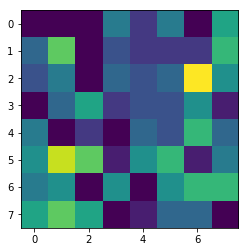

[[ 0.  0.  0.  4.  7.  5.  0.  7.]
 [ 1.  1.  0.  5.  5.  1.  4.  5.]
 [ 9.  5.  0.  4.  0.  4.  8.  7.]
 [ 0.  9.  8.  2.  8.  0.  3.  7.]
 [ 5.  0.  7.  0.  6.  5.  4. 11.]
 [ 4. 10.  4.  5.  1.  6.  1.  7.]
 [ 6.  1.  0.  9.  0.  7.  6.  0.]
 [ 5.  3.  8.  0.  0. 10.  6.  0.]]


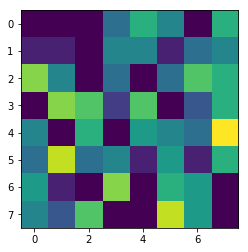

[[ 0.  0.  0.  5.  7.  6.  0.  4.]
 [ 2.  5.  0.  4.  1.  5.  2.  4.]
 [ 8.  5.  0.  2.  4.  5.  7.  8.]
 [ 0.  9.  5.  4.  5.  4.  5. 14.]
 [ 5.  0.  6.  0.  2.  7.  6.  3.]
 [ 1.  7.  7.  7.  3.  4.  2.  5.]
 [ 7.  5.  0.  3.  0.  5.  7.  3.]
 [ 5.  4.  6.  0.  1.  7.  6.  0.]]


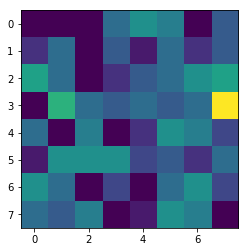

[[ 0.  0.  0.  6.  3.  5.  0.  8.]
 [ 4.  6.  0.  5.  2.  7.  8.  3.]
 [ 5.  3.  0.  5.  2.  4.  5.  6.]
 [ 0.  6.  8.  6.  9.  2.  5.  4.]
 [ 6.  0.  3.  0.  1.  5.  6.  6.]
 [ 5.  6.  1.  2.  7.  7.  3.  3.]
 [ 5.  3.  0.  4.  0.  7. 11.  4.]
 [ 7.  5.  7.  0.  3.  6.  5.  0.]]


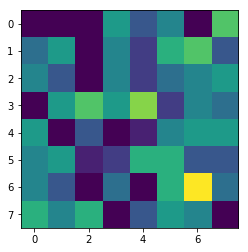

[[ 0.  0.  0.  8.  5.  7.  0.  3.]
 [ 4. 11.  0.  5.  3.  5.  1.  9.]
 [ 6.  4.  0.  1.  3.  6. 10.  6.]
 [ 0.  4.  6.  3.  7.  4.  6.  6.]
 [ 2.  0.  5.  0.  3.  3.  6.  0.]
 [ 4.  7.  8.  4.  3.  6.  1.  4.]
 [ 8.  8.  0.  7.  0.  5.  5.  7.]
 [ 5.  4.  4.  0.  3.  4.  7.  0.]]


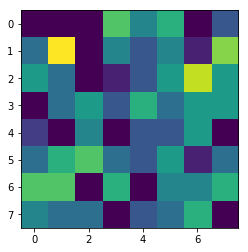

[[ 0.  0.  0.  4.  3.  4.  0.  8.]
 [ 2. 10.  0.  5.  4.  1.  2.  7.]
 [ 7.  6.  0.  4.  2.  4. 10.  6.]
 [ 0.  6.  5.  1.  6.  2.  4.  6.]
 [ 3.  0.  3.  0.  3.  3.  7.  6.]
 [ 6.  8.  8.  2.  5.  7.  1.  6.]
 [ 7.  7.  0.  4.  0.  9.  4.  8.]
 [ 7.  4.  5.  0.  4.  4.  5.  0.]]


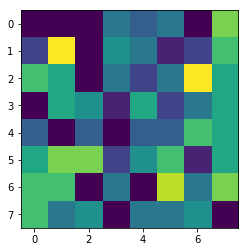

[[ 0.  0.  0.  4.  4.  6.  0.  5.]
 [ 1.  4.  0.  5.  2.  3.  3.  4.]
 [ 4.  5.  0.  5.  0.  4.  9.  9.]
 [ 0.  7. 11.  5.  8.  0.  2.  6.]
 [ 3.  0.  6.  0.  4.  2.  4. 11.]
 [ 7.  7.  5.  4.  3.  8.  1.  7.]
 [ 6.  3.  0.  6.  0.  9.  3.  2.]
 [ 6.  3.  7.  0.  2. 12.  4.  0.]]


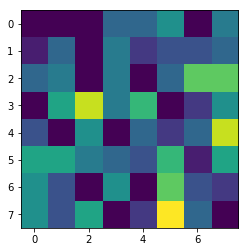

[[ 0.  0.  0.  5.  1.  6.  0.  0.]
 [ 3.  6.  0.  6.  5.  3.  3.  1.]
 [ 5.  2.  0.  7.  5.  8.  4.  4.]
 [ 0.  3. 11.  2.  4.  3.  8.  2.]
 [ 3.  0. 11.  0.  6.  6.  3.  9.]
 [ 5.  6.  7.  5.  1.  3.  5.  6.]
 [ 8.  1.  0.  7.  0.  4.  7.  6.]
 [ 4.  0. 10.  0.  3. 18.  4.  0.]]


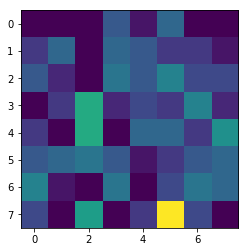

[[ 0.  0.  0.  3.  6.  5.  0.  4.]
 [ 3.  2.  0.  4.  1.  7.  2.  2.]
 [ 7.  2.  0.  4.  4.  7.  5.  9.]
 [ 0. 11.  7.  7.  6.  6.  5. 12.]
 [ 7.  0.  6.  0.  5.  8.  4.  3.]
 [ 3.  6.  4.  7.  5.  3.  3.  5.]
 [ 6.  5.  0.  5.  0.  3.  8.  0.]
 [ 2.  5.  3.  0.  5.  8.  6.  0.]]


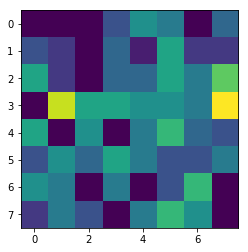

[[ 0.  0.  0.  6.  0.  5.  0.  7.]
 [ 2.  5.  0.  4.  3.  3.  1.  7.]
 [ 0.  7.  0.  7.  2.  6. 12. 10.]
 [ 0.  7.  9.  7.  5.  2.  6.  2.]
 [ 2.  0.  9.  0.  5.  3.  1.  7.]
 [11.  7.  1.  0.  5.  6.  3.  6.]
 [ 5.  2.  0.  4.  0.  7.  5.  6.]
 [ 2.  7.  9.  0.  2. 10.  4.  0.]]


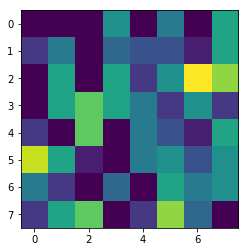

[[ 0.  0.  0.  2.  5.  3.  0.  3.]
 [ 2.  3.  0.  6.  1.  5.  4.  3.]
 [ 6.  2.  0.  7.  2.  2.  7.  6.]
 [ 0. 11.  7.  6.  8.  2.  5. 14.]
 [ 7.  0.  3.  0.  3.  7.  6.  7.]
 [ 8.  2.  5.  7.  4.  5.  3.  8.]
 [ 6.  3.  0.  2.  0.  8.  5.  2.]
 [ 4.  7.  5.  0.  2. 10.  6.  0.]]


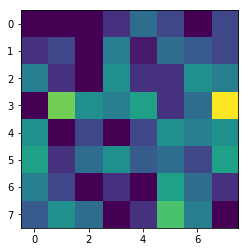

[[ 0.  0.  0.  5.  9.  3.  0.  4.]
 [ 4.  4.  0.  3.  2.  4. 12.  4.]
 [ 9.  4.  0.  9.  1.  5.  2.  0.]
 [ 0.  1.  2.  3.  9.  6.  2.  6.]
 [ 1.  0.  8.  0.  3.  1.  5.  4.]
 [ 7.  7.  9.  2.  7.  4.  3.  3.]
 [ 9.  4.  0.  3.  0.  4.  2.  4.]
 [ 1. 13.  4.  0. 11.  9. 11.  0.]]


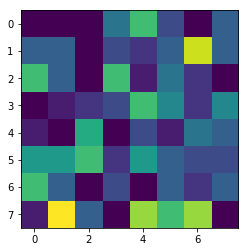

[[ 0.  0.  0.  3.  5.  2.  0.  4.]
 [ 2.  2.  0.  5.  2.  6.  4.  4.]
 [ 5.  2.  0.  6.  2.  2.  6.  7.]
 [ 0. 12.  7.  8. 11.  3.  4. 12.]
 [ 7.  0.  4.  0.  5.  6.  5.  8.]
 [ 9.  1.  2.  8.  4.  6.  3.  8.]
 [ 5.  4.  0.  5.  0.  9.  3.  0.]
 [ 2.  5.  2.  0.  4.  7.  7.  0.]]


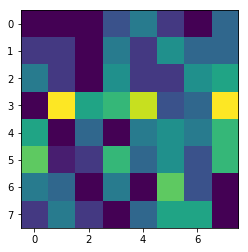

[[ 0.  0.  0.  3.  6.  3.  0.  5.]
 [ 3.  1.  0.  4.  4.  3.  7.  3.]
 [12.  4.  0.  8.  4.  4.  2.  0.]
 [ 0.  6.  1.  3.  8.  3.  8. 12.]
 [ 0.  0.  9.  0.  2.  7.  6.  7.]
 [ 6.  3. 10.  5.  1.  1.  2.  7.]
 [11.  2.  0.  3.  0.  1.  3.  8.]
 [ 6.  5. 11.  0.  5.  9.  9.  0.]]


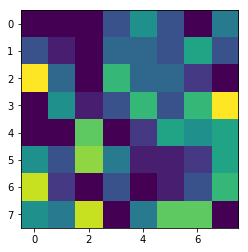

[[ 0.  0.  0.  6.  2.  1.  0. 11.]
 [ 1.  5.  0.  4.  5.  3.  5.  6.]
 [ 5.  6.  0.  9.  1.  4. 10.  6.]
 [ 0.  5.  9.  4. 10.  0.  5.  1.]
 [ 4.  0.  5.  0.  4.  2.  8. 11.]
 [ 9.  9.  2.  1.  7.  6.  2.  4.]
 [ 3.  3.  0.  1.  0.  9.  7.  4.]
 [ 4.  3.  8.  0.  3.  7.  2.  0.]]


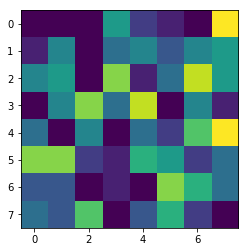

[[ 0.  0.  0.  3. 12.  6.  0.  3.]
 [ 7.  5.  0.  4.  4.  3.  7.  3.]
 [ 8.  0.  0.  0.  1.  6.  1.  5.]
 [ 0.  4.  6.  7.  8.  6.  2. 13.]
 [ 2.  0.  9.  0.  3.  3.  5.  4.]
 [ 3.  9.  7.  4.  2.  4.  2.  6.]
 [ 8.  7.  0.  9.  0.  2.  1.  1.]
 [ 5.  3.  3.  0. 10.  6. 11.  0.]]


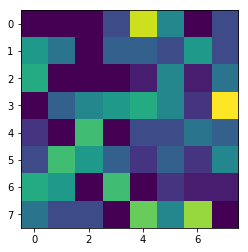

[[ 0.  0.  0.  5.  3.  5.  0.  7.]
 [ 3.  9.  0.  3.  3.  2.  3.  6.]
 [ 6.  5.  0.  4.  3.  4. 11.  5.]
 [ 0.  5.  5.  2.  5.  3.  7.  3.]
 [ 3.  0.  2.  0.  2.  4.  8.  5.]
 [ 4.  8. 10.  1.  5.  7.  1.  5.]
 [ 8.  6.  0.  5.  0.  6.  6.  9.]
 [ 9.  8.  7.  0.  2.  4.  5.  0.]]


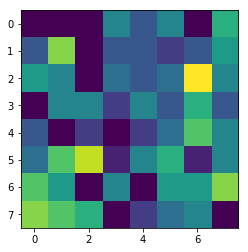

[[ 0.  0.  0.  6.  7.  4.  0.  8.]
 [ 4.  3.  0.  2.  4.  7.  8.  4.]
 [ 6.  7.  0.  4.  2.  5.  5.  6.]
 [ 0.  6.  8.  9. 13.  3.  7.  5.]
 [ 0.  0.  7.  0.  3.  0.  4.  6.]
 [ 7.  2.  4.  2.  7.  5.  2.  2.]
 [ 7.  5.  0.  4.  0.  6.  3.  5.]
 [ 6.  6.  4.  0.  9.  2.  6.  0.]]


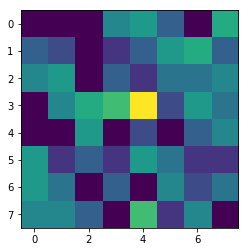

[[ 0.  0.  0.  7.  3.  2.  0.  9.]
 [ 3.  5.  0.  6.  3.  6.  7.  2.]
 [ 4.  2.  0.  7.  1.  4.  6.  5.]
 [ 0.  7.  8.  6. 13.  1.  2.  5.]
 [ 9.  0.  2.  0.  0.  6.  7.  9.]
 [ 6.  6.  0.  3.  6.  7.  3.  3.]
 [ 2.  1.  0.  4.  0.  8. 12.  2.]
 [ 8.  4.  9.  0.  1.  7.  5.  0.]]


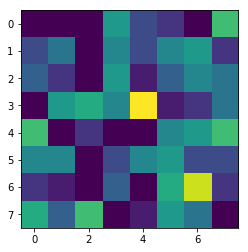

[[ 0.  0.  0.  6.  9.  3.  0.  8.]
 [ 5.  5.  0.  4.  3.  4.  6.  6.]
 [ 4.  5.  0.  4.  1.  3.  4.  5.]
 [ 0.  6.  6.  9.  9.  4.  3.  9.]
 [ 3.  0.  7.  0.  4.  0.  3.  5.]
 [ 8.  6.  5.  3.  8.  5.  3.  6.]
 [ 6.  7.  0.  4.  0.  6.  1.  2.]
 [ 1.  9.  0.  0. 10.  3.  8.  0.]]


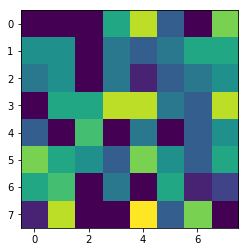

[[ 0.  0.  0.  6.  2.  6.  0.  2.]
 [ 3.  6.  0.  5.  5.  5.  3.  5.]
 [ 8.  1.  0.  7.  3.  9.  5.  2.]
 [ 0.  3.  6.  4.  7.  4. 11.  1.]
 [ 2.  0. 10.  0.  5.  5.  3.  4.]
 [ 7.  4.  4.  4.  3.  3.  4.  5.]
 [10.  2.  0.  8.  0.  2.  7.  8.]
 [ 1.  2.  8.  0.  4. 13.  8.  0.]]


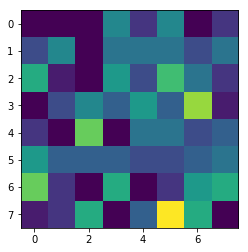

[[ 0.  0.  0.  2.  4.  7.  0.  5.]
 [ 1.  4.  0.  2.  2.  1.  3.  6.]
 [ 5.  5.  0.  4.  3.  5.  8.  6.]
 [ 0.  9.  7.  5.  1.  2.  6.  7.]
 [ 2.  0.  9.  0.  6.  3.  1.  8.]
 [ 5.  7.  7.  2.  3.  7.  2.  9.]
 [10.  4.  0.  7.  0.  6.  2.  4.]
 [ 4.  8.  5.  0.  4. 11.  7.  0.]]


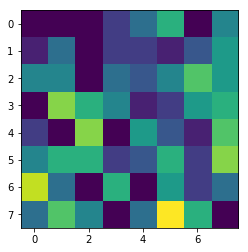

[[ 0.  0.  0.  4.  5.  5.  0.  3.]
 [ 1.  1.  0.  1.  4.  2.  6.  4.]
 [ 5.  7.  0.  7.  3.  5.  6.  3.]
 [ 0.  5.  7.  6.  9.  2.  3.  5.]
 [ 3.  0.  7.  0.  4.  5.  2. 12.]
 [ 4.  2.  7.  6.  3.  7.  1.  7.]
 [ 8.  5.  0.  6.  0.  8.  5.  5.]
 [ 6.  9.  2.  0.  4.  7.  9.  0.]]


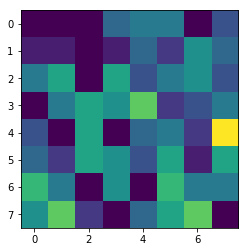

[[ 0.  0.  0.  4.  2.  5.  0.  8.]
 [ 4.  3.  0.  2.  2.  4.  5.  8.]
 [ 5.  5.  0.  4.  3.  1. 12.  5.]
 [ 0.  4.  9.  2.  7.  1.  8.  1.]
 [ 5.  0.  5.  0.  6.  5.  8.  6.]
 [ 7.  8.  5.  1.  4.  8.  0.  6.]
 [ 6.  4.  0.  8.  0.  7.  9.  5.]
 [ 4.  8.  7.  0.  0.  3.  5.  0.]]


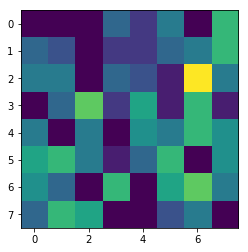

[[ 0.  0.  0.  6.  2.  4.  0.  8.]
 [ 3.  8.  0.  4.  3.  3.  2.  6.]
 [ 5.  7.  0.  3.  1.  4.  9. 10.]
 [ 0.  5.  6.  6.  8.  2.  5.  5.]
 [ 2.  0.  7.  0.  2.  5.  7.  3.]
 [ 9.  8.  3.  3.  4.  6.  1.  6.]
 [ 7.  6.  0.  8.  0.  5.  4.  8.]
 [ 5.  2.  8.  0.  3.  5.  5.  0.]]


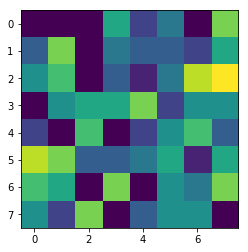

[[ 0.  0.  0.  6.  5.  3.  0.  6.]
 [ 3.  2.  0.  2.  6.  2.  3.  9.]
 [ 4.  7.  0.  7.  3.  2.  9.  1.]
 [ 0.  7.  4.  7.  5.  2.  9.  4.]
 [ 5.  0.  7.  0.  8.  2.  4. 10.]
 [ 4.  5.  7.  2.  4.  4.  3.  9.]
 [ 6.  4.  0.  9.  0.  7.  4.  3.]
 [ 3. 10.  5.  0.  2.  7.  7.  0.]]


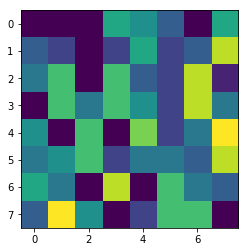

[[0. 0. 0. 6. 6. 4. 0. 7.]
 [4. 3. 0. 2. 3. 6. 7. 6.]
 [6. 6. 0. 3. 3. 2. 5. 5.]
 [0. 5. 8. 9. 9. 3. 6. 4.]
 [4. 0. 6. 0. 5. 4. 6. 5.]
 [5. 4. 3. 4. 7. 6. 2. 4.]
 [6. 7. 0. 8. 0. 8. 5. 2.]
 [3. 6. 0. 0. 7. 2. 6. 0.]]


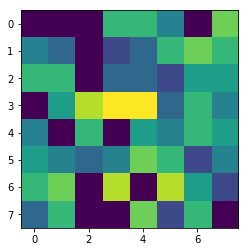

[[ 0.  0.  0.  3.  7.  4.  0.  5.]
 [ 2.  4.  0.  6.  4.  3.  3.  3.]
 [ 7.  3.  0.  4.  3.  4.  6.  8.]
 [ 0.  8.  6.  5.  8.  1.  2. 12.]
 [ 6.  0.  7.  0.  2.  7.  6.  7.]
 [ 5.  6.  4.  8.  1.  5.  1.  9.]
 [ 6.  5.  0.  5.  0.  5.  5.  2.]
 [ 4.  3.  5.  0.  2.  8.  9.  0.]]


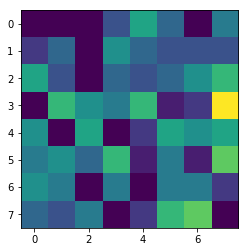

[[ 0.  0.  0.  3.  4.  2.  0.  8.]
 [ 1.  5.  0.  3.  3.  3.  9.  3.]
 [ 8.  8.  0.  9.  1.  5.  5.  3.]
 [ 0.  7.  4.  3. 10.  0.  2.  8.]
 [ 4.  0.  5.  0.  1.  8.  3. 11.]
 [ 6.  3.  3.  3.  5.  6.  2.  2.]
 [ 6.  3.  0.  0.  0. 12. 10.  7.]
 [ 8.  9.  7.  0.  4.  6.  5.  0.]]


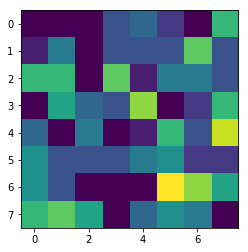

[[ 0.  0.  0.  3.  3.  4.  0.  5.]
 [ 3.  2.  0.  1.  3.  5.  9.  5.]
 [ 7.  6.  0.  8.  3.  2.  5.  2.]
 [ 0.  6.  8.  7.  8.  2. 11.  3.]
 [ 1.  0.  7.  0.  5.  5.  5.  8.]
 [ 6.  0.  5.  3.  6.  5.  3.  5.]
 [ 9.  4.  0.  5.  0.  8.  6.  7.]
 [ 5.  7.  3.  0.  7.  6.  5.  0.]]


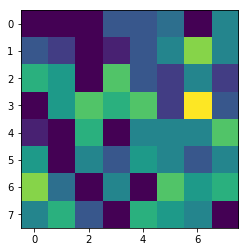

[[ 0.  0.  0.  5.  4.  6.  0.  5.]
 [ 5.  6.  0.  3.  4.  3.  3.  4.]
 [ 2.  2.  0.  2.  2.  6.  4.  6.]
 [ 0.  6.  6. 10.  5.  4.  6.  6.]
 [ 2.  0.  5.  0.  1.  3.  3.  7.]
 [ 6.  3.  7.  4.  3.  7.  2.  9.]
 [ 9.  7.  0.  8.  0.  3.  2.  9.]
 [ 9.  5.  4.  0.  6.  6.  8.  0.]]


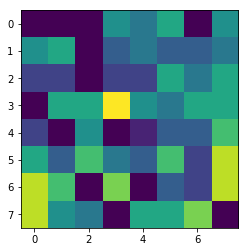

[[ 0.  0.  0.  4.  3.  3.  0.  7.]
 [ 3. 11.  0.  5.  5.  1.  2.  6.]
 [10.  6.  0.  2.  3.  7.  8.  4.]
 [ 0.  6.  2.  2.  7.  3.  6.  7.]
 [ 2.  0.  4.  0.  3.  6.  8.  4.]
 [ 4.  6.  9.  3.  2.  4.  1.  4.]
 [ 8.  7.  0.  7.  0.  5.  4. 11.]
 [ 9.  3.  6.  0.  5.  2.  6.  0.]]


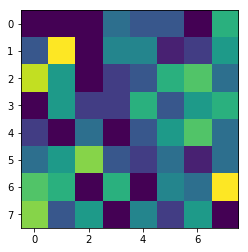

[[ 0.  0.  0.  7.  2.  3.  0.  9.]
 [ 2.  9.  0.  7.  3.  4.  4.  3.]
 [ 5.  6.  0.  7.  2.  7.  4.  5.]
 [ 0.  9.  4.  6.  5.  2.  2.  7.]
 [10.  0.  2.  0.  1.  6.  3.  8.]
 [ 2.  7.  1.  2.  7.  4.  7.  2.]
 [ 3.  2.  0.  3.  0. 10. 11.  5.]
 [10.  3.  7.  0.  3.  8.  2.  0.]]


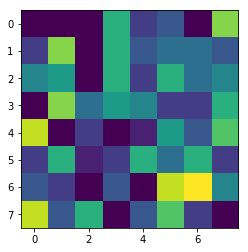

[[0. 0. 0. 4. 2. 7. 0. 3.]
 [2. 8. 0. 3. 1. 4. 2. 6.]
 [5. 6. 0. 3. 2. 6. 9. 6.]
 [0. 9. 6. 5. 2. 4. 6. 6.]
 [3. 0. 3. 0. 5. 4. 3. 6.]
 [2. 4. 9. 2. 4. 7. 3. 5.]
 [9. 6. 0. 8. 0. 8. 5. 8.]
 [9. 8. 4. 0. 3. 7. 5. 0.]]


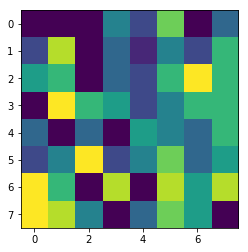

[[ 0.  0.  0.  5.  2.  2.  0. 11.]
 [ 0.  5.  0.  5.  5.  4.  1.  7.]
 [ 5.  5.  0.  9.  2.  6. 11.  6.]
 [ 0.  8.  8.  5. 11.  0.  7.  2.]
 [ 5.  0.  6.  0.  6.  3.  5. 11.]
 [ 9.  6.  0.  1.  6.  6.  2.  4.]
 [ 4.  3.  0.  3.  0.  9.  7.  3.]
 [ 2.  2.  7.  0.  2.  7.  3.  0.]]


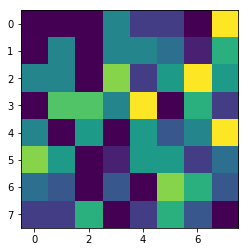

[[ 0.  0.  0.  3.  4.  3.  0.  4.]
 [ 3.  2.  0.  1.  1.  6.  5.  4.]
 [ 5.  5.  0.  8.  2.  5.  6.  6.]
 [ 0.  2. 10.  8. 10.  3.  5.  8.]
 [ 2.  0.  6.  0.  4.  6.  8.  7.]
 [ 8.  2.  8.  5.  4.  5.  1.  5.]
 [ 5. 10.  0.  3.  0.  7.  5.  5.]
 [ 5.  6.  4.  0.  7.  5.  4.  0.]]


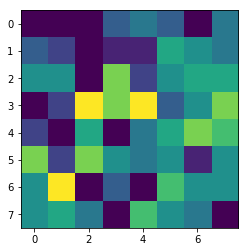

[[ 0.  0.  0.  4.  3.  3.  0.  9.]
 [ 2.  9.  0.  5.  5.  2.  5.  4.]
 [ 9.  7.  0.  7.  1.  7.  4.  3.]
 [ 0.  8.  3.  5.  4.  1.  7.  5.]
 [ 3.  0.  4.  0.  5.  3.  5. 10.]
 [ 4.  5.  6.  1.  6.  4.  5.  3.]
 [ 7.  5.  0.  4.  0. 10.  4.  8.]
 [ 8.  3.  3.  0.  8.  8.  2.  0.]]


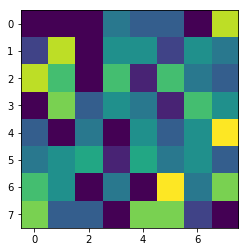

[[ 0.  0.  0.  4.  8.  3.  0.  8.]
 [ 3.  4.  0.  5.  3.  4.  7.  4.]
 [ 9.  2.  0.  6.  2.  6.  5.  3.]
 [ 0.  8.  5.  2.  9.  3.  2.  9.]
 [ 7.  0.  5.  0.  4.  6.  4.  7.]
 [ 5.  7.  4.  5.  4.  6.  2.  4.]
 [ 5.  4.  0.  4.  0.  6. 10.  0.]
 [ 3.  7.  3.  0.  4.  5.  8.  0.]]


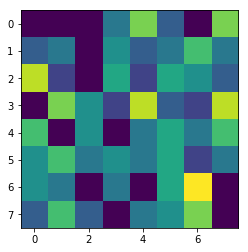

[[ 0.  0.  0.  4.  3.  5.  0.  5.]
 [ 2. 10.  0.  5.  4.  2.  1.  7.]
 [ 8.  6.  0.  3.  1.  7.  7.  5.]
 [ 0.  7.  3.  6.  5.  2.  5.  8.]
 [ 2.  0.  6.  0.  4.  5.  4.  6.]
 [ 5.  4.  6.  2.  3.  6.  1.  6.]
 [10.  7.  0.  8.  0.  8.  2.  9.]
 [ 5.  3.  4.  0.  5.  7.  7.  0.]]


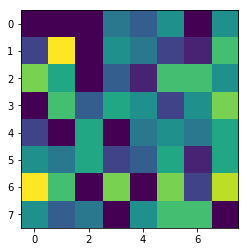

[[ 0.  0.  0.  5.  2.  4.  0.  6.]
 [ 4. 13.  0.  5.  3.  0.  2.  8.]
 [ 7.  7.  0.  1.  3.  6. 10.  7.]
 [ 0.  5.  4.  0.  3.  4.  4.  6.]
 [ 3.  0.  5.  0.  5.  4.  5.  1.]
 [ 6. 10.  8.  2.  3.  5.  2.  4.]
 [ 7.  5.  0.  8.  0.  7.  5. 10.]
 [ 7.  5.  7.  0.  4.  3.  4.  0.]]


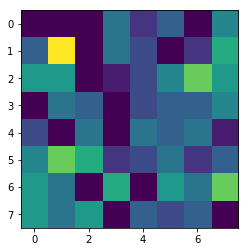

[[ 0.  0.  0.  2.  5.  1.  0.  8.]
 [ 2.  4.  0.  6.  3.  0.  2.  4.]
 [ 5.  3.  0.  8.  4.  3.  6.  5.]
 [ 0.  6.  5.  3.  5.  0.  1. 12.]
 [ 7.  0.  8.  0.  3.  5.  5. 10.]
 [10.  7.  7.  8.  1.  6.  1. 14.]
 [ 5.  6.  0.  1.  0.  5.  4.  5.]
 [ 3.  7.  5.  0.  3.  9.  9.  0.]]


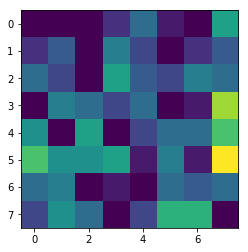

[[ 0.  0.  0.  3.  6.  3.  0.  6.]
 [ 3.  2.  0.  2.  0.  6.  8.  6.]
 [ 7.  6.  0.  7.  1.  4.  6.  4.]
 [ 0.  5.  7.  4.  8.  1.  2.  9.]
 [ 7.  0.  5.  0.  4.  8.  5.  6.]
 [ 6.  6.  4.  4.  5.  6.  1.  4.]
 [ 4.  6.  0.  4.  0.  9. 11.  2.]
 [ 4. 11.  5.  0.  3.  5.  6.  0.]]


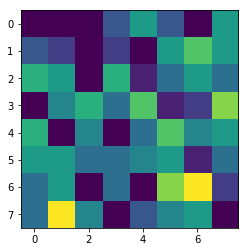

[[ 0.  0.  0.  1.  4.  2.  0.  7.]
 [ 2.  4.  0.  5.  2.  2.  5.  2.]
 [14.  6.  0.  6.  1.  4.  3.  6.]
 [ 0.  9.  2.  2.  9.  3.  3. 10.]
 [ 2.  0.  9.  0.  5.  7.  7.  5.]
 [ 9.  6.  4.  6.  3.  3.  3.  7.]
 [10.  2.  0.  7.  0.  6.  1.  6.]
 [ 3.  2.  5.  0.  8. 11.  7.  0.]]


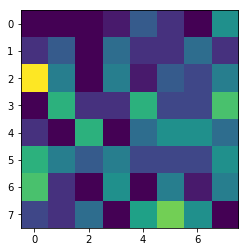

[[0. 0. 0. 4. 4. 5. 0. 6.]
 [1. 4. 0. 5. 1. 7. 5. 2.]
 [8. 2. 0. 6. 3. 7. 6. 6.]
 [0. 9. 7. 4. 8. 3. 5. 8.]
 [6. 0. 3. 0. 2. 6. 6. 6.]
 [4. 6. 4. 6. 6. 6. 2. 4.]
 [7. 4. 0. 2. 0. 6. 9. 2.]
 [4. 5. 4. 0. 3. 9. 7. 0.]]


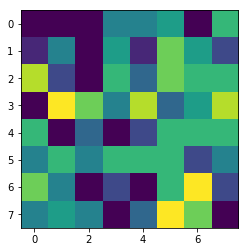

[[ 0.  0.  0.  5.  8.  6.  0.  4.]
 [ 4.  5.  0.  3.  3.  5.  4.  3.]
 [ 9.  5.  0.  2.  5.  7.  4.  7.]
 [ 0.  5.  6.  5.  7.  5.  5. 11.]
 [ 1.  0.  9.  0.  3.  5.  5.  2.]
 [ 2.  6.  8.  7.  2.  3.  2.  5.]
 [ 8.  7.  0.  5.  0.  1.  4.  5.]
 [ 5.  3.  4.  0.  6.  6.  9.  0.]]


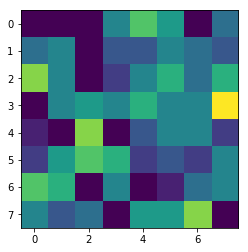

[[ 0.  0.  0.  6.  5.  6.  0.  2.]
 [ 6.  8.  0.  1. 12.  2.  7.  4.]
 [ 2.  7.  0.  1. 11.  3.  6.  3.]
 [ 0.  5. 11.  5.  8.  1. 13.  2.]
 [ 1.  0.  8.  0.  6.  4.  1. 12.]
 [ 0.  0.  7.  4.  3.  6.  2.  5.]
 [ 8.  2.  0.  4.  0. 10.  4.  6.]
 [ 7.  1.  1.  0.  6.  3.  6.  0.]]


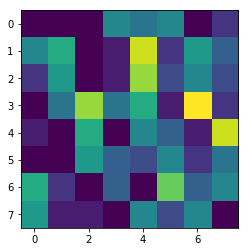

[[ 0.  0.  0.  3.  5.  4.  0.  7.]
 [ 3.  6.  0.  4.  3.  3.  5.  5.]
 [13.  6.  0.  3.  2.  5.  4.  6.]
 [ 0.  9.  1.  3.  6.  3.  6. 10.]
 [ 2.  0.  7.  0.  4.  7.  6.  3.]
 [ 5.  6.  6.  5.  2.  3.  2.  5.]
 [10.  4.  0.  7.  0.  4.  5.  8.]
 [ 6.  4.  5.  0.  6.  5.  7.  0.]]


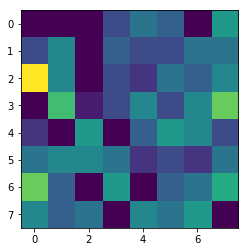

[[ 0.  0.  0.  2.  7.  3.  0.  7.]
 [ 5.  2.  0.  1.  2.  3. 10.  4.]
 [ 6.  7.  0.  4.  2.  1.  3.  5.]
 [ 0.  4.  7.  8.  9.  2.  0.  7.]
 [ 3.  0.  8.  0.  4.  4.  5.  8.]
 [ 7.  5.  5.  3.  5.  7.  1.  6.]
 [ 7.  8.  0.  8.  0.  9.  3.  4.]
 [ 5.  9.  1.  0.  9.  2.  9.  0.]]


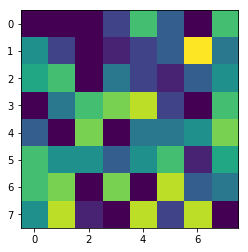

[[ 0.  0.  0.  5.  6.  5.  0.  6.]
 [ 5.  2.  0.  5.  6.  4.  5.  3.]
 [ 9.  1.  0.  3.  4.  2.  2.  3.]
 [ 0. 10.  6.  8.  8.  4. 11.  9.]
 [ 3.  0.  7.  0.  4.  2.  5.  9.]
 [ 5.  2.  5.  5.  2.  3.  4.  9.]
 [10.  1.  0.  7.  0.  1.  2.  4.]
 [ 5.  0.  8.  0.  5.  8.  8.  0.]]


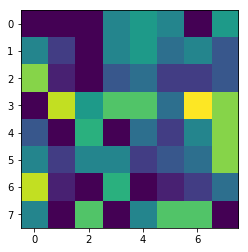

[[ 0.  0.  0.  2.  3.  1.  0.  6.]
 [ 2.  4.  0.  5.  0.  4.  2.  6.]
 [ 5.  4.  0. 10.  2.  2.  7.  5.]
 [ 0.  9.  6.  6.  5.  1.  3. 13.]
 [ 8.  0.  5.  0.  4.  5.  6.  8.]
 [10.  5.  5.  5.  5.  6.  2. 10.]
 [ 5.  5.  0.  0.  0.  9.  4.  3.]
 [ 1.  8.  6.  0.  3. 10.  5.  0.]]


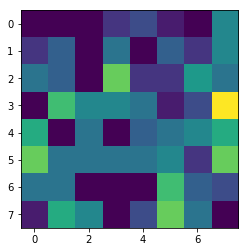

[[ 0.  0.  0.  6.  3.  7.  0.  1.]
 [ 4.  6.  0.  6.  3.  4.  0.  4.]
 [ 1.  1.  0.  2.  0.  5.  8.  8.]
 [ 0.  9. 11.  7.  3.  4.  5.  8.]
 [ 5.  0.  5.  0.  6.  2.  2.  9.]
 [ 4.  5.  8.  4.  1.  5.  5.  8.]
 [ 6.  1.  0. 13.  0.  6.  3.  2.]
 [ 9.  3. 10.  0.  0. 14.  3.  0.]]


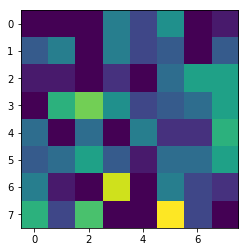

[[ 0.  0.  0.  3.  1.  5.  0.  5.]
 [ 2.  7.  0.  3.  0.  4.  5.  3.]
 [ 9.  6.  0.  8.  2.  8.  1.  4.]
 [ 0.  7.  4.  6.  2.  5.  6.  3.]
 [ 3.  0.  7.  0.  7.  6.  3.  4.]
 [ 4.  6.  6.  2.  7.  4.  6.  4.]
 [10.  4.  0.  8.  0.  6.  5.  8.]
 [ 4.  6.  1.  0.  9. 11.  4.  0.]]


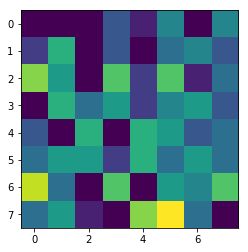

[[ 0.  0.  0.  7.  3.  5.  0.  8.]
 [ 2.  6.  0.  4.  3.  6.  7.  3.]
 [ 4.  4.  0.  8.  1.  6.  6.  4.]
 [ 0.  4.  9.  7.  9.  2.  6.  1.]
 [ 4.  0.  2.  0.  1.  1.  6. 10.]
 [ 5.  6.  5.  0.  8.  7.  3.  2.]
 [ 5.  4.  0.  3.  0.  7.  8.  5.]
 [ 8.  6.  7.  0.  4.  9.  3.  0.]]


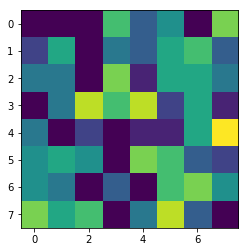

[[ 0.  0.  0.  4.  6.  3.  0.  4.]
 [ 8.  1.  0.  1.  8.  3. 15.  0.]
 [ 4.  4.  0.  4.  3.  3.  2.  1.]
 [ 0.  3.  7.  8. 10.  1. 10.  3.]
 [ 1.  0.  8.  0.  2.  7.  4. 12.]
 [ 5.  1.  4.  2.  1.  4.  3.  4.]
 [ 6.  1.  0.  7.  0.  4.  8.  8.]
 [11.  8.  8.  0.  7.  5.  8.  0.]]


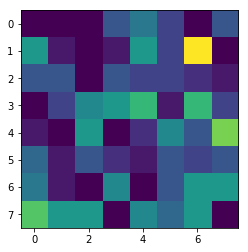

[[ 0.  0.  0.  6.  7.  7.  0.  4.]
 [ 6.  4.  0.  2.  3.  6.  8.  6.]
 [ 7.  2.  0.  3.  3.  8.  6.  4.]
 [ 0.  6.  9.  4. 10.  6.  8.  3.]
 [ 2.  0.  7.  0.  4.  3.  1.  3.]
 [ 6.  4.  3.  2.  4.  5.  2.  1.]
 [ 9.  2.  0.  8.  0.  4.  9.  4.]
 [ 3.  8.  4.  0.  7.  3.  8.  0.]]


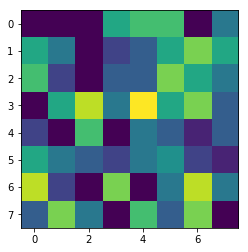

[[ 0.  0.  0.  6.  8.  4.  0.  4.]
 [ 5.  2.  0.  0.  4.  7. 11.  5.]
 [ 6.  7.  0.  6.  1.  4.  4.  1.]
 [ 0.  4.  8.  7. 10.  3.  6.  4.]
 [ 2.  0.  5.  0.  5.  2.  4.  9.]
 [ 2.  3.  9.  2.  6.  4.  3.  0.]
 [ 6.  5.  0.  6.  0.  9.  6.  3.]
 [ 8. 10.  4.  0.  7.  4.  4.  0.]]


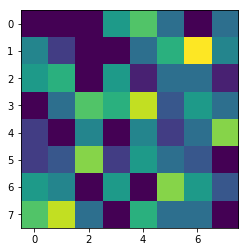

[[ 0.  0.  0.  5.  8.  5.  0.  8.]
 [ 6.  4.  0.  2.  4.  5. 10.  6.]
 [ 6.  4.  0.  2.  2.  3.  4.  4.]
 [ 0.  6.  9.  7. 11.  3.  7.  5.]
 [ 0.  0.  8.  0.  3.  0.  2.  6.]
 [ 8.  3.  2.  1.  6.  6.  1.  4.]
 [ 9.  4.  0.  6.  0.  6.  4.  4.]
 [ 4.  7.  3.  0.  9.  2.  9.  0.]]


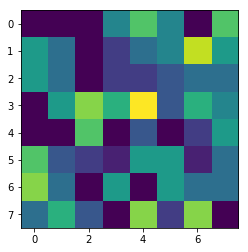

[[ 0.  0.  0.  6.  5.  1.  0.  7.]
 [ 3.  4.  0.  3.  1.  4.  6.  5.]
 [ 6.  5.  0.  9.  3.  0.  5.  2.]
 [ 0.  3.  6.  4.  5.  3.  2.  7.]
 [ 7.  0.  5.  0.  5.  3.  8.  4.]
 [ 7.  9.  9.  6.  8.  5.  2.  8.]
 [ 5.  7.  0.  2.  0.  6.  5.  2.]
 [ 1. 12.  1.  0.  6.  7.  7.  0.]]


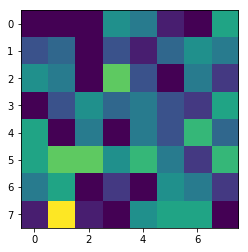

[[ 0.  0.  0.  2.  4.  7.  0.  3.]
 [ 2.  8.  0.  4.  0.  3.  2.  6.]
 [ 6.  6.  0.  3.  1.  6.  6.  8.]
 [ 0. 10.  8.  6.  1.  4.  4. 12.]
 [ 1.  0.  8.  0.  8.  3.  1.  5.]
 [ 5.  6.  7.  2.  4.  5.  4.  6.]
 [ 9.  5.  0.  8.  0.  9.  1.  4.]
 [ 4.  6.  3.  0.  7. 11.  3.  0.]]


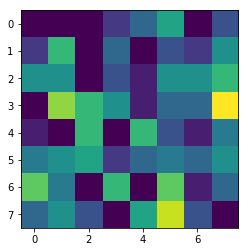

[[0. 0. 0. 3. 7. 4. 0. 7.]
 [4. 2. 0. 2. 3. 3. 7. 3.]
 [6. 4. 0. 5. 2. 5. 5. 5.]
 [0. 3. 7. 6. 9. 2. 3. 7.]
 [2. 0. 8. 0. 3. 3. 6. 8.]
 [7. 6. 7. 4. 2. 6. 1. 7.]
 [6. 9. 0. 6. 0. 4. 4. 5.]
 [5. 6. 4. 0. 7. 5. 8. 0.]]


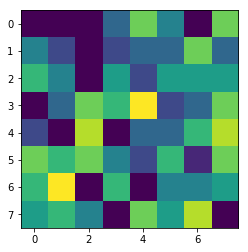

[[ 0.  0.  0.  4.  3.  7.  0.  2.]
 [ 4.  9.  0.  6.  0.  3.  1.  6.]
 [ 8.  4.  0.  0.  1.  5.  6.  9.]
 [ 0.  7.  6.  3.  6.  6.  5. 12.]
 [ 1.  0.  7.  0.  2.  5.  5.  0.]
 [ 9.  4.  7.  6.  2.  4.  1.  8.]
 [11.  5.  0.  8.  0.  5.  1.  8.]
 [ 5.  3.  7.  0.  5.  7.  7.  0.]]


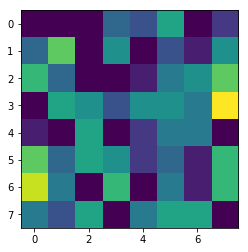

[[ 0.  0.  0.  4.  7.  6.  0.  5.]
 [ 2.  2.  0.  4.  2.  5.  3.  4.]
 [ 7.  4.  0.  4.  3.  5.  6.  8.]
 [ 0. 10.  6.  7.  6.  3.  5. 11.]
 [ 5.  0.  6.  0.  4.  6.  5.  5.]
 [ 3.  5.  5.  7.  4.  5.  2.  7.]
 [ 8.  5.  0.  6.  0.  4.  5.  2.]
 [ 4.  5.  4.  0.  4.  8.  8.  0.]]


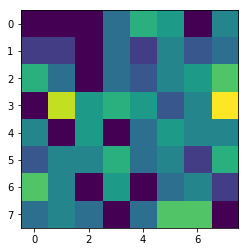

[[ 0.  0.  0.  6.  3.  6.  0.  8.]
 [ 1.  7.  0.  4.  2.  5.  6.  5.]
 [ 6.  6.  0.  6.  2.  7.  6.  6.]
 [ 0.  8.  6.  6.  5.  1.  5.  4.]
 [ 5.  0.  3.  0.  1.  6.  4.  7.]
 [ 2.  7.  2.  2.  6.  7.  3.  2.]
 [ 6.  3.  0.  5.  0.  8. 10.  6.]
 [ 8.  5.  6.  0.  2.  8.  4.  0.]]


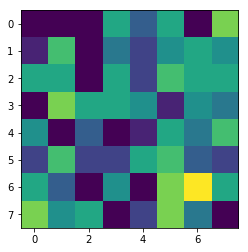

[[ 0.  0.  0.  7.  4.  2.  0.  9.]
 [ 1. 11.  0.  6.  5.  1.  5.  4.]
 [ 5.  6.  0.  7.  1.  4.  8.  4.]
 [ 0.  5.  6.  5.  8.  0.  3.  4.]
 [ 5.  0.  2.  0.  0.  2.  7. 11.]
 [ 5.  7.  6.  2.  7.  7.  3.  4.]
 [ 5.  4.  0.  1.  0. 10.  5.  8.]
 [ 9.  3.  6.  0.  4.  9.  3.  0.]]


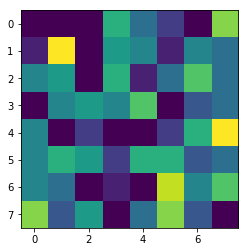

[[ 0.  0.  0.  8.  7.  1.  0. 10.]
 [ 2.  5.  0.  5.  2.  4.  6.  3.]
 [ 6.  5.  0.  7.  1.  5.  6.  6.]
 [ 0.  5.  3.  5. 10.  2.  0.  9.]
 [ 5.  0.  5.  0.  1.  3.  7.  5.]
 [ 7.  9.  5.  5.  6.  4.  3.  3.]
 [ 3.  4.  0.  2.  0.  5.  8.  3.]
 [ 6.  9.  7.  0.  5.  5.  6.  0.]]


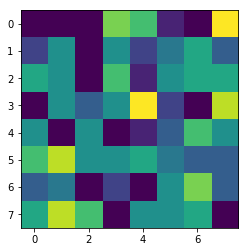

[[ 0.  0.  0.  3.  5.  3.  0.  6.]
 [ 5.  2.  0.  2.  7.  1. 10.  0.]
 [ 3.  4.  0.  6.  5.  7.  4.  2.]
 [ 0.  3.  4.  5.  7.  1.  5.  5.]
 [ 4.  0.  9.  0.  2.  9.  2. 12.]
 [ 6.  4.  5.  3.  0.  5.  2.  7.]
 [ 6.  3.  0.  5.  0.  2.  9.  9.]
 [ 9. 11.  7.  0.  5.  5. 10.  0.]]


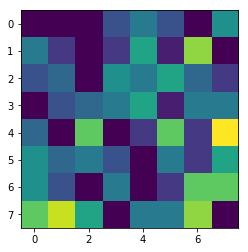

[[ 0.  0.  0.  6.  7.  4.  0.  9.]
 [ 4.  5.  0.  3.  3.  5.  8.  6.]
 [ 6.  4.  0.  3.  2.  4.  5.  5.]
 [ 0.  6.  8.  7. 10.  3.  6.  5.]
 [ 2.  0.  6.  0.  3.  0.  5.  5.]
 [ 8.  6.  4.  3.  7.  6.  2.  4.]
 [ 7.  5.  0.  4.  0.  5.  5.  4.]
 [ 3.  6.  3.  0.  8.  3.  7.  0.]]


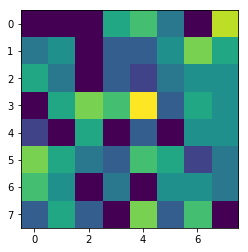

[[0. 0. 0. 5. 4. 4. 0. 9.]
 [2. 5. 0. 3. 5. 4. 7. 6.]
 [4. 7. 0. 6. 4. 4. 8. 4.]
 [0. 6. 7. 6. 7. 0. 8. 3.]
 [3. 0. 8. 0. 2. 3. 3. 9.]
 [7. 6. 1. 0. 6. 6. 2. 5.]
 [6. 2. 0. 1. 0. 8. 8. 6.]
 [3. 7. 7. 0. 4. 7. 6. 0.]]


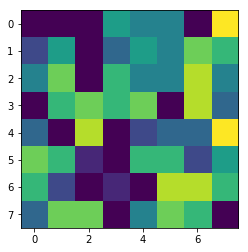

[[ 0.  0.  0.  4.  3.  6.  0.  6.]
 [ 2. 10.  0.  4.  1.  4.  3.  6.]
 [ 4.  6.  0.  4.  3.  5.  9.  8.]
 [ 0.  7.  9.  5.  3.  2.  5.  6.]
 [ 2.  0.  6.  0.  3.  1.  3.  6.]
 [ 7.  7.  5.  2.  7.  7.  3.  5.]
 [ 8.  5.  0.  3.  0.  9.  4.  6.]
 [ 4.  5.  4.  0.  5.  9.  4.  0.]]


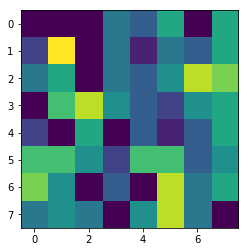

[[ 0.  0.  0.  5.  9.  5.  0.  4.]
 [ 3.  3.  0.  5.  5.  3.  3.  4.]
 [ 8.  4.  0.  2.  3.  6.  6.  7.]
 [ 0.  8.  4.  4.  7.  3.  2. 11.]
 [ 6.  0.  9.  0.  3.  7.  4.  5.]
 [ 2.  9.  4.  7.  2.  4.  1.  7.]
 [ 6.  4.  0.  7.  0.  3.  6.  1.]
 [ 3.  5.  6.  0.  2.  7. 10.  0.]]


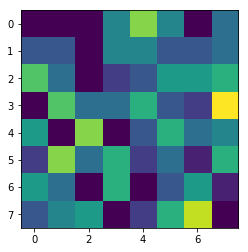

[[ 0.  0.  0.  3.  6.  3.  0.  8.]
 [ 3.  2.  0.  3.  3.  3.  5.  3.]
 [ 6.  5.  0.  5.  3.  6.  5.  7.]
 [ 0.  4.  6.  7.  9.  2.  2.  8.]
 [ 3.  0. 10.  0.  3.  5.  6.  6.]
 [ 7.  7.  4.  6.  3.  5.  1.  7.]
 [ 5.  8.  0.  6.  0.  3.  5.  4.]
 [ 3.  5.  4.  0.  7.  6.  8.  0.]]


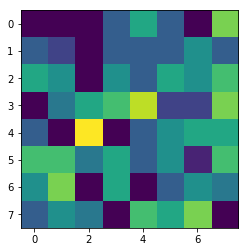

[[0. 0. 0. 6. 4. 5. 0. 5.]
 [2. 7. 0. 4. 3. 4. 6. 1.]
 [8. 5. 0. 4. 2. 7. 3. 5.]
 [0. 5. 4. 5. 9. 4. 2. 4.]
 [2. 0. 6. 0. 2. 5. 5. 5.]
 [3. 5. 5. 5. 5. 5. 3. 4.]
 [9. 5. 0. 8. 0. 5. 5. 8.]
 [7. 4. 3. 0. 7. 9. 8. 0.]]


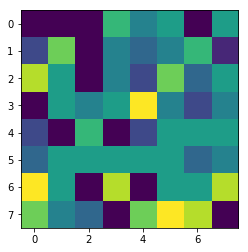

[[ 0.  0.  0.  3.  5.  3.  0.  6.]
 [ 4.  6.  0.  5.  3.  0.  5.  4.]
 [ 5.  2.  0.  7.  0.  4.  4.  1.]
 [ 0.  3.  5.  4.  1.  0.  4.  8.]
 [ 6.  0.  9.  0.  2.  5.  4.  8.]
 [ 9.  7.  8.  4.  2.  6.  1. 13.]
 [ 7.  5.  0.  4.  0.  3.  5.  9.]
 [ 4.  8.  7.  0.  4. 11.  9.  0.]]


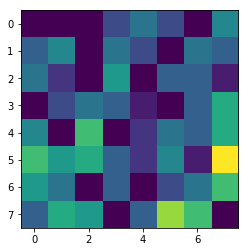

[[ 0.  0.  0.  2.  4.  8.  0.  2.]
 [ 5.  3.  0.  4.  1.  5.  3.  5.]
 [ 9.  0.  0.  2.  4.  6.  5.  5.]
 [ 0.  7.  9.  3.  3.  5. 10.  9.]
 [ 2.  0.  8.  0.  5.  6.  4.  4.]
 [ 5.  6.  8.  5.  0.  4.  2.  7.]
 [10.  2.  0.  9.  0.  1.  6.  5.]
 [ 5.  2. 10.  0.  3.  9.  7.  0.]]


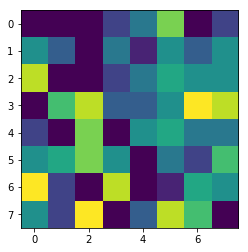

[[ 0.  0.  0.  5.  3.  4.  0.  4.]
 [ 1.  2.  0.  1.  3.  2.  0.  7.]
 [ 3.  8.  0.  8.  3.  6. 11.  4.]
 [ 0. 10.  5.  6.  6.  4.  9.  9.]
 [ 2.  0.  7.  0.  8.  3.  1.  7.]
 [ 7.  2.  9.  2.  3.  2.  3.  6.]
 [ 7.  3.  0.  6.  0.  7.  2.  6.]
 [ 5. 12.  8.  0.  3.  8.  3.  0.]]


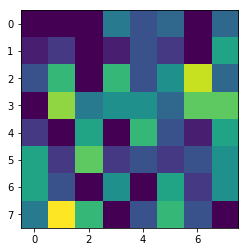

[[0. 0. 0. 5. 4. 6. 0. 6.]
 [3. 7. 0. 6. 2. 7. 4. 2.]
 [6. 3. 0. 2. 5. 6. 6. 9.]
 [0. 9. 7. 6. 8. 4. 6. 9.]
 [4. 0. 5. 0. 1. 6. 6. 2.]
 [5. 6. 1. 5. 7. 6. 3. 4.]
 [7. 4. 0. 2. 0. 5. 7. 3.]
 [3. 2. 3. 0. 5. 8. 6. 0.]]


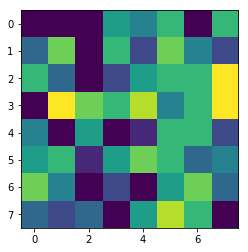

[[ 0.  0.  0.  4.  8.  4.  0.  4.]
 [ 3.  2.  0.  2.  5.  3.  9.  4.]
 [ 8.  3.  0.  7.  3.  4.  6.  0.]
 [ 0.  5.  6.  4.  9.  3.  6.  3.]
 [ 4.  0.  3.  0.  4.  3.  6. 10.]
 [ 3.  5. 10.  4.  5.  7.  1.  4.]
 [ 8.  5.  0.  5.  0.  6.  5.  4.]
 [ 7. 11.  2.  0.  5.  6.  9.  0.]]


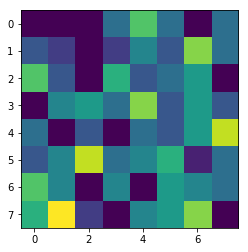

[[0. 0. 0. 3. 7. 5. 0. 6.]
 [4. 3. 0. 2. 3. 3. 7. 3.]
 [6. 4. 0. 4. 3. 6. 5. 5.]
 [0. 3. 8. 6. 9. 2. 3. 7.]
 [2. 0. 8. 0. 3. 3. 6. 8.]
 [5. 6. 8. 5. 3. 6. 0. 6.]
 [7. 9. 0. 6. 0. 5. 4. 4.]
 [5. 6. 3. 0. 7. 5. 8. 0.]]


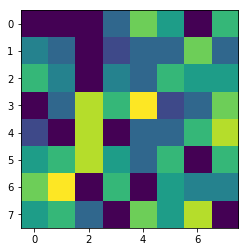

[[0. 0. 0. 6. 2. 6. 0. 5.]
 [3. 7. 0. 4. 1. 2. 2. 6.]
 [2. 6. 0. 3. 3. 3. 9. 8.]
 [0. 5. 5. 7. 5. 3. 5. 5.]
 [1. 0. 8. 0. 2. 2. 5. 4.]
 [8. 6. 6. 3. 4. 7. 2. 9.]
 [9. 6. 0. 8. 0. 5. 1. 8.]
 [4. 7. 6. 0. 4. 8. 8. 0.]]


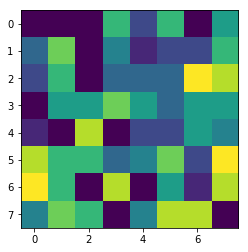

[[ 0.  0.  0.  4.  3.  6.  0.  5.]
 [ 5. 10.  0.  3.  2.  2.  4.  6.]
 [ 6.  3.  0.  2.  6.  5. 10.  4.]
 [ 0.  4.  4.  1.  5.  5.  8.  4.]
 [ 1.  0.  2.  0.  2.  4.  9.  1.]
 [ 4.  8. 12.  2.  4.  6.  1.  4.]
 [ 9.  7.  0.  5.  0.  3.  5. 11.]
 [ 9.  9.  7.  0.  4.  2.  7.  0.]]


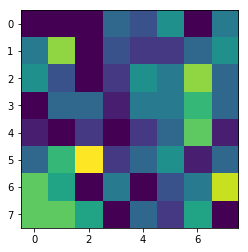

[[ 0.  0.  0.  7.  4.  7.  0.  2.]
 [ 2.  3.  0.  3.  3.  8.  1.  3.]
 [ 6.  5.  0.  5.  6. 10.  4.  6.]
 [ 0.  9.  7.  9.  5.  6.  7.  8.]
 [ 3.  0.  6.  0.  6.  6.  2.  5.]
 [ 0.  3.  8.  6.  5.  2.  4.  3.]
 [ 8.  5.  0.  6.  0.  4.  6.  4.]
 [ 4.  4.  3.  0.  4.  9.  5.  0.]]


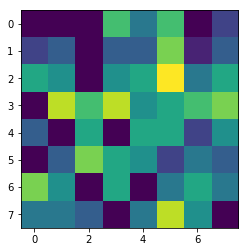

[[0. 0. 0. 6. 4. 5. 0. 5.]
 [1. 5. 0. 4. 2. 6. 5. 5.]
 [7. 5. 0. 5. 3. 6. 9. 6.]
 [0. 6. 6. 3. 9. 3. 5. 5.]
 [4. 0. 3. 0. 3. 6. 8. 4.]
 [3. 8. 6. 5. 6. 6. 1. 2.]
 [6. 5. 0. 4. 0. 6. 8. 4.]
 [5. 7. 5. 0. 2. 7. 6. 0.]]


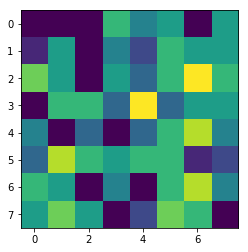

[[ 0.  0.  0.  5.  3.  3.  0.  6.]
 [ 4.  9.  0.  5.  2.  3.  3.  6.]
 [ 5.  5.  0.  5.  4.  4.  9.  6.]
 [ 0.  2.  7.  1.  9.  4.  3.  6.]
 [ 3.  0.  3.  0.  2.  2. 10.  4.]
 [ 8.  8. 12.  5.  5.  6.  1.  5.]
 [ 5.  9.  0.  2.  0.  6.  4.  7.]
 [ 7.  5.  6.  0.  4.  3.  5.  0.]]


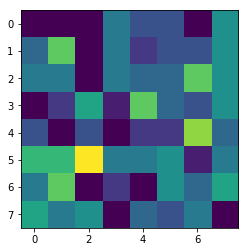

[[ 0.  0.  0.  3.  3.  5.  0.  3.]
 [ 3.  1.  0.  2.  1.  5.  4.  5.]
 [ 4.  4.  0.  7.  5.  3.  7.  6.]
 [ 0.  4. 10.  6.  7.  2.  8.  8.]
 [ 3.  0.  9.  0.  4.  5.  6.  6.]
 [10.  4.  6.  5.  3.  5.  1.  9.]
 [ 7.  6.  0.  4.  0.  5.  3.  4.]
 [ 1.  6.  8.  0.  3.  9.  7.  0.]]


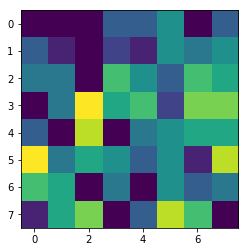

[[ 0.  0.  0.  7.  4.  6.  0.  4.]
 [ 5.  7.  0.  3.  2.  4.  4.  9.]
 [ 4.  5.  0.  2.  3.  5. 11.  8.]
 [ 0.  2.  9.  2.  7.  3.  6.  4.]
 [ 2.  0.  8.  0.  4.  4.  6.  1.]
 [ 7. 10.  6.  3.  2.  6.  1.  4.]
 [ 5.  6.  0.  9.  0.  5.  8.  6.]
 [ 5.  6.  9.  0.  2.  4.  5.  0.]]


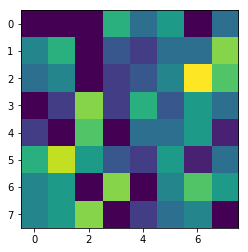

[[0. 0. 0. 6. 5. 6. 0. 8.]
 [3. 7. 0. 4. 4. 4. 1. 7.]
 [4. 4. 0. 1. 4. 5. 9. 6.]
 [0. 8. 5. 7. 5. 3. 8. 8.]
 [2. 0. 5. 0. 2. 1. 5. 5.]
 [5. 6. 7. 3. 4. 6. 1. 7.]
 [8. 8. 0. 6. 0. 4. 4. 7.]
 [6. 5. 5. 0. 4. 3. 7. 0.]]


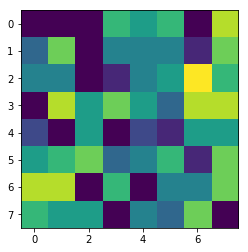

[[ 0.  0.  0.  4.  9.  7.  0.  1.]
 [ 5.  6.  0.  4.  4.  3.  4.  5.]
 [ 9.  1.  0.  2.  5.  9.  5.  4.]
 [ 0.  3.  8.  1.  5.  5.  5. 10.]
 [ 2.  0.  9.  0.  4.  4.  4.  5.]
 [ 2.  8. 11.  6.  0.  4.  2.  5.]
 [ 8.  6.  0.  6.  0.  1.  5.  4.]
 [ 5.  3.  6.  0.  5.  9.  8.  0.]]


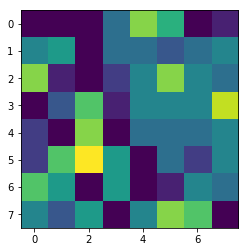

[[ 0.  0.  0.  4.  1.  4.  0.  6.]
 [ 2.  3.  0.  4.  2.  5.  5.  0.]
 [ 6.  6.  0.  7.  4.  5.  9.  9.]
 [ 0.  5. 11.  3. 13.  3.  4.  3.]
 [ 2.  0.  6.  0.  4.  7.  8.  6.]
 [10.  6.  3.  5.  5.  6.  1.  4.]
 [ 6.  3.  0.  3.  0.  7.  5.  4.]
 [ 3.  4.  7.  0.  4.  9.  4.  0.]]


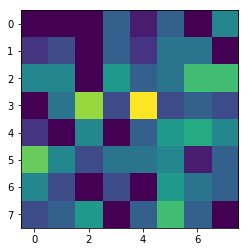

[[ 0.  0.  0.  3.  2.  3.  0.  5.]
 [ 2.  0.  0.  4.  1.  2.  6.  2.]
 [11.  6.  0.  8.  3.  3.  2.  4.]
 [ 0.  8.  1.  3. 10.  5.  4.  8.]
 [ 2.  0. 12.  0.  4.  8.  3.  3.]
 [10.  4.  2.  6.  2.  2.  3.  9.]
 [11.  0.  0.  9.  0.  2.  3.  7.]
 [ 0.  7.  9.  0.  5. 11. 11.  0.]]


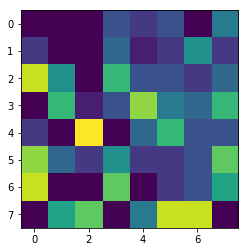

[[ 0.  0.  0.  5.  3.  6.  0.  0.]
 [ 5. 10.  0.  6.  1.  5.  1.  6.]
 [ 9.  2.  0.  1.  2.  7.  6.  5.]
 [ 0.  7.  4.  3.  8.  7.  8. 11.]
 [ 3.  0.  6.  0.  4.  8.  3.  0.]
 [ 7.  0.  6.  6.  2.  3.  3.  4.]
 [11.  3.  0.  9.  0.  5.  4.  9.]
 [ 4.  3.  5.  0.  5.  6.  8.  0.]]


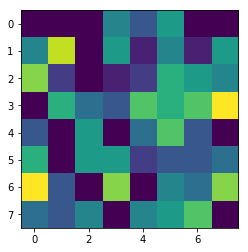

[[ 0.  0.  0.  4.  6.  3.  0.  3.]
 [ 2.  2.  0.  4.  3.  6.  2.  2.]
 [ 5.  3.  0.  6.  3.  5.  6.  8.]
 [ 0.  8.  6.  9. 11.  4.  3. 10.]
 [ 7.  0.  6.  0.  5.  7.  6.  6.]
 [ 5.  4.  3.  8.  5.  4.  3.  6.]
 [ 4.  7.  0.  7.  0.  6.  4.  0.]
 [ 2.  5.  1.  0.  5.  7.  7.  0.]]


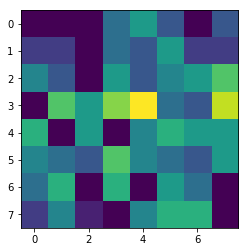

[[ 0.  0.  0.  4.  3.  2.  0.  5.]
 [ 2.  2.  0.  3.  1.  5.  2.  4.]
 [ 3.  5.  0.  9.  4.  4.  5.  7.]
 [ 0.  5.  6. 11.  7.  3.  1.  8.]
 [ 6.  0.  7.  0.  5.  5.  6.  8.]
 [ 7.  5.  5.  7.  6.  6.  3.  9.]
 [ 5. 10.  0.  5.  0.  7.  3.  2.]
 [ 1.  7.  1.  0.  6.  7.  7.  0.]]


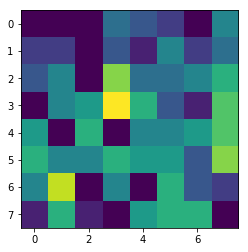

[[ 0.  0.  0.  6.  5.  5.  0.  6.]
 [ 4.  2.  0.  0.  4.  4.  6.  5.]
 [ 4.  9.  0.  4.  5.  2.  3.  6.]
 [ 0.  8. 10. 11. 10.  2.  9.  6.]
 [ 0.  0.  9.  0.  5.  1.  1.  9.]
 [ 5.  0.  4.  4.  5.  5.  3.  6.]
 [ 9.  5.  0.  5.  0.  9.  2.  6.]
 [ 5.  5.  0.  0.  8.  3.  6.  0.]]


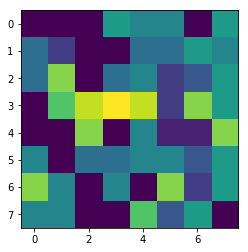

[[ 0.  0.  0.  2.  2.  3.  0.  6.]
 [ 4.  2.  0.  2.  0.  4.  2.  7.]
 [ 4.  5.  0.  8.  5.  4.  6.  5.]
 [ 0.  4.  9.  4.  3.  2.  9. 10.]
 [ 4.  0. 10.  0.  4.  6.  5.  5.]
 [11.  4.  7.  4.  2.  3.  2. 10.]
 [ 6.  6.  0.  1.  0.  3.  7.  7.]
 [ 2.  5. 11.  0.  3.  7.  4.  0.]]


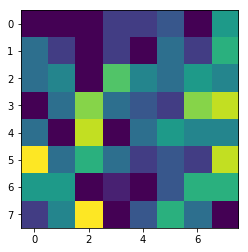

[[ 0.  0.  0.  3.  0.  4.  0.  6.]
 [ 3.  8.  0.  4.  1.  4.  5.  3.]
 [ 8.  7.  0.  9.  2.  9.  2.  3.]
 [ 0.  6.  5.  5.  1.  5.  6.  3.]
 [ 4.  0.  5.  0.  8.  6.  3.  7.]
 [ 4.  7.  6.  1.  7.  2.  8.  1.]
 [ 6.  4.  0.  7.  0.  9.  6.  7.]
 [ 6.  4.  3.  0.  9. 12.  0.  0.]]


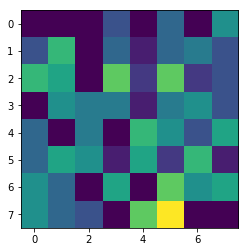

[[ 0.  0.  0.  6.  4.  4.  0.  8.]
 [ 2.  7.  0.  7.  2.  6.  6.  3.]
 [ 7.  2.  0.  7.  2.  5.  6.  4.]
 [ 0.  8.  6.  4.  9.  1.  3.  7.]
 [ 8.  0.  2.  0.  0.  6.  6.  8.]
 [ 4.  7.  3.  4.  6.  7.  3.  3.]
 [ 5.  2.  0.  3.  0.  8. 11.  2.]
 [ 7.  4.  7.  0.  1.  9.  6.  0.]]


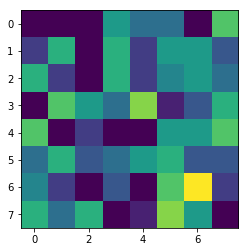

[[ 0.  0.  0.  4.  3.  7.  0.  4.]
 [ 3.  6.  0.  3.  1.  5.  2.  6.]
 [ 5.  4.  0.  2.  2.  6. 10.  9.]
 [ 0.  5.  8.  5.  7.  3.  6.  7.]
 [ 1.  0.  5.  0.  2.  5.  7.  3.]
 [ 6.  6.  6.  3.  3.  6.  0.  5.]
 [ 8.  7.  0.  7.  0.  5.  5.  7.]
 [ 6.  5.  8.  0.  2.  5.  5.  0.]]


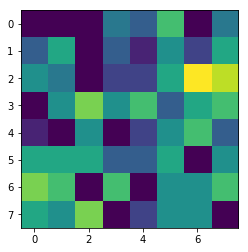

[[ 0.  0.  0.  3.  5.  3.  0.  7.]
 [ 2.  2.  0.  5.  2.  1.  4.  4.]
 [ 6.  3.  0.  7.  2.  1.  5.  4.]
 [ 0.  8.  5.  5.  4.  0.  4. 10.]
 [ 6.  0.  7.  0.  3.  4.  5. 10.]
 [ 8.  5.  7.  6.  2.  6.  2. 13.]
 [ 7.  4.  0.  5.  0.  5.  2.  5.]
 [ 4.  7.  6.  0.  3. 11.  9.  0.]]


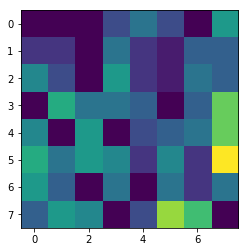

[[ 0.  0.  0.  5.  1.  5.  0.  8.]
 [ 2. 10.  0.  4.  2.  4.  5.  5.]
 [ 7.  8.  0.  5.  3. 10.  3.  4.]
 [ 0.  8.  4.  6.  1.  3.  6.  5.]
 [ 6.  0.  2.  0.  4.  5.  1.  8.]
 [ 0.  7.  5.  0.  7.  4.  7.  0.]
 [ 6.  5.  0.  6.  0.  9.  9.  7.]
 [10.  5.  4.  0.  7.  7.  1.  0.]]


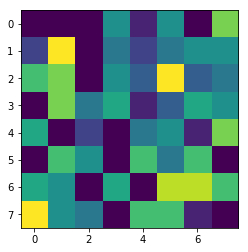

[[ 0.  0.  0.  8.  5.  5.  0.  6.]
 [ 3.  4.  0.  4.  3.  6.  3.  8.]
 [ 0.  3.  0.  6.  3.  3.  9.  5.]
 [ 0.  6.  8.  8.  6.  1.  7.  6.]
 [ 7.  0.  4.  0.  1.  4.  4.  8.]
 [ 5.  5.  3.  3.  5.  6.  2.  6.]
 [ 4.  4.  0.  3.  0.  6. 10.  4.]
 [ 4.  6.  9.  0.  0.  6.  7.  0.]]


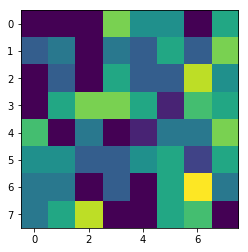

[[ 0.  0.  0.  3.  6.  4.  0.  6.]
 [ 3.  2.  0.  2.  6.  0.  8.  3.]
 [ 6.  5.  0.  5.  3.  5.  5.  2.]
 [ 0.  3.  5.  3.  9.  1.  3.  3.]
 [ 4.  0.  8.  0.  4.  7.  4. 12.]
 [ 4.  5.  7.  4.  1.  8.  0.  8.]
 [ 8.  6.  0.  9.  0.  6.  6.  6.]
 [ 7.  8.  3.  0.  5.  5. 11.  0.]]


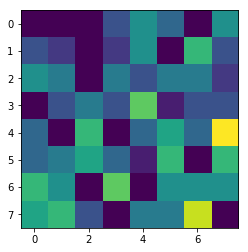

[[ 0.  0.  0.  6.  4.  5.  0.  7.]
 [ 5. 10.  0.  3.  3.  2.  4.  6.]
 [ 5.  2.  0.  3.  5.  5.  8.  2.]
 [ 0.  2.  4.  3.  5.  5.  9.  4.]
 [ 2.  0.  3.  0.  0.  1.  9.  3.]
 [ 5.  7. 13.  2.  5.  5.  1.  6.]
 [ 8.  8.  0.  3.  0.  1.  5. 12.]
 [ 9.  8.  7.  0.  5.  2.  7.  0.]]


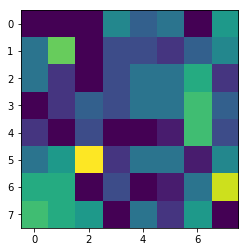

[[ 0.  0.  0.  5.  5.  4.  0.  4.]
 [ 3.  4.  0.  0.  7.  3.  7.  4.]
 [ 2.  7.  0.  6.  4.  5.  6.  2.]
 [ 0.  6.  5.  9.  9.  2.  9.  5.]
 [ 2.  0.  4.  0.  2.  5.  1. 12.]
 [ 4.  0.  7.  3.  5.  5.  2.  4.]
 [ 8.  5.  0.  2.  0.  8.  5.  9.]
 [ 9. 11.  2.  0.  6.  2.  7.  0.]]


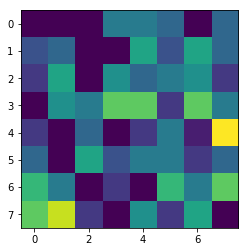

[[ 0.  0.  0.  7.  3.  3.  0.  8.]
 [ 4.  5.  0.  7.  3.  7.  7.  2.]
 [ 5.  1.  0.  7.  3.  4.  6.  4.]
 [ 0.  7.  8.  5. 13.  1.  4.  4.]
 [ 9.  0.  2.  0.  1.  7.  7.  9.]
 [ 6.  5.  0.  3.  6.  7.  3.  3.]
 [ 3.  1.  0.  4.  0.  8. 12.  2.]
 [ 6.  3.  9.  0.  1.  7.  6.  0.]]


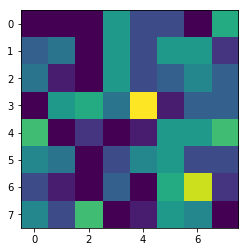

[[ 0.  0.  0.  3.  0.  5.  0.  5.]
 [ 3. 10.  0.  4.  2.  3.  4.  5.]
 [ 5.  4.  0.  6.  3.  7.  7.  5.]
 [ 0.  5.  6.  5.  4.  4.  8.  0.]
 [ 3.  0.  3.  0.  4.  4.  5.  6.]
 [ 6.  5.  5.  1.  6.  7.  5.  4.]
 [ 8.  6.  0.  8.  0.  8.  5.  9.]
 [ 7.  5.  3.  0.  6.  8.  4.  0.]]


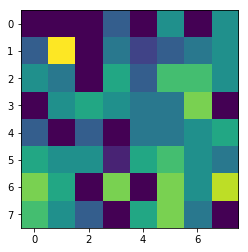

[[ 0.  0.  0.  5.  2.  4.  0.  6.]
 [ 2. 11.  0.  6.  4.  2.  3.  6.]
 [ 7.  7.  0.  3.  3.  5. 10.  7.]
 [ 0.  5.  6.  2.  7.  2.  4.  2.]
 [ 4.  0.  3.  0.  4.  5.  7.  5.]
 [ 5.  8.  4.  3.  6.  7.  2.  3.]
 [ 6.  5.  0.  8.  0. 10.  5.  7.]
 [ 6.  2.  3.  0.  4.  6.  4.  0.]]


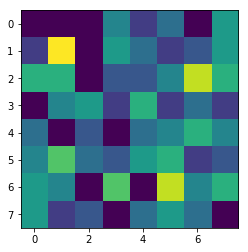

[[ 0.  0.  0.  5.  7.  5.  0.  2.]
 [ 5.  6.  0.  5.  6.  3.  4.  5.]
 [ 9.  1.  0.  5.  4.  7.  7.  3.]
 [ 0.  3.  4.  2.  9.  8.  6.  4.]
 [ 4.  0.  5.  0.  6.  4.  7.  3.]
 [ 3. 10.  8.  5.  5.  4.  3.  3.]
 [ 7.  6.  0.  8.  0.  4.  4.  2.]
 [ 3.  6.  1.  0.  7.  5.  8.  0.]]


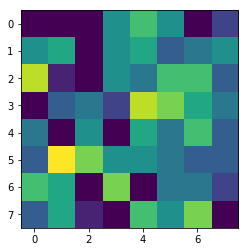

[[ 0.  0.  0.  7.  7.  4.  0.  8.]
 [ 2.  4.  0.  4.  5.  5.  7.  4.]
 [ 9.  6.  0.  5.  2.  5.  5.  3.]
 [ 0.  4.  1.  6. 11.  4.  4.  4.]
 [ 1.  0.  6.  0.  4.  2.  8.  4.]
 [ 4.  8.  5.  3.  8.  4.  3.  3.]
 [ 8.  6.  0.  7.  0.  4.  2.  4.]
 [ 3.  7.  2.  0.  8.  6.  8.  0.]]


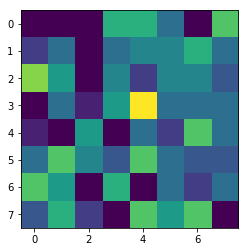

[[ 0.  0.  0.  3.  8.  7.  0.  4.]
 [ 5.  8.  0.  5.  4.  4.  4.  4.]
 [10.  0.  0.  3.  5. 12.  5.  4.]
 [ 0.  7.  5.  2.  8.  7.  6.  9.]
 [ 3.  0.  5.  0.  3.  5.  3.  2.]
 [ 3.  7.  6.  4.  4.  4.  2.  2.]
 [10.  5.  0.  3.  0.  1.  7.  5.]
 [ 3.  5.  3.  0.  7.  5.  9.  0.]]


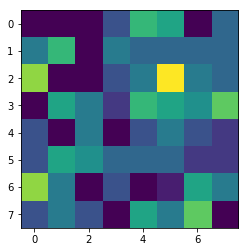

[[ 0.  0.  0.  5.  9.  4.  0.  5.]
 [ 5.  2.  0.  0.  5.  2. 13.  5.]
 [ 6.  7.  0.  5.  4.  1.  2.  0.]
 [ 0.  6.  4.  6.  7.  2.  6.  5.]
 [ 4.  0.  8.  0.  3.  4.  1.  9.]
 [ 4.  4.  4.  3.  7.  6.  2.  6.]
 [ 9.  2.  0.  5.  0.  7.  5.  5.]
 [ 4. 13.  1.  0.  8.  2. 12.  0.]]


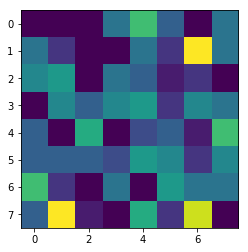

[[ 0.  0.  0.  7.  3.  7.  0.  5.]
 [ 2.  2.  0.  3.  2.  3.  3.  5.]
 [ 1.  6.  0.  5.  4.  4.  9.  8.]
 [ 0.  6.  5.  7.  5.  3.  7.  4.]
 [ 2.  0.  9.  0.  3.  3.  3.  5.]
 [ 7.  8.  3.  2.  4.  5.  3.  8.]
 [ 7.  3.  0.  9.  0.  3.  4.  6.]
 [ 4. 10. 10.  0.  2. 10.  8.  0.]]


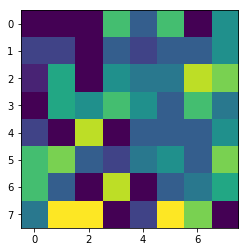

[[ 0.  0.  0.  3.  7.  3.  0.  8.]
 [ 7.  3.  0.  2.  7.  2. 12.  3.]
 [ 6.  5.  0.  1.  2.  3.  1.  3.]
 [ 0.  3.  6.  7. 11.  1.  6.  5.]
 [ 0.  0.  9.  0.  3.  5.  5. 11.]
 [ 6.  3.  4.  3.  1.  5.  2.  6.]
 [ 7.  5.  0. 10.  0.  5.  4.  8.]
 [ 9.  3.  5.  0.  9.  2.  9.  0.]]


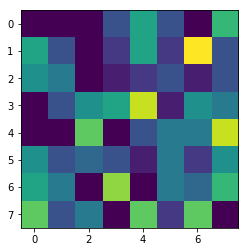

[[ 0.  0.  0.  3.  6.  7.  0.  3.]
 [ 2.  1.  0.  3.  2.  5.  2.  2.]
 [ 6.  2.  0.  4.  5.  8.  5.  7.]
 [ 0. 12.  7.  7.  4.  5.  6. 10.]
 [ 6.  0.  7.  0.  5.  7.  1.  6.]
 [ 2.  6.  5.  6.  3.  4.  3.  6.]
 [ 8.  3.  0.  6.  0.  2.  8.  2.]
 [ 4.  7.  4.  0.  4.  9.  7.  0.]]


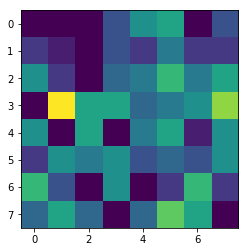

[[ 0.  0.  0.  7.  2.  6.  0.  6.]
 [ 1.  9.  0.  5.  4.  3.  0.  8.]
 [ 3.  6.  0.  4.  3.  7. 11.  7.]
 [ 0.  5.  5.  6.  7.  3.  5.  3.]
 [ 2.  0.  5.  0.  4.  2.  5.  5.]
 [ 6.  8.  6.  2.  5.  6.  1.  5.]
 [ 7.  7.  0.  8.  0.  6.  3.  7.]
 [ 5.  4.  5.  0.  3.  6.  5.  0.]]


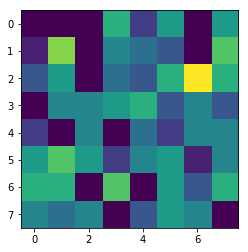

[[ 0.  0.  0.  4.  9.  4.  0.  6.]
 [ 5.  5.  0.  5.  3.  3.  6.  3.]
 [ 8.  3.  0.  1.  3.  4.  2.  7.]
 [ 0.  4.  5.  5. 10.  5.  2. 11.]
 [ 1.  0.  9.  0.  2.  3.  7.  3.]
 [ 6.  8.  7.  6.  3.  4.  2.  7.]
 [ 8.  8.  0.  7.  0.  3.  1.  3.]
 [ 4.  3.  3.  0.  9.  5. 10.  0.]]


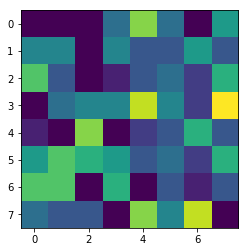

[[ 0.  0.  0.  5.  6.  5.  0.  4.]
 [ 3.  2.  0.  0.  5.  5.  7.  4.]
 [ 6.  5.  0.  6.  4.  5.  8.  2.]
 [ 0.  5.  9.  7. 11.  4.  9.  2.]
 [ 1.  0.  3.  0.  5.  2.  6. 10.]
 [ 2.  2.  9.  2.  6.  6.  2.  2.]
 [ 8.  6.  0.  6.  0.  8.  4.  4.]
 [ 7.  8.  2.  0.  5.  5.  5.  0.]]


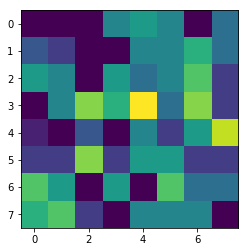

[[ 0.  0.  0.  6.  4.  6.  0.  3.]
 [ 6.  9.  0.  2.  1.  5.  5.  8.]
 [ 2.  5.  0.  3.  5.  2.  8.  3.]
 [ 0.  0. 10.  2.  1.  3.  5.  3.]
 [ 4.  0.  7.  0.  4.  3.  8.  2.]
 [ 4. 10. 12.  3.  4.  7.  1.  6.]
 [ 6. 10.  0.  7.  0.  6.  7.  5.]
 [ 4.  7.  6.  0.  2.  6.  6.  0.]]


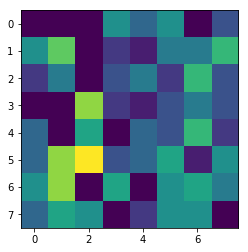

[[ 0.  0.  0.  4.  4.  6.  0.  4.]
 [ 7.  4.  0.  2.  1.  4.  6.  6.]
 [ 1.  2.  0.  3.  2.  2. 10.  5.]
 [ 0.  0. 10.  5.  4.  2.  7.  2.]
 [ 4.  0.  6.  0.  3.  3.  9.  5.]
 [ 6. 10.  8.  1.  3.  6.  2.  6.]
 [ 4.  7.  0. 11.  0.  4.  8.  5.]
 [ 7.  9. 11.  0.  1.  6.  5.  0.]]


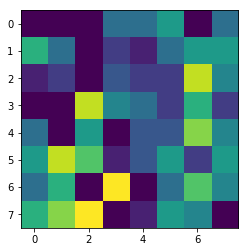

[[ 0.  0.  0.  5.  3.  6.  0.  7.]
 [ 1.  6.  0.  6.  1.  6.  5.  2.]
 [ 8.  3.  0.  6.  4.  7.  4.  6.]
 [ 0.  9.  5.  5.  5.  3.  4.  8.]
 [ 8.  0.  4.  0.  1.  8.  5.  6.]
 [ 2.  8.  2.  5.  6.  6.  4.  4.]
 [ 7.  3.  0.  4.  0.  5. 10.  3.]
 [ 5.  4.  5.  0.  3.  9.  6.  0.]]


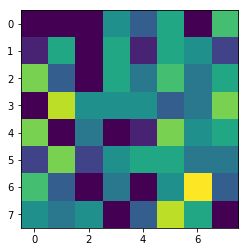

[[ 0.  0.  0.  8.  5.  4.  0.  5.]
 [ 5.  6.  0.  1. 10.  1. 10.  3.]
 [ 3. 11.  0.  3.  7.  0.  1.  1.]
 [ 0.  2.  6.  5.  7.  0.  8.  2.]
 [ 3.  0. 12.  0.  1.  7.  1. 14.]
 [ 2.  0.  4.  5.  3.  6.  1.  8.]
 [ 8.  3.  0.  4.  0. 10.  7. 10.]
 [ 7.  4.  2.  0.  5.  4. 10.  0.]]


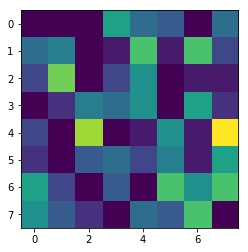

[[ 0.  0.  0.  7.  5.  4.  0.  4.]
 [ 5.  4.  0.  2.  4.  8.  9.  4.]
 [ 6.  8.  0.  4.  4.  1.  3.  4.]
 [ 0.  2.  9. 10. 11.  3.  5.  4.]
 [ 2.  0.  7.  0.  5.  3.  6.  6.]
 [ 4.  3.  5.  4.  7.  5.  3.  2.]
 [ 6.  7.  0.  7.  0. 10.  3.  3.]
 [ 3.  4.  0.  0.  8.  5.  6.  0.]]


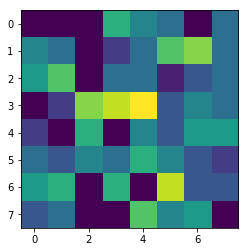

[[ 0.  0.  0.  4.  3.  4.  0.  5.]
 [ 1.  2.  0.  3.  2.  3.  3.  5.]
 [ 4.  5.  0.  8.  3.  3.  9.  5.]
 [ 0.  5.  7.  6.  9.  2.  4.  7.]
 [ 3.  0.  8.  0.  4.  3.  6.  8.]
 [ 9.  5.  6.  4.  3.  6.  1.  9.]
 [ 6.  6.  0.  5.  0.  7.  2.  4.]
 [ 2.  8.  7.  0.  3. 10.  8.  0.]]


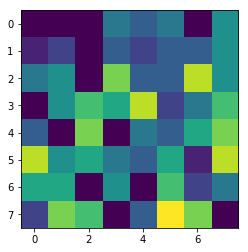

epoch [2/2], loss:0.0785, MSE_loss:0.0237


In [2]:
import os
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = x.view(x.size(0), 1, 28, 28)
    return x

num_epochs = 2
batch_size = 128
learning_rate = 1e-3


def plot_sample_img(img, name):
    img = img.view(1, 28, 28)
    save_image(img, './sample_{}.png'.format(name))


def min_max_normalization(tensor, min_value, max_value):
    min_tensor = tensor.min()
    tensor = (tensor - min_tensor)
    max_tensor = tensor.max()
    tensor = tensor / max_tensor
    tensor = tensor * (max_value - min_value) + min_value
    return tensor


def tensor_round(tensor):
    return torch.round(tensor)

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda tensor:min_max_normalization(tensor, 0, 1)),
    transforms.Lambda(lambda tensor:tensor_round(tensor))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 64),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().cuda()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
#         print(img)
#         print(img.size())
#         print('--------------------------')
        img = img.view(img.size(0), -1)
#         print(img)
#         print(img.size())
#         print('--------------------------')
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        MIDIMG=model.encoder(img).view(img.size(0),8,8).cpu().detach().numpy()
        MIDIMG=MIDIMG[0]
        MIDIMG=np.rint(MIDIMG/np.sum(MIDIMG)*255)
        print(MIDIMG)
        plt.imshow(MIDIMG)
        plt.show()
        loss = criterion(output, img)
        MSE_loss = nn.MSELoss()(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}, MSE_loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0], MSE_loss.data[0]))
    if epoch % 20 == 0:
        x = to_img(img.cpu().data)
        x_hat = to_img(output.cpu().data)
        save_image(x, './mlp_img/x_{}.png'.format(epoch))
        save_image(x_hat, './mlp_img/x_hat_{}.png'.format(epoch))

torch.save(model.state_dict(), './sim_autoencoder.pth')